<a href="https://colab.research.google.com/github/myeongseop2/NIDS_project/blob/main/BruteForce/LSTM_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from keras.datasets import imdb
from keras.layers import GRU, LSTM, CuDNNGRU, CuDNNLSTM, Activation
# from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Embedding
import keras
import tensorflow as tf

In [ ]:
x_train = pd.read_csv("./x_train.csv")
y_train = pd.read_csv("./y_train.csv")
x_test = pd.read_csv("./x_test.csv")
y_test = pd.read_csv("./y_test.csv")

In [ ]:
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(142567, 21)
(142567, 1)
(61101, 21)
(61101, 1)


In [ ]:
x_train = np.reshape(x_train, (142567, 1, 21))
x_test = np.reshape(x_test, (61101, 1, 21))

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(142567, 1, 21)
(142567, 1)
(61101, 1, 21)
(61101, 1)


In [ ]:
def a_lstm():
    model = Sequential()
    model.add(CuDNNGRU(64,input_shape=(1, 21), return_sequences=True))
    model.add(Dropout(0.2))
    model.add(CuDNNGRU(128, return_sequences=False))
    model.add(Dropout(0.2))
    model.add(Dense(1))
    model.add(Activation('sigmoid'))

    model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
    return model

In [ ]:
model = a_lstm()

In [ ]:
folder_directory = "./LSTM_model_0927+379000"

checkPoint_path = folder_directory + "/LSTM_{epoch}.h5"

my_period = 1000
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkPoint_path, save_weight_only=True, verbose=1, period=my_period)

In [ ]:
from keras.models import load_model

model = load_model("./LSTM_model_0925+293000/LSTM_86000.h5")

In [ ]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="0"
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        tf.config.experimental.set_memory_growth(gpus[0], True)
    except RuntimeError as e:
        print(e)

Physical devices cannot be modified after being initialized


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 cu_dnngru (CuDNNGRU)        (None, 1, 64)             16704     
                                                                 
 dropout (Dropout)           (None, 1, 64)             0         
                                                                 
 cu_dnngru_1 (CuDNNGRU)      (None, 128)               74496     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
 activation (Activation)     (None, 1)                 0         
                                                                 
Total params: 91,329
Trainable params: 91,329
Non-traina

In [ ]:
hist = model.fit(x_train, y_train, batch_size=512, epochs=21000, callbacks=[cp_callback], validation_data=(x_test, y_test))

Epoch 1/21000
279/279 [==============================] - 12s 10ms/step - loss: 2.2261e-10 - accuracy: 1.0000 - val_loss: 5.6188e-04 - val_accuracy: 1.0000
Epoch 2/21000
279/279 [==============================] - 2s 8ms/step - loss: 1.2074e-11 - accuracy: 1.0000 - val_loss: 5.6186e-04 - val_accuracy: 1.0000
Epoch 3/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.0725e-12 - accuracy: 1.0000 - val_loss: 5.6186e-04 - val_accuracy: 1.0000
Epoch 4/21000
279/279 [==============================] - 2s 7ms/step - loss: 8.7130e-13 - accuracy: 1.0000 - val_loss: 5.6186e-04 - val_accuracy: 1.0000
Epoch 5/21000
279/279 [==============================] - 2s 7ms/step - loss: 7.6794e-12 - accuracy: 1.0000 - val_loss: 5.6186e-04 - val_accuracy: 1.0000
Epoch 6/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.4404e-11 - accuracy: 1.0000 - val_loss: 5.6184e-04 - val_accuracy: 1.0000
Epoch 7/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.6

279/279 [==============================] - 2s 7ms/step - loss: 7.5158e-12 - accuracy: 1.0000 - val_loss: 6.9952e-04 - val_accuracy: 1.0000
Epoch 55/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.4588e-10 - accuracy: 1.0000 - val_loss: 6.9773e-04 - val_accuracy: 1.0000
Epoch 56/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.1281e-11 - accuracy: 1.0000 - val_loss: 6.9767e-04 - val_accuracy: 1.0000
Epoch 57/21000
279/279 [==============================] - 2s 7ms/step - loss: 9.7538e-07 - accuracy: 1.0000 - val_loss: 7.5837e-04 - val_accuracy: 1.0000
Epoch 58/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.0404e-10 - accuracy: 1.0000 - val_loss: 7.5824e-04 - val_accuracy: 1.0000
Epoch 59/21000
279/279 [==============================] - 2s 7ms/step - loss: 5.6546e-05 - accuracy: 1.0000 - val_loss: 6.0164e-04 - val_accuracy: 1.0000
Epoch 60/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.4711e-11 - 

279/279 [==============================] - 2s 7ms/step - loss: 6.0752e-10 - accuracy: 1.0000 - val_loss: 4.9747e-04 - val_accuracy: 1.0000
Epoch 108/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.7387e-12 - accuracy: 1.0000 - val_loss: 4.9747e-04 - val_accuracy: 1.0000
Epoch 109/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.0897e-10 - accuracy: 1.0000 - val_loss: 4.9814e-04 - val_accuracy: 1.0000
Epoch 110/21000
279/279 [==============================] - 2s 7ms/step - loss: 7.8089e-08 - accuracy: 1.0000 - val_loss: 4.7625e-04 - val_accuracy: 1.0000
Epoch 111/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.5793e-09 - accuracy: 1.0000 - val_loss: 4.7238e-04 - val_accuracy: 1.0000
Epoch 112/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.4037e-07 - accuracy: 1.0000 - val_loss: 4.9733e-04 - val_accuracy: 1.0000
Epoch 113/21000
279/279 [==============================] - 2s 7ms/step - loss: 8.4282e

Epoch 160/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.8272e-13 - accuracy: 1.0000 - val_loss: 5.3365e-04 - val_accuracy: 1.0000
Epoch 161/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.3821e-12 - accuracy: 1.0000 - val_loss: 5.3364e-04 - val_accuracy: 1.0000
Epoch 162/21000
279/279 [==============================] - 2s 7ms/step - loss: 4.6135e-13 - accuracy: 1.0000 - val_loss: 5.3364e-04 - val_accuracy: 1.0000
Epoch 163/21000
279/279 [==============================] - 2s 7ms/step - loss: 8.0539e-11 - accuracy: 1.0000 - val_loss: 5.3362e-04 - val_accuracy: 1.0000
Epoch 164/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.3730e-10 - accuracy: 1.0000 - val_loss: 5.3368e-04 - val_accuracy: 1.0000
Epoch 165/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.2204e-11 - accuracy: 1.0000 - val_loss: 5.3366e-04 - val_accuracy: 1.0000
Epoch 166/21000
279/279 [==============================] - 2s 7ms/step

Epoch 213/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.9174e-07 - accuracy: 1.0000 - val_loss: 4.6262e-04 - val_accuracy: 1.0000
Epoch 214/21000
279/279 [==============================] - 2s 7ms/step - loss: 4.3279e-08 - accuracy: 1.0000 - val_loss: 4.6431e-04 - val_accuracy: 1.0000
Epoch 215/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.2719e-05 - accuracy: 1.0000 - val_loss: 4.7501e-04 - val_accuracy: 1.0000
Epoch 216/21000
279/279 [==============================] - 2s 7ms/step - loss: 7.1357e-10 - accuracy: 1.0000 - val_loss: 4.7501e-04 - val_accuracy: 1.0000
Epoch 217/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.5845e-07 - accuracy: 1.0000 - val_loss: 4.8982e-04 - val_accuracy: 1.0000
Epoch 218/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.1822e-08 - accuracy: 1.0000 - val_loss: 4.9131e-04 - val_accuracy: 1.0000
Epoch 219/21000
279/279 [==============================] - 2s 7ms/step

Epoch 266/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.1943e-12 - accuracy: 1.0000 - val_loss: 4.9587e-04 - val_accuracy: 1.0000
Epoch 267/21000
279/279 [==============================] - 2s 7ms/step - loss: 4.1986e-11 - accuracy: 1.0000 - val_loss: 4.9586e-04 - val_accuracy: 1.0000
Epoch 268/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.5553e-10 - accuracy: 1.0000 - val_loss: 4.9580e-04 - val_accuracy: 1.0000
Epoch 269/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.8699e-11 - accuracy: 1.0000 - val_loss: 4.9579e-04 - val_accuracy: 1.0000
Epoch 270/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.5461e-10 - accuracy: 1.0000 - val_loss: 4.9657e-04 - val_accuracy: 1.0000
Epoch 271/21000
279/279 [==============================] - 2s 7ms/step - loss: 7.8565e-13 - accuracy: 1.0000 - val_loss: 4.9657e-04 - val_accuracy: 1.0000
Epoch 272/21000
279/279 [==============================] - 2s 7ms/step

Epoch 319/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.7505e-11 - accuracy: 1.0000 - val_loss: 4.8764e-04 - val_accuracy: 1.0000
Epoch 320/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.3402e-12 - accuracy: 1.0000 - val_loss: 4.8764e-04 - val_accuracy: 1.0000
Epoch 321/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.5075e-11 - accuracy: 1.0000 - val_loss: 4.8764e-04 - val_accuracy: 1.0000
Epoch 322/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.1515e-12 - accuracy: 1.0000 - val_loss: 4.8764e-04 - val_accuracy: 1.0000
Epoch 323/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.7886e-11 - accuracy: 1.0000 - val_loss: 4.8764e-04 - val_accuracy: 1.0000
Epoch 324/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.1227e-11 - accuracy: 1.0000 - val_loss: 4.8764e-04 - val_accuracy: 1.0000
Epoch 325/21000
279/279 [==============================] - 2s 7ms/step

Epoch 372/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.6125e-11 - accuracy: 1.0000 - val_loss: 5.3542e-04 - val_accuracy: 1.0000
Epoch 373/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.2273e-09 - accuracy: 1.0000 - val_loss: 5.3516e-04 - val_accuracy: 1.0000
Epoch 374/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.6643e-10 - accuracy: 1.0000 - val_loss: 5.3522e-04 - val_accuracy: 1.0000
Epoch 375/21000
279/279 [==============================] - 2s 7ms/step - loss: 4.4743e-11 - accuracy: 1.0000 - val_loss: 5.3523e-04 - val_accuracy: 1.0000
Epoch 376/21000
279/279 [==============================] - 2s 7ms/step - loss: 5.8670e-10 - accuracy: 1.0000 - val_loss: 5.3498e-04 - val_accuracy: 1.0000
Epoch 377/21000
279/279 [==============================] - 2s 7ms/step - loss: 5.6902e-11 - accuracy: 1.0000 - val_loss: 5.3498e-04 - val_accuracy: 1.0000
Epoch 378/21000
279/279 [==============================] - 2s 7ms/step

Epoch 425/21000
279/279 [==============================] - 2s 7ms/step - loss: 8.2080e-12 - accuracy: 1.0000 - val_loss: 5.6374e-04 - val_accuracy: 1.0000
Epoch 426/21000
279/279 [==============================] - 2s 7ms/step - loss: 8.5035e-10 - accuracy: 1.0000 - val_loss: 5.6369e-04 - val_accuracy: 1.0000
Epoch 427/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.2911e-11 - accuracy: 1.0000 - val_loss: 5.6369e-04 - val_accuracy: 1.0000
Epoch 428/21000
279/279 [==============================] - 2s 7ms/step - loss: 6.6028e-11 - accuracy: 1.0000 - val_loss: 5.6369e-04 - val_accuracy: 1.0000
Epoch 429/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.1910e-10 - accuracy: 1.0000 - val_loss: 5.6363e-04 - val_accuracy: 1.0000
Epoch 430/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.2373e-11 - accuracy: 1.0000 - val_loss: 5.6363e-04 - val_accuracy: 1.0000
Epoch 431/21000
279/279 [==============================] - 2s 7ms/step

Epoch 478/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.3619e-11 - accuracy: 1.0000 - val_loss: 5.5792e-04 - val_accuracy: 1.0000
Epoch 479/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.2034e-10 - accuracy: 1.0000 - val_loss: 5.5786e-04 - val_accuracy: 1.0000
Epoch 480/21000
279/279 [==============================] - 2s 7ms/step - loss: 9.0584e-11 - accuracy: 1.0000 - val_loss: 5.5778e-04 - val_accuracy: 1.0000
Epoch 481/21000
279/279 [==============================] - 2s 7ms/step - loss: 5.6309e-12 - accuracy: 1.0000 - val_loss: 5.5777e-04 - val_accuracy: 1.0000
Epoch 482/21000
279/279 [==============================] - 2s 7ms/step - loss: 6.9280e-11 - accuracy: 1.0000 - val_loss: 5.5768e-04 - val_accuracy: 1.0000
Epoch 483/21000
279/279 [==============================] - 2s 7ms/step - loss: 5.9688e-10 - accuracy: 1.0000 - val_loss: 5.5764e-04 - val_accuracy: 1.0000
Epoch 484/21000
279/279 [==============================] - 2s 7ms/step

Epoch 531/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.3036e-11 - accuracy: 1.0000 - val_loss: 5.4070e-04 - val_accuracy: 1.0000
Epoch 532/21000
279/279 [==============================] - 2s 7ms/step - loss: 4.3430e-10 - accuracy: 1.0000 - val_loss: 5.4073e-04 - val_accuracy: 1.0000
Epoch 533/21000
279/279 [==============================] - 2s 7ms/step - loss: 4.4497e-11 - accuracy: 1.0000 - val_loss: 5.4072e-04 - val_accuracy: 1.0000
Epoch 534/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.6267e-09 - accuracy: 1.0000 - val_loss: 5.4071e-04 - val_accuracy: 1.0000
Epoch 535/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.2549e-11 - accuracy: 1.0000 - val_loss: 5.4071e-04 - val_accuracy: 1.0000
Epoch 536/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.7251e-11 - accuracy: 1.0000 - val_loss: 5.4071e-04 - val_accuracy: 1.0000
Epoch 537/21000
279/279 [==============================] - 2s 7ms/step

Epoch 584/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.0184e-10 - accuracy: 1.0000 - val_loss: 4.9691e-04 - val_accuracy: 1.0000
Epoch 585/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.5148e-11 - accuracy: 1.0000 - val_loss: 4.9690e-04 - val_accuracy: 1.0000
Epoch 586/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.4892e-10 - accuracy: 1.0000 - val_loss: 4.9681e-04 - val_accuracy: 1.0000
Epoch 587/21000
279/279 [==============================] - 2s 7ms/step - loss: 6.5538e-11 - accuracy: 1.0000 - val_loss: 4.9682e-04 - val_accuracy: 1.0000
Epoch 588/21000
279/279 [==============================] - 2s 8ms/step - loss: 3.9547e-12 - accuracy: 1.0000 - val_loss: 4.9682e-04 - val_accuracy: 1.0000
Epoch 589/21000
279/279 [==============================] - 2s 8ms/step - loss: 5.3125e-11 - accuracy: 1.0000 - val_loss: 4.9680e-04 - val_accuracy: 1.0000
Epoch 590/21000
279/279 [==============================] - 2s 7ms/step

Epoch 637/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.2624e-08 - accuracy: 1.0000 - val_loss: 6.3262e-04 - val_accuracy: 1.0000
Epoch 638/21000
279/279 [==============================] - 2s 7ms/step - loss: 8.8520e-12 - accuracy: 1.0000 - val_loss: 6.3262e-04 - val_accuracy: 1.0000
Epoch 639/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.4340e-10 - accuracy: 1.0000 - val_loss: 6.3264e-04 - val_accuracy: 1.0000
Epoch 640/21000
279/279 [==============================] - 2s 7ms/step - loss: 5.0472e-11 - accuracy: 1.0000 - val_loss: 6.3262e-04 - val_accuracy: 1.0000
Epoch 641/21000
279/279 [==============================] - 2s 7ms/step - loss: 7.7485e-11 - accuracy: 1.0000 - val_loss: 6.3251e-04 - val_accuracy: 1.0000
Epoch 642/21000
279/279 [==============================] - 2s 7ms/step - loss: 5.1803e-10 - accuracy: 1.0000 - val_loss: 6.3239e-04 - val_accuracy: 1.0000
Epoch 643/21000
279/279 [==============================] - 2s 7ms/step

Epoch 690/21000
279/279 [==============================] - 2s 7ms/step - loss: 6.4869e-06 - accuracy: 1.0000 - val_loss: 7.9798e-04 - val_accuracy: 1.0000
Epoch 691/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.6220e-06 - accuracy: 1.0000 - val_loss: 7.7025e-04 - val_accuracy: 1.0000
Epoch 692/21000
279/279 [==============================] - 2s 7ms/step - loss: 9.1732e-09 - accuracy: 1.0000 - val_loss: 7.7021e-04 - val_accuracy: 1.0000
Epoch 693/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.3041e-10 - accuracy: 1.0000 - val_loss: 7.7025e-04 - val_accuracy: 1.0000
Epoch 694/21000
279/279 [==============================] - 2s 7ms/step - loss: 7.4145e-10 - accuracy: 1.0000 - val_loss: 7.7025e-04 - val_accuracy: 1.0000
Epoch 695/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.4902e-10 - accuracy: 1.0000 - val_loss: 7.7024e-04 - val_accuracy: 1.0000
Epoch 696/21000
279/279 [==============================] - 2s 7ms/step

Epoch 743/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.8451e-05 - accuracy: 1.0000 - val_loss: 4.7034e-04 - val_accuracy: 1.0000
Epoch 744/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.2366e-09 - accuracy: 1.0000 - val_loss: 4.7029e-04 - val_accuracy: 1.0000
Epoch 745/21000
279/279 [==============================] - 2s 7ms/step - loss: 4.1806e-08 - accuracy: 1.0000 - val_loss: 4.6997e-04 - val_accuracy: 1.0000
Epoch 746/21000
279/279 [==============================] - 2s 7ms/step - loss: 6.3410e-10 - accuracy: 1.0000 - val_loss: 4.6997e-04 - val_accuracy: 1.0000
Epoch 747/21000
279/279 [==============================] - 2s 7ms/step - loss: 5.0046e-10 - accuracy: 1.0000 - val_loss: 4.6997e-04 - val_accuracy: 1.0000
Epoch 748/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.9827e-10 - accuracy: 1.0000 - val_loss: 4.6997e-04 - val_accuracy: 1.0000
Epoch 749/21000
279/279 [==============================] - 2s 7ms/step

Epoch 796/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.4286e-08 - accuracy: 1.0000 - val_loss: 4.2202e-04 - val_accuracy: 1.0000
Epoch 797/21000
279/279 [==============================] - 2s 7ms/step - loss: 6.3361e-07 - accuracy: 1.0000 - val_loss: 4.3550e-04 - val_accuracy: 1.0000
Epoch 798/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.7032e-11 - accuracy: 1.0000 - val_loss: 4.3550e-04 - val_accuracy: 1.0000
Epoch 799/21000
279/279 [==============================] - 2s 7ms/step - loss: 5.6099e-05 - accuracy: 1.0000 - val_loss: 4.7275e-04 - val_accuracy: 1.0000
Epoch 800/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.1601e-08 - accuracy: 1.0000 - val_loss: 4.7286e-04 - val_accuracy: 1.0000
Epoch 801/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.5803e-11 - accuracy: 1.0000 - val_loss: 4.7326e-04 - val_accuracy: 1.0000
Epoch 802/21000
279/279 [==============================] - 2s 7ms/step

Epoch 849/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.8341e-09 - accuracy: 1.0000 - val_loss: 5.4132e-04 - val_accuracy: 1.0000
Epoch 850/21000
279/279 [==============================] - 2s 7ms/step - loss: 9.8437e-10 - accuracy: 1.0000 - val_loss: 5.4126e-04 - val_accuracy: 1.0000
Epoch 851/21000
279/279 [==============================] - 2s 7ms/step - loss: 4.6984e-09 - accuracy: 1.0000 - val_loss: 5.4060e-04 - val_accuracy: 1.0000
Epoch 852/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.7525e-10 - accuracy: 1.0000 - val_loss: 5.4066e-04 - val_accuracy: 1.0000
Epoch 853/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.3826e-10 - accuracy: 1.0000 - val_loss: 5.4070e-04 - val_accuracy: 1.0000
Epoch 854/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.7548e-08 - accuracy: 1.0000 - val_loss: 5.3816e-04 - val_accuracy: 1.0000
Epoch 855/21000
279/279 [==============================] - 2s 7ms/step

Epoch 902/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.5109e-04 - accuracy: 1.0000 - val_loss: 5.3793e-04 - val_accuracy: 1.0000
Epoch 903/21000
279/279 [==============================] - 2s 7ms/step - loss: 5.7197e-05 - accuracy: 1.0000 - val_loss: 4.6627e-04 - val_accuracy: 1.0000
Epoch 904/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.3557e-09 - accuracy: 1.0000 - val_loss: 4.6626e-04 - val_accuracy: 1.0000
Epoch 905/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.1489e-11 - accuracy: 1.0000 - val_loss: 4.6626e-04 - val_accuracy: 1.0000
Epoch 906/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.6010e-11 - accuracy: 1.0000 - val_loss: 4.6626e-04 - val_accuracy: 1.0000
Epoch 907/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.0956e-09 - accuracy: 1.0000 - val_loss: 4.6636e-04 - val_accuracy: 1.0000
Epoch 908/21000
279/279 [==============================] - 2s 7ms/step

Epoch 955/21000
279/279 [==============================] - 2s 7ms/step - loss: 6.7221e-11 - accuracy: 1.0000 - val_loss: 5.7920e-04 - val_accuracy: 1.0000
Epoch 956/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.1140e-10 - accuracy: 1.0000 - val_loss: 5.7916e-04 - val_accuracy: 1.0000
Epoch 957/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.3724e-07 - accuracy: 1.0000 - val_loss: 6.6425e-04 - val_accuracy: 1.0000
Epoch 958/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.0753e-05 - accuracy: 1.0000 - val_loss: 5.5617e-04 - val_accuracy: 1.0000
Epoch 959/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.8782e-04 - accuracy: 1.0000 - val_loss: 5.2311e-04 - val_accuracy: 1.0000
Epoch 960/21000
279/279 [==============================] - 2s 7ms/step - loss: 5.4955e-10 - accuracy: 1.0000 - val_loss: 5.2319e-04 - val_accuracy: 1.0000
Epoch 961/21000
279/279 [==============================] - 2s 7ms/step

Epoch 1007/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.4937e-12 - accuracy: 1.0000 - val_loss: 5.1070e-04 - val_accuracy: 1.0000
Epoch 1008/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.8433e-11 - accuracy: 1.0000 - val_loss: 5.1068e-04 - val_accuracy: 1.0000
Epoch 1009/21000
279/279 [==============================] - 2s 7ms/step - loss: 4.4793e-12 - accuracy: 1.0000 - val_loss: 5.1068e-04 - val_accuracy: 1.0000
Epoch 1010/21000
279/279 [==============================] - 2s 7ms/step - loss: 6.3243e-09 - accuracy: 1.0000 - val_loss: 5.0724e-04 - val_accuracy: 1.0000
Epoch 1011/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.4805e-10 - accuracy: 1.0000 - val_loss: 5.0692e-04 - val_accuracy: 1.0000
Epoch 1012/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.2232e-12 - accuracy: 1.0000 - val_loss: 5.0692e-04 - val_accuracy: 1.0000
Epoch 1013/21000
279/279 [==============================] - 2s 7

279/279 [==============================] - 2s 7ms/step - loss: 2.2368e-11 - accuracy: 1.0000 - val_loss: 6.2999e-04 - val_accuracy: 1.0000
Epoch 1060/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.4607e-12 - accuracy: 1.0000 - val_loss: 6.2999e-04 - val_accuracy: 1.0000
Epoch 1061/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.3485e-10 - accuracy: 1.0000 - val_loss: 6.2990e-04 - val_accuracy: 1.0000
Epoch 1062/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.6198e-10 - accuracy: 1.0000 - val_loss: 6.2972e-04 - val_accuracy: 1.0000
Epoch 1063/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.7326e-11 - accuracy: 1.0000 - val_loss: 6.2968e-04 - val_accuracy: 1.0000
Epoch 1064/21000
279/279 [==============================] - 2s 7ms/step - loss: 4.8353e-11 - accuracy: 1.0000 - val_loss: 6.2967e-04 - val_accuracy: 1.0000
Epoch 1065/21000
279/279 [==============================] - 2s 7ms/step - loss: 5

279/279 [==============================] - 2s 7ms/step - loss: 2.5134e-11 - accuracy: 1.0000 - val_loss: 5.8219e-04 - val_accuracy: 1.0000
Epoch 1112/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.2320e-11 - accuracy: 1.0000 - val_loss: 5.8219e-04 - val_accuracy: 1.0000
Epoch 1113/21000
279/279 [==============================] - 2s 8ms/step - loss: 4.8136e-09 - accuracy: 1.0000 - val_loss: 5.8272e-04 - val_accuracy: 1.0000
Epoch 1114/21000
279/279 [==============================] - 3s 9ms/step - loss: 5.9634e-08 - accuracy: 1.0000 - val_loss: 6.1271e-04 - val_accuracy: 1.0000
Epoch 1115/21000
279/279 [==============================] - 2s 8ms/step - loss: 1.0877e-06 - accuracy: 1.0000 - val_loss: 5.5225e-04 - val_accuracy: 1.0000
Epoch 1116/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.9873e-05 - accuracy: 1.0000 - val_loss: 6.4883e-04 - val_accuracy: 1.0000
Epoch 1117/21000
279/279 [==============================] - 2s 7ms/step - loss: 8

279/279 [==============================] - 2s 7ms/step - loss: 5.1013e-09 - accuracy: 1.0000 - val_loss: 6.3448e-04 - val_accuracy: 1.0000
Epoch 1164/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.6994e-11 - accuracy: 1.0000 - val_loss: 6.3448e-04 - val_accuracy: 1.0000
Epoch 1165/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.7677e-06 - accuracy: 1.0000 - val_loss: 6.5209e-04 - val_accuracy: 1.0000
Epoch 1166/21000
279/279 [==============================] - 2s 7ms/step - loss: 8.4243e-11 - accuracy: 1.0000 - val_loss: 6.5209e-04 - val_accuracy: 1.0000
Epoch 1167/21000
279/279 [==============================] - 2s 7ms/step - loss: 6.2393e-08 - accuracy: 1.0000 - val_loss: 6.5373e-04 - val_accuracy: 1.0000
Epoch 1168/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.3922e-11 - accuracy: 1.0000 - val_loss: 6.5373e-04 - val_accuracy: 1.0000
Epoch 1169/21000
279/279 [==============================] - 2s 7ms/step - loss: 6

279/279 [==============================] - 2s 7ms/step - loss: 9.5351e-10 - accuracy: 1.0000 - val_loss: 7.7336e-04 - val_accuracy: 1.0000
Epoch 1216/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.4374e-11 - accuracy: 1.0000 - val_loss: 7.7333e-04 - val_accuracy: 1.0000
Epoch 1217/21000
279/279 [==============================] - 2s 7ms/step - loss: 7.8513e-11 - accuracy: 1.0000 - val_loss: 7.7322e-04 - val_accuracy: 1.0000
Epoch 1218/21000
279/279 [==============================] - 2s 7ms/step - loss: 6.1068e-10 - accuracy: 1.0000 - val_loss: 7.7261e-04 - val_accuracy: 1.0000
Epoch 1219/21000
279/279 [==============================] - 2s 7ms/step - loss: 4.4094e-10 - accuracy: 1.0000 - val_loss: 7.7186e-04 - val_accuracy: 1.0000
Epoch 1220/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.7234e-10 - accuracy: 1.0000 - val_loss: 7.7130e-04 - val_accuracy: 1.0000
Epoch 1221/21000
279/279 [==============================] - 2s 7ms/step - loss: 2

279/279 [==============================] - 2s 7ms/step - loss: 1.4157e-10 - accuracy: 1.0000 - val_loss: 5.2877e-04 - val_accuracy: 1.0000
Epoch 1268/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.3954e-08 - accuracy: 1.0000 - val_loss: 5.2696e-04 - val_accuracy: 1.0000
Epoch 1269/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.1583e-13 - accuracy: 1.0000 - val_loss: 5.2696e-04 - val_accuracy: 1.0000
Epoch 1270/21000
279/279 [==============================] - 2s 7ms/step - loss: 8.1330e-07 - accuracy: 1.0000 - val_loss: 5.9150e-04 - val_accuracy: 1.0000
Epoch 1271/21000
279/279 [==============================] - 2s 7ms/step - loss: 4.6068e-12 - accuracy: 1.0000 - val_loss: 5.9150e-04 - val_accuracy: 1.0000
Epoch 1272/21000
279/279 [==============================] - 2s 7ms/step - loss: 9.2337e-11 - accuracy: 1.0000 - val_loss: 5.9149e-04 - val_accuracy: 1.0000
Epoch 1273/21000
279/279 [==============================] - 2s 7ms/step - loss: 3

279/279 [==============================] - 2s 7ms/step - loss: 1.3630e-11 - accuracy: 1.0000 - val_loss: 3.8705e-04 - val_accuracy: 1.0000
Epoch 1320/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.1546e-11 - accuracy: 1.0000 - val_loss: 3.8705e-04 - val_accuracy: 1.0000
Epoch 1321/21000
279/279 [==============================] - 2s 7ms/step - loss: 5.5012e-11 - accuracy: 1.0000 - val_loss: 3.8705e-04 - val_accuracy: 1.0000
Epoch 1322/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.9227e-11 - accuracy: 1.0000 - val_loss: 3.8705e-04 - val_accuracy: 1.0000
Epoch 1323/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.0123e-11 - accuracy: 1.0000 - val_loss: 3.8704e-04 - val_accuracy: 1.0000
Epoch 1324/21000
279/279 [==============================] - 2s 7ms/step - loss: 4.5699e-08 - accuracy: 1.0000 - val_loss: 3.9035e-04 - val_accuracy: 1.0000
Epoch 1325/21000
279/279 [==============================] - 2s 7ms/step - loss: 1

279/279 [==============================] - 2s 7ms/step - loss: 4.3328e-11 - accuracy: 1.0000 - val_loss: 3.9086e-04 - val_accuracy: 1.0000
Epoch 1372/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.0807e-10 - accuracy: 1.0000 - val_loss: 3.9102e-04 - val_accuracy: 1.0000
Epoch 1373/21000
279/279 [==============================] - 2s 7ms/step - loss: 6.5867e-11 - accuracy: 1.0000 - val_loss: 3.9101e-04 - val_accuracy: 1.0000
Epoch 1374/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.5448e-11 - accuracy: 1.0000 - val_loss: 3.9101e-04 - val_accuracy: 1.0000
Epoch 1375/21000
279/279 [==============================] - 2s 7ms/step - loss: 9.5676e-11 - accuracy: 1.0000 - val_loss: 3.9102e-04 - val_accuracy: 1.0000
Epoch 1376/21000
279/279 [==============================] - 2s 7ms/step - loss: 7.3840e-11 - accuracy: 1.0000 - val_loss: 3.9097e-04 - val_accuracy: 1.0000
Epoch 1377/21000
279/279 [==============================] - 2s 7ms/step - loss: 7

279/279 [==============================] - 2s 7ms/step - loss: 3.2242e-11 - accuracy: 1.0000 - val_loss: 6.1516e-04 - val_accuracy: 1.0000
Epoch 1424/21000
279/279 [==============================] - 2s 7ms/step - loss: 9.0347e-12 - accuracy: 1.0000 - val_loss: 6.1516e-04 - val_accuracy: 1.0000
Epoch 1425/21000
279/279 [==============================] - 2s 7ms/step - loss: 5.2915e-10 - accuracy: 1.0000 - val_loss: 6.1511e-04 - val_accuracy: 1.0000
Epoch 1426/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.6865e-11 - accuracy: 1.0000 - val_loss: 6.1510e-04 - val_accuracy: 1.0000
Epoch 1427/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.8716e-11 - accuracy: 1.0000 - val_loss: 6.1511e-04 - val_accuracy: 1.0000
Epoch 1428/21000
279/279 [==============================] - 2s 7ms/step - loss: 4.5943e-11 - accuracy: 1.0000 - val_loss: 6.1509e-04 - val_accuracy: 1.0000
Epoch 1429/21000
279/279 [==============================] - 2s 7ms/step - loss: 2

279/279 [==============================] - 2s 7ms/step - loss: 1.9044e-11 - accuracy: 1.0000 - val_loss: 6.7643e-04 - val_accuracy: 1.0000
Epoch 1476/21000
279/279 [==============================] - 2s 7ms/step - loss: 5.7007e-10 - accuracy: 1.0000 - val_loss: 6.7673e-04 - val_accuracy: 1.0000
Epoch 1477/21000
279/279 [==============================] - 2s 7ms/step - loss: 9.3594e-11 - accuracy: 1.0000 - val_loss: 6.7676e-04 - val_accuracy: 1.0000
Epoch 1478/21000
279/279 [==============================] - 2s 7ms/step - loss: 8.3886e-08 - accuracy: 1.0000 - val_loss: 7.5257e-04 - val_accuracy: 1.0000
Epoch 1479/21000
279/279 [==============================] - 2s 7ms/step - loss: 4.3005e-12 - accuracy: 1.0000 - val_loss: 7.5257e-04 - val_accuracy: 1.0000
Epoch 1480/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.4785e-09 - accuracy: 1.0000 - val_loss: 7.5190e-04 - val_accuracy: 1.0000
Epoch 1481/21000
279/279 [==============================] - 2s 7ms/step - loss: 9

279/279 [==============================] - 2s 7ms/step - loss: 8.3597e-08 - accuracy: 1.0000 - val_loss: 8.1547e-04 - val_accuracy: 1.0000
Epoch 1528/21000
279/279 [==============================] - 2s 7ms/step - loss: 4.8618e-11 - accuracy: 1.0000 - val_loss: 8.1523e-04 - val_accuracy: 1.0000
Epoch 1529/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.9604e-11 - accuracy: 1.0000 - val_loss: 8.1524e-04 - val_accuracy: 1.0000
Epoch 1530/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.2232e-10 - accuracy: 1.0000 - val_loss: 8.1517e-04 - val_accuracy: 1.0000
Epoch 1531/21000
279/279 [==============================] - 2s 7ms/step - loss: 9.5751e-11 - accuracy: 1.0000 - val_loss: 8.1531e-04 - val_accuracy: 1.0000
Epoch 1532/21000
279/279 [==============================] - 2s 7ms/step - loss: 8.9242e-11 - accuracy: 1.0000 - val_loss: 8.1541e-04 - val_accuracy: 1.0000
Epoch 1533/21000
279/279 [==============================] - 2s 7ms/step - loss: 7

279/279 [==============================] - 2s 8ms/step - loss: 4.7453e-05 - accuracy: 1.0000 - val_loss: 7.2638e-04 - val_accuracy: 1.0000
Epoch 1580/21000
279/279 [==============================] - 2s 7ms/step - loss: 6.9701e-08 - accuracy: 1.0000 - val_loss: 7.2982e-04 - val_accuracy: 1.0000
Epoch 1581/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.1154e-12 - accuracy: 1.0000 - val_loss: 7.2981e-04 - val_accuracy: 1.0000
Epoch 1582/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.3424e-09 - accuracy: 1.0000 - val_loss: 7.2977e-04 - val_accuracy: 1.0000
Epoch 1583/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.3184e-09 - accuracy: 1.0000 - val_loss: 7.2989e-04 - val_accuracy: 1.0000
Epoch 1584/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.1880e-10 - accuracy: 1.0000 - val_loss: 7.2987e-04 - val_accuracy: 1.0000
Epoch 1585/21000
279/279 [==============================] - 2s 7ms/step - loss: 4

279/279 [==============================] - 2s 7ms/step - loss: 4.8605e-10 - accuracy: 1.0000 - val_loss: 6.0147e-04 - val_accuracy: 1.0000
Epoch 1632/21000
279/279 [==============================] - 2s 7ms/step - loss: 7.6356e-11 - accuracy: 1.0000 - val_loss: 6.0147e-04 - val_accuracy: 1.0000
Epoch 1633/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.8058e-10 - accuracy: 1.0000 - val_loss: 6.0145e-04 - val_accuracy: 1.0000
Epoch 1634/21000
279/279 [==============================] - 2s 7ms/step - loss: 5.1178e-11 - accuracy: 1.0000 - val_loss: 6.0145e-04 - val_accuracy: 1.0000
Epoch 1635/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.7119e-11 - accuracy: 1.0000 - val_loss: 6.0145e-04 - val_accuracy: 1.0000
Epoch 1636/21000
279/279 [==============================] - 2s 7ms/step - loss: 4.7546e-11 - accuracy: 1.0000 - val_loss: 6.0145e-04 - val_accuracy: 1.0000
Epoch 1637/21000
279/279 [==============================] - 2s 7ms/step - loss: 4

279/279 [==============================] - 2s 7ms/step - loss: 3.0606e-12 - accuracy: 1.0000 - val_loss: 4.7190e-04 - val_accuracy: 1.0000
Epoch 1684/21000
279/279 [==============================] - 2s 7ms/step - loss: 5.2916e-13 - accuracy: 1.0000 - val_loss: 4.7190e-04 - val_accuracy: 1.0000
Epoch 1685/21000
279/279 [==============================] - 2s 7ms/step - loss: 4.0813e-11 - accuracy: 1.0000 - val_loss: 4.7189e-04 - val_accuracy: 1.0000
Epoch 1686/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.2396e-10 - accuracy: 1.0000 - val_loss: 4.7203e-04 - val_accuracy: 1.0000
Epoch 1687/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.8910e-12 - accuracy: 1.0000 - val_loss: 4.7204e-04 - val_accuracy: 1.0000
Epoch 1688/21000
279/279 [==============================] - 2s 7ms/step - loss: 4.1503e-06 - accuracy: 1.0000 - val_loss: 4.3914e-04 - val_accuracy: 1.0000
Epoch 1689/21000
279/279 [==============================] - 2s 7ms/step - loss: 3

279/279 [==============================] - 2s 7ms/step - loss: 2.0738e-08 - accuracy: 1.0000 - val_loss: 4.4052e-04 - val_accuracy: 1.0000
Epoch 1736/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.1783e-12 - accuracy: 1.0000 - val_loss: 4.4052e-04 - val_accuracy: 1.0000
Epoch 1737/21000
279/279 [==============================] - 2s 7ms/step - loss: 6.1809e-13 - accuracy: 1.0000 - val_loss: 4.4052e-04 - val_accuracy: 1.0000
Epoch 1738/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.8952e-12 - accuracy: 1.0000 - val_loss: 4.4052e-04 - val_accuracy: 1.0000
Epoch 1739/21000
279/279 [==============================] - 2s 7ms/step - loss: 6.4108e-13 - accuracy: 1.0000 - val_loss: 4.4052e-04 - val_accuracy: 1.0000
Epoch 1740/21000
279/279 [==============================] - 2s 7ms/step - loss: 8.6844e-13 - accuracy: 1.0000 - val_loss: 4.4052e-04 - val_accuracy: 1.0000
Epoch 1741/21000
279/279 [==============================] - 2s 7ms/step - loss: 1

279/279 [==============================] - 2s 7ms/step - loss: 1.2814e-04 - accuracy: 1.0000 - val_loss: 4.4377e-04 - val_accuracy: 1.0000
Epoch 1788/21000
279/279 [==============================] - 2s 7ms/step - loss: 7.8247e-05 - accuracy: 1.0000 - val_loss: 3.7352e-04 - val_accuracy: 1.0000
Epoch 1789/21000
279/279 [==============================] - 2s 7ms/step - loss: 9.2912e-08 - accuracy: 1.0000 - val_loss: 3.7417e-04 - val_accuracy: 1.0000
Epoch 1790/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.4729e-10 - accuracy: 1.0000 - val_loss: 3.7417e-04 - val_accuracy: 1.0000
Epoch 1791/21000
279/279 [==============================] - 2s 7ms/step - loss: 4.2225e-12 - accuracy: 1.0000 - val_loss: 3.7417e-04 - val_accuracy: 1.0000
Epoch 1792/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.8035e-10 - accuracy: 1.0000 - val_loss: 3.7417e-04 - val_accuracy: 1.0000
Epoch 1793/21000
279/279 [==============================] - 2s 7ms/step - loss: 2

279/279 [==============================] - 2s 7ms/step - loss: 1.0986e-11 - accuracy: 1.0000 - val_loss: 4.2652e-04 - val_accuracy: 1.0000
Epoch 1840/21000
279/279 [==============================] - 2s 7ms/step - loss: 4.2939e-11 - accuracy: 1.0000 - val_loss: 4.2651e-04 - val_accuracy: 1.0000
Epoch 1841/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.5287e-10 - accuracy: 1.0000 - val_loss: 4.2650e-04 - val_accuracy: 1.0000
Epoch 1842/21000
279/279 [==============================] - 2s 7ms/step - loss: 9.7207e-12 - accuracy: 1.0000 - val_loss: 4.2650e-04 - val_accuracy: 1.0000
Epoch 1843/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.1134e-12 - accuracy: 1.0000 - val_loss: 4.2650e-04 - val_accuracy: 1.0000
Epoch 1844/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.0455e-11 - accuracy: 1.0000 - val_loss: 4.2650e-04 - val_accuracy: 1.0000
Epoch 1845/21000
279/279 [==============================] - 2s 7ms/step - loss: 5

279/279 [==============================] - 2s 7ms/step - loss: 1.4986e-09 - accuracy: 1.0000 - val_loss: 4.8241e-04 - val_accuracy: 1.0000
Epoch 1892/21000
279/279 [==============================] - 2s 7ms/step - loss: 5.8577e-09 - accuracy: 1.0000 - val_loss: 4.8123e-04 - val_accuracy: 1.0000
Epoch 1893/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.4875e-11 - accuracy: 1.0000 - val_loss: 4.8111e-04 - val_accuracy: 1.0000
Epoch 1894/21000
279/279 [==============================] - 2s 7ms/step - loss: 6.8481e-11 - accuracy: 1.0000 - val_loss: 4.8111e-04 - val_accuracy: 1.0000
Epoch 1895/21000
279/279 [==============================] - 2s 7ms/step - loss: 5.4248e-09 - accuracy: 1.0000 - val_loss: 4.7872e-04 - val_accuracy: 1.0000
Epoch 1896/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.3415e-11 - accuracy: 1.0000 - val_loss: 4.7872e-04 - val_accuracy: 1.0000
Epoch 1897/21000
279/279 [==============================] - 2s 7ms/step - loss: 8

279/279 [==============================] - 2s 7ms/step - loss: 1.2418e-11 - accuracy: 1.0000 - val_loss: 5.1453e-04 - val_accuracy: 1.0000
Epoch 1944/21000
279/279 [==============================] - 2s 7ms/step - loss: 4.3702e-11 - accuracy: 1.0000 - val_loss: 5.1453e-04 - val_accuracy: 1.0000
Epoch 1945/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.7779e-11 - accuracy: 1.0000 - val_loss: 5.1458e-04 - val_accuracy: 1.0000
Epoch 1946/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.7887e-11 - accuracy: 1.0000 - val_loss: 5.1468e-04 - val_accuracy: 1.0000
Epoch 1947/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.4242e-12 - accuracy: 1.0000 - val_loss: 5.1468e-04 - val_accuracy: 1.0000
Epoch 1948/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.2925e-10 - accuracy: 1.0000 - val_loss: 5.1681e-04 - val_accuracy: 1.0000
Epoch 1949/21000
279/279 [==============================] - 2s 7ms/step - loss: 1

279/279 [==============================] - 2s 7ms/step - loss: 4.0428e-10 - accuracy: 1.0000 - val_loss: 5.4763e-04 - val_accuracy: 1.0000
Epoch 1996/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.2219e-10 - accuracy: 1.0000 - val_loss: 5.4730e-04 - val_accuracy: 1.0000
Epoch 1997/21000
279/279 [==============================] - 2s 7ms/step - loss: 9.3874e-10 - accuracy: 1.0000 - val_loss: 5.4652e-04 - val_accuracy: 1.0000
Epoch 1998/21000
279/279 [==============================] - 2s 7ms/step - loss: 5.5163e-11 - accuracy: 1.0000 - val_loss: 5.4645e-04 - val_accuracy: 1.0000
Epoch 1999/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.2589e-11 - accuracy: 1.0000 - val_loss: 5.4642e-04 - val_accuracy: 1.0000
Epoch 2000/21000
271/279 [============================>.] - ETA: 0s - loss: 2.8951e-10 - accuracy: 1.0000
Epoch 2000: saving model to ./LSTM_model_0927+379000\LSTM_2000.h5
279/279 [==============================] - 2s 7ms/step - loss: 2.

279/279 [==============================] - 2s 7ms/step - loss: 3.1809e-10 - accuracy: 1.0000 - val_loss: 5.6655e-04 - val_accuracy: 1.0000
Epoch 2047/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.1676e-09 - accuracy: 1.0000 - val_loss: 5.6644e-04 - val_accuracy: 1.0000
Epoch 2048/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.2227e-10 - accuracy: 1.0000 - val_loss: 5.6632e-04 - val_accuracy: 1.0000
Epoch 2049/21000
279/279 [==============================] - 2s 7ms/step - loss: 9.2419e-09 - accuracy: 1.0000 - val_loss: 5.6550e-04 - val_accuracy: 1.0000
Epoch 2050/21000
279/279 [==============================] - 2s 7ms/step - loss: 4.9839e-11 - accuracy: 1.0000 - val_loss: 5.6548e-04 - val_accuracy: 1.0000
Epoch 2051/21000
279/279 [==============================] - 2s 7ms/step - loss: 6.0718e-11 - accuracy: 1.0000 - val_loss: 5.6542e-04 - val_accuracy: 1.0000
Epoch 2052/21000
279/279 [==============================] - 2s 7ms/step - loss: 7

279/279 [==============================] - 2s 7ms/step - loss: 7.2898e-10 - accuracy: 1.0000 - val_loss: 5.8997e-04 - val_accuracy: 1.0000
Epoch 2099/21000
279/279 [==============================] - 2s 7ms/step - loss: 6.4505e-10 - accuracy: 1.0000 - val_loss: 5.8883e-04 - val_accuracy: 1.0000
Epoch 2100/21000
279/279 [==============================] - 2s 7ms/step - loss: 5.4572e-11 - accuracy: 1.0000 - val_loss: 5.8882e-04 - val_accuracy: 1.0000
Epoch 2101/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.6146e-11 - accuracy: 1.0000 - val_loss: 5.8876e-04 - val_accuracy: 1.0000
Epoch 2102/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.9195e-09 - accuracy: 1.0000 - val_loss: 5.8343e-04 - val_accuracy: 1.0000
Epoch 2103/21000
279/279 [==============================] - 2s 7ms/step - loss: 5.9553e-11 - accuracy: 1.0000 - val_loss: 5.8324e-04 - val_accuracy: 1.0000
Epoch 2104/21000
279/279 [==============================] - 2s 7ms/step - loss: 1

279/279 [==============================] - 2s 7ms/step - loss: 7.8007e-07 - accuracy: 1.0000 - val_loss: 4.4434e-04 - val_accuracy: 1.0000
Epoch 2151/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.4310e-10 - accuracy: 1.0000 - val_loss: 4.4433e-04 - val_accuracy: 1.0000
Epoch 2152/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.6908e-09 - accuracy: 1.0000 - val_loss: 4.4430e-04 - val_accuracy: 1.0000
Epoch 2153/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.5983e-11 - accuracy: 1.0000 - val_loss: 4.4430e-04 - val_accuracy: 1.0000
Epoch 2154/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.4228e-11 - accuracy: 1.0000 - val_loss: 4.4430e-04 - val_accuracy: 1.0000
Epoch 2155/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.8579e-10 - accuracy: 1.0000 - val_loss: 4.4429e-04 - val_accuracy: 1.0000
Epoch 2156/21000
279/279 [==============================] - 2s 7ms/step - loss: 1

279/279 [==============================] - 2s 7ms/step - loss: 1.0274e-08 - accuracy: 1.0000 - val_loss: 4.0333e-04 - val_accuracy: 1.0000
Epoch 2203/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.8054e-07 - accuracy: 1.0000 - val_loss: 4.1849e-04 - val_accuracy: 1.0000
Epoch 2204/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.9226e-11 - accuracy: 1.0000 - val_loss: 4.1849e-04 - val_accuracy: 1.0000
Epoch 2205/21000
279/279 [==============================] - 2s 7ms/step - loss: 5.5865e-08 - accuracy: 1.0000 - val_loss: 4.1920e-04 - val_accuracy: 1.0000
Epoch 2206/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.8346e-12 - accuracy: 1.0000 - val_loss: 4.1938e-04 - val_accuracy: 1.0000
Epoch 2207/21000
279/279 [==============================] - 2s 7ms/step - loss: 7.4289e-09 - accuracy: 1.0000 - val_loss: 4.2223e-04 - val_accuracy: 1.0000
Epoch 2208/21000
279/279 [==============================] - 2s 7ms/step - loss: 6

279/279 [==============================] - 2s 7ms/step - loss: 3.4291e-11 - accuracy: 1.0000 - val_loss: 3.9374e-04 - val_accuracy: 1.0000
Epoch 2255/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.2996e-07 - accuracy: 1.0000 - val_loss: 4.0764e-04 - val_accuracy: 1.0000
Epoch 2256/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.6275e-04 - accuracy: 1.0000 - val_loss: 3.4037e-04 - val_accuracy: 1.0000
Epoch 2257/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.9921e-10 - accuracy: 1.0000 - val_loss: 3.4035e-04 - val_accuracy: 1.0000
Epoch 2258/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.2891e-08 - accuracy: 1.0000 - val_loss: 3.3082e-04 - val_accuracy: 1.0000
Epoch 2259/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.0036e-07 - accuracy: 1.0000 - val_loss: 3.3404e-04 - val_accuracy: 1.0000
Epoch 2260/21000
279/279 [==============================] - 2s 7ms/step - loss: 2

279/279 [==============================] - 2s 7ms/step - loss: 2.7995e-05 - accuracy: 1.0000 - val_loss: 3.3817e-04 - val_accuracy: 1.0000
Epoch 2307/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.1572e-09 - accuracy: 1.0000 - val_loss: 3.3815e-04 - val_accuracy: 1.0000
Epoch 2308/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.1263e-09 - accuracy: 1.0000 - val_loss: 3.3815e-04 - val_accuracy: 1.0000
Epoch 2309/21000
279/279 [==============================] - 2s 7ms/step - loss: 5.6479e-10 - accuracy: 1.0000 - val_loss: 3.3815e-04 - val_accuracy: 1.0000
Epoch 2310/21000
279/279 [==============================] - 2s 7ms/step - loss: 4.6261e-10 - accuracy: 1.0000 - val_loss: 3.3832e-04 - val_accuracy: 1.0000
Epoch 2311/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.1932e-11 - accuracy: 1.0000 - val_loss: 3.3832e-04 - val_accuracy: 1.0000
Epoch 2312/21000
279/279 [==============================] - 2s 7ms/step - loss: 2

279/279 [==============================] - 2s 7ms/step - loss: 3.2107e-12 - accuracy: 1.0000 - val_loss: 3.4380e-04 - val_accuracy: 1.0000
Epoch 2359/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.0263e-11 - accuracy: 1.0000 - val_loss: 3.4380e-04 - val_accuracy: 1.0000
Epoch 2360/21000
279/279 [==============================] - 2s 7ms/step - loss: 7.5074e-11 - accuracy: 1.0000 - val_loss: 3.4374e-04 - val_accuracy: 1.0000
Epoch 2361/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.1623e-10 - accuracy: 1.0000 - val_loss: 3.4371e-04 - val_accuracy: 1.0000
Epoch 2362/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.3610e-10 - accuracy: 1.0000 - val_loss: 3.4357e-04 - val_accuracy: 1.0000
Epoch 2363/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.4340e-12 - accuracy: 1.0000 - val_loss: 3.4357e-04 - val_accuracy: 1.0000
Epoch 2364/21000
279/279 [==============================] - 2s 7ms/step - loss: 5

279/279 [==============================] - 2s 7ms/step - loss: 6.4093e-12 - accuracy: 1.0000 - val_loss: 3.7077e-04 - val_accuracy: 1.0000
Epoch 2411/21000
279/279 [==============================] - 2s 7ms/step - loss: 5.1924e-10 - accuracy: 1.0000 - val_loss: 3.7029e-04 - val_accuracy: 1.0000
Epoch 2412/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.5307e-13 - accuracy: 1.0000 - val_loss: 3.7029e-04 - val_accuracy: 1.0000
Epoch 2413/21000
279/279 [==============================] - 2s 7ms/step - loss: 5.5593e-12 - accuracy: 1.0000 - val_loss: 3.7029e-04 - val_accuracy: 1.0000
Epoch 2414/21000
279/279 [==============================] - 2s 7ms/step - loss: 7.6289e-12 - accuracy: 1.0000 - val_loss: 3.7029e-04 - val_accuracy: 1.0000
Epoch 2415/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.4801e-11 - accuracy: 1.0000 - val_loss: 3.7027e-04 - val_accuracy: 1.0000
Epoch 2416/21000
279/279 [==============================] - 2s 7ms/step - loss: 9

279/279 [==============================] - 2s 7ms/step - loss: 7.4007e-10 - accuracy: 1.0000 - val_loss: 3.5997e-04 - val_accuracy: 1.0000
Epoch 2463/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.1623e-09 - accuracy: 1.0000 - val_loss: 3.6271e-04 - val_accuracy: 1.0000
Epoch 2464/21000
279/279 [==============================] - 2s 7ms/step - loss: 5.5991e-10 - accuracy: 1.0000 - val_loss: 3.6244e-04 - val_accuracy: 1.0000
Epoch 2465/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.9517e-08 - accuracy: 1.0000 - val_loss: 3.7275e-04 - val_accuracy: 1.0000
Epoch 2466/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.1821e-10 - accuracy: 1.0000 - val_loss: 3.7267e-04 - val_accuracy: 1.0000
Epoch 2467/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.1310e-10 - accuracy: 1.0000 - val_loss: 3.7266e-04 - val_accuracy: 1.0000
Epoch 2468/21000
279/279 [==============================] - 2s 7ms/step - loss: 1

279/279 [==============================] - 2s 7ms/step - loss: 3.7809e-12 - accuracy: 1.0000 - val_loss: 4.3347e-04 - val_accuracy: 1.0000
Epoch 2515/21000
279/279 [==============================] - 2s 7ms/step - loss: 5.2653e-06 - accuracy: 1.0000 - val_loss: 5.7467e-04 - val_accuracy: 1.0000
Epoch 2516/21000
279/279 [==============================] - 2s 7ms/step - loss: 8.4507e-11 - accuracy: 1.0000 - val_loss: 5.7508e-04 - val_accuracy: 1.0000
Epoch 2517/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.1195e-10 - accuracy: 1.0000 - val_loss: 5.7506e-04 - val_accuracy: 1.0000
Epoch 2518/21000
279/279 [==============================] - 2s 7ms/step - loss: 6.8802e-12 - accuracy: 1.0000 - val_loss: 5.7510e-04 - val_accuracy: 1.0000
Epoch 2519/21000
279/279 [==============================] - 2s 7ms/step - loss: 7.0836e-11 - accuracy: 1.0000 - val_loss: 5.7509e-04 - val_accuracy: 1.0000
Epoch 2520/21000
279/279 [==============================] - 2s 7ms/step - loss: 1

279/279 [==============================] - 2s 7ms/step - loss: 9.8499e-08 - accuracy: 1.0000 - val_loss: 7.3017e-04 - val_accuracy: 1.0000
Epoch 2567/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.8458e-11 - accuracy: 1.0000 - val_loss: 7.3014e-04 - val_accuracy: 1.0000
Epoch 2568/21000
279/279 [==============================] - 2s 7ms/step - loss: 4.5034e-09 - accuracy: 1.0000 - val_loss: 7.2904e-04 - val_accuracy: 1.0000
Epoch 2569/21000
279/279 [==============================] - 2s 7ms/step - loss: 9.7141e-11 - accuracy: 1.0000 - val_loss: 7.2905e-04 - val_accuracy: 1.0000
Epoch 2570/21000
279/279 [==============================] - 2s 7ms/step - loss: 4.1713e-09 - accuracy: 1.0000 - val_loss: 7.0813e-04 - val_accuracy: 1.0000
Epoch 2571/21000
279/279 [==============================] - 2s 7ms/step - loss: 9.7946e-09 - accuracy: 1.0000 - val_loss: 7.0938e-04 - val_accuracy: 1.0000
Epoch 2572/21000
279/279 [==============================] - 2s 7ms/step - loss: 1

279/279 [==============================] - 2s 7ms/step - loss: 1.2042e-11 - accuracy: 1.0000 - val_loss: 5.7027e-04 - val_accuracy: 1.0000
Epoch 2619/21000
279/279 [==============================] - 2s 7ms/step - loss: 9.3038e-12 - accuracy: 1.0000 - val_loss: 5.7026e-04 - val_accuracy: 1.0000
Epoch 2620/21000
279/279 [==============================] - 2s 7ms/step - loss: 7.5316e-12 - accuracy: 1.0000 - val_loss: 5.7026e-04 - val_accuracy: 1.0000
Epoch 2621/21000
279/279 [==============================] - 2s 7ms/step - loss: 4.0734e-12 - accuracy: 1.0000 - val_loss: 5.7026e-04 - val_accuracy: 1.0000
Epoch 2622/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.2071e-10 - accuracy: 1.0000 - val_loss: 5.7037e-04 - val_accuracy: 1.0000
Epoch 2623/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.8878e-12 - accuracy: 1.0000 - val_loss: 5.7037e-04 - val_accuracy: 1.0000
Epoch 2624/21000
279/279 [==============================] - 2s 7ms/step - loss: 7

279/279 [==============================] - 2s 7ms/step - loss: 1.2340e-10 - accuracy: 1.0000 - val_loss: 7.2974e-04 - val_accuracy: 1.0000
Epoch 2671/21000
279/279 [==============================] - 2s 7ms/step - loss: 6.0364e-10 - accuracy: 1.0000 - val_loss: 7.2765e-04 - val_accuracy: 1.0000
Epoch 2672/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.8285e-11 - accuracy: 1.0000 - val_loss: 7.2769e-04 - val_accuracy: 1.0000
Epoch 2673/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.7424e-11 - accuracy: 1.0000 - val_loss: 7.2769e-04 - val_accuracy: 1.0000
Epoch 2674/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.8452e-05 - accuracy: 1.0000 - val_loss: 6.0657e-04 - val_accuracy: 1.0000
Epoch 2675/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.5460e-05 - accuracy: 1.0000 - val_loss: 6.3719e-04 - val_accuracy: 1.0000
Epoch 2676/21000
279/279 [==============================] - 2s 7ms/step - loss: 9

279/279 [==============================] - 2s 7ms/step - loss: 1.6515e-10 - accuracy: 1.0000 - val_loss: 6.3626e-04 - val_accuracy: 1.0000
Epoch 2723/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.7040e-12 - accuracy: 1.0000 - val_loss: 6.3626e-04 - val_accuracy: 1.0000
Epoch 2724/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.1501e-11 - accuracy: 1.0000 - val_loss: 6.3625e-04 - val_accuracy: 1.0000
Epoch 2725/21000
279/279 [==============================] - 2s 7ms/step - loss: 8.9676e-05 - accuracy: 1.0000 - val_loss: 6.4537e-04 - val_accuracy: 1.0000
Epoch 2726/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.9424e-11 - accuracy: 1.0000 - val_loss: 6.4948e-04 - val_accuracy: 1.0000
Epoch 2727/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.6382e-11 - accuracy: 1.0000 - val_loss: 6.4947e-04 - val_accuracy: 1.0000
Epoch 2728/21000
279/279 [==============================] - 2s 7ms/step - loss: 2

279/279 [==============================] - 2s 7ms/step - loss: 3.1485e-11 - accuracy: 1.0000 - val_loss: 5.3828e-04 - val_accuracy: 1.0000
Epoch 2775/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.6228e-12 - accuracy: 1.0000 - val_loss: 5.3828e-04 - val_accuracy: 1.0000
Epoch 2776/21000
279/279 [==============================] - 2s 7ms/step - loss: 5.8437e-12 - accuracy: 1.0000 - val_loss: 5.3828e-04 - val_accuracy: 1.0000
Epoch 2777/21000
279/279 [==============================] - 2s 7ms/step - loss: 5.7972e-11 - accuracy: 1.0000 - val_loss: 5.3828e-04 - val_accuracy: 1.0000
Epoch 2778/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.6066e-12 - accuracy: 1.0000 - val_loss: 5.3828e-04 - val_accuracy: 1.0000
Epoch 2779/21000
279/279 [==============================] - 2s 7ms/step - loss: 8.0442e-11 - accuracy: 1.0000 - val_loss: 5.3828e-04 - val_accuracy: 1.0000
Epoch 2780/21000
279/279 [==============================] - 2s 7ms/step - loss: 1

279/279 [==============================] - 2s 7ms/step - loss: 1.5774e-10 - accuracy: 1.0000 - val_loss: 5.3706e-04 - val_accuracy: 1.0000
Epoch 2827/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.7077e-11 - accuracy: 1.0000 - val_loss: 5.3705e-04 - val_accuracy: 1.0000
Epoch 2828/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.0732e-11 - accuracy: 1.0000 - val_loss: 5.3705e-04 - val_accuracy: 1.0000
Epoch 2829/21000
279/279 [==============================] - 2s 7ms/step - loss: 4.0774e-11 - accuracy: 1.0000 - val_loss: 5.3702e-04 - val_accuracy: 1.0000
Epoch 2830/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.0379e-12 - accuracy: 1.0000 - val_loss: 5.3702e-04 - val_accuracy: 1.0000
Epoch 2831/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.4438e-12 - accuracy: 1.0000 - val_loss: 5.3702e-04 - val_accuracy: 1.0000
Epoch 2832/21000
279/279 [==============================] - 2s 7ms/step - loss: 1

279/279 [==============================] - 2s 7ms/step - loss: 2.7767e-10 - accuracy: 1.0000 - val_loss: 5.3509e-04 - val_accuracy: 1.0000
Epoch 2879/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.2884e-11 - accuracy: 1.0000 - val_loss: 5.3509e-04 - val_accuracy: 1.0000
Epoch 2880/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.6877e-10 - accuracy: 1.0000 - val_loss: 5.3506e-04 - val_accuracy: 1.0000
Epoch 2881/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.7740e-11 - accuracy: 1.0000 - val_loss: 5.3505e-04 - val_accuracy: 1.0000
Epoch 2882/21000
279/279 [==============================] - 2s 7ms/step - loss: 4.7771e-10 - accuracy: 1.0000 - val_loss: 5.3490e-04 - val_accuracy: 1.0000
Epoch 2883/21000
279/279 [==============================] - 2s 7ms/step - loss: 9.5116e-12 - accuracy: 1.0000 - val_loss: 5.3459e-04 - val_accuracy: 1.0000
Epoch 2884/21000
279/279 [==============================] - 2s 7ms/step - loss: 6

279/279 [==============================] - 2s 7ms/step - loss: 1.2267e-09 - accuracy: 1.0000 - val_loss: 5.0069e-04 - val_accuracy: 1.0000
Epoch 2931/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.1751e-10 - accuracy: 1.0000 - val_loss: 5.0067e-04 - val_accuracy: 1.0000
Epoch 2932/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.4640e-10 - accuracy: 1.0000 - val_loss: 5.0066e-04 - val_accuracy: 1.0000
Epoch 2933/21000
279/279 [==============================] - 2s 7ms/step - loss: 4.4288e-12 - accuracy: 1.0000 - val_loss: 5.0066e-04 - val_accuracy: 1.0000
Epoch 2934/21000
279/279 [==============================] - 2s 7ms/step - loss: 9.4085e-10 - accuracy: 1.0000 - val_loss: 5.0043e-04 - val_accuracy: 1.0000
Epoch 2935/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.2087e-10 - accuracy: 1.0000 - val_loss: 5.0042e-04 - val_accuracy: 1.0000
Epoch 2936/21000
279/279 [==============================] - 2s 7ms/step - loss: 9

279/279 [==============================] - 2s 7ms/step - loss: 7.3911e-10 - accuracy: 1.0000 - val_loss: 5.6616e-04 - val_accuracy: 1.0000
Epoch 2983/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.7502e-07 - accuracy: 1.0000 - val_loss: 5.6574e-04 - val_accuracy: 1.0000
Epoch 2984/21000
279/279 [==============================] - 2s 7ms/step - loss: 8.0083e-10 - accuracy: 1.0000 - val_loss: 5.6573e-04 - val_accuracy: 1.0000
Epoch 2985/21000
279/279 [==============================] - 2s 7ms/step - loss: 8.9535e-10 - accuracy: 1.0000 - val_loss: 5.6569e-04 - val_accuracy: 1.0000
Epoch 2986/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.5055e-10 - accuracy: 1.0000 - val_loss: 5.6569e-04 - val_accuracy: 1.0000
Epoch 2987/21000
279/279 [==============================] - 2s 7ms/step - loss: 9.0072e-11 - accuracy: 1.0000 - val_loss: 5.6569e-04 - val_accuracy: 1.0000
Epoch 2988/21000
279/279 [==============================] - 2s 7ms/step - loss: 4

279/279 [==============================] - 2s 7ms/step - loss: 7.6756e-12 - accuracy: 1.0000 - val_loss: 6.3257e-04 - val_accuracy: 1.0000
Epoch 3034/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.5062e-11 - accuracy: 1.0000 - val_loss: 6.3257e-04 - val_accuracy: 1.0000
Epoch 3035/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.0479e-12 - accuracy: 1.0000 - val_loss: 6.3257e-04 - val_accuracy: 1.0000
Epoch 3036/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.0687e-04 - accuracy: 1.0000 - val_loss: 5.8893e-04 - val_accuracy: 1.0000
Epoch 3037/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.3195e-10 - accuracy: 1.0000 - val_loss: 5.8892e-04 - val_accuracy: 1.0000
Epoch 3038/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.2247e-09 - accuracy: 1.0000 - val_loss: 5.8874e-04 - val_accuracy: 1.0000
Epoch 3039/21000
279/279 [==============================] - 2s 7ms/step - loss: 5

279/279 [==============================] - 2s 7ms/step - loss: 3.1949e-10 - accuracy: 1.0000 - val_loss: 6.2307e-04 - val_accuracy: 1.0000
Epoch 3086/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.7144e-08 - accuracy: 1.0000 - val_loss: 6.1348e-04 - val_accuracy: 1.0000
Epoch 3087/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.1190e-10 - accuracy: 1.0000 - val_loss: 6.1347e-04 - val_accuracy: 1.0000
Epoch 3088/21000
279/279 [==============================] - 2s 7ms/step - loss: 7.6787e-11 - accuracy: 1.0000 - val_loss: 6.1350e-04 - val_accuracy: 1.0000
Epoch 3089/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.7672e-10 - accuracy: 1.0000 - val_loss: 6.1347e-04 - val_accuracy: 1.0000
Epoch 3090/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.1093e-11 - accuracy: 1.0000 - val_loss: 6.1347e-04 - val_accuracy: 1.0000
Epoch 3091/21000
279/279 [==============================] - 2s 7ms/step - loss: 1

279/279 [==============================] - 2s 7ms/step - loss: 4.2110e-09 - accuracy: 1.0000 - val_loss: 4.2175e-04 - val_accuracy: 1.0000
Epoch 3138/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.6695e-11 - accuracy: 1.0000 - val_loss: 4.2174e-04 - val_accuracy: 1.0000
Epoch 3139/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.7308e-10 - accuracy: 1.0000 - val_loss: 4.2174e-04 - val_accuracy: 1.0000
Epoch 3140/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.5083e-09 - accuracy: 1.0000 - val_loss: 4.2177e-04 - val_accuracy: 1.0000
Epoch 3141/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.6213e-09 - accuracy: 1.0000 - val_loss: 4.2137e-04 - val_accuracy: 1.0000
Epoch 3142/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.3534e-07 - accuracy: 1.0000 - val_loss: 3.9744e-04 - val_accuracy: 1.0000
Epoch 3143/21000
279/279 [==============================] - 2s 7ms/step - loss: 9

279/279 [==============================] - 2s 7ms/step - loss: 4.7533e-11 - accuracy: 1.0000 - val_loss: 4.2820e-04 - val_accuracy: 1.0000
Epoch 3190/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.5422e-10 - accuracy: 1.0000 - val_loss: 4.2819e-04 - val_accuracy: 1.0000
Epoch 3191/21000
279/279 [==============================] - 2s 7ms/step - loss: 5.0663e-09 - accuracy: 1.0000 - val_loss: 4.2786e-04 - val_accuracy: 1.0000
Epoch 3192/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.0011e-09 - accuracy: 1.0000 - val_loss: 4.2782e-04 - val_accuracy: 1.0000
Epoch 3193/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.9551e-08 - accuracy: 1.0000 - val_loss: 4.2823e-04 - val_accuracy: 1.0000
Epoch 3194/21000
279/279 [==============================] - 2s 7ms/step - loss: 5.1141e-13 - accuracy: 1.0000 - val_loss: 4.2823e-04 - val_accuracy: 1.0000
Epoch 3195/21000
279/279 [==============================] - 2s 7ms/step - loss: 7

279/279 [==============================] - 2s 7ms/step - loss: 3.6229e-12 - accuracy: 1.0000 - val_loss: 5.5283e-04 - val_accuracy: 1.0000
Epoch 3242/21000
279/279 [==============================] - 2s 7ms/step - loss: 8.6994e-12 - accuracy: 1.0000 - val_loss: 5.5283e-04 - val_accuracy: 1.0000
Epoch 3243/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.8118e-13 - accuracy: 1.0000 - val_loss: 5.5283e-04 - val_accuracy: 1.0000
Epoch 3244/21000
279/279 [==============================] - 2s 7ms/step - loss: 8.9976e-12 - accuracy: 1.0000 - val_loss: 5.5283e-04 - val_accuracy: 1.0000
Epoch 3245/21000
279/279 [==============================] - 2s 7ms/step - loss: 5.3055e-10 - accuracy: 1.0000 - val_loss: 5.5261e-04 - val_accuracy: 1.0000
Epoch 3246/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.4119e-12 - accuracy: 1.0000 - val_loss: 5.5260e-04 - val_accuracy: 1.0000
Epoch 3247/21000
279/279 [==============================] - 2s 7ms/step - loss: 1

279/279 [==============================] - 2s 7ms/step - loss: 1.1534e-12 - accuracy: 1.0000 - val_loss: 4.6580e-04 - val_accuracy: 1.0000
Epoch 3294/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.9693e-12 - accuracy: 1.0000 - val_loss: 4.6580e-04 - val_accuracy: 1.0000
Epoch 3295/21000
279/279 [==============================] - 2s 7ms/step - loss: 5.3730e-10 - accuracy: 1.0000 - val_loss: 4.6578e-04 - val_accuracy: 1.0000
Epoch 3296/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.4416e-10 - accuracy: 1.0000 - val_loss: 4.6578e-04 - val_accuracy: 1.0000
Epoch 3297/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.1142e-11 - accuracy: 1.0000 - val_loss: 4.6578e-04 - val_accuracy: 1.0000
Epoch 3298/21000
279/279 [==============================] - 2s 7ms/step - loss: 7.6942e-12 - accuracy: 1.0000 - val_loss: 4.6578e-04 - val_accuracy: 1.0000
Epoch 3299/21000
279/279 [==============================] - 2s 7ms/step - loss: 6

279/279 [==============================] - 2s 7ms/step - loss: 1.5240e-10 - accuracy: 1.0000 - val_loss: 5.0934e-04 - val_accuracy: 1.0000
Epoch 3346/21000
279/279 [==============================] - 2s 7ms/step - loss: 6.1992e-13 - accuracy: 1.0000 - val_loss: 5.0934e-04 - val_accuracy: 1.0000
Epoch 3347/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.7315e-10 - accuracy: 1.0000 - val_loss: 5.0930e-04 - val_accuracy: 1.0000
Epoch 3348/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.4898e-07 - accuracy: 1.0000 - val_loss: 5.4203e-04 - val_accuracy: 1.0000
Epoch 3349/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.9733e-11 - accuracy: 1.0000 - val_loss: 5.4203e-04 - val_accuracy: 1.0000
Epoch 3350/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.4514e-09 - accuracy: 1.0000 - val_loss: 5.4413e-04 - val_accuracy: 1.0000
Epoch 3351/21000
279/279 [==============================] - 2s 7ms/step - loss: 9

279/279 [==============================] - 2s 7ms/step - loss: 7.8466e-12 - accuracy: 1.0000 - val_loss: 4.9405e-04 - val_accuracy: 1.0000
Epoch 3398/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.0616e-11 - accuracy: 1.0000 - val_loss: 4.9405e-04 - val_accuracy: 1.0000
Epoch 3399/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.0651e-11 - accuracy: 1.0000 - val_loss: 4.9405e-04 - val_accuracy: 1.0000
Epoch 3400/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.0463e-11 - accuracy: 1.0000 - val_loss: 4.9404e-04 - val_accuracy: 1.0000
Epoch 3401/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.0128e-12 - accuracy: 1.0000 - val_loss: 4.9404e-04 - val_accuracy: 1.0000
Epoch 3402/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.3998e-12 - accuracy: 1.0000 - val_loss: 4.9404e-04 - val_accuracy: 1.0000
Epoch 3403/21000
279/279 [==============================] - 2s 7ms/step - loss: 1

279/279 [==============================] - 2s 7ms/step - loss: 2.0466e-11 - accuracy: 1.0000 - val_loss: 4.9805e-04 - val_accuracy: 1.0000
Epoch 3450/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.1829e-05 - accuracy: 1.0000 - val_loss: 4.3207e-04 - val_accuracy: 1.0000
Epoch 3451/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.2118e-07 - accuracy: 1.0000 - val_loss: 4.4270e-04 - val_accuracy: 1.0000
Epoch 3452/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.8696e-11 - accuracy: 1.0000 - val_loss: 4.4270e-04 - val_accuracy: 1.0000
Epoch 3453/21000
279/279 [==============================] - 2s 7ms/step - loss: 6.4247e-12 - accuracy: 1.0000 - val_loss: 4.4270e-04 - val_accuracy: 1.0000
Epoch 3454/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.2516e-11 - accuracy: 1.0000 - val_loss: 4.4271e-04 - val_accuracy: 1.0000
Epoch 3455/21000
279/279 [==============================] - 2s 7ms/step - loss: 2

279/279 [==============================] - 2s 7ms/step - loss: 2.3928e-10 - accuracy: 1.0000 - val_loss: 6.0804e-04 - val_accuracy: 1.0000
Epoch 3502/21000
279/279 [==============================] - 2s 7ms/step - loss: 5.6325e-10 - accuracy: 1.0000 - val_loss: 6.0804e-04 - val_accuracy: 1.0000
Epoch 3503/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.3091e-09 - accuracy: 1.0000 - val_loss: 6.1033e-04 - val_accuracy: 1.0000
Epoch 3504/21000
279/279 [==============================] - 2s 7ms/step - loss: 5.7701e-09 - accuracy: 1.0000 - val_loss: 6.1040e-04 - val_accuracy: 1.0000
Epoch 3505/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.4704e-10 - accuracy: 1.0000 - val_loss: 6.1044e-04 - val_accuracy: 1.0000
Epoch 3506/21000
279/279 [==============================] - 2s 7ms/step - loss: 7.8301e-13 - accuracy: 1.0000 - val_loss: 6.1044e-04 - val_accuracy: 1.0000
Epoch 3507/21000
279/279 [==============================] - 2s 7ms/step - loss: 6

279/279 [==============================] - 2s 7ms/step - loss: 8.4017e-10 - accuracy: 1.0000 - val_loss: 7.1800e-04 - val_accuracy: 1.0000
Epoch 3554/21000
279/279 [==============================] - 2s 7ms/step - loss: 7.4415e-10 - accuracy: 1.0000 - val_loss: 7.1797e-04 - val_accuracy: 1.0000
Epoch 3555/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.2855e-11 - accuracy: 1.0000 - val_loss: 7.1797e-04 - val_accuracy: 1.0000
Epoch 3556/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.2634e-09 - accuracy: 1.0000 - val_loss: 7.1784e-04 - val_accuracy: 1.0000
Epoch 3557/21000
279/279 [==============================] - 2s 7ms/step - loss: 4.1392e-11 - accuracy: 1.0000 - val_loss: 7.1784e-04 - val_accuracy: 1.0000
Epoch 3558/21000
279/279 [==============================] - 2s 7ms/step - loss: 8.1077e-11 - accuracy: 1.0000 - val_loss: 7.1783e-04 - val_accuracy: 1.0000
Epoch 3559/21000
279/279 [==============================] - 2s 7ms/step - loss: 1

279/279 [==============================] - 2s 7ms/step - loss: 5.1343e-11 - accuracy: 1.0000 - val_loss: 6.8332e-04 - val_accuracy: 1.0000
Epoch 3606/21000
279/279 [==============================] - 2s 7ms/step - loss: 7.7529e-11 - accuracy: 1.0000 - val_loss: 6.8323e-04 - val_accuracy: 1.0000
Epoch 3607/21000
279/279 [==============================] - 2s 7ms/step - loss: 8.9877e-13 - accuracy: 1.0000 - val_loss: 6.8323e-04 - val_accuracy: 1.0000
Epoch 3608/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.1867e-12 - accuracy: 1.0000 - val_loss: 6.8323e-04 - val_accuracy: 1.0000
Epoch 3609/21000
279/279 [==============================] - 2s 7ms/step - loss: 5.8936e-08 - accuracy: 1.0000 - val_loss: 6.3375e-04 - val_accuracy: 1.0000
Epoch 3610/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.3361e-06 - accuracy: 1.0000 - val_loss: 5.8953e-04 - val_accuracy: 1.0000
Epoch 3611/21000
279/279 [==============================] - 2s 7ms/step - loss: 4

279/279 [==============================] - 2s 7ms/step - loss: 1.3341e-09 - accuracy: 1.0000 - val_loss: 6.2497e-04 - val_accuracy: 1.0000
Epoch 3658/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.2637e-10 - accuracy: 1.0000 - val_loss: 6.2498e-04 - val_accuracy: 1.0000
Epoch 3659/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.7313e-10 - accuracy: 1.0000 - val_loss: 6.2493e-04 - val_accuracy: 1.0000
Epoch 3660/21000
279/279 [==============================] - 2s 7ms/step - loss: 4.5177e-11 - accuracy: 1.0000 - val_loss: 6.2486e-04 - val_accuracy: 1.0000
Epoch 3661/21000
279/279 [==============================] - 2s 7ms/step - loss: 7.8885e-10 - accuracy: 1.0000 - val_loss: 6.2465e-04 - val_accuracy: 1.0000
Epoch 3662/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.0417e-10 - accuracy: 1.0000 - val_loss: 6.2457e-04 - val_accuracy: 1.0000
Epoch 3663/21000
279/279 [==============================] - 2s 7ms/step - loss: 3

279/279 [==============================] - 2s 7ms/step - loss: 9.2665e-13 - accuracy: 1.0000 - val_loss: 3.9867e-04 - val_accuracy: 1.0000
Epoch 3710/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.4317e-10 - accuracy: 1.0000 - val_loss: 3.9868e-04 - val_accuracy: 1.0000
Epoch 3711/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.4106e-10 - accuracy: 1.0000 - val_loss: 3.9877e-04 - val_accuracy: 1.0000
Epoch 3712/21000
279/279 [==============================] - 2s 7ms/step - loss: 7.3341e-09 - accuracy: 1.0000 - val_loss: 3.9937e-04 - val_accuracy: 1.0000
Epoch 3713/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.5488e-11 - accuracy: 1.0000 - val_loss: 3.9937e-04 - val_accuracy: 1.0000
Epoch 3714/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.5719e-12 - accuracy: 1.0000 - val_loss: 3.9937e-04 - val_accuracy: 1.0000
Epoch 3715/21000
279/279 [==============================] - 2s 7ms/step - loss: 9

279/279 [==============================] - 2s 7ms/step - loss: 2.9200e-12 - accuracy: 1.0000 - val_loss: 3.9768e-04 - val_accuracy: 1.0000
Epoch 3762/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.8927e-11 - accuracy: 1.0000 - val_loss: 3.9768e-04 - val_accuracy: 1.0000
Epoch 3763/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.4912e-11 - accuracy: 1.0000 - val_loss: 3.9767e-04 - val_accuracy: 1.0000
Epoch 3764/21000
279/279 [==============================] - 2s 7ms/step - loss: 8.5292e-13 - accuracy: 1.0000 - val_loss: 3.9767e-04 - val_accuracy: 1.0000
Epoch 3765/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.8794e-13 - accuracy: 1.0000 - val_loss: 3.9767e-04 - val_accuracy: 1.0000
Epoch 3766/21000
279/279 [==============================] - 2s 7ms/step - loss: 4.7361e-12 - accuracy: 1.0000 - val_loss: 3.9767e-04 - val_accuracy: 1.0000
Epoch 3767/21000
279/279 [==============================] - 2s 7ms/step - loss: 1

279/279 [==============================] - 2s 7ms/step - loss: 6.5491e-12 - accuracy: 1.0000 - val_loss: 4.7088e-04 - val_accuracy: 1.0000
Epoch 3814/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.7126e-11 - accuracy: 1.0000 - val_loss: 4.7089e-04 - val_accuracy: 1.0000
Epoch 3815/21000
279/279 [==============================] - 2s 7ms/step - loss: 8.9465e-12 - accuracy: 1.0000 - val_loss: 4.7089e-04 - val_accuracy: 1.0000
Epoch 3816/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.8066e-11 - accuracy: 1.0000 - val_loss: 4.7089e-04 - val_accuracy: 1.0000
Epoch 3817/21000
279/279 [==============================] - 2s 7ms/step - loss: 4.7845e-09 - accuracy: 1.0000 - val_loss: 4.7594e-04 - val_accuracy: 1.0000
Epoch 3818/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.2095e-11 - accuracy: 1.0000 - val_loss: 4.7606e-04 - val_accuracy: 1.0000
Epoch 3819/21000
279/279 [==============================] - 2s 7ms/step - loss: 3

279/279 [==============================] - 2s 7ms/step - loss: 5.2924e-12 - accuracy: 1.0000 - val_loss: 4.7591e-04 - val_accuracy: 1.0000
Epoch 3866/21000
279/279 [==============================] - 2s 7ms/step - loss: 6.4020e-13 - accuracy: 1.0000 - val_loss: 4.7591e-04 - val_accuracy: 1.0000
Epoch 3867/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.5321e-11 - accuracy: 1.0000 - val_loss: 4.7590e-04 - val_accuracy: 1.0000
Epoch 3868/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.6647e-12 - accuracy: 1.0000 - val_loss: 4.7590e-04 - val_accuracy: 1.0000
Epoch 3869/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.0604e-10 - accuracy: 1.0000 - val_loss: 4.7579e-04 - val_accuracy: 1.0000
Epoch 3870/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.3416e-12 - accuracy: 1.0000 - val_loss: 4.7579e-04 - val_accuracy: 1.0000
Epoch 3871/21000
279/279 [==============================] - 2s 7ms/step - loss: 3

279/279 [==============================] - 2s 7ms/step - loss: 1.0108e-10 - accuracy: 1.0000 - val_loss: 5.3962e-04 - val_accuracy: 1.0000
Epoch 3918/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.2682e-12 - accuracy: 1.0000 - val_loss: 5.3962e-04 - val_accuracy: 1.0000
Epoch 3919/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.4187e-13 - accuracy: 1.0000 - val_loss: 5.3962e-04 - val_accuracy: 1.0000
Epoch 3920/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.4140e-09 - accuracy: 1.0000 - val_loss: 5.3945e-04 - val_accuracy: 1.0000
Epoch 3921/21000
279/279 [==============================] - 2s 7ms/step - loss: 4.8183e-13 - accuracy: 1.0000 - val_loss: 5.3945e-04 - val_accuracy: 1.0000
Epoch 3922/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.7991e-11 - accuracy: 1.0000 - val_loss: 5.3948e-04 - val_accuracy: 1.0000
Epoch 3923/21000
279/279 [==============================] - 2s 7ms/step - loss: 1

279/279 [==============================] - 2s 7ms/step - loss: 4.9432e-05 - accuracy: 1.0000 - val_loss: 6.3306e-04 - val_accuracy: 1.0000
Epoch 3970/21000
279/279 [==============================] - 2s 7ms/step - loss: 8.2874e-08 - accuracy: 1.0000 - val_loss: 6.4019e-04 - val_accuracy: 1.0000
Epoch 3971/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.5828e-09 - accuracy: 1.0000 - val_loss: 6.3990e-04 - val_accuracy: 1.0000
Epoch 3972/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.8855e-12 - accuracy: 1.0000 - val_loss: 6.3990e-04 - val_accuracy: 1.0000
Epoch 3973/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.0301e-10 - accuracy: 1.0000 - val_loss: 6.3989e-04 - val_accuracy: 1.0000
Epoch 3974/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.9191e-11 - accuracy: 1.0000 - val_loss: 6.3989e-04 - val_accuracy: 1.0000
Epoch 3975/21000
279/279 [==============================] - 2s 7ms/step - loss: 3

279/279 [==============================] - 2s 7ms/step - loss: 1.0351e-10 - accuracy: 1.0000 - val_loss: 4.9113e-04 - val_accuracy: 1.0000
Epoch 4021/21000
279/279 [==============================] - 2s 7ms/step - loss: 6.5753e-12 - accuracy: 1.0000 - val_loss: 4.9113e-04 - val_accuracy: 1.0000
Epoch 4022/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.6669e-11 - accuracy: 1.0000 - val_loss: 4.9112e-04 - val_accuracy: 1.0000
Epoch 4023/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.6660e-11 - accuracy: 1.0000 - val_loss: 4.9111e-04 - val_accuracy: 1.0000
Epoch 4024/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.3167e-11 - accuracy: 1.0000 - val_loss: 4.9110e-04 - val_accuracy: 1.0000
Epoch 4025/21000
279/279 [==============================] - 2s 7ms/step - loss: 5.8156e-12 - accuracy: 1.0000 - val_loss: 4.9110e-04 - val_accuracy: 1.0000
Epoch 4026/21000
279/279 [==============================] - 2s 7ms/step - loss: 7

279/279 [==============================] - 2s 7ms/step - loss: 6.3647e-11 - accuracy: 1.0000 - val_loss: 5.5759e-04 - val_accuracy: 1.0000
Epoch 4073/21000
279/279 [==============================] - 2s 7ms/step - loss: 6.8801e-08 - accuracy: 1.0000 - val_loss: 5.6564e-04 - val_accuracy: 1.0000
Epoch 4074/21000
279/279 [==============================] - 2s 7ms/step - loss: 7.6016e-12 - accuracy: 1.0000 - val_loss: 5.6564e-04 - val_accuracy: 1.0000
Epoch 4075/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.0814e-10 - accuracy: 1.0000 - val_loss: 5.6559e-04 - val_accuracy: 1.0000
Epoch 4076/21000
279/279 [==============================] - 2s 7ms/step - loss: 6.6903e-11 - accuracy: 1.0000 - val_loss: 5.6558e-04 - val_accuracy: 1.0000
Epoch 4077/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.0294e-11 - accuracy: 1.0000 - val_loss: 5.6558e-04 - val_accuracy: 1.0000
Epoch 4078/21000
279/279 [==============================] - 2s 7ms/step - loss: 1

279/279 [==============================] - 2s 7ms/step - loss: 2.9575e-11 - accuracy: 1.0000 - val_loss: 6.8733e-04 - val_accuracy: 1.0000
Epoch 4125/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.4378e-12 - accuracy: 1.0000 - val_loss: 6.8733e-04 - val_accuracy: 1.0000
Epoch 4126/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.0778e-11 - accuracy: 1.0000 - val_loss: 6.8732e-04 - val_accuracy: 1.0000
Epoch 4127/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.3267e-11 - accuracy: 1.0000 - val_loss: 6.8733e-04 - val_accuracy: 1.0000
Epoch 4128/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.5758e-09 - accuracy: 1.0000 - val_loss: 6.8661e-04 - val_accuracy: 1.0000
Epoch 4129/21000
279/279 [==============================] - 2s 7ms/step - loss: 7.3078e-12 - accuracy: 1.0000 - val_loss: 6.8661e-04 - val_accuracy: 1.0000
Epoch 4130/21000
279/279 [==============================] - 2s 7ms/step - loss: 2

279/279 [==============================] - 2s 7ms/step - loss: 3.1590e-11 - accuracy: 1.0000 - val_loss: 5.3110e-04 - val_accuracy: 1.0000
Epoch 4177/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.0340e-12 - accuracy: 1.0000 - val_loss: 5.3110e-04 - val_accuracy: 1.0000
Epoch 4178/21000
279/279 [==============================] - 2s 7ms/step - loss: 9.2664e-12 - accuracy: 1.0000 - val_loss: 5.3110e-04 - val_accuracy: 1.0000
Epoch 4179/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.7292e-12 - accuracy: 1.0000 - val_loss: 5.3110e-04 - val_accuracy: 1.0000
Epoch 4180/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.7426e-10 - accuracy: 1.0000 - val_loss: 5.3110e-04 - val_accuracy: 1.0000
Epoch 4181/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.1843e-12 - accuracy: 1.0000 - val_loss: 5.3110e-04 - val_accuracy: 1.0000
Epoch 4182/21000
279/279 [==============================] - 2s 7ms/step - loss: 2

279/279 [==============================] - 2s 7ms/step - loss: 1.2982e-10 - accuracy: 1.0000 - val_loss: 5.5363e-04 - val_accuracy: 1.0000
Epoch 4229/21000
279/279 [==============================] - 2s 7ms/step - loss: 4.5396e-11 - accuracy: 1.0000 - val_loss: 5.5357e-04 - val_accuracy: 1.0000
Epoch 4230/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.6924e-11 - accuracy: 1.0000 - val_loss: 5.5356e-04 - val_accuracy: 1.0000
Epoch 4231/21000
279/279 [==============================] - 2s 7ms/step - loss: 5.8528e-11 - accuracy: 1.0000 - val_loss: 5.5348e-04 - val_accuracy: 1.0000
Epoch 4232/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.8148e-12 - accuracy: 1.0000 - val_loss: 5.5348e-04 - val_accuracy: 1.0000
Epoch 4233/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.8945e-11 - accuracy: 1.0000 - val_loss: 5.5346e-04 - val_accuracy: 1.0000
Epoch 4234/21000
279/279 [==============================] - 2s 7ms/step - loss: 6

279/279 [==============================] - 2s 7ms/step - loss: 1.4817e-13 - accuracy: 1.0000 - val_loss: 4.6345e-04 - val_accuracy: 1.0000
Epoch 4281/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.2608e-12 - accuracy: 1.0000 - val_loss: 4.6345e-04 - val_accuracy: 1.0000
Epoch 4282/21000
279/279 [==============================] - 2s 7ms/step - loss: 4.9390e-12 - accuracy: 1.0000 - val_loss: 4.6345e-04 - val_accuracy: 1.0000
Epoch 4283/21000
279/279 [==============================] - 2s 7ms/step - loss: 5.0516e-11 - accuracy: 1.0000 - val_loss: 4.6343e-04 - val_accuracy: 1.0000
Epoch 4284/21000
279/279 [==============================] - 2s 7ms/step - loss: 7.1038e-13 - accuracy: 1.0000 - val_loss: 4.6343e-04 - val_accuracy: 1.0000
Epoch 4285/21000
279/279 [==============================] - 2s 7ms/step - loss: 4.0546e-12 - accuracy: 1.0000 - val_loss: 4.6343e-04 - val_accuracy: 1.0000
Epoch 4286/21000
279/279 [==============================] - 2s 7ms/step - loss: 5

279/279 [==============================] - 2s 7ms/step - loss: 1.6021e-10 - accuracy: 1.0000 - val_loss: 4.7585e-04 - val_accuracy: 1.0000
Epoch 4333/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.5728e-10 - accuracy: 1.0000 - val_loss: 4.7584e-04 - val_accuracy: 1.0000
Epoch 4334/21000
279/279 [==============================] - 2s 7ms/step - loss: 5.9557e-11 - accuracy: 1.0000 - val_loss: 4.7585e-04 - val_accuracy: 1.0000
Epoch 4335/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.6099e-11 - accuracy: 1.0000 - val_loss: 4.7587e-04 - val_accuracy: 1.0000
Epoch 4336/21000
279/279 [==============================] - 2s 7ms/step - loss: 4.8500e-11 - accuracy: 1.0000 - val_loss: 4.7578e-04 - val_accuracy: 1.0000
Epoch 4337/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.8403e-10 - accuracy: 1.0000 - val_loss: 4.7560e-04 - val_accuracy: 1.0000
Epoch 4338/21000
279/279 [==============================] - 2s 7ms/step - loss: 7

279/279 [==============================] - 2s 7ms/step - loss: 1.8109e-11 - accuracy: 1.0000 - val_loss: 5.6151e-04 - val_accuracy: 1.0000
Epoch 4385/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.9408e-13 - accuracy: 1.0000 - val_loss: 5.6151e-04 - val_accuracy: 1.0000
Epoch 4386/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.3968e-08 - accuracy: 1.0000 - val_loss: 5.5901e-04 - val_accuracy: 1.0000
Epoch 4387/21000
279/279 [==============================] - 2s 7ms/step - loss: 5.0384e-12 - accuracy: 1.0000 - val_loss: 5.5900e-04 - val_accuracy: 1.0000
Epoch 4388/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.3188e-11 - accuracy: 1.0000 - val_loss: 5.5900e-04 - val_accuracy: 1.0000
Epoch 4389/21000
279/279 [==============================] - 2s 7ms/step - loss: 5.8725e-13 - accuracy: 1.0000 - val_loss: 5.5900e-04 - val_accuracy: 1.0000
Epoch 4390/21000
279/279 [==============================] - 2s 7ms/step - loss: 2

279/279 [==============================] - 2s 7ms/step - loss: 2.4442e-09 - accuracy: 1.0000 - val_loss: 5.3935e-04 - val_accuracy: 1.0000
Epoch 4437/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.0591e-10 - accuracy: 1.0000 - val_loss: 5.3935e-04 - val_accuracy: 1.0000
Epoch 4438/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.2781e-11 - accuracy: 1.0000 - val_loss: 5.3935e-04 - val_accuracy: 1.0000
Epoch 4439/21000
279/279 [==============================] - 2s 7ms/step - loss: 7.8018e-06 - accuracy: 1.0000 - val_loss: 5.1179e-04 - val_accuracy: 1.0000
Epoch 4440/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.3246e-11 - accuracy: 1.0000 - val_loss: 5.1179e-04 - val_accuracy: 1.0000
Epoch 4441/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.3485e-09 - accuracy: 1.0000 - val_loss: 5.1178e-04 - val_accuracy: 1.0000
Epoch 4442/21000
279/279 [==============================] - 2s 7ms/step - loss: 4

279/279 [==============================] - 2s 7ms/step - loss: 1.8676e-10 - accuracy: 1.0000 - val_loss: 5.1034e-04 - val_accuracy: 1.0000
Epoch 4489/21000
279/279 [==============================] - 2s 7ms/step - loss: 5.5467e-06 - accuracy: 1.0000 - val_loss: 5.3286e-04 - val_accuracy: 1.0000
Epoch 4490/21000
279/279 [==============================] - 2s 7ms/step - loss: 6.4908e-12 - accuracy: 1.0000 - val_loss: 5.3286e-04 - val_accuracy: 1.0000
Epoch 4491/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.0163e-11 - accuracy: 1.0000 - val_loss: 5.3286e-04 - val_accuracy: 1.0000
Epoch 4492/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.7762e-13 - accuracy: 1.0000 - val_loss: 5.3286e-04 - val_accuracy: 1.0000
Epoch 4493/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.5780e-12 - accuracy: 1.0000 - val_loss: 5.3286e-04 - val_accuracy: 1.0000
Epoch 4494/21000
279/279 [==============================] - 2s 7ms/step - loss: 3

279/279 [==============================] - 2s 7ms/step - loss: 1.6407e-09 - accuracy: 1.0000 - val_loss: 6.0564e-04 - val_accuracy: 1.0000
Epoch 4541/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.8045e-10 - accuracy: 1.0000 - val_loss: 6.0564e-04 - val_accuracy: 1.0000
Epoch 4542/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.0805e-09 - accuracy: 1.0000 - val_loss: 6.0627e-04 - val_accuracy: 1.0000
Epoch 4543/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.1785e-10 - accuracy: 1.0000 - val_loss: 6.0625e-04 - val_accuracy: 1.0000
Epoch 4544/21000
279/279 [==============================] - 2s 7ms/step - loss: 7.8075e-10 - accuracy: 1.0000 - val_loss: 6.0625e-04 - val_accuracy: 1.0000
Epoch 4545/21000
279/279 [==============================] - 2s 7ms/step - loss: 4.0719e-10 - accuracy: 1.0000 - val_loss: 6.0636e-04 - val_accuracy: 1.0000
Epoch 4546/21000
279/279 [==============================] - 2s 7ms/step - loss: 3

279/279 [==============================] - 2s 7ms/step - loss: 1.7065e-12 - accuracy: 1.0000 - val_loss: 5.6154e-04 - val_accuracy: 1.0000
Epoch 4593/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.7064e-12 - accuracy: 1.0000 - val_loss: 5.6154e-04 - val_accuracy: 1.0000
Epoch 4594/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.3094e-06 - accuracy: 1.0000 - val_loss: 5.0667e-04 - val_accuracy: 1.0000
Epoch 4595/21000
279/279 [==============================] - 2s 7ms/step - loss: 7.2836e-08 - accuracy: 1.0000 - val_loss: 4.8923e-04 - val_accuracy: 1.0000
Epoch 4596/21000
279/279 [==============================] - 2s 7ms/step - loss: 6.7036e-05 - accuracy: 1.0000 - val_loss: 5.3609e-04 - val_accuracy: 1.0000
Epoch 4597/21000
279/279 [==============================] - 2s 7ms/step - loss: 6.5278e-09 - accuracy: 1.0000 - val_loss: 5.3608e-04 - val_accuracy: 1.0000
Epoch 4598/21000
279/279 [==============================] - 2s 7ms/step - loss: 1

279/279 [==============================] - 2s 7ms/step - loss: 9.8201e-09 - accuracy: 1.0000 - val_loss: 5.5123e-04 - val_accuracy: 1.0000
Epoch 4645/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.0868e-08 - accuracy: 1.0000 - val_loss: 5.4956e-04 - val_accuracy: 1.0000
Epoch 4646/21000
279/279 [==============================] - 2s 7ms/step - loss: 7.7391e-10 - accuracy: 1.0000 - val_loss: 5.4946e-04 - val_accuracy: 1.0000
Epoch 4647/21000
279/279 [==============================] - 2s 7ms/step - loss: 9.5098e-12 - accuracy: 1.0000 - val_loss: 5.4946e-04 - val_accuracy: 1.0000
Epoch 4648/21000
279/279 [==============================] - 2s 7ms/step - loss: 6.3243e-12 - accuracy: 1.0000 - val_loss: 5.4947e-04 - val_accuracy: 1.0000
Epoch 4649/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.1456e-10 - accuracy: 1.0000 - val_loss: 5.4941e-04 - val_accuracy: 1.0000
Epoch 4650/21000
279/279 [==============================] - 2s 7ms/step - loss: 8

279/279 [==============================] - 2s 7ms/step - loss: 5.7078e-12 - accuracy: 1.0000 - val_loss: 5.4937e-04 - val_accuracy: 1.0000
Epoch 4697/21000
279/279 [==============================] - 2s 7ms/step - loss: 5.2739e-12 - accuracy: 1.0000 - val_loss: 5.4937e-04 - val_accuracy: 1.0000
Epoch 4698/21000
279/279 [==============================] - 2s 7ms/step - loss: 7.1110e-11 - accuracy: 1.0000 - val_loss: 5.4933e-04 - val_accuracy: 1.0000
Epoch 4699/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.9191e-11 - accuracy: 1.0000 - val_loss: 5.4933e-04 - val_accuracy: 1.0000
Epoch 4700/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.9541e-11 - accuracy: 1.0000 - val_loss: 5.4933e-04 - val_accuracy: 1.0000
Epoch 4701/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.0547e-12 - accuracy: 1.0000 - val_loss: 5.4933e-04 - val_accuracy: 1.0000
Epoch 4702/21000
279/279 [==============================] - 2s 7ms/step - loss: 7

279/279 [==============================] - 2s 7ms/step - loss: 1.9256e-11 - accuracy: 1.0000 - val_loss: 5.5039e-04 - val_accuracy: 1.0000
Epoch 4749/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.2760e-10 - accuracy: 1.0000 - val_loss: 5.4985e-04 - val_accuracy: 1.0000
Epoch 4750/21000
279/279 [==============================] - 2s 7ms/step - loss: 9.7251e-12 - accuracy: 1.0000 - val_loss: 5.4986e-04 - val_accuracy: 1.0000
Epoch 4751/21000
279/279 [==============================] - 2s 7ms/step - loss: 7.5163e-11 - accuracy: 1.0000 - val_loss: 5.4971e-04 - val_accuracy: 1.0000
Epoch 4752/21000
279/279 [==============================] - 2s 7ms/step - loss: 4.6303e-11 - accuracy: 1.0000 - val_loss: 5.4967e-04 - val_accuracy: 1.0000
Epoch 4753/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.3911e-11 - accuracy: 1.0000 - val_loss: 5.4967e-04 - val_accuracy: 1.0000
Epoch 4754/21000
279/279 [==============================] - 2s 7ms/step - loss: 1

279/279 [==============================] - 2s 7ms/step - loss: 2.4537e-09 - accuracy: 1.0000 - val_loss: 5.1551e-04 - val_accuracy: 1.0000
Epoch 4801/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.5038e-11 - accuracy: 1.0000 - val_loss: 5.1550e-04 - val_accuracy: 1.0000
Epoch 4802/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.1929e-11 - accuracy: 1.0000 - val_loss: 5.1550e-04 - val_accuracy: 1.0000
Epoch 4803/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.0871e-10 - accuracy: 1.0000 - val_loss: 5.1550e-04 - val_accuracy: 1.0000
Epoch 4804/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.0897e-10 - accuracy: 1.0000 - val_loss: 5.1550e-04 - val_accuracy: 1.0000
Epoch 4805/21000
279/279 [==============================] - 2s 7ms/step - loss: 4.9087e-10 - accuracy: 1.0000 - val_loss: 5.1550e-04 - val_accuracy: 1.0000
Epoch 4806/21000
279/279 [==============================] - 2s 7ms/step - loss: 8

279/279 [==============================] - 2s 7ms/step - loss: 1.8063e-11 - accuracy: 1.0000 - val_loss: 5.2525e-04 - val_accuracy: 1.0000
Epoch 4853/21000
279/279 [==============================] - 2s 7ms/step - loss: 6.8738e-10 - accuracy: 1.0000 - val_loss: 5.2506e-04 - val_accuracy: 1.0000
Epoch 4854/21000
279/279 [==============================] - 2s 7ms/step - loss: 9.2111e-12 - accuracy: 1.0000 - val_loss: 5.2505e-04 - val_accuracy: 1.0000
Epoch 4855/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.5081e-10 - accuracy: 1.0000 - val_loss: 5.2500e-04 - val_accuracy: 1.0000
Epoch 4856/21000
279/279 [==============================] - 2s 7ms/step - loss: 6.5040e-10 - accuracy: 1.0000 - val_loss: 5.2835e-04 - val_accuracy: 1.0000
Epoch 4857/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.2474e-11 - accuracy: 1.0000 - val_loss: 5.2835e-04 - val_accuracy: 1.0000
Epoch 4858/21000
279/279 [==============================] - 2s 7ms/step - loss: 9

279/279 [==============================] - 2s 7ms/step - loss: 3.8847e-05 - accuracy: 1.0000 - val_loss: 5.2407e-04 - val_accuracy: 1.0000
Epoch 4905/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.8028e-08 - accuracy: 1.0000 - val_loss: 5.2057e-04 - val_accuracy: 1.0000
Epoch 4906/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.5635e-07 - accuracy: 1.0000 - val_loss: 5.0798e-04 - val_accuracy: 1.0000
Epoch 4907/21000
279/279 [==============================] - 2s 7ms/step - loss: 5.9674e-06 - accuracy: 1.0000 - val_loss: 4.4405e-04 - val_accuracy: 1.0000
Epoch 4908/21000
279/279 [==============================] - 2s 7ms/step - loss: 5.5689e-12 - accuracy: 1.0000 - val_loss: 4.4405e-04 - val_accuracy: 1.0000
Epoch 4909/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.5008e-08 - accuracy: 1.0000 - val_loss: 4.4450e-04 - val_accuracy: 1.0000
Epoch 4910/21000
279/279 [==============================] - 2s 7ms/step - loss: 8

279/279 [==============================] - 2s 7ms/step - loss: 3.6294e-11 - accuracy: 1.0000 - val_loss: 5.4067e-04 - val_accuracy: 1.0000
Epoch 4957/21000
279/279 [==============================] - 2s 7ms/step - loss: 4.5374e-05 - accuracy: 1.0000 - val_loss: 6.0121e-04 - val_accuracy: 1.0000
Epoch 4958/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.2811e-11 - accuracy: 1.0000 - val_loss: 6.0159e-04 - val_accuracy: 1.0000
Epoch 4959/21000
279/279 [==============================] - 2s 7ms/step - loss: 4.8077e-10 - accuracy: 1.0000 - val_loss: 6.0153e-04 - val_accuracy: 1.0000
Epoch 4960/21000
279/279 [==============================] - 2s 7ms/step - loss: 4.4343e-11 - accuracy: 1.0000 - val_loss: 6.0152e-04 - val_accuracy: 1.0000
Epoch 4961/21000
279/279 [==============================] - 2s 7ms/step - loss: 9.5479e-09 - accuracy: 1.0000 - val_loss: 6.1147e-04 - val_accuracy: 1.0000
Epoch 4962/21000
279/279 [==============================] - 2s 7ms/step - loss: 1

279/279 [==============================] - 2s 7ms/step - loss: 3.9575e-12 - accuracy: 1.0000 - val_loss: 7.4974e-04 - val_accuracy: 1.0000
Epoch 5008/21000
279/279 [==============================] - 2s 7ms/step - loss: 4.5675e-12 - accuracy: 1.0000 - val_loss: 7.4974e-04 - val_accuracy: 1.0000
Epoch 5009/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.5618e-11 - accuracy: 1.0000 - val_loss: 7.4974e-04 - val_accuracy: 1.0000
Epoch 5010/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.8263e-05 - accuracy: 1.0000 - val_loss: 7.9834e-04 - val_accuracy: 1.0000
Epoch 5011/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.0390e-11 - accuracy: 1.0000 - val_loss: 7.9834e-04 - val_accuracy: 1.0000
Epoch 5012/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.4679e-11 - accuracy: 1.0000 - val_loss: 7.9834e-04 - val_accuracy: 1.0000
Epoch 5013/21000
279/279 [==============================] - 2s 7ms/step - loss: 9

279/279 [==============================] - 2s 7ms/step - loss: 1.0766e-07 - accuracy: 1.0000 - val_loss: 8.3278e-04 - val_accuracy: 1.0000
Epoch 5060/21000
279/279 [==============================] - 2s 7ms/step - loss: 7.5050e-08 - accuracy: 1.0000 - val_loss: 8.1666e-04 - val_accuracy: 1.0000
Epoch 5061/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.6910e-09 - accuracy: 1.0000 - val_loss: 8.1024e-04 - val_accuracy: 1.0000
Epoch 5062/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.5835e-09 - accuracy: 1.0000 - val_loss: 8.0593e-04 - val_accuracy: 1.0000
Epoch 5063/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.9076e-10 - accuracy: 1.0000 - val_loss: 8.0588e-04 - val_accuracy: 1.0000
Epoch 5064/21000
279/279 [==============================] - 2s 7ms/step - loss: 7.9919e-07 - accuracy: 1.0000 - val_loss: 9.0829e-04 - val_accuracy: 1.0000
Epoch 5065/21000
279/279 [==============================] - 2s 7ms/step - loss: 4

279/279 [==============================] - 2s 7ms/step - loss: 1.0188e-11 - accuracy: 1.0000 - val_loss: 8.1660e-04 - val_accuracy: 1.0000
Epoch 5112/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.1948e-10 - accuracy: 1.0000 - val_loss: 8.1658e-04 - val_accuracy: 1.0000
Epoch 5113/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.7442e-10 - accuracy: 1.0000 - val_loss: 8.1663e-04 - val_accuracy: 1.0000
Epoch 5114/21000
279/279 [==============================] - 2s 7ms/step - loss: 5.3282e-12 - accuracy: 1.0000 - val_loss: 8.1663e-04 - val_accuracy: 1.0000
Epoch 5115/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.9459e-09 - accuracy: 1.0000 - val_loss: 7.9871e-04 - val_accuracy: 1.0000
Epoch 5116/21000
279/279 [==============================] - 2s 7ms/step - loss: 7.3004e-12 - accuracy: 1.0000 - val_loss: 7.9841e-04 - val_accuracy: 1.0000
Epoch 5117/21000
279/279 [==============================] - 2s 7ms/step - loss: 2

279/279 [==============================] - 2s 7ms/step - loss: 2.3245e-11 - accuracy: 1.0000 - val_loss: 7.9177e-04 - val_accuracy: 1.0000
Epoch 5164/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.3146e-09 - accuracy: 1.0000 - val_loss: 7.8759e-04 - val_accuracy: 1.0000
Epoch 5165/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.5024e-11 - accuracy: 1.0000 - val_loss: 7.8763e-04 - val_accuracy: 1.0000
Epoch 5166/21000
279/279 [==============================] - 2s 7ms/step - loss: 7.5630e-11 - accuracy: 1.0000 - val_loss: 7.8730e-04 - val_accuracy: 1.0000
Epoch 5167/21000
279/279 [==============================] - 2s 7ms/step - loss: 5.0816e-10 - accuracy: 1.0000 - val_loss: 7.8622e-04 - val_accuracy: 1.0000
Epoch 5168/21000
279/279 [==============================] - 2s 7ms/step - loss: 4.5077e-10 - accuracy: 1.0000 - val_loss: 7.8684e-04 - val_accuracy: 1.0000
Epoch 5169/21000
279/279 [==============================] - 2s 7ms/step - loss: 2

279/279 [==============================] - 2s 7ms/step - loss: 9.3577e-13 - accuracy: 1.0000 - val_loss: 9.2183e-04 - val_accuracy: 1.0000
Epoch 5216/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.2277e-09 - accuracy: 1.0000 - val_loss: 9.2126e-04 - val_accuracy: 1.0000
Epoch 5217/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.0073e-10 - accuracy: 1.0000 - val_loss: 9.2126e-04 - val_accuracy: 1.0000
Epoch 5218/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.4291e-11 - accuracy: 1.0000 - val_loss: 9.2126e-04 - val_accuracy: 1.0000
Epoch 5219/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.4046e-10 - accuracy: 1.0000 - val_loss: 9.2123e-04 - val_accuracy: 1.0000
Epoch 5220/21000
279/279 [==============================] - 2s 7ms/step - loss: 5.3658e-12 - accuracy: 1.0000 - val_loss: 9.2123e-04 - val_accuracy: 1.0000
Epoch 5221/21000
279/279 [==============================] - 2s 7ms/step - loss: 5

279/279 [==============================] - 2s 7ms/step - loss: 1.8107e-11 - accuracy: 1.0000 - val_loss: 8.3585e-04 - val_accuracy: 1.0000
Epoch 5268/21000
279/279 [==============================] - 2s 7ms/step - loss: 5.5221e-12 - accuracy: 1.0000 - val_loss: 8.3585e-04 - val_accuracy: 1.0000
Epoch 5269/21000
279/279 [==============================] - 2s 7ms/step - loss: 8.4695e-11 - accuracy: 1.0000 - val_loss: 8.3581e-04 - val_accuracy: 1.0000
Epoch 5270/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.3225e-11 - accuracy: 1.0000 - val_loss: 8.3580e-04 - val_accuracy: 1.0000
Epoch 5271/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.2531e-10 - accuracy: 1.0000 - val_loss: 8.3577e-04 - val_accuracy: 1.0000
Epoch 5272/21000
279/279 [==============================] - 2s 7ms/step - loss: 6.8790e-12 - accuracy: 1.0000 - val_loss: 8.3577e-04 - val_accuracy: 1.0000
Epoch 5273/21000
279/279 [==============================] - 2s 7ms/step - loss: 1

279/279 [==============================] - 2s 7ms/step - loss: 3.0203e-10 - accuracy: 1.0000 - val_loss: 8.5592e-04 - val_accuracy: 1.0000
Epoch 5320/21000
279/279 [==============================] - 2s 7ms/step - loss: 7.8026e-11 - accuracy: 1.0000 - val_loss: 8.5591e-04 - val_accuracy: 1.0000
Epoch 5321/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.3395e-11 - accuracy: 1.0000 - val_loss: 8.5590e-04 - val_accuracy: 1.0000
Epoch 5322/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.7531e-11 - accuracy: 1.0000 - val_loss: 8.5589e-04 - val_accuracy: 1.0000
Epoch 5323/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.5489e-11 - accuracy: 1.0000 - val_loss: 8.5589e-04 - val_accuracy: 1.0000
Epoch 5324/21000
279/279 [==============================] - 2s 7ms/step - loss: 4.3661e-11 - accuracy: 1.0000 - val_loss: 8.5589e-04 - val_accuracy: 1.0000
Epoch 5325/21000
279/279 [==============================] - 2s 7ms/step - loss: 7

279/279 [==============================] - 2s 7ms/step - loss: 3.9222e-05 - accuracy: 1.0000 - val_loss: 8.3338e-04 - val_accuracy: 1.0000
Epoch 5372/21000
279/279 [==============================] - 2s 7ms/step - loss: 7.1148e-10 - accuracy: 1.0000 - val_loss: 8.3338e-04 - val_accuracy: 1.0000
Epoch 5373/21000
279/279 [==============================] - 2s 7ms/step - loss: 9.5032e-10 - accuracy: 1.0000 - val_loss: 8.3337e-04 - val_accuracy: 1.0000
Epoch 5374/21000
279/279 [==============================] - 2s 7ms/step - loss: 8.5883e-11 - accuracy: 1.0000 - val_loss: 8.3337e-04 - val_accuracy: 1.0000
Epoch 5375/21000
279/279 [==============================] - 2s 7ms/step - loss: 8.6265e-09 - accuracy: 1.0000 - val_loss: 8.3324e-04 - val_accuracy: 1.0000
Epoch 5376/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.3037e-09 - accuracy: 1.0000 - val_loss: 8.3322e-04 - val_accuracy: 1.0000
Epoch 5377/21000
279/279 [==============================] - 2s 7ms/step - loss: 1

279/279 [==============================] - 2s 7ms/step - loss: 1.3089e-09 - accuracy: 1.0000 - val_loss: 7.1026e-04 - val_accuracy: 1.0000
Epoch 5424/21000
279/279 [==============================] - 2s 7ms/step - loss: 6.2554e-12 - accuracy: 1.0000 - val_loss: 7.1026e-04 - val_accuracy: 1.0000
Epoch 5425/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.6706e-09 - accuracy: 1.0000 - val_loss: 7.1022e-04 - val_accuracy: 1.0000
Epoch 5426/21000
279/279 [==============================] - 2s 7ms/step - loss: 9.2802e-11 - accuracy: 1.0000 - val_loss: 7.1003e-04 - val_accuracy: 1.0000
Epoch 5427/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.0345e-12 - accuracy: 1.0000 - val_loss: 7.1003e-04 - val_accuracy: 1.0000
Epoch 5428/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.5611e-09 - accuracy: 1.0000 - val_loss: 7.0876e-04 - val_accuracy: 1.0000
Epoch 5429/21000
279/279 [==============================] - 2s 7ms/step - loss: 4

279/279 [==============================] - 2s 7ms/step - loss: 1.8211e-11 - accuracy: 1.0000 - val_loss: 6.4668e-04 - val_accuracy: 1.0000
Epoch 5476/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.0340e-09 - accuracy: 1.0000 - val_loss: 6.4666e-04 - val_accuracy: 1.0000
Epoch 5477/21000
279/279 [==============================] - 2s 7ms/step - loss: 6.8122e-12 - accuracy: 1.0000 - val_loss: 6.4666e-04 - val_accuracy: 1.0000
Epoch 5478/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.4592e-10 - accuracy: 1.0000 - val_loss: 6.4665e-04 - val_accuracy: 1.0000
Epoch 5479/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.2993e-04 - accuracy: 1.0000 - val_loss: 5.4305e-04 - val_accuracy: 1.0000
Epoch 5480/21000
279/279 [==============================] - 2s 7ms/step - loss: 6.6293e-10 - accuracy: 1.0000 - val_loss: 5.4252e-04 - val_accuracy: 1.0000
Epoch 5481/21000
279/279 [==============================] - 2s 7ms/step - loss: 4

279/279 [==============================] - 2s 7ms/step - loss: 2.0433e-10 - accuracy: 1.0000 - val_loss: 6.1278e-04 - val_accuracy: 1.0000
Epoch 5528/21000
279/279 [==============================] - 2s 7ms/step - loss: 9.6134e-11 - accuracy: 1.0000 - val_loss: 6.1280e-04 - val_accuracy: 1.0000
Epoch 5529/21000
279/279 [==============================] - 2s 7ms/step - loss: 5.8041e-10 - accuracy: 1.0000 - val_loss: 6.1275e-04 - val_accuracy: 1.0000
Epoch 5530/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.8163e-10 - accuracy: 1.0000 - val_loss: 6.1279e-04 - val_accuracy: 1.0000
Epoch 5531/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.1054e-09 - accuracy: 1.0000 - val_loss: 6.1259e-04 - val_accuracy: 1.0000
Epoch 5532/21000
279/279 [==============================] - 2s 7ms/step - loss: 5.1053e-12 - accuracy: 1.0000 - val_loss: 6.1259e-04 - val_accuracy: 1.0000
Epoch 5533/21000
279/279 [==============================] - 2s 7ms/step - loss: 2

279/279 [==============================] - 2s 7ms/step - loss: 3.6966e-09 - accuracy: 1.0000 - val_loss: 6.9615e-04 - val_accuracy: 1.0000
Epoch 5580/21000
279/279 [==============================] - 2s 7ms/step - loss: 4.5932e-12 - accuracy: 1.0000 - val_loss: 6.9615e-04 - val_accuracy: 1.0000
Epoch 5581/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.1435e-06 - accuracy: 1.0000 - val_loss: 7.8903e-04 - val_accuracy: 1.0000
Epoch 5582/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.1982e-09 - accuracy: 1.0000 - val_loss: 7.8953e-04 - val_accuracy: 1.0000
Epoch 5583/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.6485e-10 - accuracy: 1.0000 - val_loss: 7.8950e-04 - val_accuracy: 1.0000
Epoch 5584/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.0922e-04 - accuracy: 1.0000 - val_loss: 6.4425e-04 - val_accuracy: 1.0000
Epoch 5585/21000
279/279 [==============================] - 2s 7ms/step - loss: 1

279/279 [==============================] - 2s 7ms/step - loss: 3.7611e-08 - accuracy: 1.0000 - val_loss: 4.8239e-04 - val_accuracy: 1.0000
Epoch 5632/21000
279/279 [==============================] - 2s 7ms/step - loss: 5.2609e-11 - accuracy: 1.0000 - val_loss: 4.8239e-04 - val_accuracy: 1.0000
Epoch 5633/21000
279/279 [==============================] - 2s 7ms/step - loss: 6.4776e-11 - accuracy: 1.0000 - val_loss: 4.8239e-04 - val_accuracy: 1.0000
Epoch 5634/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.2511e-12 - accuracy: 1.0000 - val_loss: 4.8239e-04 - val_accuracy: 1.0000
Epoch 5635/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.1002e-09 - accuracy: 1.0000 - val_loss: 4.8241e-04 - val_accuracy: 1.0000
Epoch 5636/21000
279/279 [==============================] - 2s 7ms/step - loss: 4.9258e-12 - accuracy: 1.0000 - val_loss: 4.8241e-04 - val_accuracy: 1.0000
Epoch 5637/21000
279/279 [==============================] - 2s 7ms/step - loss: 8

279/279 [==============================] - 2s 7ms/step - loss: 4.5232e-05 - accuracy: 1.0000 - val_loss: 5.5148e-04 - val_accuracy: 1.0000
Epoch 5684/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.7679e-05 - accuracy: 1.0000 - val_loss: 6.0316e-04 - val_accuracy: 1.0000
Epoch 5685/21000
279/279 [==============================] - 2s 7ms/step - loss: 5.4189e-05 - accuracy: 1.0000 - val_loss: 5.1705e-04 - val_accuracy: 1.0000
Epoch 5686/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.7097e-10 - accuracy: 1.0000 - val_loss: 5.1705e-04 - val_accuracy: 1.0000
Epoch 5687/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.5945e-09 - accuracy: 1.0000 - val_loss: 5.1705e-04 - val_accuracy: 1.0000
Epoch 5688/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.5973e-04 - accuracy: 1.0000 - val_loss: 4.6615e-04 - val_accuracy: 1.0000
Epoch 5689/21000
279/279 [==============================] - 2s 7ms/step - loss: 7

279/279 [==============================] - 2s 7ms/step - loss: 9.3223e-10 - accuracy: 1.0000 - val_loss: 6.1028e-04 - val_accuracy: 1.0000
Epoch 5736/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.4643e-10 - accuracy: 1.0000 - val_loss: 6.1026e-04 - val_accuracy: 1.0000
Epoch 5737/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.7930e-08 - accuracy: 1.0000 - val_loss: 6.0771e-04 - val_accuracy: 1.0000
Epoch 5738/21000
279/279 [==============================] - 2s 7ms/step - loss: 4.2962e-11 - accuracy: 1.0000 - val_loss: 6.0771e-04 - val_accuracy: 1.0000
Epoch 5739/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.2439e-08 - accuracy: 1.0000 - val_loss: 6.0405e-04 - val_accuracy: 1.0000
Epoch 5740/21000
279/279 [==============================] - 2s 7ms/step - loss: 6.7892e-12 - accuracy: 1.0000 - val_loss: 6.0405e-04 - val_accuracy: 1.0000
Epoch 5741/21000
279/279 [==============================] - 2s 7ms/step - loss: 8

279/279 [==============================] - 2s 7ms/step - loss: 2.3250e-09 - accuracy: 1.0000 - val_loss: 5.3083e-04 - val_accuracy: 1.0000
Epoch 5788/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.3141e-08 - accuracy: 1.0000 - val_loss: 5.3096e-04 - val_accuracy: 1.0000
Epoch 5789/21000
279/279 [==============================] - 2s 7ms/step - loss: 7.3946e-09 - accuracy: 1.0000 - val_loss: 5.3095e-04 - val_accuracy: 1.0000
Epoch 5790/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.5625e-11 - accuracy: 1.0000 - val_loss: 5.3095e-04 - val_accuracy: 1.0000
Epoch 5791/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.1782e-07 - accuracy: 1.0000 - val_loss: 5.2344e-04 - val_accuracy: 1.0000
Epoch 5792/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.0065e-09 - accuracy: 1.0000 - val_loss: 5.2339e-04 - val_accuracy: 1.0000
Epoch 5793/21000
279/279 [==============================] - 2s 7ms/step - loss: 3

279/279 [==============================] - 2s 7ms/step - loss: 2.4796e-08 - accuracy: 1.0000 - val_loss: 6.6673e-04 - val_accuracy: 1.0000
Epoch 5840/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.9932e-09 - accuracy: 1.0000 - val_loss: 6.6672e-04 - val_accuracy: 1.0000
Epoch 5841/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.9617e-10 - accuracy: 1.0000 - val_loss: 6.6671e-04 - val_accuracy: 1.0000
Epoch 5842/21000
279/279 [==============================] - 2s 7ms/step - loss: 6.0752e-10 - accuracy: 1.0000 - val_loss: 6.6671e-04 - val_accuracy: 1.0000
Epoch 5843/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.0255e-09 - accuracy: 1.0000 - val_loss: 6.6670e-04 - val_accuracy: 1.0000
Epoch 5844/21000
279/279 [==============================] - 2s 7ms/step - loss: 6.2106e-08 - accuracy: 1.0000 - val_loss: 6.6632e-04 - val_accuracy: 1.0000
Epoch 5845/21000
279/279 [==============================] - 2s 7ms/step - loss: 1

279/279 [==============================] - 2s 7ms/step - loss: 8.1826e-11 - accuracy: 1.0000 - val_loss: 5.8695e-04 - val_accuracy: 1.0000
Epoch 5892/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.0163e-06 - accuracy: 1.0000 - val_loss: 5.9825e-04 - val_accuracy: 1.0000
Epoch 5893/21000
279/279 [==============================] - 2s 7ms/step - loss: 8.2110e-08 - accuracy: 1.0000 - val_loss: 6.0089e-04 - val_accuracy: 1.0000
Epoch 5894/21000
279/279 [==============================] - 2s 7ms/step - loss: 4.7828e-12 - accuracy: 1.0000 - val_loss: 6.0089e-04 - val_accuracy: 1.0000
Epoch 5895/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.3820e-09 - accuracy: 1.0000 - val_loss: 6.0088e-04 - val_accuracy: 1.0000
Epoch 5896/21000
279/279 [==============================] - 2s 7ms/step - loss: 9.2965e-11 - accuracy: 1.0000 - val_loss: 6.0088e-04 - val_accuracy: 1.0000
Epoch 5897/21000
279/279 [==============================] - 2s 7ms/step - loss: 3

279/279 [==============================] - 2s 7ms/step - loss: 1.8824e-05 - accuracy: 1.0000 - val_loss: 6.4807e-04 - val_accuracy: 1.0000
Epoch 5944/21000
279/279 [==============================] - 2s 7ms/step - loss: 6.0125e-09 - accuracy: 1.0000 - val_loss: 6.4776e-04 - val_accuracy: 1.0000
Epoch 5945/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.4113e-10 - accuracy: 1.0000 - val_loss: 6.4776e-04 - val_accuracy: 1.0000
Epoch 5946/21000
279/279 [==============================] - 2s 7ms/step - loss: 4.0364e-11 - accuracy: 1.0000 - val_loss: 6.4776e-04 - val_accuracy: 1.0000
Epoch 5947/21000
279/279 [==============================] - 2s 7ms/step - loss: 6.0526e-10 - accuracy: 1.0000 - val_loss: 6.4771e-04 - val_accuracy: 1.0000
Epoch 5948/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.2307e-08 - accuracy: 1.0000 - val_loss: 6.4598e-04 - val_accuracy: 1.0000
Epoch 5949/21000
279/279 [==============================] - 2s 7ms/step - loss: 9

279/279 [==============================] - 2s 7ms/step - loss: 1.0817e-05 - accuracy: 1.0000 - val_loss: 6.8974e-04 - val_accuracy: 1.0000
Epoch 5996/21000
279/279 [==============================] - 2s 7ms/step - loss: 7.2707e-10 - accuracy: 1.0000 - val_loss: 6.8971e-04 - val_accuracy: 1.0000
Epoch 5997/21000
279/279 [==============================] - 2s 7ms/step - loss: 5.9370e-09 - accuracy: 1.0000 - val_loss: 6.8942e-04 - val_accuracy: 1.0000
Epoch 5998/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.5203e-09 - accuracy: 1.0000 - val_loss: 6.8946e-04 - val_accuracy: 1.0000
Epoch 5999/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.5746e-10 - accuracy: 1.0000 - val_loss: 6.8945e-04 - val_accuracy: 1.0000
Epoch 6000/21000
271/279 [============================>.] - ETA: 0s - loss: 1.4929e-10 - accuracy: 1.0000
Epoch 6000: saving model to ./LSTM_model_0927+379000\LSTM_6000.h5
279/279 [==============================] - 2s 7ms/step - loss: 1.

279/279 [==============================] - 2s 7ms/step - loss: 2.2070e-09 - accuracy: 1.0000 - val_loss: 5.7565e-04 - val_accuracy: 1.0000
Epoch 6047/21000
279/279 [==============================] - 2s 7ms/step - loss: 6.9039e-09 - accuracy: 1.0000 - val_loss: 5.7532e-04 - val_accuracy: 1.0000
Epoch 6048/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.1212e-08 - accuracy: 1.0000 - val_loss: 5.7472e-04 - val_accuracy: 1.0000
Epoch 6049/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.8713e-09 - accuracy: 1.0000 - val_loss: 5.7472e-04 - val_accuracy: 1.0000
Epoch 6050/21000
279/279 [==============================] - 2s 7ms/step - loss: 9.2705e-07 - accuracy: 1.0000 - val_loss: 6.1079e-04 - val_accuracy: 1.0000
Epoch 6051/21000
279/279 [==============================] - 2s 7ms/step - loss: 6.1047e-11 - accuracy: 1.0000 - val_loss: 6.1223e-04 - val_accuracy: 1.0000
Epoch 6052/21000
279/279 [==============================] - 2s 7ms/step - loss: 4

279/279 [==============================] - 2s 7ms/step - loss: 2.3315e-08 - accuracy: 1.0000 - val_loss: 6.2409e-04 - val_accuracy: 1.0000
Epoch 6099/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.4562e-11 - accuracy: 1.0000 - val_loss: 6.2409e-04 - val_accuracy: 1.0000
Epoch 6100/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.2615e-09 - accuracy: 1.0000 - val_loss: 6.2408e-04 - val_accuracy: 1.0000
Epoch 6101/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.5536e-10 - accuracy: 1.0000 - val_loss: 6.2408e-04 - val_accuracy: 1.0000
Epoch 6102/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.4153e-11 - accuracy: 1.0000 - val_loss: 6.2408e-04 - val_accuracy: 1.0000
Epoch 6103/21000
279/279 [==============================] - 2s 7ms/step - loss: 4.6703e-10 - accuracy: 1.0000 - val_loss: 6.2408e-04 - val_accuracy: 1.0000
Epoch 6104/21000
279/279 [==============================] - 2s 7ms/step - loss: 1

279/279 [==============================] - 2s 7ms/step - loss: 3.2904e-11 - accuracy: 1.0000 - val_loss: 6.7814e-04 - val_accuracy: 1.0000
Epoch 6151/21000
279/279 [==============================] - 2s 7ms/step - loss: 5.9805e-11 - accuracy: 1.0000 - val_loss: 6.7813e-04 - val_accuracy: 1.0000
Epoch 6152/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.1527e-07 - accuracy: 1.0000 - val_loss: 6.9894e-04 - val_accuracy: 1.0000
Epoch 6153/21000
279/279 [==============================] - 2s 7ms/step - loss: 4.0480e-12 - accuracy: 1.0000 - val_loss: 6.9894e-04 - val_accuracy: 1.0000
Epoch 6154/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.5701e-11 - accuracy: 1.0000 - val_loss: 6.9895e-04 - val_accuracy: 1.0000
Epoch 6155/21000
279/279 [==============================] - 2s 7ms/step - loss: 9.4109e-11 - accuracy: 1.0000 - val_loss: 6.9895e-04 - val_accuracy: 1.0000
Epoch 6156/21000
279/279 [==============================] - 2s 7ms/step - loss: 4

279/279 [==============================] - 2s 7ms/step - loss: 1.9251e-08 - accuracy: 1.0000 - val_loss: 5.9330e-04 - val_accuracy: 1.0000
Epoch 6203/21000
279/279 [==============================] - 2s 7ms/step - loss: 5.8209e-05 - accuracy: 1.0000 - val_loss: 6.0542e-04 - val_accuracy: 1.0000
Epoch 6204/21000
279/279 [==============================] - 2s 7ms/step - loss: 7.8702e-10 - accuracy: 1.0000 - val_loss: 6.0542e-04 - val_accuracy: 1.0000
Epoch 6205/21000
279/279 [==============================] - 2s 7ms/step - loss: 6.4274e-10 - accuracy: 1.0000 - val_loss: 6.0542e-04 - val_accuracy: 1.0000
Epoch 6206/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.0102e-10 - accuracy: 1.0000 - val_loss: 6.0542e-04 - val_accuracy: 1.0000
Epoch 6207/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.0099e-11 - accuracy: 1.0000 - val_loss: 6.0542e-04 - val_accuracy: 1.0000
Epoch 6208/21000
279/279 [==============================] - 2s 7ms/step - loss: 3

279/279 [==============================] - 2s 7ms/step - loss: 6.6196e-11 - accuracy: 1.0000 - val_loss: 6.0325e-04 - val_accuracy: 1.0000
Epoch 6255/21000
279/279 [==============================] - 2s 7ms/step - loss: 5.8807e-12 - accuracy: 1.0000 - val_loss: 6.0323e-04 - val_accuracy: 1.0000
Epoch 6256/21000
279/279 [==============================] - 2s 7ms/step - loss: 4.1439e-10 - accuracy: 1.0000 - val_loss: 6.0299e-04 - val_accuracy: 1.0000
Epoch 6257/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.3530e-10 - accuracy: 1.0000 - val_loss: 6.0286e-04 - val_accuracy: 1.0000
Epoch 6258/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.1787e-10 - accuracy: 1.0000 - val_loss: 6.0283e-04 - val_accuracy: 1.0000
Epoch 6259/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.5906e-09 - accuracy: 1.0000 - val_loss: 6.0300e-04 - val_accuracy: 1.0000
Epoch 6260/21000
279/279 [==============================] - 2s 7ms/step - loss: 1

279/279 [==============================] - 2s 7ms/step - loss: 7.5190e-12 - accuracy: 1.0000 - val_loss: 6.4388e-04 - val_accuracy: 1.0000
Epoch 6307/21000
279/279 [==============================] - 2s 7ms/step - loss: 6.8263e-11 - accuracy: 1.0000 - val_loss: 6.4388e-04 - val_accuracy: 1.0000
Epoch 6308/21000
279/279 [==============================] - 2s 7ms/step - loss: 6.4092e-12 - accuracy: 1.0000 - val_loss: 6.4388e-04 - val_accuracy: 1.0000
Epoch 6309/21000
279/279 [==============================] - 2s 7ms/step - loss: 7.2165e-11 - accuracy: 1.0000 - val_loss: 6.4388e-04 - val_accuracy: 1.0000
Epoch 6310/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.0506e-09 - accuracy: 1.0000 - val_loss: 6.4387e-04 - val_accuracy: 1.0000
Epoch 6311/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.2495e-12 - accuracy: 1.0000 - val_loss: 6.4387e-04 - val_accuracy: 1.0000
Epoch 6312/21000
279/279 [==============================] - 2s 7ms/step - loss: 1

279/279 [==============================] - 2s 7ms/step - loss: 1.5300e-11 - accuracy: 1.0000 - val_loss: 6.7051e-04 - val_accuracy: 1.0000
Epoch 6359/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.1555e-08 - accuracy: 1.0000 - val_loss: 6.7192e-04 - val_accuracy: 1.0000
Epoch 6360/21000
279/279 [==============================] - 2s 7ms/step - loss: 7.6571e-12 - accuracy: 1.0000 - val_loss: 6.7193e-04 - val_accuracy: 1.0000
Epoch 6361/21000
279/279 [==============================] - 2s 7ms/step - loss: 6.5151e-11 - accuracy: 1.0000 - val_loss: 6.7193e-04 - val_accuracy: 1.0000
Epoch 6362/21000
279/279 [==============================] - 2s 7ms/step - loss: 7.3606e-09 - accuracy: 1.0000 - val_loss: 6.6958e-04 - val_accuracy: 1.0000
Epoch 6363/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.4512e-10 - accuracy: 1.0000 - val_loss: 6.6956e-04 - val_accuracy: 1.0000
Epoch 6364/21000
279/279 [==============================] - 2s 7ms/step - loss: 4

279/279 [==============================] - 2s 7ms/step - loss: 4.1039e-12 - accuracy: 1.0000 - val_loss: 6.6616e-04 - val_accuracy: 1.0000
Epoch 6411/21000
279/279 [==============================] - 2s 7ms/step - loss: 4.7058e-10 - accuracy: 1.0000 - val_loss: 6.6564e-04 - val_accuracy: 1.0000
Epoch 6412/21000
279/279 [==============================] - 2s 7ms/step - loss: 7.7202e-12 - accuracy: 1.0000 - val_loss: 6.6563e-04 - val_accuracy: 1.0000
Epoch 6413/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.7739e-11 - accuracy: 1.0000 - val_loss: 6.6556e-04 - val_accuracy: 1.0000
Epoch 6414/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.1008e-10 - accuracy: 1.0000 - val_loss: 6.6562e-04 - val_accuracy: 1.0000
Epoch 6415/21000
279/279 [==============================] - 2s 7ms/step - loss: 6.3891e-12 - accuracy: 1.0000 - val_loss: 6.6561e-04 - val_accuracy: 1.0000
Epoch 6416/21000
279/279 [==============================] - 2s 7ms/step - loss: 7

279/279 [==============================] - 2s 7ms/step - loss: 2.9656e-09 - accuracy: 1.0000 - val_loss: 6.7300e-04 - val_accuracy: 1.0000
Epoch 6463/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.9146e-06 - accuracy: 1.0000 - val_loss: 8.2180e-04 - val_accuracy: 1.0000
Epoch 6464/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.5470e-05 - accuracy: 1.0000 - val_loss: 8.4635e-04 - val_accuracy: 1.0000
Epoch 6465/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.1021e-11 - accuracy: 1.0000 - val_loss: 8.4635e-04 - val_accuracy: 1.0000
Epoch 6466/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.0751e-11 - accuracy: 1.0000 - val_loss: 8.4635e-04 - val_accuracy: 1.0000
Epoch 6467/21000
279/279 [==============================] - 2s 7ms/step - loss: 8.1071e-10 - accuracy: 1.0000 - val_loss: 8.4633e-04 - val_accuracy: 1.0000
Epoch 6468/21000
279/279 [==============================] - 2s 7ms/step - loss: 1

279/279 [==============================] - 2s 7ms/step - loss: 3.8170e-11 - accuracy: 1.0000 - val_loss: 6.5955e-04 - val_accuracy: 1.0000
Epoch 6515/21000
279/279 [==============================] - 2s 7ms/step - loss: 7.7307e-09 - accuracy: 1.0000 - val_loss: 6.5945e-04 - val_accuracy: 1.0000
Epoch 6516/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.5103e-08 - accuracy: 1.0000 - val_loss: 6.5987e-04 - val_accuracy: 1.0000
Epoch 6517/21000
279/279 [==============================] - 2s 7ms/step - loss: 4.2515e-11 - accuracy: 1.0000 - val_loss: 6.5987e-04 - val_accuracy: 1.0000
Epoch 6518/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.7675e-12 - accuracy: 1.0000 - val_loss: 6.5987e-04 - val_accuracy: 1.0000
Epoch 6519/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.5038e-11 - accuracy: 1.0000 - val_loss: 6.5987e-04 - val_accuracy: 1.0000
Epoch 6520/21000
279/279 [==============================] - 2s 7ms/step - loss: 1

279/279 [==============================] - 2s 7ms/step - loss: 5.3693e-06 - accuracy: 1.0000 - val_loss: 6.9820e-04 - val_accuracy: 1.0000
Epoch 6567/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.0114e-08 - accuracy: 1.0000 - val_loss: 6.5244e-04 - val_accuracy: 1.0000
Epoch 6568/21000
279/279 [==============================] - 2s 7ms/step - loss: 8.4482e-11 - accuracy: 1.0000 - val_loss: 6.5248e-04 - val_accuracy: 1.0000
Epoch 6569/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.3159e-12 - accuracy: 1.0000 - val_loss: 6.5248e-04 - val_accuracy: 1.0000
Epoch 6570/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.5346e-11 - accuracy: 1.0000 - val_loss: 6.5248e-04 - val_accuracy: 1.0000
Epoch 6571/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.1155e-11 - accuracy: 1.0000 - val_loss: 6.5248e-04 - val_accuracy: 1.0000
Epoch 6572/21000
279/279 [==============================] - 2s 7ms/step - loss: 3

279/279 [==============================] - 2s 7ms/step - loss: 1.1443e-09 - accuracy: 1.0000 - val_loss: 6.7737e-04 - val_accuracy: 1.0000
Epoch 6619/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.2819e-12 - accuracy: 1.0000 - val_loss: 6.7734e-04 - val_accuracy: 1.0000
Epoch 6620/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.3309e-11 - accuracy: 1.0000 - val_loss: 6.7733e-04 - val_accuracy: 1.0000
Epoch 6621/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.6352e-10 - accuracy: 1.0000 - val_loss: 6.7717e-04 - val_accuracy: 1.0000
Epoch 6622/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.4987e-12 - accuracy: 1.0000 - val_loss: 6.7717e-04 - val_accuracy: 1.0000
Epoch 6623/21000
279/279 [==============================] - 2s 7ms/step - loss: 7.4834e-10 - accuracy: 1.0000 - val_loss: 6.7876e-04 - val_accuracy: 1.0000
Epoch 6624/21000
279/279 [==============================] - 2s 7ms/step - loss: 5

279/279 [==============================] - 2s 7ms/step - loss: 1.0506e-11 - accuracy: 1.0000 - val_loss: 6.6796e-04 - val_accuracy: 1.0000
Epoch 6671/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.2665e-09 - accuracy: 1.0000 - val_loss: 6.6763e-04 - val_accuracy: 1.0000
Epoch 6672/21000
279/279 [==============================] - 2s 7ms/step - loss: 5.4196e-12 - accuracy: 1.0000 - val_loss: 6.6763e-04 - val_accuracy: 1.0000
Epoch 6673/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.4174e-10 - accuracy: 1.0000 - val_loss: 6.6745e-04 - val_accuracy: 1.0000
Epoch 6674/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.9070e-11 - accuracy: 1.0000 - val_loss: 6.6744e-04 - val_accuracy: 1.0000
Epoch 6675/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.0803e-11 - accuracy: 1.0000 - val_loss: 6.6744e-04 - val_accuracy: 1.0000
Epoch 6676/21000
279/279 [==============================] - 2s 7ms/step - loss: 1

279/279 [==============================] - 2s 7ms/step - loss: 7.2775e-11 - accuracy: 1.0000 - val_loss: 7.7490e-04 - val_accuracy: 1.0000
Epoch 6723/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.0788e-12 - accuracy: 1.0000 - val_loss: 7.7493e-04 - val_accuracy: 1.0000
Epoch 6724/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.8145e-11 - accuracy: 1.0000 - val_loss: 7.7492e-04 - val_accuracy: 1.0000
Epoch 6725/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.9310e-10 - accuracy: 1.0000 - val_loss: 7.7487e-04 - val_accuracy: 1.0000
Epoch 6726/21000
279/279 [==============================] - 2s 7ms/step - loss: 5.4621e-11 - accuracy: 1.0000 - val_loss: 7.7481e-04 - val_accuracy: 1.0000
Epoch 6727/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.3090e-10 - accuracy: 1.0000 - val_loss: 7.7494e-04 - val_accuracy: 1.0000
Epoch 6728/21000
279/279 [==============================] - 2s 7ms/step - loss: 8

279/279 [==============================] - 2s 7ms/step - loss: 3.2855e-08 - accuracy: 1.0000 - val_loss: 6.1211e-04 - val_accuracy: 1.0000
Epoch 6775/21000
279/279 [==============================] - 2s 7ms/step - loss: 9.1649e-10 - accuracy: 1.0000 - val_loss: 6.1230e-04 - val_accuracy: 1.0000
Epoch 6776/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.1384e-10 - accuracy: 1.0000 - val_loss: 6.1230e-04 - val_accuracy: 1.0000
Epoch 6777/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.9278e-11 - accuracy: 1.0000 - val_loss: 6.1230e-04 - val_accuracy: 1.0000
Epoch 6778/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.7149e-12 - accuracy: 1.0000 - val_loss: 6.1230e-04 - val_accuracy: 1.0000
Epoch 6779/21000
279/279 [==============================] - 2s 7ms/step - loss: 9.2241e-12 - accuracy: 1.0000 - val_loss: 6.1230e-04 - val_accuracy: 1.0000
Epoch 6780/21000
279/279 [==============================] - 2s 7ms/step - loss: 1

279/279 [==============================] - 2s 7ms/step - loss: 1.2479e-11 - accuracy: 1.0000 - val_loss: 6.1443e-04 - val_accuracy: 1.0000
Epoch 6827/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.2487e-09 - accuracy: 1.0000 - val_loss: 6.1562e-04 - val_accuracy: 1.0000
Epoch 6828/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.5876e-10 - accuracy: 1.0000 - val_loss: 6.1536e-04 - val_accuracy: 1.0000
Epoch 6829/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.7949e-12 - accuracy: 1.0000 - val_loss: 6.1536e-04 - val_accuracy: 1.0000
Epoch 6830/21000
279/279 [==============================] - 2s 7ms/step - loss: 5.4209e-07 - accuracy: 1.0000 - val_loss: 5.9699e-04 - val_accuracy: 1.0000
Epoch 6831/21000
279/279 [==============================] - 2s 7ms/step - loss: 6.8764e-05 - accuracy: 1.0000 - val_loss: 4.8698e-04 - val_accuracy: 1.0000
Epoch 6832/21000
279/279 [==============================] - 2s 7ms/step - loss: 7

279/279 [==============================] - 2s 7ms/step - loss: 6.6605e-11 - accuracy: 1.0000 - val_loss: 5.4664e-04 - val_accuracy: 1.0000
Epoch 6879/21000
279/279 [==============================] - 2s 7ms/step - loss: 7.0587e-11 - accuracy: 1.0000 - val_loss: 5.4663e-04 - val_accuracy: 1.0000
Epoch 6880/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.8952e-12 - accuracy: 1.0000 - val_loss: 5.4663e-04 - val_accuracy: 1.0000
Epoch 6881/21000
279/279 [==============================] - 2s 7ms/step - loss: 4.1538e-07 - accuracy: 1.0000 - val_loss: 6.6098e-04 - val_accuracy: 1.0000
Epoch 6882/21000
279/279 [==============================] - 2s 7ms/step - loss: 4.8370e-12 - accuracy: 1.0000 - val_loss: 6.6730e-04 - val_accuracy: 1.0000
Epoch 6883/21000
279/279 [==============================] - 2s 7ms/step - loss: 5.2571e-10 - accuracy: 1.0000 - val_loss: 6.6730e-04 - val_accuracy: 1.0000
Epoch 6884/21000
279/279 [==============================] - 2s 7ms/step - loss: 1

279/279 [==============================] - 2s 7ms/step - loss: 2.7479e-12 - accuracy: 1.0000 - val_loss: 5.8013e-04 - val_accuracy: 1.0000
Epoch 6931/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.9385e-10 - accuracy: 1.0000 - val_loss: 5.7968e-04 - val_accuracy: 1.0000
Epoch 6932/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.9360e-08 - accuracy: 1.0000 - val_loss: 6.0157e-04 - val_accuracy: 1.0000
Epoch 6933/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.0063e-11 - accuracy: 1.0000 - val_loss: 6.0156e-04 - val_accuracy: 1.0000
Epoch 6934/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.1401e-12 - accuracy: 1.0000 - val_loss: 6.0156e-04 - val_accuracy: 1.0000
Epoch 6935/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.2794e-11 - accuracy: 1.0000 - val_loss: 6.0155e-04 - val_accuracy: 1.0000
Epoch 6936/21000
279/279 [==============================] - 2s 7ms/step - loss: 2

279/279 [==============================] - 2s 7ms/step - loss: 1.6646e-10 - accuracy: 1.0000 - val_loss: 5.9927e-04 - val_accuracy: 1.0000
Epoch 6983/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.3998e-11 - accuracy: 1.0000 - val_loss: 5.9927e-04 - val_accuracy: 1.0000
Epoch 6984/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.7800e-06 - accuracy: 1.0000 - val_loss: 6.3617e-04 - val_accuracy: 1.0000
Epoch 6985/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.3187e-10 - accuracy: 1.0000 - val_loss: 6.3617e-04 - val_accuracy: 1.0000
Epoch 6986/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.2561e-07 - accuracy: 1.0000 - val_loss: 6.4219e-04 - val_accuracy: 1.0000
Epoch 6987/21000
279/279 [==============================] - 2s 7ms/step - loss: 8.4541e-13 - accuracy: 1.0000 - val_loss: 6.4250e-04 - val_accuracy: 1.0000
Epoch 6988/21000
279/279 [==============================] - 2s 7ms/step - loss: 1

279/279 [==============================] - 2s 7ms/step - loss: 5.1412e-10 - accuracy: 1.0000 - val_loss: 6.8340e-04 - val_accuracy: 1.0000
Epoch 7034/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.4314e-10 - accuracy: 1.0000 - val_loss: 6.8331e-04 - val_accuracy: 1.0000
Epoch 7035/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.0121e-05 - accuracy: 1.0000 - val_loss: 6.7084e-04 - val_accuracy: 1.0000
Epoch 7036/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.8381e-11 - accuracy: 1.0000 - val_loss: 6.7084e-04 - val_accuracy: 1.0000
Epoch 7037/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.4032e-07 - accuracy: 1.0000 - val_loss: 6.6478e-04 - val_accuracy: 1.0000
Epoch 7038/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.9001e-11 - accuracy: 1.0000 - val_loss: 6.6478e-04 - val_accuracy: 1.0000
Epoch 7039/21000
279/279 [==============================] - 2s 7ms/step - loss: 2

279/279 [==============================] - 2s 7ms/step - loss: 5.9165e-11 - accuracy: 1.0000 - val_loss: 6.6966e-04 - val_accuracy: 1.0000
Epoch 7086/21000
279/279 [==============================] - 2s 7ms/step - loss: 5.6518e-12 - accuracy: 1.0000 - val_loss: 6.6966e-04 - val_accuracy: 1.0000
Epoch 7087/21000
279/279 [==============================] - 2s 7ms/step - loss: 8.7738e-11 - accuracy: 1.0000 - val_loss: 6.6969e-04 - val_accuracy: 1.0000
Epoch 7088/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.8289e-13 - accuracy: 1.0000 - val_loss: 6.6969e-04 - val_accuracy: 1.0000
Epoch 7089/21000
279/279 [==============================] - 2s 7ms/step - loss: 7.0885e-11 - accuracy: 1.0000 - val_loss: 6.6968e-04 - val_accuracy: 1.0000
Epoch 7090/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.0485e-11 - accuracy: 1.0000 - val_loss: 6.6968e-04 - val_accuracy: 1.0000
Epoch 7091/21000
279/279 [==============================] - 2s 7ms/step - loss: 2

279/279 [==============================] - 2s 7ms/step - loss: 3.3262e-12 - accuracy: 1.0000 - val_loss: 6.6106e-04 - val_accuracy: 1.0000
Epoch 7138/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.9020e-12 - accuracy: 1.0000 - val_loss: 6.6106e-04 - val_accuracy: 1.0000
Epoch 7139/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.0739e-10 - accuracy: 1.0000 - val_loss: 6.6097e-04 - val_accuracy: 1.0000
Epoch 7140/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.3529e-09 - accuracy: 1.0000 - val_loss: 6.5735e-04 - val_accuracy: 1.0000
Epoch 7141/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.3134e-12 - accuracy: 1.0000 - val_loss: 6.5735e-04 - val_accuracy: 1.0000
Epoch 7142/21000
279/279 [==============================] - 2s 7ms/step - loss: 4.1436e-06 - accuracy: 1.0000 - val_loss: 6.4797e-04 - val_accuracy: 1.0000
Epoch 7143/21000
279/279 [==============================] - 2s 7ms/step - loss: 1

279/279 [==============================] - 2s 7ms/step - loss: 9.3269e-08 - accuracy: 1.0000 - val_loss: 5.7902e-04 - val_accuracy: 1.0000
Epoch 7190/21000
279/279 [==============================] - 2s 7ms/step - loss: 4.0763e-12 - accuracy: 1.0000 - val_loss: 5.7902e-04 - val_accuracy: 1.0000
Epoch 7191/21000
279/279 [==============================] - 2s 7ms/step - loss: 5.4495e-11 - accuracy: 1.0000 - val_loss: 5.7902e-04 - val_accuracy: 1.0000
Epoch 7192/21000
279/279 [==============================] - 2s 7ms/step - loss: 6.3173e-11 - accuracy: 1.0000 - val_loss: 5.7902e-04 - val_accuracy: 1.0000
Epoch 7193/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.2401e-06 - accuracy: 1.0000 - val_loss: 5.6027e-04 - val_accuracy: 1.0000
Epoch 7194/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.7236e-12 - accuracy: 1.0000 - val_loss: 5.6027e-04 - val_accuracy: 1.0000
Epoch 7195/21000
279/279 [==============================] - 2s 7ms/step - loss: 3

279/279 [==============================] - 2s 7ms/step - loss: 3.1334e-11 - accuracy: 1.0000 - val_loss: 6.0834e-04 - val_accuracy: 1.0000
Epoch 7242/21000
279/279 [==============================] - 2s 7ms/step - loss: 5.1008e-09 - accuracy: 1.0000 - val_loss: 6.0557e-04 - val_accuracy: 1.0000
Epoch 7243/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.6191e-10 - accuracy: 1.0000 - val_loss: 6.0231e-04 - val_accuracy: 1.0000
Epoch 7244/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.3653e-07 - accuracy: 1.0000 - val_loss: 5.8198e-04 - val_accuracy: 1.0000
Epoch 7245/21000
279/279 [==============================] - 2s 7ms/step - loss: 4.9465e-07 - accuracy: 1.0000 - val_loss: 6.3258e-04 - val_accuracy: 1.0000
Epoch 7246/21000
279/279 [==============================] - 2s 7ms/step - loss: 6.3004e-12 - accuracy: 1.0000 - val_loss: 6.3258e-04 - val_accuracy: 1.0000
Epoch 7247/21000
279/279 [==============================] - 2s 7ms/step - loss: 2

279/279 [==============================] - 2s 7ms/step - loss: 7.4412e-12 - accuracy: 1.0000 - val_loss: 7.1846e-04 - val_accuracy: 1.0000
Epoch 7294/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.2468e-11 - accuracy: 1.0000 - val_loss: 7.1846e-04 - val_accuracy: 1.0000
Epoch 7295/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.2936e-08 - accuracy: 1.0000 - val_loss: 7.1866e-04 - val_accuracy: 1.0000
Epoch 7296/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.4086e-11 - accuracy: 1.0000 - val_loss: 7.1866e-04 - val_accuracy: 1.0000
Epoch 7297/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.1687e-11 - accuracy: 1.0000 - val_loss: 7.1866e-04 - val_accuracy: 1.0000
Epoch 7298/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.4462e-10 - accuracy: 1.0000 - val_loss: 7.1866e-04 - val_accuracy: 1.0000
Epoch 7299/21000
279/279 [==============================] - 2s 7ms/step - loss: 2

279/279 [==============================] - 2s 7ms/step - loss: 8.6653e-12 - accuracy: 1.0000 - val_loss: 8.1784e-04 - val_accuracy: 1.0000
Epoch 7346/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.5977e-10 - accuracy: 1.0000 - val_loss: 8.1785e-04 - val_accuracy: 1.0000
Epoch 7347/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.1577e-11 - accuracy: 1.0000 - val_loss: 8.1785e-04 - val_accuracy: 1.0000
Epoch 7348/21000
279/279 [==============================] - 2s 7ms/step - loss: 6.0842e-12 - accuracy: 1.0000 - val_loss: 8.1785e-04 - val_accuracy: 1.0000
Epoch 7349/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.0113e-10 - accuracy: 1.0000 - val_loss: 8.1797e-04 - val_accuracy: 1.0000
Epoch 7350/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.2043e-11 - accuracy: 1.0000 - val_loss: 8.1791e-04 - val_accuracy: 1.0000
Epoch 7351/21000
279/279 [==============================] - 2s 7ms/step - loss: 2

279/279 [==============================] - 2s 7ms/step - loss: 2.6329e-12 - accuracy: 1.0000 - val_loss: 7.3018e-04 - val_accuracy: 1.0000
Epoch 7398/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.9608e-12 - accuracy: 1.0000 - val_loss: 7.3018e-04 - val_accuracy: 1.0000
Epoch 7399/21000
279/279 [==============================] - 2s 7ms/step - loss: 9.7054e-12 - accuracy: 1.0000 - val_loss: 7.3018e-04 - val_accuracy: 1.0000
Epoch 7400/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.0577e-11 - accuracy: 1.0000 - val_loss: 7.3018e-04 - val_accuracy: 1.0000
Epoch 7401/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.5593e-11 - accuracy: 1.0000 - val_loss: 7.3019e-04 - val_accuracy: 1.0000
Epoch 7402/21000
279/279 [==============================] - 2s 7ms/step - loss: 9.7501e-06 - accuracy: 1.0000 - val_loss: 6.8235e-04 - val_accuracy: 1.0000
Epoch 7403/21000
279/279 [==============================] - 2s 7ms/step - loss: 2

279/279 [==============================] - 2s 7ms/step - loss: 3.5341e-11 - accuracy: 1.0000 - val_loss: 8.2395e-04 - val_accuracy: 1.0000
Epoch 7450/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.3360e-11 - accuracy: 1.0000 - val_loss: 8.2395e-04 - val_accuracy: 1.0000
Epoch 7451/21000
279/279 [==============================] - 2s 7ms/step - loss: 4.9928e-12 - accuracy: 1.0000 - val_loss: 8.2395e-04 - val_accuracy: 1.0000
Epoch 7452/21000
279/279 [==============================] - 2s 7ms/step - loss: 5.6737e-12 - accuracy: 1.0000 - val_loss: 8.2396e-04 - val_accuracy: 1.0000
Epoch 7453/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.5420e-11 - accuracy: 1.0000 - val_loss: 8.2395e-04 - val_accuracy: 1.0000
Epoch 7454/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.6991e-12 - accuracy: 1.0000 - val_loss: 8.2395e-04 - val_accuracy: 1.0000
Epoch 7455/21000
279/279 [==============================] - 2s 7ms/step - loss: 1

279/279 [==============================] - 2s 7ms/step - loss: 7.5956e-08 - accuracy: 1.0000 - val_loss: 8.0275e-04 - val_accuracy: 1.0000
Epoch 7502/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.8450e-05 - accuracy: 1.0000 - val_loss: 7.4162e-04 - val_accuracy: 1.0000
Epoch 7503/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.7693e-06 - accuracy: 1.0000 - val_loss: 7.2613e-04 - val_accuracy: 1.0000
Epoch 7504/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.3561e-10 - accuracy: 1.0000 - val_loss: 7.2613e-04 - val_accuracy: 1.0000
Epoch 7505/21000
279/279 [==============================] - 2s 7ms/step - loss: 4.1550e-09 - accuracy: 1.0000 - val_loss: 7.2565e-04 - val_accuracy: 1.0000
Epoch 7506/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.1978e-10 - accuracy: 1.0000 - val_loss: 7.2564e-04 - val_accuracy: 1.0000
Epoch 7507/21000
279/279 [==============================] - 2s 7ms/step - loss: 1

279/279 [==============================] - 2s 7ms/step - loss: 1.3541e-12 - accuracy: 1.0000 - val_loss: 8.1633e-04 - val_accuracy: 1.0000
Epoch 7554/21000
279/279 [==============================] - 2s 7ms/step - loss: 6.6419e-12 - accuracy: 1.0000 - val_loss: 8.1633e-04 - val_accuracy: 1.0000
Epoch 7555/21000
279/279 [==============================] - 2s 7ms/step - loss: 8.9125e-13 - accuracy: 1.0000 - val_loss: 8.1633e-04 - val_accuracy: 1.0000
Epoch 7556/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.2774e-11 - accuracy: 1.0000 - val_loss: 8.1633e-04 - val_accuracy: 1.0000
Epoch 7557/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.1001e-13 - accuracy: 1.0000 - val_loss: 8.1633e-04 - val_accuracy: 1.0000
Epoch 7558/21000
279/279 [==============================] - 2s 7ms/step - loss: 7.6743e-12 - accuracy: 1.0000 - val_loss: 8.1633e-04 - val_accuracy: 1.0000
Epoch 7559/21000
279/279 [==============================] - 2s 7ms/step - loss: 1

279/279 [==============================] - 2s 7ms/step - loss: 1.4273e-12 - accuracy: 1.0000 - val_loss: 8.2307e-04 - val_accuracy: 1.0000
Epoch 7606/21000
279/279 [==============================] - 2s 7ms/step - loss: 8.3937e-12 - accuracy: 1.0000 - val_loss: 8.2307e-04 - val_accuracy: 1.0000
Epoch 7607/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.1043e-11 - accuracy: 1.0000 - val_loss: 8.2307e-04 - val_accuracy: 1.0000
Epoch 7608/21000
279/279 [==============================] - 2s 7ms/step - loss: 7.4658e-12 - accuracy: 1.0000 - val_loss: 8.2306e-04 - val_accuracy: 1.0000
Epoch 7609/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.6476e-10 - accuracy: 1.0000 - val_loss: 8.2296e-04 - val_accuracy: 1.0000
Epoch 7610/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.5932e-08 - accuracy: 1.0000 - val_loss: 8.3487e-04 - val_accuracy: 1.0000
Epoch 7611/21000
279/279 [==============================] - 2s 7ms/step - loss: 3

279/279 [==============================] - 2s 7ms/step - loss: 1.0629e-12 - accuracy: 1.0000 - val_loss: 8.2722e-04 - val_accuracy: 1.0000
Epoch 7658/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.6094e-11 - accuracy: 1.0000 - val_loss: 8.2725e-04 - val_accuracy: 1.0000
Epoch 7659/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.1028e-12 - accuracy: 1.0000 - val_loss: 8.2725e-04 - val_accuracy: 1.0000
Epoch 7660/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.3416e-11 - accuracy: 1.0000 - val_loss: 8.2723e-04 - val_accuracy: 1.0000
Epoch 7661/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.4103e-13 - accuracy: 1.0000 - val_loss: 8.2723e-04 - val_accuracy: 1.0000
Epoch 7662/21000
279/279 [==============================] - 2s 7ms/step - loss: 4.4217e-13 - accuracy: 1.0000 - val_loss: 8.2723e-04 - val_accuracy: 1.0000
Epoch 7663/21000
279/279 [==============================] - 2s 7ms/step - loss: 4

279/279 [==============================] - 2s 7ms/step - loss: 3.0775e-10 - accuracy: 1.0000 - val_loss: 8.1714e-04 - val_accuracy: 1.0000
Epoch 7710/21000
279/279 [==============================] - 2s 7ms/step - loss: 7.7739e-12 - accuracy: 1.0000 - val_loss: 8.1713e-04 - val_accuracy: 1.0000
Epoch 7711/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.1206e-09 - accuracy: 1.0000 - val_loss: 8.1134e-04 - val_accuracy: 1.0000
Epoch 7712/21000
279/279 [==============================] - 2s 7ms/step - loss: 5.9319e-11 - accuracy: 1.0000 - val_loss: 8.1133e-04 - val_accuracy: 1.0000
Epoch 7713/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.3588e-10 - accuracy: 1.0000 - val_loss: 8.1129e-04 - val_accuracy: 1.0000
Epoch 7714/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.1175e-12 - accuracy: 1.0000 - val_loss: 8.1129e-04 - val_accuracy: 1.0000
Epoch 7715/21000
279/279 [==============================] - 2s 7ms/step - loss: 7

279/279 [==============================] - 2s 7ms/step - loss: 5.5099e-13 - accuracy: 1.0000 - val_loss: 7.9394e-04 - val_accuracy: 1.0000
Epoch 7762/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.1845e-11 - accuracy: 1.0000 - val_loss: 7.9394e-04 - val_accuracy: 1.0000
Epoch 7763/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.2664e-10 - accuracy: 1.0000 - val_loss: 7.9393e-04 - val_accuracy: 1.0000
Epoch 7764/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.8850e-11 - accuracy: 1.0000 - val_loss: 7.9393e-04 - val_accuracy: 1.0000
Epoch 7765/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.3962e-11 - accuracy: 1.0000 - val_loss: 7.9393e-04 - val_accuracy: 1.0000
Epoch 7766/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.2663e-11 - accuracy: 1.0000 - val_loss: 7.9393e-04 - val_accuracy: 1.0000
Epoch 7767/21000
279/279 [==============================] - 2s 7ms/step - loss: 2

279/279 [==============================] - 2s 7ms/step - loss: 3.2919e-10 - accuracy: 1.0000 - val_loss: 6.2376e-04 - val_accuracy: 1.0000
Epoch 7814/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.8224e-08 - accuracy: 1.0000 - val_loss: 6.2523e-04 - val_accuracy: 1.0000
Epoch 7815/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.8414e-12 - accuracy: 1.0000 - val_loss: 6.2523e-04 - val_accuracy: 1.0000
Epoch 7816/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.1498e-12 - accuracy: 1.0000 - val_loss: 6.2523e-04 - val_accuracy: 1.0000
Epoch 7817/21000
279/279 [==============================] - 2s 7ms/step - loss: 7.8394e-11 - accuracy: 1.0000 - val_loss: 6.2524e-04 - val_accuracy: 1.0000
Epoch 7818/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.4749e-11 - accuracy: 1.0000 - val_loss: 6.2524e-04 - val_accuracy: 1.0000
Epoch 7819/21000
279/279 [==============================] - 2s 7ms/step - loss: 2

279/279 [==============================] - 2s 7ms/step - loss: 8.9437e-13 - accuracy: 1.0000 - val_loss: 9.0310e-04 - val_accuracy: 1.0000
Epoch 7866/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.8824e-11 - accuracy: 1.0000 - val_loss: 9.0310e-04 - val_accuracy: 1.0000
Epoch 7867/21000
279/279 [==============================] - 2s 7ms/step - loss: 6.2108e-11 - accuracy: 1.0000 - val_loss: 9.0310e-04 - val_accuracy: 1.0000
Epoch 7868/21000
279/279 [==============================] - 2s 7ms/step - loss: 5.3612e-10 - accuracy: 1.0000 - val_loss: 9.0310e-04 - val_accuracy: 1.0000
Epoch 7869/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.6936e-11 - accuracy: 1.0000 - val_loss: 9.0310e-04 - val_accuracy: 1.0000
Epoch 7870/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.7382e-11 - accuracy: 1.0000 - val_loss: 9.0310e-04 - val_accuracy: 1.0000
Epoch 7871/21000
279/279 [==============================] - 2s 7ms/step - loss: 4

279/279 [==============================] - 2s 7ms/step - loss: 1.9322e-09 - accuracy: 1.0000 - val_loss: 7.4248e-04 - val_accuracy: 1.0000
Epoch 7918/21000
279/279 [==============================] - 2s 7ms/step - loss: 9.1164e-12 - accuracy: 1.0000 - val_loss: 7.4248e-04 - val_accuracy: 1.0000
Epoch 7919/21000
279/279 [==============================] - 2s 7ms/step - loss: 4.2854e-12 - accuracy: 1.0000 - val_loss: 7.4248e-04 - val_accuracy: 1.0000
Epoch 7920/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.4045e-09 - accuracy: 1.0000 - val_loss: 7.4244e-04 - val_accuracy: 1.0000
Epoch 7921/21000
279/279 [==============================] - 2s 7ms/step - loss: 8.9041e-13 - accuracy: 1.0000 - val_loss: 7.4244e-04 - val_accuracy: 1.0000
Epoch 7922/21000
279/279 [==============================] - 2s 7ms/step - loss: 4.9480e-12 - accuracy: 1.0000 - val_loss: 7.4244e-04 - val_accuracy: 1.0000
Epoch 7923/21000
279/279 [==============================] - 2s 7ms/step - loss: 3

279/279 [==============================] - 2s 7ms/step - loss: 2.4444e-10 - accuracy: 1.0000 - val_loss: 7.3323e-04 - val_accuracy: 1.0000
Epoch 7970/21000
279/279 [==============================] - 2s 7ms/step - loss: 4.6774e-13 - accuracy: 1.0000 - val_loss: 7.3323e-04 - val_accuracy: 1.0000
Epoch 7971/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.2535e-10 - accuracy: 1.0000 - val_loss: 7.3322e-04 - val_accuracy: 1.0000
Epoch 7972/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.5036e-12 - accuracy: 1.0000 - val_loss: 7.3322e-04 - val_accuracy: 1.0000
Epoch 7973/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.2486e-11 - accuracy: 1.0000 - val_loss: 7.3321e-04 - val_accuracy: 1.0000
Epoch 7974/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.3312e-11 - accuracy: 1.0000 - val_loss: 7.3322e-04 - val_accuracy: 1.0000
Epoch 7975/21000
279/279 [==============================] - 2s 7ms/step - loss: 8

279/279 [==============================] - 2s 7ms/step - loss: 1.1042e-10 - accuracy: 1.0000 - val_loss: 7.1046e-04 - val_accuracy: 1.0000
Epoch 8021/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.0895e-09 - accuracy: 1.0000 - val_loss: 7.1030e-04 - val_accuracy: 1.0000
Epoch 8022/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.8132e-06 - accuracy: 1.0000 - val_loss: 6.1688e-04 - val_accuracy: 1.0000
Epoch 8023/21000
279/279 [==============================] - 2s 7ms/step - loss: 9.7262e-12 - accuracy: 1.0000 - val_loss: 6.1688e-04 - val_accuracy: 1.0000
Epoch 8024/21000
279/279 [==============================] - 2s 7ms/step - loss: 4.0945e-12 - accuracy: 1.0000 - val_loss: 6.1688e-04 - val_accuracy: 1.0000
Epoch 8025/21000
279/279 [==============================] - 2s 7ms/step - loss: 7.7450e-11 - accuracy: 1.0000 - val_loss: 6.1688e-04 - val_accuracy: 1.0000
Epoch 8026/21000
279/279 [==============================] - 2s 7ms/step - loss: 5

279/279 [==============================] - 2s 7ms/step - loss: 6.0416e-11 - accuracy: 1.0000 - val_loss: 6.9533e-04 - val_accuracy: 1.0000
Epoch 8073/21000
279/279 [==============================] - 2s 7ms/step - loss: 7.2930e-12 - accuracy: 1.0000 - val_loss: 6.9532e-04 - val_accuracy: 1.0000
Epoch 8074/21000
279/279 [==============================] - 2s 7ms/step - loss: 7.7487e-10 - accuracy: 1.0000 - val_loss: 6.9475e-04 - val_accuracy: 1.0000
Epoch 8075/21000
279/279 [==============================] - 2s 7ms/step - loss: 4.8089e-10 - accuracy: 1.0000 - val_loss: 6.9388e-04 - val_accuracy: 1.0000
Epoch 8076/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.0856e-11 - accuracy: 1.0000 - val_loss: 6.9391e-04 - val_accuracy: 1.0000
Epoch 8077/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.6527e-11 - accuracy: 1.0000 - val_loss: 6.9388e-04 - val_accuracy: 1.0000
Epoch 8078/21000
279/279 [==============================] - 2s 7ms/step - loss: 4

279/279 [==============================] - 2s 7ms/step - loss: 2.7647e-12 - accuracy: 1.0000 - val_loss: 5.6066e-04 - val_accuracy: 1.0000
Epoch 8125/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.3041e-09 - accuracy: 1.0000 - val_loss: 5.6122e-04 - val_accuracy: 1.0000
Epoch 8126/21000
279/279 [==============================] - 2s 7ms/step - loss: 6.2825e-11 - accuracy: 1.0000 - val_loss: 5.6129e-04 - val_accuracy: 1.0000
Epoch 8127/21000
279/279 [==============================] - 2s 7ms/step - loss: 5.2607e-10 - accuracy: 1.0000 - val_loss: 5.6125e-04 - val_accuracy: 1.0000
Epoch 8128/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.7564e-11 - accuracy: 1.0000 - val_loss: 5.6124e-04 - val_accuracy: 1.0000
Epoch 8129/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.3808e-12 - accuracy: 1.0000 - val_loss: 5.6124e-04 - val_accuracy: 1.0000
Epoch 8130/21000
279/279 [==============================] - 2s 7ms/step - loss: 2

279/279 [==============================] - 2s 7ms/step - loss: 9.5313e-13 - accuracy: 1.0000 - val_loss: 5.6403e-04 - val_accuracy: 1.0000
Epoch 8177/21000
279/279 [==============================] - 2s 7ms/step - loss: 9.7687e-12 - accuracy: 1.0000 - val_loss: 5.6403e-04 - val_accuracy: 1.0000
Epoch 8178/21000
279/279 [==============================] - 2s 7ms/step - loss: 8.4037e-12 - accuracy: 1.0000 - val_loss: 5.6403e-04 - val_accuracy: 1.0000
Epoch 8179/21000
279/279 [==============================] - 2s 7ms/step - loss: 6.7947e-10 - accuracy: 1.0000 - val_loss: 5.6577e-04 - val_accuracy: 1.0000
Epoch 8180/21000
279/279 [==============================] - 2s 7ms/step - loss: 6.8162e-09 - accuracy: 1.0000 - val_loss: 5.6882e-04 - val_accuracy: 1.0000
Epoch 8181/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.9571e-11 - accuracy: 1.0000 - val_loss: 5.6882e-04 - val_accuracy: 1.0000
Epoch 8182/21000
279/279 [==============================] - 2s 7ms/step - loss: 1

279/279 [==============================] - 2s 7ms/step - loss: 2.2851e-11 - accuracy: 1.0000 - val_loss: 6.8759e-04 - val_accuracy: 1.0000
Epoch 8229/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.5862e-10 - accuracy: 1.0000 - val_loss: 6.8761e-04 - val_accuracy: 1.0000
Epoch 8230/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.0428e-07 - accuracy: 1.0000 - val_loss: 6.7139e-04 - val_accuracy: 1.0000
Epoch 8231/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.6115e-13 - accuracy: 1.0000 - val_loss: 6.6659e-04 - val_accuracy: 1.0000
Epoch 8232/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.7530e-10 - accuracy: 1.0000 - val_loss: 6.6656e-04 - val_accuracy: 1.0000
Epoch 8233/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.4375e-12 - accuracy: 1.0000 - val_loss: 6.6656e-04 - val_accuracy: 1.0000
Epoch 8234/21000
279/279 [==============================] - 2s 7ms/step - loss: 1

279/279 [==============================] - 2s 7ms/step - loss: 6.8387e-11 - accuracy: 1.0000 - val_loss: 7.0783e-04 - val_accuracy: 1.0000
Epoch 8281/21000
279/279 [==============================] - 2s 7ms/step - loss: 4.4123e-12 - accuracy: 1.0000 - val_loss: 7.0783e-04 - val_accuracy: 1.0000
Epoch 8282/21000
279/279 [==============================] - 2s 7ms/step - loss: 7.4456e-10 - accuracy: 1.0000 - val_loss: 7.0780e-04 - val_accuracy: 1.0000
Epoch 8283/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.7083e-10 - accuracy: 1.0000 - val_loss: 7.0777e-04 - val_accuracy: 1.0000
Epoch 8284/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.1134e-09 - accuracy: 1.0000 - val_loss: 7.0765e-04 - val_accuracy: 1.0000
Epoch 8285/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.0593e-12 - accuracy: 1.0000 - val_loss: 7.0765e-04 - val_accuracy: 1.0000
Epoch 8286/21000
279/279 [==============================] - 2s 7ms/step - loss: 2

279/279 [==============================] - 2s 7ms/step - loss: 4.4865e-09 - accuracy: 1.0000 - val_loss: 6.0093e-04 - val_accuracy: 1.0000
Epoch 8333/21000
279/279 [==============================] - 2s 7ms/step - loss: 7.3093e-12 - accuracy: 1.0000 - val_loss: 6.0093e-04 - val_accuracy: 1.0000
Epoch 8334/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.6852e-10 - accuracy: 1.0000 - val_loss: 6.0090e-04 - val_accuracy: 1.0000
Epoch 8335/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.7886e-09 - accuracy: 1.0000 - val_loss: 6.0292e-04 - val_accuracy: 1.0000
Epoch 8336/21000
279/279 [==============================] - 2s 7ms/step - loss: 6.5777e-09 - accuracy: 1.0000 - val_loss: 5.9996e-04 - val_accuracy: 1.0000
Epoch 8337/21000
279/279 [==============================] - 2s 7ms/step - loss: 4.1178e-11 - accuracy: 1.0000 - val_loss: 5.9813e-04 - val_accuracy: 1.0000
Epoch 8338/21000
279/279 [==============================] - 2s 7ms/step - loss: 8

279/279 [==============================] - 2s 7ms/step - loss: 2.1371e-12 - accuracy: 1.0000 - val_loss: 5.6323e-04 - val_accuracy: 1.0000
Epoch 8385/21000
279/279 [==============================] - 2s 7ms/step - loss: 9.6859e-12 - accuracy: 1.0000 - val_loss: 5.6323e-04 - val_accuracy: 1.0000
Epoch 8386/21000
279/279 [==============================] - 2s 7ms/step - loss: 4.9169e-08 - accuracy: 1.0000 - val_loss: 5.2264e-04 - val_accuracy: 1.0000
Epoch 8387/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.3621e-10 - accuracy: 1.0000 - val_loss: 5.2262e-04 - val_accuracy: 1.0000
Epoch 8388/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.2278e-09 - accuracy: 1.0000 - val_loss: 5.2234e-04 - val_accuracy: 1.0000
Epoch 8389/21000
279/279 [==============================] - 2s 7ms/step - loss: 4.4994e-09 - accuracy: 1.0000 - val_loss: 5.1915e-04 - val_accuracy: 1.0000
Epoch 8390/21000
279/279 [==============================] - 2s 7ms/step - loss: 2

279/279 [==============================] - 2s 7ms/step - loss: 3.5704e-05 - accuracy: 1.0000 - val_loss: 5.7215e-04 - val_accuracy: 1.0000
Epoch 8437/21000
279/279 [==============================] - 2s 7ms/step - loss: 8.4820e-08 - accuracy: 1.0000 - val_loss: 5.7057e-04 - val_accuracy: 1.0000
Epoch 8438/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.9199e-11 - accuracy: 1.0000 - val_loss: 5.7057e-04 - val_accuracy: 1.0000
Epoch 8439/21000
279/279 [==============================] - 2s 7ms/step - loss: 4.7309e-10 - accuracy: 1.0000 - val_loss: 5.7120e-04 - val_accuracy: 1.0000
Epoch 8440/21000
279/279 [==============================] - 2s 7ms/step - loss: 5.2683e-06 - accuracy: 1.0000 - val_loss: 6.5049e-04 - val_accuracy: 1.0000
Epoch 8441/21000
279/279 [==============================] - 2s 7ms/step - loss: 9.2741e-09 - accuracy: 1.0000 - val_loss: 6.5302e-04 - val_accuracy: 1.0000
Epoch 8442/21000
279/279 [==============================] - 2s 7ms/step - loss: 4

279/279 [==============================] - 2s 7ms/step - loss: 3.1455e-09 - accuracy: 1.0000 - val_loss: 6.4585e-04 - val_accuracy: 1.0000
Epoch 8489/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.0876e-09 - accuracy: 1.0000 - val_loss: 6.4357e-04 - val_accuracy: 1.0000
Epoch 8490/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.0641e-11 - accuracy: 1.0000 - val_loss: 6.4354e-04 - val_accuracy: 1.0000
Epoch 8491/21000
279/279 [==============================] - 2s 7ms/step - loss: 9.0622e-12 - accuracy: 1.0000 - val_loss: 6.4353e-04 - val_accuracy: 1.0000
Epoch 8492/21000
279/279 [==============================] - 2s 7ms/step - loss: 8.2877e-11 - accuracy: 1.0000 - val_loss: 6.4340e-04 - val_accuracy: 1.0000
Epoch 8493/21000
279/279 [==============================] - 2s 7ms/step - loss: 6.2971e-12 - accuracy: 1.0000 - val_loss: 6.4340e-04 - val_accuracy: 1.0000
Epoch 8494/21000
279/279 [==============================] - 2s 7ms/step - loss: 9

279/279 [==============================] - 2s 7ms/step - loss: 1.4777e-08 - accuracy: 1.0000 - val_loss: 2.8586e-04 - val_accuracy: 1.0000
Epoch 8541/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.8272e-08 - accuracy: 1.0000 - val_loss: 2.8346e-04 - val_accuracy: 1.0000
Epoch 8542/21000
279/279 [==============================] - 2s 7ms/step - loss: 6.6090e-09 - accuracy: 1.0000 - val_loss: 2.8337e-04 - val_accuracy: 1.0000
Epoch 8543/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.8120e-12 - accuracy: 1.0000 - val_loss: 2.8337e-04 - val_accuracy: 1.0000
Epoch 8544/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.3547e-07 - accuracy: 1.0000 - val_loss: 2.7203e-04 - val_accuracy: 1.0000
Epoch 8545/21000
279/279 [==============================] - 2s 7ms/step - loss: 9.6288e-06 - accuracy: 1.0000 - val_loss: 4.9704e-04 - val_accuracy: 1.0000
Epoch 8546/21000
279/279 [==============================] - 2s 7ms/step - loss: 1

279/279 [==============================] - 2s 7ms/step - loss: 4.5518e-10 - accuracy: 1.0000 - val_loss: 4.3721e-04 - val_accuracy: 1.0000
Epoch 8593/21000
279/279 [==============================] - 2s 7ms/step - loss: 8.0633e-11 - accuracy: 1.0000 - val_loss: 4.3721e-04 - val_accuracy: 1.0000
Epoch 8594/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.8311e-09 - accuracy: 1.0000 - val_loss: 4.3691e-04 - val_accuracy: 1.0000
Epoch 8595/21000
279/279 [==============================] - 2s 7ms/step - loss: 4.6596e-05 - accuracy: 1.0000 - val_loss: 5.3505e-04 - val_accuracy: 1.0000
Epoch 8596/21000
279/279 [==============================] - 2s 7ms/step - loss: 9.7526e-07 - accuracy: 1.0000 - val_loss: 5.7038e-04 - val_accuracy: 1.0000
Epoch 8597/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.6075e-05 - accuracy: 1.0000 - val_loss: 5.1295e-04 - val_accuracy: 1.0000
Epoch 8598/21000
279/279 [==============================] - 2s 7ms/step - loss: 6

279/279 [==============================] - 2s 7ms/step - loss: 9.4297e-11 - accuracy: 1.0000 - val_loss: 2.6139e-04 - val_accuracy: 1.0000
Epoch 8645/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.4667e-11 - accuracy: 1.0000 - val_loss: 2.6139e-04 - val_accuracy: 1.0000
Epoch 8646/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.5394e-10 - accuracy: 1.0000 - val_loss: 2.6138e-04 - val_accuracy: 1.0000
Epoch 8647/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.0864e-10 - accuracy: 1.0000 - val_loss: 2.6137e-04 - val_accuracy: 1.0000
Epoch 8648/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.7505e-10 - accuracy: 1.0000 - val_loss: 2.6136e-04 - val_accuracy: 1.0000
Epoch 8649/21000
279/279 [==============================] - 2s 7ms/step - loss: 4.7277e-11 - accuracy: 1.0000 - val_loss: 2.6136e-04 - val_accuracy: 1.0000
Epoch 8650/21000
279/279 [==============================] - 2s 7ms/step - loss: 3

279/279 [==============================] - 2s 7ms/step - loss: 3.9391e-05 - accuracy: 1.0000 - val_loss: 4.1124e-04 - val_accuracy: 1.0000
Epoch 8697/21000
279/279 [==============================] - 2s 7ms/step - loss: 5.5070e-05 - accuracy: 1.0000 - val_loss: 3.5950e-04 - val_accuracy: 1.0000
Epoch 8698/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.5826e-10 - accuracy: 1.0000 - val_loss: 3.5950e-04 - val_accuracy: 1.0000
Epoch 8699/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.0031e-09 - accuracy: 1.0000 - val_loss: 3.5950e-04 - val_accuracy: 1.0000
Epoch 8700/21000
279/279 [==============================] - 2s 7ms/step - loss: 9.5629e-08 - accuracy: 1.0000 - val_loss: 3.5988e-04 - val_accuracy: 1.0000
Epoch 8701/21000
279/279 [==============================] - 2s 7ms/step - loss: 9.7136e-13 - accuracy: 1.0000 - val_loss: 3.6130e-04 - val_accuracy: 1.0000
Epoch 8702/21000
279/279 [==============================] - 2s 7ms/step - loss: 6

279/279 [==============================] - 2s 7ms/step - loss: 2.3951e-07 - accuracy: 1.0000 - val_loss: 4.9066e-04 - val_accuracy: 1.0000
Epoch 8749/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.2554e-11 - accuracy: 1.0000 - val_loss: 4.9066e-04 - val_accuracy: 1.0000
Epoch 8750/21000
279/279 [==============================] - 2s 7ms/step - loss: 9.3935e-10 - accuracy: 1.0000 - val_loss: 4.9083e-04 - val_accuracy: 1.0000
Epoch 8751/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.9475e-05 - accuracy: 1.0000 - val_loss: 3.9802e-04 - val_accuracy: 1.0000
Epoch 8752/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.1785e-06 - accuracy: 1.0000 - val_loss: 4.0807e-04 - val_accuracy: 1.0000
Epoch 8753/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.3726e-08 - accuracy: 1.0000 - val_loss: 3.6010e-04 - val_accuracy: 1.0000
Epoch 8754/21000
279/279 [==============================] - 2s 7ms/step - loss: 3

279/279 [==============================] - 2s 7ms/step - loss: 2.3924e-08 - accuracy: 1.0000 - val_loss: 3.7435e-04 - val_accuracy: 1.0000
Epoch 8801/21000
279/279 [==============================] - 2s 7ms/step - loss: 8.0094e-11 - accuracy: 1.0000 - val_loss: 3.7434e-04 - val_accuracy: 1.0000
Epoch 8802/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.0237e-09 - accuracy: 1.0000 - val_loss: 3.7456e-04 - val_accuracy: 1.0000
Epoch 8803/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.8713e-12 - accuracy: 1.0000 - val_loss: 3.7456e-04 - val_accuracy: 1.0000
Epoch 8804/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.4006e-10 - accuracy: 1.0000 - val_loss: 3.7461e-04 - val_accuracy: 1.0000
Epoch 8805/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.6002e-11 - accuracy: 1.0000 - val_loss: 3.7461e-04 - val_accuracy: 1.0000
Epoch 8806/21000
279/279 [==============================] - 2s 7ms/step - loss: 6

279/279 [==============================] - 2s 7ms/step - loss: 1.2703e-08 - accuracy: 1.0000 - val_loss: 6.5558e-04 - val_accuracy: 1.0000
Epoch 8853/21000
279/279 [==============================] - 2s 7ms/step - loss: 5.5187e-11 - accuracy: 1.0000 - val_loss: 6.5557e-04 - val_accuracy: 1.0000
Epoch 8854/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.4697e-11 - accuracy: 1.0000 - val_loss: 6.5557e-04 - val_accuracy: 1.0000
Epoch 8855/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.0345e-09 - accuracy: 1.0000 - val_loss: 6.5405e-04 - val_accuracy: 1.0000
Epoch 8856/21000
279/279 [==============================] - 2s 7ms/step - loss: 5.5613e-11 - accuracy: 1.0000 - val_loss: 6.5404e-04 - val_accuracy: 1.0000
Epoch 8857/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.2596e-11 - accuracy: 1.0000 - val_loss: 6.5403e-04 - val_accuracy: 1.0000
Epoch 8858/21000
279/279 [==============================] - 2s 7ms/step - loss: 1

279/279 [==============================] - 2s 7ms/step - loss: 1.2578e-09 - accuracy: 1.0000 - val_loss: 6.1896e-04 - val_accuracy: 1.0000
Epoch 8905/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.6790e-10 - accuracy: 1.0000 - val_loss: 6.1896e-04 - val_accuracy: 1.0000
Epoch 8906/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.7757e-10 - accuracy: 1.0000 - val_loss: 6.1889e-04 - val_accuracy: 1.0000
Epoch 8907/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.6116e-12 - accuracy: 1.0000 - val_loss: 6.1888e-04 - val_accuracy: 1.0000
Epoch 8908/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.0364e-11 - accuracy: 1.0000 - val_loss: 6.1896e-04 - val_accuracy: 1.0000
Epoch 8909/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.7352e-11 - accuracy: 1.0000 - val_loss: 6.1895e-04 - val_accuracy: 1.0000
Epoch 8910/21000
279/279 [==============================] - 2s 7ms/step - loss: 4

279/279 [==============================] - 2s 7ms/step - loss: 1.5319e-09 - accuracy: 1.0000 - val_loss: 5.8976e-04 - val_accuracy: 1.0000
Epoch 8957/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.3991e-11 - accuracy: 1.0000 - val_loss: 5.8976e-04 - val_accuracy: 1.0000
Epoch 8958/21000
279/279 [==============================] - 2s 7ms/step - loss: 5.3083e-10 - accuracy: 1.0000 - val_loss: 5.8975e-04 - val_accuracy: 1.0000
Epoch 8959/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.2245e-10 - accuracy: 1.0000 - val_loss: 5.9019e-04 - val_accuracy: 1.0000
Epoch 8960/21000
279/279 [==============================] - 2s 7ms/step - loss: 6.5392e-11 - accuracy: 1.0000 - val_loss: 5.9037e-04 - val_accuracy: 1.0000
Epoch 8961/21000
279/279 [==============================] - 2s 7ms/step - loss: 7.6896e-11 - accuracy: 1.0000 - val_loss: 5.9043e-04 - val_accuracy: 1.0000
Epoch 8962/21000
279/279 [==============================] - 2s 7ms/step - loss: 8

279/279 [==============================] - 2s 7ms/step - loss: 7.0976e-11 - accuracy: 1.0000 - val_loss: 3.9034e-04 - val_accuracy: 1.0000
Epoch 9008/21000
279/279 [==============================] - 2s 7ms/step - loss: 7.0250e-09 - accuracy: 1.0000 - val_loss: 3.9114e-04 - val_accuracy: 1.0000
Epoch 9009/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.2404e-10 - accuracy: 1.0000 - val_loss: 3.9116e-04 - val_accuracy: 1.0000
Epoch 9010/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.7950e-09 - accuracy: 1.0000 - val_loss: 3.9333e-04 - val_accuracy: 1.0000
Epoch 9011/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.1357e-10 - accuracy: 1.0000 - val_loss: 3.9356e-04 - val_accuracy: 1.0000
Epoch 9012/21000
279/279 [==============================] - 2s 7ms/step - loss: 5.8164e-09 - accuracy: 1.0000 - val_loss: 4.2013e-04 - val_accuracy: 1.0000
Epoch 9013/21000
279/279 [==============================] - 2s 7ms/step - loss: 9

279/279 [==============================] - 2s 7ms/step - loss: 9.3172e-11 - accuracy: 1.0000 - val_loss: 2.6999e-04 - val_accuracy: 1.0000
Epoch 9060/21000
279/279 [==============================] - 2s 7ms/step - loss: 9.9414e-08 - accuracy: 1.0000 - val_loss: 3.0350e-04 - val_accuracy: 1.0000
Epoch 9061/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.1855e-08 - accuracy: 1.0000 - val_loss: 3.0475e-04 - val_accuracy: 1.0000
Epoch 9062/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.1385e-05 - accuracy: 1.0000 - val_loss: 3.8442e-04 - val_accuracy: 1.0000
Epoch 9063/21000
279/279 [==============================] - 2s 7ms/step - loss: 5.7883e-11 - accuracy: 1.0000 - val_loss: 3.8442e-04 - val_accuracy: 1.0000
Epoch 9064/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.9345e-07 - accuracy: 1.0000 - val_loss: 3.8095e-04 - val_accuracy: 1.0000
Epoch 9065/21000
279/279 [==============================] - 2s 7ms/step - loss: 1

279/279 [==============================] - 2s 7ms/step - loss: 9.4316e-12 - accuracy: 1.0000 - val_loss: 4.6933e-04 - val_accuracy: 1.0000
Epoch 9112/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.6296e-11 - accuracy: 1.0000 - val_loss: 4.6932e-04 - val_accuracy: 1.0000
Epoch 9113/21000
279/279 [==============================] - 2s 7ms/step - loss: 7.5576e-11 - accuracy: 1.0000 - val_loss: 4.6932e-04 - val_accuracy: 1.0000
Epoch 9114/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.4472e-09 - accuracy: 1.0000 - val_loss: 4.6898e-04 - val_accuracy: 1.0000
Epoch 9115/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.3475e-06 - accuracy: 1.0000 - val_loss: 4.2797e-04 - val_accuracy: 1.0000
Epoch 9116/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.4791e-09 - accuracy: 1.0000 - val_loss: 4.2793e-04 - val_accuracy: 1.0000
Epoch 9117/21000
279/279 [==============================] - 2s 7ms/step - loss: 6

279/279 [==============================] - 2s 7ms/step - loss: 1.7248e-10 - accuracy: 1.0000 - val_loss: 5.1838e-04 - val_accuracy: 1.0000
Epoch 9164/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.2241e-10 - accuracy: 1.0000 - val_loss: 5.1836e-04 - val_accuracy: 1.0000
Epoch 9165/21000
279/279 [==============================] - 2s 7ms/step - loss: 4.5164e-10 - accuracy: 1.0000 - val_loss: 5.1821e-04 - val_accuracy: 1.0000
Epoch 9166/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.0726e-10 - accuracy: 1.0000 - val_loss: 5.1820e-04 - val_accuracy: 1.0000
Epoch 9167/21000
279/279 [==============================] - 2s 7ms/step - loss: 8.0853e-08 - accuracy: 1.0000 - val_loss: 5.1283e-04 - val_accuracy: 1.0000
Epoch 9168/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.5507e-10 - accuracy: 1.0000 - val_loss: 5.1282e-04 - val_accuracy: 1.0000
Epoch 9169/21000
279/279 [==============================] - 2s 7ms/step - loss: 4

279/279 [==============================] - 2s 7ms/step - loss: 1.0311e-09 - accuracy: 1.0000 - val_loss: 6.1759e-04 - val_accuracy: 1.0000
Epoch 9216/21000
279/279 [==============================] - 2s 7ms/step - loss: 4.4529e-12 - accuracy: 1.0000 - val_loss: 6.1759e-04 - val_accuracy: 1.0000
Epoch 9217/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.7763e-09 - accuracy: 1.0000 - val_loss: 6.1750e-04 - val_accuracy: 1.0000
Epoch 9218/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.4039e-09 - accuracy: 1.0000 - val_loss: 6.1701e-04 - val_accuracy: 1.0000
Epoch 9219/21000
279/279 [==============================] - 2s 7ms/step - loss: 7.9927e-10 - accuracy: 1.0000 - val_loss: 6.1695e-04 - val_accuracy: 1.0000
Epoch 9220/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.9608e-10 - accuracy: 1.0000 - val_loss: 6.1686e-04 - val_accuracy: 1.0000
Epoch 9221/21000
279/279 [==============================] - 2s 7ms/step - loss: 2

279/279 [==============================] - 2s 7ms/step - loss: 9.8681e-09 - accuracy: 1.0000 - val_loss: 4.1622e-04 - val_accuracy: 1.0000
Epoch 9268/21000
279/279 [==============================] - 2s 7ms/step - loss: 5.8808e-10 - accuracy: 1.0000 - val_loss: 4.1621e-04 - val_accuracy: 1.0000
Epoch 9269/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.7679e-11 - accuracy: 1.0000 - val_loss: 4.1621e-04 - val_accuracy: 1.0000
Epoch 9270/21000
279/279 [==============================] - 2s 7ms/step - loss: 6.9030e-11 - accuracy: 1.0000 - val_loss: 4.1621e-04 - val_accuracy: 1.0000
Epoch 9271/21000
279/279 [==============================] - 2s 7ms/step - loss: 4.7926e-10 - accuracy: 1.0000 - val_loss: 4.1620e-04 - val_accuracy: 1.0000
Epoch 9272/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.8806e-11 - accuracy: 1.0000 - val_loss: 4.1620e-04 - val_accuracy: 1.0000
Epoch 9273/21000
279/279 [==============================] - 2s 7ms/step - loss: 1

279/279 [==============================] - 2s 7ms/step - loss: 7.9136e-11 - accuracy: 1.0000 - val_loss: 4.7802e-04 - val_accuracy: 1.0000
Epoch 9320/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.6573e-08 - accuracy: 1.0000 - val_loss: 4.7912e-04 - val_accuracy: 1.0000
Epoch 9321/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.8800e-12 - accuracy: 1.0000 - val_loss: 4.7912e-04 - val_accuracy: 1.0000
Epoch 9322/21000
279/279 [==============================] - 2s 7ms/step - loss: 7.9381e-10 - accuracy: 1.0000 - val_loss: 4.7904e-04 - val_accuracy: 1.0000
Epoch 9323/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.8583e-10 - accuracy: 1.0000 - val_loss: 4.7904e-04 - val_accuracy: 1.0000
Epoch 9324/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.8997e-10 - accuracy: 1.0000 - val_loss: 4.7905e-04 - val_accuracy: 1.0000
Epoch 9325/21000
279/279 [==============================] - 2s 7ms/step - loss: 9

279/279 [==============================] - 2s 7ms/step - loss: 4.9054e-05 - accuracy: 1.0000 - val_loss: 5.4863e-04 - val_accuracy: 1.0000
Epoch 9372/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.4750e-06 - accuracy: 1.0000 - val_loss: 5.5666e-04 - val_accuracy: 1.0000
Epoch 9373/21000
279/279 [==============================] - 2s 7ms/step - loss: 6.3309e-08 - accuracy: 1.0000 - val_loss: 5.5586e-04 - val_accuracy: 1.0000
Epoch 9374/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.8703e-11 - accuracy: 1.0000 - val_loss: 5.5586e-04 - val_accuracy: 1.0000
Epoch 9375/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.3237e-10 - accuracy: 1.0000 - val_loss: 5.5586e-04 - val_accuracy: 1.0000
Epoch 9376/21000
279/279 [==============================] - 2s 7ms/step - loss: 5.2168e-11 - accuracy: 1.0000 - val_loss: 5.5586e-04 - val_accuracy: 1.0000
Epoch 9377/21000
279/279 [==============================] - 2s 7ms/step - loss: 2

279/279 [==============================] - 2s 7ms/step - loss: 7.1073e-11 - accuracy: 1.0000 - val_loss: 5.2601e-04 - val_accuracy: 1.0000
Epoch 9424/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.4322e-09 - accuracy: 1.0000 - val_loss: 5.2620e-04 - val_accuracy: 1.0000
Epoch 9425/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.7492e-09 - accuracy: 1.0000 - val_loss: 5.2440e-04 - val_accuracy: 1.0000
Epoch 9426/21000
279/279 [==============================] - 2s 7ms/step - loss: 7.9626e-12 - accuracy: 1.0000 - val_loss: 5.2439e-04 - val_accuracy: 1.0000
Epoch 9427/21000
279/279 [==============================] - 2s 7ms/step - loss: 7.5286e-11 - accuracy: 1.0000 - val_loss: 5.2433e-04 - val_accuracy: 1.0000
Epoch 9428/21000
279/279 [==============================] - 2s 7ms/step - loss: 8.8036e-12 - accuracy: 1.0000 - val_loss: 5.2437e-04 - val_accuracy: 1.0000
Epoch 9429/21000
279/279 [==============================] - 2s 7ms/step - loss: 4

279/279 [==============================] - 2s 7ms/step - loss: 7.5706e-12 - accuracy: 1.0000 - val_loss: 4.5474e-04 - val_accuracy: 1.0000
Epoch 9476/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.6024e-10 - accuracy: 1.0000 - val_loss: 4.5463e-04 - val_accuracy: 1.0000
Epoch 9477/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.2208e-10 - accuracy: 1.0000 - val_loss: 4.5460e-04 - val_accuracy: 1.0000
Epoch 9478/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.0719e-09 - accuracy: 1.0000 - val_loss: 4.5409e-04 - val_accuracy: 1.0000
Epoch 9479/21000
279/279 [==============================] - 2s 7ms/step - loss: 7.1089e-11 - accuracy: 1.0000 - val_loss: 4.5407e-04 - val_accuracy: 1.0000
Epoch 9480/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.8001e-07 - accuracy: 1.0000 - val_loss: 4.9005e-04 - val_accuracy: 1.0000
Epoch 9481/21000
279/279 [==============================] - 2s 7ms/step - loss: 2

279/279 [==============================] - 2s 7ms/step - loss: 2.4286e-11 - accuracy: 1.0000 - val_loss: 5.4800e-04 - val_accuracy: 1.0000
Epoch 9528/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.0521e-11 - accuracy: 1.0000 - val_loss: 5.4800e-04 - val_accuracy: 1.0000
Epoch 9529/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.9077e-09 - accuracy: 1.0000 - val_loss: 5.4775e-04 - val_accuracy: 1.0000
Epoch 9530/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.0401e-12 - accuracy: 1.0000 - val_loss: 5.4775e-04 - val_accuracy: 1.0000
Epoch 9531/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.4079e-11 - accuracy: 1.0000 - val_loss: 5.4775e-04 - val_accuracy: 1.0000
Epoch 9532/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.7653e-12 - accuracy: 1.0000 - val_loss: 5.4775e-04 - val_accuracy: 1.0000
Epoch 9533/21000
279/279 [==============================] - 2s 7ms/step - loss: 1

279/279 [==============================] - 2s 7ms/step - loss: 2.4233e-12 - accuracy: 1.0000 - val_loss: 5.9423e-04 - val_accuracy: 1.0000
Epoch 9580/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.3632e-10 - accuracy: 1.0000 - val_loss: 5.9424e-04 - val_accuracy: 1.0000
Epoch 9581/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.0507e-11 - accuracy: 1.0000 - val_loss: 5.9423e-04 - val_accuracy: 1.0000
Epoch 9582/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.8288e-11 - accuracy: 1.0000 - val_loss: 5.9422e-04 - val_accuracy: 1.0000
Epoch 9583/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.6777e-11 - accuracy: 1.0000 - val_loss: 5.9422e-04 - val_accuracy: 1.0000
Epoch 9584/21000
279/279 [==============================] - 2s 7ms/step - loss: 9.1893e-11 - accuracy: 1.0000 - val_loss: 5.9422e-04 - val_accuracy: 1.0000
Epoch 9585/21000
279/279 [==============================] - 2s 7ms/step - loss: 1

279/279 [==============================] - 2s 7ms/step - loss: 1.2474e-10 - accuracy: 1.0000 - val_loss: 6.9384e-04 - val_accuracy: 1.0000
Epoch 9632/21000
279/279 [==============================] - 2s 7ms/step - loss: 6.1679e-10 - accuracy: 1.0000 - val_loss: 6.9383e-04 - val_accuracy: 1.0000
Epoch 9633/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.4993e-09 - accuracy: 1.0000 - val_loss: 6.9350e-04 - val_accuracy: 1.0000
Epoch 9634/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.0006e-10 - accuracy: 1.0000 - val_loss: 6.9345e-04 - val_accuracy: 1.0000
Epoch 9635/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.9914e-09 - accuracy: 1.0000 - val_loss: 6.9339e-04 - val_accuracy: 1.0000
Epoch 9636/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.4752e-10 - accuracy: 1.0000 - val_loss: 6.9336e-04 - val_accuracy: 1.0000
Epoch 9637/21000
279/279 [==============================] - 2s 7ms/step - loss: 2

279/279 [==============================] - 2s 7ms/step - loss: 9.8063e-12 - accuracy: 1.0000 - val_loss: 4.9925e-04 - val_accuracy: 1.0000
Epoch 9684/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.9703e-11 - accuracy: 1.0000 - val_loss: 4.9925e-04 - val_accuracy: 1.0000
Epoch 9685/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.4919e-12 - accuracy: 1.0000 - val_loss: 4.9925e-04 - val_accuracy: 1.0000
Epoch 9686/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.4780e-11 - accuracy: 1.0000 - val_loss: 4.9925e-04 - val_accuracy: 1.0000
Epoch 9687/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.9634e-11 - accuracy: 1.0000 - val_loss: 4.9925e-04 - val_accuracy: 1.0000
Epoch 9688/21000
279/279 [==============================] - 2s 7ms/step - loss: 9.1934e-10 - accuracy: 1.0000 - val_loss: 4.9924e-04 - val_accuracy: 1.0000
Epoch 9689/21000
279/279 [==============================] - 2s 7ms/step - loss: 1

279/279 [==============================] - 2s 7ms/step - loss: 2.6007e-11 - accuracy: 1.0000 - val_loss: 5.1768e-04 - val_accuracy: 1.0000
Epoch 9736/21000
279/279 [==============================] - 2s 7ms/step - loss: 6.5485e-11 - accuracy: 1.0000 - val_loss: 5.1762e-04 - val_accuracy: 1.0000
Epoch 9737/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.6827e-12 - accuracy: 1.0000 - val_loss: 5.1762e-04 - val_accuracy: 1.0000
Epoch 9738/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.0032e-10 - accuracy: 1.0000 - val_loss: 5.1759e-04 - val_accuracy: 1.0000
Epoch 9739/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.6099e-11 - accuracy: 1.0000 - val_loss: 5.1758e-04 - val_accuracy: 1.0000
Epoch 9740/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.4827e-11 - accuracy: 1.0000 - val_loss: 5.1756e-04 - val_accuracy: 1.0000
Epoch 9741/21000
279/279 [==============================] - 2s 7ms/step - loss: 1

279/279 [==============================] - 2s 7ms/step - loss: 2.4882e-11 - accuracy: 1.0000 - val_loss: 5.0650e-04 - val_accuracy: 1.0000
Epoch 9788/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.7495e-10 - accuracy: 1.0000 - val_loss: 5.0649e-04 - val_accuracy: 1.0000
Epoch 9789/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.7297e-12 - accuracy: 1.0000 - val_loss: 5.0650e-04 - val_accuracy: 1.0000
Epoch 9790/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.8940e-09 - accuracy: 1.0000 - val_loss: 5.1030e-04 - val_accuracy: 1.0000
Epoch 9791/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.4868e-11 - accuracy: 1.0000 - val_loss: 5.1030e-04 - val_accuracy: 1.0000
Epoch 9792/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.3542e-10 - accuracy: 1.0000 - val_loss: 5.1059e-04 - val_accuracy: 1.0000
Epoch 9793/21000
279/279 [==============================] - 2s 7ms/step - loss: 2

279/279 [==============================] - 2s 7ms/step - loss: 5.0527e-13 - accuracy: 1.0000 - val_loss: 6.0741e-04 - val_accuracy: 1.0000
Epoch 9840/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.3042e-11 - accuracy: 1.0000 - val_loss: 6.0741e-04 - val_accuracy: 1.0000
Epoch 9841/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.5745e-10 - accuracy: 1.0000 - val_loss: 6.0740e-04 - val_accuracy: 1.0000
Epoch 9842/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.2038e-11 - accuracy: 1.0000 - val_loss: 6.0739e-04 - val_accuracy: 1.0000
Epoch 9843/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.3252e-12 - accuracy: 1.0000 - val_loss: 6.0739e-04 - val_accuracy: 1.0000
Epoch 9844/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.5807e-12 - accuracy: 1.0000 - val_loss: 6.0739e-04 - val_accuracy: 1.0000
Epoch 9845/21000
279/279 [==============================] - 2s 7ms/step - loss: 1

279/279 [==============================] - 2s 7ms/step - loss: 4.3177e-09 - accuracy: 1.0000 - val_loss: 7.6353e-04 - val_accuracy: 1.0000
Epoch 9892/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.4654e-12 - accuracy: 1.0000 - val_loss: 7.6375e-04 - val_accuracy: 1.0000
Epoch 9893/21000
279/279 [==============================] - 2s 7ms/step - loss: 6.9051e-11 - accuracy: 1.0000 - val_loss: 7.6375e-04 - val_accuracy: 1.0000
Epoch 9894/21000
279/279 [==============================] - 2s 7ms/step - loss: 4.8309e-12 - accuracy: 1.0000 - val_loss: 7.6375e-04 - val_accuracy: 1.0000
Epoch 9895/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.0134e-12 - accuracy: 1.0000 - val_loss: 7.6375e-04 - val_accuracy: 1.0000
Epoch 9896/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.8029e-11 - accuracy: 1.0000 - val_loss: 7.6374e-04 - val_accuracy: 1.0000
Epoch 9897/21000
279/279 [==============================] - 2s 7ms/step - loss: 1

279/279 [==============================] - 2s 7ms/step - loss: 1.7647e-12 - accuracy: 1.0000 - val_loss: 7.3336e-04 - val_accuracy: 1.0000
Epoch 9944/21000
279/279 [==============================] - 2s 7ms/step - loss: 5.1477e-12 - accuracy: 1.0000 - val_loss: 7.3336e-04 - val_accuracy: 1.0000
Epoch 9945/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.2788e-12 - accuracy: 1.0000 - val_loss: 7.3336e-04 - val_accuracy: 1.0000
Epoch 9946/21000
279/279 [==============================] - 2s 7ms/step - loss: 6.0230e-09 - accuracy: 1.0000 - val_loss: 7.4328e-04 - val_accuracy: 1.0000
Epoch 9947/21000
279/279 [==============================] - 2s 7ms/step - loss: 7.5187e-12 - accuracy: 1.0000 - val_loss: 7.4369e-04 - val_accuracy: 1.0000
Epoch 9948/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.2306e-07 - accuracy: 1.0000 - val_loss: 6.8319e-04 - val_accuracy: 1.0000
Epoch 9949/21000
279/279 [==============================] - 2s 7ms/step - loss: 5

279/279 [==============================] - 2s 7ms/step - loss: 4.9237e-11 - accuracy: 1.0000 - val_loss: 8.9050e-04 - val_accuracy: 1.0000
Epoch 9996/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.7355e-10 - accuracy: 1.0000 - val_loss: 8.9050e-04 - val_accuracy: 1.0000
Epoch 9997/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.4085e-11 - accuracy: 1.0000 - val_loss: 8.9050e-04 - val_accuracy: 1.0000
Epoch 9998/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.6160e-11 - accuracy: 1.0000 - val_loss: 8.9050e-04 - val_accuracy: 1.0000
Epoch 9999/21000
279/279 [==============================] - 2s 7ms/step - loss: 9.3645e-11 - accuracy: 1.0000 - val_loss: 8.9050e-04 - val_accuracy: 1.0000
Epoch 10000/21000
279/279 [==============================] - ETA: 0s - loss: 2.7040e-11 - accuracy: 1.0000
Epoch 10000: saving model to ./LSTM_model_0927+379000\LSTM_10000.h5
279/279 [==============================] - 2s 7ms/step - loss:

279/279 [==============================] - 2s 7ms/step - loss: 5.7032e-11 - accuracy: 1.0000 - val_loss: 8.8037e-04 - val_accuracy: 1.0000
Epoch 10047/21000
279/279 [==============================] - 2s 7ms/step - loss: 5.0614e-09 - accuracy: 1.0000 - val_loss: 8.6922e-04 - val_accuracy: 1.0000
Epoch 10048/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.6039e-11 - accuracy: 1.0000 - val_loss: 8.6655e-04 - val_accuracy: 1.0000
Epoch 10049/21000
279/279 [==============================] - 2s 7ms/step - loss: 7.4920e-10 - accuracy: 1.0000 - val_loss: 8.6419e-04 - val_accuracy: 1.0000
Epoch 10050/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.0038e-11 - accuracy: 1.0000 - val_loss: 8.6418e-04 - val_accuracy: 1.0000
Epoch 10051/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.6713e-11 - accuracy: 1.0000 - val_loss: 8.6415e-04 - val_accuracy: 1.0000
Epoch 10052/21000
279/279 [==============================] - 2s 7ms/step - l

279/279 [==============================] - 2s 7ms/step - loss: 6.4811e-13 - accuracy: 1.0000 - val_loss: 5.9267e-04 - val_accuracy: 1.0000
Epoch 10099/21000
279/279 [==============================] - 2s 7ms/step - loss: 7.6298e-12 - accuracy: 1.0000 - val_loss: 5.9267e-04 - val_accuracy: 1.0000
Epoch 10100/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.3600e-12 - accuracy: 1.0000 - val_loss: 5.9267e-04 - val_accuracy: 1.0000
Epoch 10101/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.4254e-11 - accuracy: 1.0000 - val_loss: 5.9267e-04 - val_accuracy: 1.0000
Epoch 10102/21000
279/279 [==============================] - 2s 7ms/step - loss: 7.3418e-12 - accuracy: 1.0000 - val_loss: 5.9267e-04 - val_accuracy: 1.0000
Epoch 10103/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.6242e-07 - accuracy: 1.0000 - val_loss: 6.1991e-04 - val_accuracy: 1.0000
Epoch 10104/21000
279/279 [==============================] - 2s 7ms/step - l

279/279 [==============================] - 2s 7ms/step - loss: 1.1606e-05 - accuracy: 1.0000 - val_loss: 6.0393e-04 - val_accuracy: 1.0000
Epoch 10151/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.2758e-10 - accuracy: 1.0000 - val_loss: 6.0392e-04 - val_accuracy: 1.0000
Epoch 10152/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.9115e-10 - accuracy: 1.0000 - val_loss: 6.0392e-04 - val_accuracy: 1.0000
Epoch 10153/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.1583e-10 - accuracy: 1.0000 - val_loss: 6.0392e-04 - val_accuracy: 1.0000
Epoch 10154/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.7505e-12 - accuracy: 1.0000 - val_loss: 6.0392e-04 - val_accuracy: 1.0000
Epoch 10155/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.7014e-10 - accuracy: 1.0000 - val_loss: 6.0391e-04 - val_accuracy: 1.0000
Epoch 10156/21000
279/279 [==============================] - 2s 7ms/step - l

279/279 [==============================] - 2s 7ms/step - loss: 9.5829e-11 - accuracy: 1.0000 - val_loss: 5.9122e-04 - val_accuracy: 1.0000
Epoch 10203/21000
279/279 [==============================] - 2s 7ms/step - loss: 5.8906e-08 - accuracy: 1.0000 - val_loss: 5.9215e-04 - val_accuracy: 1.0000
Epoch 10204/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.6545e-12 - accuracy: 1.0000 - val_loss: 5.9215e-04 - val_accuracy: 1.0000
Epoch 10205/21000
279/279 [==============================] - 2s 7ms/step - loss: 4.2337e-09 - accuracy: 1.0000 - val_loss: 5.9257e-04 - val_accuracy: 1.0000
Epoch 10206/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.1017e-11 - accuracy: 1.0000 - val_loss: 5.9312e-04 - val_accuracy: 1.0000
Epoch 10207/21000
279/279 [==============================] - 2s 7ms/step - loss: 6.6023e-12 - accuracy: 1.0000 - val_loss: 5.9312e-04 - val_accuracy: 1.0000
Epoch 10208/21000
279/279 [==============================] - 2s 7ms/step - l

279/279 [==============================] - 2s 7ms/step - loss: 4.0800e-12 - accuracy: 1.0000 - val_loss: 5.9882e-04 - val_accuracy: 1.0000
Epoch 10255/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.5441e-10 - accuracy: 1.0000 - val_loss: 5.9876e-04 - val_accuracy: 1.0000
Epoch 10256/21000
279/279 [==============================] - 2s 7ms/step - loss: 9.8248e-12 - accuracy: 1.0000 - val_loss: 5.9851e-04 - val_accuracy: 1.0000
Epoch 10257/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.5075e-12 - accuracy: 1.0000 - val_loss: 5.9851e-04 - val_accuracy: 1.0000
Epoch 10258/21000
279/279 [==============================] - 2s 7ms/step - loss: 8.6292e-11 - accuracy: 1.0000 - val_loss: 5.9842e-04 - val_accuracy: 1.0000
Epoch 10259/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.8722e-11 - accuracy: 1.0000 - val_loss: 5.9833e-04 - val_accuracy: 1.0000
Epoch 10260/21000
279/279 [==============================] - 2s 7ms/step - l

279/279 [==============================] - 2s 7ms/step - loss: 1.0620e-10 - accuracy: 1.0000 - val_loss: 6.7705e-04 - val_accuracy: 1.0000
Epoch 10307/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.7384e-12 - accuracy: 1.0000 - val_loss: 6.7705e-04 - val_accuracy: 1.0000
Epoch 10308/21000
279/279 [==============================] - 2s 7ms/step - loss: 5.3295e-11 - accuracy: 1.0000 - val_loss: 6.7705e-04 - val_accuracy: 1.0000
Epoch 10309/21000
279/279 [==============================] - 2s 7ms/step - loss: 5.6654e-10 - accuracy: 1.0000 - val_loss: 6.7696e-04 - val_accuracy: 1.0000
Epoch 10310/21000
279/279 [==============================] - 2s 7ms/step - loss: 6.7702e-11 - accuracy: 1.0000 - val_loss: 6.7697e-04 - val_accuracy: 1.0000
Epoch 10311/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.0690e-11 - accuracy: 1.0000 - val_loss: 6.7696e-04 - val_accuracy: 1.0000
Epoch 10312/21000
279/279 [==============================] - 2s 7ms/step - l

279/279 [==============================] - 2s 7ms/step - loss: 2.5821e-11 - accuracy: 1.0000 - val_loss: 6.9480e-04 - val_accuracy: 1.0000
Epoch 10359/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.8002e-11 - accuracy: 1.0000 - val_loss: 6.9478e-04 - val_accuracy: 1.0000
Epoch 10360/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.0240e-11 - accuracy: 1.0000 - val_loss: 6.9477e-04 - val_accuracy: 1.0000
Epoch 10361/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.8470e-12 - accuracy: 1.0000 - val_loss: 6.9476e-04 - val_accuracy: 1.0000
Epoch 10362/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.4101e-10 - accuracy: 1.0000 - val_loss: 6.9459e-04 - val_accuracy: 1.0000
Epoch 10363/21000
279/279 [==============================] - 2s 7ms/step - loss: 7.4994e-09 - accuracy: 1.0000 - val_loss: 6.8280e-04 - val_accuracy: 1.0000
Epoch 10364/21000
279/279 [==============================] - 2s 7ms/step - l

279/279 [==============================] - 2s 7ms/step - loss: 1.2915e-11 - accuracy: 1.0000 - val_loss: 6.7832e-04 - val_accuracy: 1.0000
Epoch 10411/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.3109e-12 - accuracy: 1.0000 - val_loss: 6.7832e-04 - val_accuracy: 1.0000
Epoch 10412/21000
279/279 [==============================] - 2s 7ms/step - loss: 4.9691e-11 - accuracy: 1.0000 - val_loss: 6.7831e-04 - val_accuracy: 1.0000
Epoch 10413/21000
279/279 [==============================] - 2s 7ms/step - loss: 8.7612e-11 - accuracy: 1.0000 - val_loss: 6.7830e-04 - val_accuracy: 1.0000
Epoch 10414/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.2905e-11 - accuracy: 1.0000 - val_loss: 6.7828e-04 - val_accuracy: 1.0000
Epoch 10415/21000
279/279 [==============================] - 2s 7ms/step - loss: 9.0933e-11 - accuracy: 1.0000 - val_loss: 6.7824e-04 - val_accuracy: 1.0000
Epoch 10416/21000
279/279 [==============================] - 2s 7ms/step - l

279/279 [==============================] - 2s 7ms/step - loss: 5.4558e-11 - accuracy: 1.0000 - val_loss: 6.7769e-04 - val_accuracy: 1.0000
Epoch 10463/21000
279/279 [==============================] - 2s 7ms/step - loss: 5.5626e-10 - accuracy: 1.0000 - val_loss: 6.7770e-04 - val_accuracy: 1.0000
Epoch 10464/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.4622e-11 - accuracy: 1.0000 - val_loss: 6.7777e-04 - val_accuracy: 1.0000
Epoch 10465/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.3302e-10 - accuracy: 1.0000 - val_loss: 6.7774e-04 - val_accuracy: 1.0000
Epoch 10466/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.0161e-12 - accuracy: 1.0000 - val_loss: 6.7774e-04 - val_accuracy: 1.0000
Epoch 10467/21000
279/279 [==============================] - 2s 7ms/step - loss: 4.5514e-10 - accuracy: 1.0000 - val_loss: 6.7931e-04 - val_accuracy: 1.0000
Epoch 10468/21000
279/279 [==============================] - 2s 7ms/step - l

279/279 [==============================] - 2s 7ms/step - loss: 3.5705e-10 - accuracy: 1.0000 - val_loss: 5.7761e-04 - val_accuracy: 1.0000
Epoch 10515/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.0614e-09 - accuracy: 1.0000 - val_loss: 5.7758e-04 - val_accuracy: 1.0000
Epoch 10516/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.8562e-12 - accuracy: 1.0000 - val_loss: 5.7758e-04 - val_accuracy: 1.0000
Epoch 10517/21000
279/279 [==============================] - 2s 7ms/step - loss: 5.9832e-10 - accuracy: 1.0000 - val_loss: 5.7752e-04 - val_accuracy: 1.0000
Epoch 10518/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.3273e-09 - accuracy: 1.0000 - val_loss: 5.7716e-04 - val_accuracy: 1.0000
Epoch 10519/21000
279/279 [==============================] - 2s 7ms/step - loss: 8.2783e-11 - accuracy: 1.0000 - val_loss: 5.7716e-04 - val_accuracy: 1.0000
Epoch 10520/21000
279/279 [==============================] - 2s 7ms/step - l

279/279 [==============================] - 2s 7ms/step - loss: 3.3067e-12 - accuracy: 1.0000 - val_loss: 6.5452e-04 - val_accuracy: 1.0000
Epoch 10567/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.7442e-11 - accuracy: 1.0000 - val_loss: 6.5451e-04 - val_accuracy: 1.0000
Epoch 10568/21000
279/279 [==============================] - 2s 7ms/step - loss: 6.8765e-11 - accuracy: 1.0000 - val_loss: 6.5451e-04 - val_accuracy: 1.0000
Epoch 10569/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.2375e-08 - accuracy: 1.0000 - val_loss: 6.7470e-04 - val_accuracy: 1.0000
Epoch 10570/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.1902e-12 - accuracy: 1.0000 - val_loss: 6.7470e-04 - val_accuracy: 1.0000
Epoch 10571/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.1033e-04 - accuracy: 1.0000 - val_loss: 7.0700e-04 - val_accuracy: 1.0000
Epoch 10572/21000
279/279 [==============================] - 2s 7ms/step - l

279/279 [==============================] - 2s 7ms/step - loss: 9.9897e-12 - accuracy: 1.0000 - val_loss: 6.3817e-04 - val_accuracy: 1.0000
Epoch 10619/21000
279/279 [==============================] - 2s 7ms/step - loss: 9.9100e-12 - accuracy: 1.0000 - val_loss: 6.3817e-04 - val_accuracy: 1.0000
Epoch 10620/21000
279/279 [==============================] - 2s 7ms/step - loss: 5.1269e-11 - accuracy: 1.0000 - val_loss: 6.3817e-04 - val_accuracy: 1.0000
Epoch 10621/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.3232e-07 - accuracy: 1.0000 - val_loss: 6.3971e-04 - val_accuracy: 1.0000
Epoch 10622/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.4513e-10 - accuracy: 1.0000 - val_loss: 6.3971e-04 - val_accuracy: 1.0000
Epoch 10623/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.1527e-10 - accuracy: 1.0000 - val_loss: 6.3971e-04 - val_accuracy: 1.0000
Epoch 10624/21000
279/279 [==============================] - 2s 7ms/step - l

279/279 [==============================] - 2s 7ms/step - loss: 8.7665e-10 - accuracy: 1.0000 - val_loss: 6.8028e-04 - val_accuracy: 1.0000
Epoch 10671/21000
279/279 [==============================] - 2s 7ms/step - loss: 8.6101e-11 - accuracy: 1.0000 - val_loss: 6.8023e-04 - val_accuracy: 1.0000
Epoch 10672/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.4104e-10 - accuracy: 1.0000 - val_loss: 6.8017e-04 - val_accuracy: 1.0000
Epoch 10673/21000
279/279 [==============================] - 2s 7ms/step - loss: 6.3155e-11 - accuracy: 1.0000 - val_loss: 6.8018e-04 - val_accuracy: 1.0000
Epoch 10674/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.3969e-11 - accuracy: 1.0000 - val_loss: 6.8018e-04 - val_accuracy: 1.0000
Epoch 10675/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.9978e-11 - accuracy: 1.0000 - val_loss: 6.8017e-04 - val_accuracy: 1.0000
Epoch 10676/21000
279/279 [==============================] - 2s 7ms/step - l

279/279 [==============================] - 2s 7ms/step - loss: 2.0659e-06 - accuracy: 1.0000 - val_loss: 5.7131e-04 - val_accuracy: 1.0000
Epoch 10723/21000
279/279 [==============================] - 2s 7ms/step - loss: 6.1256e-09 - accuracy: 1.0000 - val_loss: 5.7086e-04 - val_accuracy: 1.0000
Epoch 10724/21000
279/279 [==============================] - 2s 7ms/step - loss: 9.0487e-05 - accuracy: 1.0000 - val_loss: 5.3050e-04 - val_accuracy: 1.0000
Epoch 10725/21000
279/279 [==============================] - 2s 7ms/step - loss: 7.6505e-11 - accuracy: 1.0000 - val_loss: 5.3052e-04 - val_accuracy: 1.0000
Epoch 10726/21000
279/279 [==============================] - 2s 7ms/step - loss: 6.6235e-06 - accuracy: 1.0000 - val_loss: 6.2996e-04 - val_accuracy: 1.0000
Epoch 10727/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.1281e-11 - accuracy: 1.0000 - val_loss: 6.2996e-04 - val_accuracy: 1.0000
Epoch 10728/21000
279/279 [==============================] - 2s 7ms/step - l

279/279 [==============================] - 2s 7ms/step - loss: 5.9659e-13 - accuracy: 1.0000 - val_loss: 7.2222e-04 - val_accuracy: 1.0000
Epoch 10775/21000
279/279 [==============================] - 2s 7ms/step - loss: 4.0954e-11 - accuracy: 1.0000 - val_loss: 7.2222e-04 - val_accuracy: 1.0000
Epoch 10776/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.1602e-11 - accuracy: 1.0000 - val_loss: 7.2222e-04 - val_accuracy: 1.0000
Epoch 10777/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.0925e-10 - accuracy: 1.0000 - val_loss: 7.2220e-04 - val_accuracy: 1.0000
Epoch 10778/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.0855e-10 - accuracy: 1.0000 - val_loss: 7.2218e-04 - val_accuracy: 1.0000
Epoch 10779/21000
279/279 [==============================] - 2s 7ms/step - loss: 8.9732e-10 - accuracy: 1.0000 - val_loss: 7.2207e-04 - val_accuracy: 1.0000
Epoch 10780/21000
279/279 [==============================] - 2s 7ms/step - l

279/279 [==============================] - 2s 7ms/step - loss: 5.7688e-11 - accuracy: 1.0000 - val_loss: 6.6504e-04 - val_accuracy: 1.0000
Epoch 10827/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.5676e-11 - accuracy: 1.0000 - val_loss: 6.6507e-04 - val_accuracy: 1.0000
Epoch 10828/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.4045e-12 - accuracy: 1.0000 - val_loss: 6.6507e-04 - val_accuracy: 1.0000
Epoch 10829/21000
279/279 [==============================] - 2s 7ms/step - loss: 8.7751e-13 - accuracy: 1.0000 - val_loss: 6.6507e-04 - val_accuracy: 1.0000
Epoch 10830/21000
279/279 [==============================] - 2s 7ms/step - loss: 9.6976e-12 - accuracy: 1.0000 - val_loss: 6.6506e-04 - val_accuracy: 1.0000
Epoch 10831/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.1490e-12 - accuracy: 1.0000 - val_loss: 6.6506e-04 - val_accuracy: 1.0000
Epoch 10832/21000
279/279 [==============================] - 2s 7ms/step - l

279/279 [==============================] - 2s 7ms/step - loss: 7.3725e-10 - accuracy: 1.0000 - val_loss: 8.0073e-04 - val_accuracy: 1.0000
Epoch 10879/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.1080e-11 - accuracy: 1.0000 - val_loss: 8.0073e-04 - val_accuracy: 1.0000
Epoch 10880/21000
279/279 [==============================] - 2s 7ms/step - loss: 4.7989e-10 - accuracy: 1.0000 - val_loss: 8.0087e-04 - val_accuracy: 1.0000
Epoch 10881/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.5413e-06 - accuracy: 1.0000 - val_loss: 7.8682e-04 - val_accuracy: 1.0000
Epoch 10882/21000
279/279 [==============================] - 2s 7ms/step - loss: 9.8466e-10 - accuracy: 1.0000 - val_loss: 7.8427e-04 - val_accuracy: 1.0000
Epoch 10883/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.2668e-12 - accuracy: 1.0000 - val_loss: 7.8431e-04 - val_accuracy: 1.0000
Epoch 10884/21000
279/279 [==============================] - 2s 7ms/step - l

279/279 [==============================] - 2s 7ms/step - loss: 8.1242e-11 - accuracy: 1.0000 - val_loss: 5.6399e-04 - val_accuracy: 1.0000
Epoch 10931/21000
279/279 [==============================] - 2s 7ms/step - loss: 4.8451e-05 - accuracy: 1.0000 - val_loss: 5.5621e-04 - val_accuracy: 1.0000
Epoch 10932/21000
279/279 [==============================] - 2s 7ms/step - loss: 8.3923e-08 - accuracy: 1.0000 - val_loss: 4.7716e-04 - val_accuracy: 1.0000
Epoch 10933/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.1679e-12 - accuracy: 1.0000 - val_loss: 4.7716e-04 - val_accuracy: 1.0000
Epoch 10934/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.7547e-09 - accuracy: 1.0000 - val_loss: 4.7739e-04 - val_accuracy: 1.0000
Epoch 10935/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.5114e-12 - accuracy: 1.0000 - val_loss: 4.7742e-04 - val_accuracy: 1.0000
Epoch 10936/21000
279/279 [==============================] - 2s 7ms/step - l

279/279 [==============================] - 2s 7ms/step - loss: 3.3794e-12 - accuracy: 1.0000 - val_loss: 5.9540e-04 - val_accuracy: 1.0000
Epoch 10983/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.5035e-11 - accuracy: 1.0000 - val_loss: 5.9540e-04 - val_accuracy: 1.0000
Epoch 10984/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.0532e-12 - accuracy: 1.0000 - val_loss: 5.9540e-04 - val_accuracy: 1.0000
Epoch 10985/21000
279/279 [==============================] - 2s 7ms/step - loss: 6.2588e-10 - accuracy: 1.0000 - val_loss: 5.9501e-04 - val_accuracy: 1.0000
Epoch 10986/21000
279/279 [==============================] - 2s 7ms/step - loss: 8.4851e-12 - accuracy: 1.0000 - val_loss: 5.9501e-04 - val_accuracy: 1.0000
Epoch 10987/21000
279/279 [==============================] - 2s 7ms/step - loss: 8.2281e-06 - accuracy: 1.0000 - val_loss: 4.9300e-04 - val_accuracy: 1.0000
Epoch 10988/21000
279/279 [==============================] - 2s 7ms/step - l

279/279 [==============================] - 2s 7ms/step - loss: 1.4015e-10 - accuracy: 1.0000 - val_loss: 7.8435e-04 - val_accuracy: 1.0000
Epoch 11034/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.3897e-12 - accuracy: 1.0000 - val_loss: 7.8435e-04 - val_accuracy: 1.0000
Epoch 11035/21000
279/279 [==============================] - 2s 7ms/step - loss: 5.9182e-11 - accuracy: 1.0000 - val_loss: 7.8432e-04 - val_accuracy: 1.0000
Epoch 11036/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.0973e-12 - accuracy: 1.0000 - val_loss: 7.8432e-04 - val_accuracy: 1.0000
Epoch 11037/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.4241e-13 - accuracy: 1.0000 - val_loss: 7.8432e-04 - val_accuracy: 1.0000
Epoch 11038/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.6378e-12 - accuracy: 1.0000 - val_loss: 7.8432e-04 - val_accuracy: 1.0000
Epoch 11039/21000
279/279 [==============================] - 2s 7ms/step - l

279/279 [==============================] - 2s 7ms/step - loss: 2.7234e-12 - accuracy: 1.0000 - val_loss: 7.4050e-04 - val_accuracy: 1.0000
Epoch 11086/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.8721e-12 - accuracy: 1.0000 - val_loss: 7.4050e-04 - val_accuracy: 1.0000
Epoch 11087/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.1305e-10 - accuracy: 1.0000 - val_loss: 7.4051e-04 - val_accuracy: 1.0000
Epoch 11088/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.8863e-12 - accuracy: 1.0000 - val_loss: 7.4051e-04 - val_accuracy: 1.0000
Epoch 11089/21000
279/279 [==============================] - 2s 7ms/step - loss: 9.7279e-12 - accuracy: 1.0000 - val_loss: 7.4043e-04 - val_accuracy: 1.0000
Epoch 11090/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.9953e-12 - accuracy: 1.0000 - val_loss: 7.4043e-04 - val_accuracy: 1.0000
Epoch 11091/21000
279/279 [==============================] - 2s 7ms/step - l

279/279 [==============================] - 2s 7ms/step - loss: 3.2810e-12 - accuracy: 1.0000 - val_loss: 5.6347e-04 - val_accuracy: 1.0000
Epoch 11138/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.6499e-12 - accuracy: 1.0000 - val_loss: 5.6347e-04 - val_accuracy: 1.0000
Epoch 11139/21000
279/279 [==============================] - 2s 7ms/step - loss: 5.8946e-08 - accuracy: 1.0000 - val_loss: 5.6791e-04 - val_accuracy: 1.0000
Epoch 11140/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.0592e-10 - accuracy: 1.0000 - val_loss: 5.6788e-04 - val_accuracy: 1.0000
Epoch 11141/21000
279/279 [==============================] - 2s 7ms/step - loss: 9.6578e-13 - accuracy: 1.0000 - val_loss: 5.6788e-04 - val_accuracy: 1.0000
Epoch 11142/21000
279/279 [==============================] - 2s 7ms/step - loss: 7.2962e-11 - accuracy: 1.0000 - val_loss: 5.6787e-04 - val_accuracy: 1.0000
Epoch 11143/21000
279/279 [==============================] - 2s 7ms/step - l

279/279 [==============================] - 2s 7ms/step - loss: 3.9251e-11 - accuracy: 1.0000 - val_loss: 5.7774e-04 - val_accuracy: 1.0000
Epoch 11190/21000
279/279 [==============================] - 2s 7ms/step - loss: 5.4587e-12 - accuracy: 1.0000 - val_loss: 5.7779e-04 - val_accuracy: 1.0000
Epoch 11191/21000
279/279 [==============================] - 2s 7ms/step - loss: 7.0694e-11 - accuracy: 1.0000 - val_loss: 5.7763e-04 - val_accuracy: 1.0000
Epoch 11192/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.5664e-11 - accuracy: 1.0000 - val_loss: 5.7758e-04 - val_accuracy: 1.0000
Epoch 11193/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.7644e-11 - accuracy: 1.0000 - val_loss: 5.7755e-04 - val_accuracy: 1.0000
Epoch 11194/21000
279/279 [==============================] - 2s 7ms/step - loss: 6.9742e-12 - accuracy: 1.0000 - val_loss: 5.7753e-04 - val_accuracy: 1.0000
Epoch 11195/21000
279/279 [==============================] - 2s 7ms/step - l

279/279 [==============================] - 2s 7ms/step - loss: 3.6816e-11 - accuracy: 1.0000 - val_loss: 6.3628e-04 - val_accuracy: 1.0000
Epoch 11242/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.5638e-12 - accuracy: 1.0000 - val_loss: 6.3628e-04 - val_accuracy: 1.0000
Epoch 11243/21000
279/279 [==============================] - 2s 7ms/step - loss: 4.4584e-10 - accuracy: 1.0000 - val_loss: 6.3785e-04 - val_accuracy: 1.0000
Epoch 11244/21000
279/279 [==============================] - 2s 7ms/step - loss: 5.4310e-10 - accuracy: 1.0000 - val_loss: 6.3682e-04 - val_accuracy: 1.0000
Epoch 11245/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.3622e-09 - accuracy: 1.0000 - val_loss: 6.3883e-04 - val_accuracy: 1.0000
Epoch 11246/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.7670e-12 - accuracy: 1.0000 - val_loss: 6.3883e-04 - val_accuracy: 1.0000
Epoch 11247/21000
279/279 [==============================] - 2s 7ms/step - l

279/279 [==============================] - 2s 7ms/step - loss: 8.5758e-11 - accuracy: 1.0000 - val_loss: 6.3322e-04 - val_accuracy: 1.0000
Epoch 11294/21000
279/279 [==============================] - 2s 7ms/step - loss: 7.4271e-13 - accuracy: 1.0000 - val_loss: 6.3322e-04 - val_accuracy: 1.0000
Epoch 11295/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.7107e-12 - accuracy: 1.0000 - val_loss: 6.3322e-04 - val_accuracy: 1.0000
Epoch 11296/21000
279/279 [==============================] - 2s 7ms/step - loss: 5.4818e-11 - accuracy: 1.0000 - val_loss: 6.3306e-04 - val_accuracy: 1.0000
Epoch 11297/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.3246e-12 - accuracy: 1.0000 - val_loss: 6.3306e-04 - val_accuracy: 1.0000
Epoch 11298/21000
279/279 [==============================] - 2s 7ms/step - loss: 8.6040e-11 - accuracy: 1.0000 - val_loss: 6.3301e-04 - val_accuracy: 1.0000
Epoch 11299/21000
279/279 [==============================] - 2s 7ms/step - l

279/279 [==============================] - 2s 7ms/step - loss: 6.5938e-13 - accuracy: 1.0000 - val_loss: 7.1111e-04 - val_accuracy: 1.0000
Epoch 11346/21000
279/279 [==============================] - 2s 7ms/step - loss: 4.5348e-10 - accuracy: 1.0000 - val_loss: 7.1117e-04 - val_accuracy: 1.0000
Epoch 11347/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.7313e-12 - accuracy: 1.0000 - val_loss: 7.1117e-04 - val_accuracy: 1.0000
Epoch 11348/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.3095e-10 - accuracy: 1.0000 - val_loss: 7.1135e-04 - val_accuracy: 1.0000
Epoch 11349/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.8199e-11 - accuracy: 1.0000 - val_loss: 7.1135e-04 - val_accuracy: 1.0000
Epoch 11350/21000
279/279 [==============================] - 2s 7ms/step - loss: 6.5196e-11 - accuracy: 1.0000 - val_loss: 7.1136e-04 - val_accuracy: 1.0000
Epoch 11351/21000
279/279 [==============================] - 2s 7ms/step - l

279/279 [==============================] - 2s 7ms/step - loss: 7.0729e-11 - accuracy: 1.0000 - val_loss: 7.0505e-04 - val_accuracy: 1.0000
Epoch 11398/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.0368e-12 - accuracy: 1.0000 - val_loss: 7.0505e-04 - val_accuracy: 1.0000
Epoch 11399/21000
279/279 [==============================] - 2s 7ms/step - loss: 4.9147e-10 - accuracy: 1.0000 - val_loss: 7.0501e-04 - val_accuracy: 1.0000
Epoch 11400/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.1063e-09 - accuracy: 1.0000 - val_loss: 7.0598e-04 - val_accuracy: 1.0000
Epoch 11401/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.3417e-05 - accuracy: 1.0000 - val_loss: 8.7523e-04 - val_accuracy: 1.0000
Epoch 11402/21000
279/279 [==============================] - 2s 7ms/step - loss: 5.5802e-06 - accuracy: 1.0000 - val_loss: 9.1470e-04 - val_accuracy: 1.0000
Epoch 11403/21000
279/279 [==============================] - 2s 7ms/step - l

279/279 [==============================] - 2s 7ms/step - loss: 2.8945e-11 - accuracy: 1.0000 - val_loss: 6.2606e-04 - val_accuracy: 1.0000
Epoch 11450/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.6091e-06 - accuracy: 1.0000 - val_loss: 7.6123e-04 - val_accuracy: 1.0000
Epoch 11451/21000
279/279 [==============================] - 2s 7ms/step - loss: 6.0504e-05 - accuracy: 1.0000 - val_loss: 5.9248e-04 - val_accuracy: 1.0000
Epoch 11452/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.1936e-04 - accuracy: 1.0000 - val_loss: 5.5601e-04 - val_accuracy: 1.0000
Epoch 11453/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.5472e-11 - accuracy: 1.0000 - val_loss: 5.5601e-04 - val_accuracy: 1.0000
Epoch 11454/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.2213e-12 - accuracy: 1.0000 - val_loss: 5.5601e-04 - val_accuracy: 1.0000
Epoch 11455/21000
279/279 [==============================] - 2s 7ms/step - l

279/279 [==============================] - 2s 7ms/step - loss: 3.2087e-12 - accuracy: 1.0000 - val_loss: 5.5865e-04 - val_accuracy: 1.0000
Epoch 11502/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.2046e-11 - accuracy: 1.0000 - val_loss: 5.5865e-04 - val_accuracy: 1.0000
Epoch 11503/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.8138e-12 - accuracy: 1.0000 - val_loss: 5.5864e-04 - val_accuracy: 1.0000
Epoch 11504/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.5761e-10 - accuracy: 1.0000 - val_loss: 5.5847e-04 - val_accuracy: 1.0000
Epoch 11505/21000
279/279 [==============================] - 2s 7ms/step - loss: 5.3289e-12 - accuracy: 1.0000 - val_loss: 5.5847e-04 - val_accuracy: 1.0000
Epoch 11506/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.6580e-11 - accuracy: 1.0000 - val_loss: 5.5848e-04 - val_accuracy: 1.0000
Epoch 11507/21000
279/279 [==============================] - 2s 7ms/step - l

279/279 [==============================] - 2s 7ms/step - loss: 6.7071e-12 - accuracy: 1.0000 - val_loss: 6.1572e-04 - val_accuracy: 1.0000
Epoch 11554/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.8889e-11 - accuracy: 1.0000 - val_loss: 6.1576e-04 - val_accuracy: 1.0000
Epoch 11555/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.2081e-13 - accuracy: 1.0000 - val_loss: 6.1576e-04 - val_accuracy: 1.0000
Epoch 11556/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.5961e-12 - accuracy: 1.0000 - val_loss: 6.1576e-04 - val_accuracy: 1.0000
Epoch 11557/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.6335e-11 - accuracy: 1.0000 - val_loss: 6.1576e-04 - val_accuracy: 1.0000
Epoch 11558/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.7418e-12 - accuracy: 1.0000 - val_loss: 6.1576e-04 - val_accuracy: 1.0000
Epoch 11559/21000
279/279 [==============================] - 2s 7ms/step - l

279/279 [==============================] - 2s 7ms/step - loss: 7.8476e-08 - accuracy: 1.0000 - val_loss: 6.7004e-04 - val_accuracy: 1.0000
Epoch 11606/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.2830e-13 - accuracy: 1.0000 - val_loss: 6.7004e-04 - val_accuracy: 1.0000
Epoch 11607/21000
279/279 [==============================] - 2s 7ms/step - loss: 7.0268e-08 - accuracy: 1.0000 - val_loss: 6.7156e-04 - val_accuracy: 1.0000
Epoch 11608/21000
279/279 [==============================] - 2s 7ms/step - loss: 4.7829e-13 - accuracy: 1.0000 - val_loss: 6.7156e-04 - val_accuracy: 1.0000
Epoch 11609/21000
279/279 [==============================] - 2s 7ms/step - loss: 4.7839e-13 - accuracy: 1.0000 - val_loss: 6.7156e-04 - val_accuracy: 1.0000
Epoch 11610/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.3673e-12 - accuracy: 1.0000 - val_loss: 6.7156e-04 - val_accuracy: 1.0000
Epoch 11611/21000
279/279 [==============================] - 2s 7ms/step - l

279/279 [==============================] - 2s 7ms/step - loss: 4.4908e-10 - accuracy: 1.0000 - val_loss: 5.9470e-04 - val_accuracy: 1.0000
Epoch 11658/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.1016e-11 - accuracy: 1.0000 - val_loss: 5.9470e-04 - val_accuracy: 1.0000
Epoch 11659/21000
279/279 [==============================] - 2s 7ms/step - loss: 6.7785e-12 - accuracy: 1.0000 - val_loss: 5.9470e-04 - val_accuracy: 1.0000
Epoch 11660/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.3427e-11 - accuracy: 1.0000 - val_loss: 5.9470e-04 - val_accuracy: 1.0000
Epoch 11661/21000
279/279 [==============================] - 2s 7ms/step - loss: 4.1777e-13 - accuracy: 1.0000 - val_loss: 5.9470e-04 - val_accuracy: 1.0000
Epoch 11662/21000
279/279 [==============================] - 2s 7ms/step - loss: 4.1621e-10 - accuracy: 1.0000 - val_loss: 5.9469e-04 - val_accuracy: 1.0000
Epoch 11663/21000
279/279 [==============================] - 2s 7ms/step - l

279/279 [==============================] - 2s 7ms/step - loss: 5.9669e-09 - accuracy: 1.0000 - val_loss: 6.8972e-04 - val_accuracy: 1.0000
Epoch 11710/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.6689e-06 - accuracy: 1.0000 - val_loss: 7.0428e-04 - val_accuracy: 1.0000
Epoch 11711/21000
279/279 [==============================] - 2s 7ms/step - loss: 5.5199e-07 - accuracy: 1.0000 - val_loss: 7.4733e-04 - val_accuracy: 1.0000
Epoch 11712/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.9016e-08 - accuracy: 1.0000 - val_loss: 7.4871e-04 - val_accuracy: 1.0000
Epoch 11713/21000
279/279 [==============================] - 2s 7ms/step - loss: 6.0278e-11 - accuracy: 1.0000 - val_loss: 7.4871e-04 - val_accuracy: 1.0000
Epoch 11714/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.3769e-12 - accuracy: 1.0000 - val_loss: 7.4871e-04 - val_accuracy: 1.0000
Epoch 11715/21000
279/279 [==============================] - 2s 7ms/step - l

279/279 [==============================] - 2s 7ms/step - loss: 6.4244e-12 - accuracy: 1.0000 - val_loss: 8.7718e-04 - val_accuracy: 1.0000
Epoch 11762/21000
279/279 [==============================] - 2s 7ms/step - loss: 4.8721e-12 - accuracy: 1.0000 - val_loss: 8.7718e-04 - val_accuracy: 1.0000
Epoch 11763/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.8984e-11 - accuracy: 1.0000 - val_loss: 8.7717e-04 - val_accuracy: 1.0000
Epoch 11764/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.0835e-08 - accuracy: 1.0000 - val_loss: 8.6633e-04 - val_accuracy: 1.0000
Epoch 11765/21000
279/279 [==============================] - 2s 8ms/step - loss: 6.1343e-12 - accuracy: 1.0000 - val_loss: 8.6633e-04 - val_accuracy: 1.0000
Epoch 11766/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.6231e-09 - accuracy: 1.0000 - val_loss: 8.6905e-04 - val_accuracy: 1.0000
Epoch 11767/21000
279/279 [==============================] - 2s 7ms/step - l

279/279 [==============================] - 2s 7ms/step - loss: 3.8594e-12 - accuracy: 1.0000 - val_loss: 6.2344e-04 - val_accuracy: 1.0000
Epoch 11814/21000
279/279 [==============================] - 2s 7ms/step - loss: 5.3697e-11 - accuracy: 1.0000 - val_loss: 6.2344e-04 - val_accuracy: 1.0000
Epoch 11815/21000
279/279 [==============================] - 2s 7ms/step - loss: 9.7301e-13 - accuracy: 1.0000 - val_loss: 6.2344e-04 - val_accuracy: 1.0000
Epoch 11816/21000
279/279 [==============================] - 2s 7ms/step - loss: 6.2130e-11 - accuracy: 1.0000 - val_loss: 6.2344e-04 - val_accuracy: 1.0000
Epoch 11817/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.0016e-11 - accuracy: 1.0000 - val_loss: 6.2344e-04 - val_accuracy: 1.0000
Epoch 11818/21000
279/279 [==============================] - 2s 7ms/step - loss: 6.8447e-11 - accuracy: 1.0000 - val_loss: 6.2343e-04 - val_accuracy: 1.0000
Epoch 11819/21000
279/279 [==============================] - 2s 7ms/step - l

279/279 [==============================] - 2s 7ms/step - loss: 7.1735e-12 - accuracy: 1.0000 - val_loss: 5.8479e-04 - val_accuracy: 1.0000
Epoch 11866/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.0170e-10 - accuracy: 1.0000 - val_loss: 5.8479e-04 - val_accuracy: 1.0000
Epoch 11867/21000
279/279 [==============================] - 2s 7ms/step - loss: 6.1015e-12 - accuracy: 1.0000 - val_loss: 5.8479e-04 - val_accuracy: 1.0000
Epoch 11868/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.5409e-10 - accuracy: 1.0000 - val_loss: 5.8502e-04 - val_accuracy: 1.0000
Epoch 11869/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.9501e-09 - accuracy: 1.0000 - val_loss: 5.8518e-04 - val_accuracy: 1.0000
Epoch 11870/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.7304e-09 - accuracy: 1.0000 - val_loss: 5.8548e-04 - val_accuracy: 1.0000
Epoch 11871/21000
279/279 [==============================] - 2s 7ms/step - l

279/279 [==============================] - 2s 7ms/step - loss: 6.2403e-11 - accuracy: 1.0000 - val_loss: 4.8768e-04 - val_accuracy: 1.0000
Epoch 11918/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.9536e-12 - accuracy: 1.0000 - val_loss: 4.8768e-04 - val_accuracy: 1.0000
Epoch 11919/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.3019e-11 - accuracy: 1.0000 - val_loss: 4.8768e-04 - val_accuracy: 1.0000
Epoch 11920/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.3644e-11 - accuracy: 1.0000 - val_loss: 4.8767e-04 - val_accuracy: 1.0000
Epoch 11921/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.0092e-10 - accuracy: 1.0000 - val_loss: 4.8767e-04 - val_accuracy: 1.0000
Epoch 11922/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.0547e-10 - accuracy: 1.0000 - val_loss: 4.8766e-04 - val_accuracy: 1.0000
Epoch 11923/21000
279/279 [==============================] - 2s 7ms/step - l

279/279 [==============================] - 2s 7ms/step - loss: 9.1967e-11 - accuracy: 1.0000 - val_loss: 6.4845e-04 - val_accuracy: 1.0000
Epoch 11970/21000
279/279 [==============================] - 2s 7ms/step - loss: 7.9129e-12 - accuracy: 1.0000 - val_loss: 6.4845e-04 - val_accuracy: 1.0000
Epoch 11971/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.2180e-12 - accuracy: 1.0000 - val_loss: 6.4845e-04 - val_accuracy: 1.0000
Epoch 11972/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.6658e-11 - accuracy: 1.0000 - val_loss: 6.4845e-04 - val_accuracy: 1.0000
Epoch 11973/21000
279/279 [==============================] - 2s 7ms/step - loss: 7.0484e-09 - accuracy: 1.0000 - val_loss: 6.4827e-04 - val_accuracy: 1.0000
Epoch 11974/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.0936e-11 - accuracy: 1.0000 - val_loss: 6.4713e-04 - val_accuracy: 1.0000
Epoch 11975/21000
279/279 [==============================] - 2s 7ms/step - l

279/279 [==============================] - 2s 7ms/step - loss: 1.3875e-11 - accuracy: 1.0000 - val_loss: 7.7878e-04 - val_accuracy: 1.0000
Epoch 12021/21000
279/279 [==============================] - 2s 7ms/step - loss: 6.6900e-10 - accuracy: 1.0000 - val_loss: 7.7630e-04 - val_accuracy: 1.0000
Epoch 12022/21000
279/279 [==============================] - 2s 7ms/step - loss: 4.8884e-11 - accuracy: 1.0000 - val_loss: 7.7630e-04 - val_accuracy: 1.0000
Epoch 12023/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.6407e-11 - accuracy: 1.0000 - val_loss: 7.7630e-04 - val_accuracy: 1.0000
Epoch 12024/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.9270e-12 - accuracy: 1.0000 - val_loss: 7.7630e-04 - val_accuracy: 1.0000
Epoch 12025/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.6096e-07 - accuracy: 1.0000 - val_loss: 7.9508e-04 - val_accuracy: 1.0000
Epoch 12026/21000
279/279 [==============================] - 2s 7ms/step - l

279/279 [==============================] - 2s 7ms/step - loss: 3.6175e-06 - accuracy: 1.0000 - val_loss: 8.5529e-04 - val_accuracy: 1.0000
Epoch 12073/21000
279/279 [==============================] - 2s 7ms/step - loss: 8.0624e-12 - accuracy: 1.0000 - val_loss: 8.5529e-04 - val_accuracy: 1.0000
Epoch 12074/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.3471e-11 - accuracy: 1.0000 - val_loss: 8.5529e-04 - val_accuracy: 1.0000
Epoch 12075/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.4442e-06 - accuracy: 1.0000 - val_loss: 8.9973e-04 - val_accuracy: 1.0000
Epoch 12076/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.1659e-10 - accuracy: 1.0000 - val_loss: 8.9969e-04 - val_accuracy: 1.0000
Epoch 12077/21000
279/279 [==============================] - 2s 7ms/step - loss: 5.7179e-13 - accuracy: 1.0000 - val_loss: 8.9969e-04 - val_accuracy: 1.0000
Epoch 12078/21000
279/279 [==============================] - 2s 7ms/step - l

279/279 [==============================] - 2s 7ms/step - loss: 5.5281e-08 - accuracy: 1.0000 - val_loss: 8.2034e-04 - val_accuracy: 1.0000
Epoch 12125/21000
279/279 [==============================] - 2s 7ms/step - loss: 7.9116e-12 - accuracy: 1.0000 - val_loss: 8.2032e-04 - val_accuracy: 1.0000
Epoch 12126/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.4801e-09 - accuracy: 1.0000 - val_loss: 8.2046e-04 - val_accuracy: 1.0000
Epoch 12127/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.3623e-10 - accuracy: 1.0000 - val_loss: 8.2045e-04 - val_accuracy: 1.0000
Epoch 12128/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.8253e-06 - accuracy: 1.0000 - val_loss: 8.7727e-04 - val_accuracy: 1.0000
Epoch 12129/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.6127e-10 - accuracy: 1.0000 - val_loss: 8.7723e-04 - val_accuracy: 1.0000
Epoch 12130/21000
279/279 [==============================] - 2s 7ms/step - l

279/279 [==============================] - 2s 7ms/step - loss: 7.5161e-09 - accuracy: 1.0000 - val_loss: 8.4521e-04 - val_accuracy: 1.0000
Epoch 12177/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.3274e-09 - accuracy: 1.0000 - val_loss: 8.4519e-04 - val_accuracy: 1.0000
Epoch 12178/21000
279/279 [==============================] - 2s 7ms/step - loss: 8.3457e-05 - accuracy: 1.0000 - val_loss: 7.9026e-04 - val_accuracy: 1.0000
Epoch 12179/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.1630e-11 - accuracy: 1.0000 - val_loss: 7.9026e-04 - val_accuracy: 1.0000
Epoch 12180/21000
279/279 [==============================] - 2s 7ms/step - loss: 8.4760e-13 - accuracy: 1.0000 - val_loss: 7.9026e-04 - val_accuracy: 1.0000
Epoch 12181/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.6758e-07 - accuracy: 1.0000 - val_loss: 7.2926e-04 - val_accuracy: 1.0000
Epoch 12182/21000
279/279 [==============================] - 2s 7ms/step - l

279/279 [==============================] - 2s 7ms/step - loss: 5.5570e-11 - accuracy: 1.0000 - val_loss: 7.5051e-04 - val_accuracy: 1.0000
Epoch 12229/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.0697e-09 - accuracy: 1.0000 - val_loss: 7.5059e-04 - val_accuracy: 1.0000
Epoch 12230/21000
279/279 [==============================] - 2s 7ms/step - loss: 7.0529e-13 - accuracy: 1.0000 - val_loss: 7.5059e-04 - val_accuracy: 1.0000
Epoch 12231/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.6814e-10 - accuracy: 1.0000 - val_loss: 7.5061e-04 - val_accuracy: 1.0000
Epoch 12232/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.0126e-11 - accuracy: 1.0000 - val_loss: 7.5061e-04 - val_accuracy: 1.0000
Epoch 12233/21000
279/279 [==============================] - 2s 7ms/step - loss: 4.4244e-13 - accuracy: 1.0000 - val_loss: 7.5061e-04 - val_accuracy: 1.0000
Epoch 12234/21000
279/279 [==============================] - 2s 7ms/step - l

279/279 [==============================] - 2s 7ms/step - loss: 3.6670e-12 - accuracy: 1.0000 - val_loss: 6.9813e-04 - val_accuracy: 1.0000
Epoch 12281/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.0477e-12 - accuracy: 1.0000 - val_loss: 6.9813e-04 - val_accuracy: 1.0000
Epoch 12282/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.9488e-11 - accuracy: 1.0000 - val_loss: 6.9813e-04 - val_accuracy: 1.0000
Epoch 12283/21000
279/279 [==============================] - 2s 7ms/step - loss: 8.9407e-12 - accuracy: 1.0000 - val_loss: 6.9813e-04 - val_accuracy: 1.0000
Epoch 12284/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.5548e-11 - accuracy: 1.0000 - val_loss: 6.9813e-04 - val_accuracy: 1.0000
Epoch 12285/21000
279/279 [==============================] - 2s 7ms/step - loss: 5.9751e-13 - accuracy: 1.0000 - val_loss: 6.9813e-04 - val_accuracy: 1.0000
Epoch 12286/21000
279/279 [==============================] - 2s 7ms/step - l

279/279 [==============================] - 2s 7ms/step - loss: 1.4678e-10 - accuracy: 1.0000 - val_loss: 7.3944e-04 - val_accuracy: 1.0000
Epoch 12333/21000
279/279 [==============================] - 2s 7ms/step - loss: 4.7231e-11 - accuracy: 1.0000 - val_loss: 7.3944e-04 - val_accuracy: 1.0000
Epoch 12334/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.0470e-11 - accuracy: 1.0000 - val_loss: 7.3944e-04 - val_accuracy: 1.0000
Epoch 12335/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.6224e-11 - accuracy: 1.0000 - val_loss: 7.3944e-04 - val_accuracy: 1.0000
Epoch 12336/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.7399e-09 - accuracy: 1.0000 - val_loss: 7.3922e-04 - val_accuracy: 1.0000
Epoch 12337/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.0298e-09 - accuracy: 1.0000 - val_loss: 7.3918e-04 - val_accuracy: 1.0000
Epoch 12338/21000
279/279 [==============================] - 2s 7ms/step - l

279/279 [==============================] - 2s 7ms/step - loss: 4.7601e-12 - accuracy: 1.0000 - val_loss: 7.8135e-04 - val_accuracy: 1.0000
Epoch 12385/21000
279/279 [==============================] - 2s 7ms/step - loss: 4.9653e-12 - accuracy: 1.0000 - val_loss: 7.8133e-04 - val_accuracy: 1.0000
Epoch 12386/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.7187e-12 - accuracy: 1.0000 - val_loss: 7.8133e-04 - val_accuracy: 1.0000
Epoch 12387/21000
279/279 [==============================] - 2s 7ms/step - loss: 9.2852e-06 - accuracy: 1.0000 - val_loss: 8.3828e-04 - val_accuracy: 1.0000
Epoch 12388/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.7174e-05 - accuracy: 1.0000 - val_loss: 7.8364e-04 - val_accuracy: 1.0000
Epoch 12389/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.2799e-06 - accuracy: 1.0000 - val_loss: 7.9686e-04 - val_accuracy: 1.0000
Epoch 12390/21000
279/279 [==============================] - 2s 7ms/step - l

279/279 [==============================] - 2s 7ms/step - loss: 4.7336e-06 - accuracy: 1.0000 - val_loss: 8.8836e-04 - val_accuracy: 1.0000
Epoch 12437/21000
279/279 [==============================] - 2s 7ms/step - loss: 5.0130e-12 - accuracy: 1.0000 - val_loss: 9.3512e-04 - val_accuracy: 1.0000
Epoch 12438/21000
279/279 [==============================] - 2s 7ms/step - loss: 6.5177e-11 - accuracy: 1.0000 - val_loss: 9.3512e-04 - val_accuracy: 1.0000
Epoch 12439/21000
279/279 [==============================] - 2s 7ms/step - loss: 4.1400e-11 - accuracy: 1.0000 - val_loss: 9.3512e-04 - val_accuracy: 1.0000
Epoch 12440/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.5520e-10 - accuracy: 1.0000 - val_loss: 9.3512e-04 - val_accuracy: 1.0000
Epoch 12441/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.1920e-11 - accuracy: 1.0000 - val_loss: 9.3512e-04 - val_accuracy: 1.0000
Epoch 12442/21000
279/279 [==============================] - 2s 7ms/step - l

279/279 [==============================] - 2s 7ms/step - loss: 1.5869e-10 - accuracy: 1.0000 - val_loss: 8.5097e-04 - val_accuracy: 1.0000
Epoch 12489/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.4630e-10 - accuracy: 1.0000 - val_loss: 8.5065e-04 - val_accuracy: 1.0000
Epoch 12490/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.5339e-11 - accuracy: 1.0000 - val_loss: 8.5064e-04 - val_accuracy: 1.0000
Epoch 12491/21000
279/279 [==============================] - 2s 7ms/step - loss: 9.1300e-12 - accuracy: 1.0000 - val_loss: 8.5065e-04 - val_accuracy: 1.0000
Epoch 12492/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.0328e-10 - accuracy: 1.0000 - val_loss: 8.5042e-04 - val_accuracy: 1.0000
Epoch 12493/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.5335e-12 - accuracy: 1.0000 - val_loss: 8.5042e-04 - val_accuracy: 1.0000
Epoch 12494/21000
279/279 [==============================] - 2s 7ms/step - l

279/279 [==============================] - 2s 7ms/step - loss: 4.1465e-10 - accuracy: 1.0000 - val_loss: 9.1234e-04 - val_accuracy: 1.0000
Epoch 12541/21000
279/279 [==============================] - 2s 7ms/step - loss: 6.4547e-11 - accuracy: 1.0000 - val_loss: 9.1234e-04 - val_accuracy: 1.0000
Epoch 12542/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.1436e-10 - accuracy: 1.0000 - val_loss: 9.1229e-04 - val_accuracy: 1.0000
Epoch 12543/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.2791e-10 - accuracy: 1.0000 - val_loss: 9.1223e-04 - val_accuracy: 1.0000
Epoch 12544/21000
279/279 [==============================] - 2s 7ms/step - loss: 5.9251e-10 - accuracy: 1.0000 - val_loss: 9.1227e-04 - val_accuracy: 1.0000
Epoch 12545/21000
279/279 [==============================] - 2s 7ms/step - loss: 6.3027e-09 - accuracy: 1.0000 - val_loss: 9.1267e-04 - val_accuracy: 1.0000
Epoch 12546/21000
279/279 [==============================] - 2s 7ms/step - l

279/279 [==============================] - 2s 7ms/step - loss: 8.9395e-11 - accuracy: 1.0000 - val_loss: 9.7166e-04 - val_accuracy: 1.0000
Epoch 12593/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.4224e-12 - accuracy: 1.0000 - val_loss: 9.7166e-04 - val_accuracy: 1.0000
Epoch 12594/21000
279/279 [==============================] - 2s 7ms/step - loss: 7.7130e-11 - accuracy: 1.0000 - val_loss: 9.7165e-04 - val_accuracy: 1.0000
Epoch 12595/21000
279/279 [==============================] - 2s 7ms/step - loss: 4.5778e-11 - accuracy: 1.0000 - val_loss: 9.7164e-04 - val_accuracy: 1.0000
Epoch 12596/21000
279/279 [==============================] - 2s 7ms/step - loss: 4.5550e-11 - accuracy: 1.0000 - val_loss: 9.7164e-04 - val_accuracy: 1.0000
Epoch 12597/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.3734e-11 - accuracy: 1.0000 - val_loss: 9.7163e-04 - val_accuracy: 1.0000
Epoch 12598/21000
279/279 [==============================] - 2s 7ms/step - l

279/279 [==============================] - 2s 7ms/step - loss: 1.2919e-11 - accuracy: 1.0000 - val_loss: 8.3144e-04 - val_accuracy: 1.0000
Epoch 12645/21000
279/279 [==============================] - 2s 7ms/step - loss: 8.9184e-13 - accuracy: 1.0000 - val_loss: 8.3144e-04 - val_accuracy: 1.0000
Epoch 12646/21000
279/279 [==============================] - 2s 7ms/step - loss: 8.1145e-13 - accuracy: 1.0000 - val_loss: 8.3144e-04 - val_accuracy: 1.0000
Epoch 12647/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.1494e-12 - accuracy: 1.0000 - val_loss: 8.3144e-04 - val_accuracy: 1.0000
Epoch 12648/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.4404e-10 - accuracy: 1.0000 - val_loss: 8.3136e-04 - val_accuracy: 1.0000
Epoch 12649/21000
279/279 [==============================] - 2s 7ms/step - loss: 9.7870e-11 - accuracy: 1.0000 - val_loss: 8.3134e-04 - val_accuracy: 1.0000
Epoch 12650/21000
279/279 [==============================] - 2s 7ms/step - l

279/279 [==============================] - 2s 7ms/step - loss: 5.4840e-11 - accuracy: 1.0000 - val_loss: 5.1049e-04 - val_accuracy: 1.0000
Epoch 12697/21000
279/279 [==============================] - 2s 7ms/step - loss: 4.3515e-12 - accuracy: 1.0000 - val_loss: 5.1049e-04 - val_accuracy: 1.0000
Epoch 12698/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.1088e-10 - accuracy: 1.0000 - val_loss: 5.1051e-04 - val_accuracy: 1.0000
Epoch 12699/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.6342e-10 - accuracy: 1.0000 - val_loss: 5.1050e-04 - val_accuracy: 1.0000
Epoch 12700/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.4893e-11 - accuracy: 1.0000 - val_loss: 5.1050e-04 - val_accuracy: 1.0000
Epoch 12701/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.1516e-11 - accuracy: 1.0000 - val_loss: 5.1050e-04 - val_accuracy: 1.0000
Epoch 12702/21000
279/279 [==============================] - 2s 7ms/step - l

279/279 [==============================] - 2s 7ms/step - loss: 7.4214e-09 - accuracy: 1.0000 - val_loss: 2.4350e-04 - val_accuracy: 1.0000
Epoch 12749/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.6808e-07 - accuracy: 1.0000 - val_loss: 2.1701e-04 - val_accuracy: 1.0000
Epoch 12750/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.5241e-11 - accuracy: 1.0000 - val_loss: 2.1697e-04 - val_accuracy: 1.0000
Epoch 12751/21000
279/279 [==============================] - 2s 7ms/step - loss: 8.9891e-11 - accuracy: 1.0000 - val_loss: 2.1705e-04 - val_accuracy: 1.0000
Epoch 12752/21000
279/279 [==============================] - 2s 7ms/step - loss: 7.2352e-10 - accuracy: 1.0000 - val_loss: 2.1735e-04 - val_accuracy: 1.0000
Epoch 12753/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.3667e-11 - accuracy: 1.0000 - val_loss: 2.1732e-04 - val_accuracy: 1.0000
Epoch 12754/21000
279/279 [==============================] - 2s 7ms/step - l

279/279 [==============================] - 2s 7ms/step - loss: 5.4168e-11 - accuracy: 1.0000 - val_loss: 2.0646e-04 - val_accuracy: 1.0000
Epoch 12801/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.1383e-12 - accuracy: 1.0000 - val_loss: 2.0646e-04 - val_accuracy: 1.0000
Epoch 12802/21000
279/279 [==============================] - 2s 7ms/step - loss: 8.0541e-12 - accuracy: 1.0000 - val_loss: 2.0646e-04 - val_accuracy: 1.0000
Epoch 12803/21000
279/279 [==============================] - 2s 7ms/step - loss: 7.7688e-12 - accuracy: 1.0000 - val_loss: 2.0647e-04 - val_accuracy: 1.0000
Epoch 12804/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.7241e-11 - accuracy: 1.0000 - val_loss: 2.0647e-04 - val_accuracy: 1.0000
Epoch 12805/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.2813e-12 - accuracy: 1.0000 - val_loss: 2.0647e-04 - val_accuracy: 1.0000
Epoch 12806/21000
279/279 [==============================] - 2s 7ms/step - l

279/279 [==============================] - 2s 7ms/step - loss: 3.3112e-05 - accuracy: 1.0000 - val_loss: 2.3181e-04 - val_accuracy: 1.0000
Epoch 12853/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.5453e-11 - accuracy: 1.0000 - val_loss: 2.3181e-04 - val_accuracy: 1.0000
Epoch 12854/21000
279/279 [==============================] - 2s 7ms/step - loss: 7.6835e-06 - accuracy: 1.0000 - val_loss: 2.7207e-04 - val_accuracy: 1.0000
Epoch 12855/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.4764e-09 - accuracy: 1.0000 - val_loss: 2.7215e-04 - val_accuracy: 1.0000
Epoch 12856/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.0422e-11 - accuracy: 1.0000 - val_loss: 2.7217e-04 - val_accuracy: 1.0000
Epoch 12857/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.4173e-11 - accuracy: 1.0000 - val_loss: 2.7218e-04 - val_accuracy: 1.0000
Epoch 12858/21000
279/279 [==============================] - 2s 7ms/step - l

279/279 [==============================] - 2s 7ms/step - loss: 1.6006e-11 - accuracy: 1.0000 - val_loss: 1.9174e-04 - val_accuracy: 1.0000
Epoch 12905/21000
279/279 [==============================] - 2s 7ms/step - loss: 8.5029e-12 - accuracy: 1.0000 - val_loss: 1.9174e-04 - val_accuracy: 1.0000
Epoch 12906/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.4210e-11 - accuracy: 1.0000 - val_loss: 1.9173e-04 - val_accuracy: 1.0000
Epoch 12907/21000
279/279 [==============================] - 2s 7ms/step - loss: 4.9887e-11 - accuracy: 1.0000 - val_loss: 1.9173e-04 - val_accuracy: 1.0000
Epoch 12908/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.0412e-10 - accuracy: 1.0000 - val_loss: 1.9345e-04 - val_accuracy: 1.0000
Epoch 12909/21000
279/279 [==============================] - 2s 7ms/step - loss: 5.1093e-11 - accuracy: 1.0000 - val_loss: 1.9344e-04 - val_accuracy: 1.0000
Epoch 12910/21000
279/279 [==============================] - 2s 7ms/step - l

279/279 [==============================] - 2s 7ms/step - loss: 3.5433e-11 - accuracy: 1.0000 - val_loss: 3.1821e-04 - val_accuracy: 1.0000
Epoch 12957/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.6382e-09 - accuracy: 1.0000 - val_loss: 3.1824e-04 - val_accuracy: 1.0000
Epoch 12958/21000
279/279 [==============================] - 2s 7ms/step - loss: 4.5479e-08 - accuracy: 1.0000 - val_loss: 3.1823e-04 - val_accuracy: 1.0000
Epoch 12959/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.9412e-05 - accuracy: 1.0000 - val_loss: 3.9058e-04 - val_accuracy: 1.0000
Epoch 12960/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.9917e-07 - accuracy: 1.0000 - val_loss: 3.9126e-04 - val_accuracy: 1.0000
Epoch 12961/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.4581e-10 - accuracy: 1.0000 - val_loss: 3.9108e-04 - val_accuracy: 1.0000
Epoch 12962/21000
279/279 [==============================] - 2s 7ms/step - l

279/279 [==============================] - 2s 7ms/step - loss: 4.8568e-06 - accuracy: 1.0000 - val_loss: 5.4677e-04 - val_accuracy: 1.0000
Epoch 13008/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.6757e-10 - accuracy: 1.0000 - val_loss: 5.4740e-04 - val_accuracy: 1.0000
Epoch 13009/21000
279/279 [==============================] - 2s 7ms/step - loss: 5.6250e-11 - accuracy: 1.0000 - val_loss: 5.4739e-04 - val_accuracy: 1.0000
Epoch 13010/21000
279/279 [==============================] - 2s 7ms/step - loss: 6.2509e-12 - accuracy: 1.0000 - val_loss: 5.4739e-04 - val_accuracy: 1.0000
Epoch 13011/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.5056e-09 - accuracy: 1.0000 - val_loss: 5.4818e-04 - val_accuracy: 1.0000
Epoch 13012/21000
279/279 [==============================] - 2s 7ms/step - loss: 4.8875e-11 - accuracy: 1.0000 - val_loss: 5.4826e-04 - val_accuracy: 1.0000
Epoch 13013/21000
279/279 [==============================] - 2s 7ms/step - l

279/279 [==============================] - 2s 7ms/step - loss: 1.0232e-11 - accuracy: 1.0000 - val_loss: 7.1318e-04 - val_accuracy: 1.0000
Epoch 13060/21000
279/279 [==============================] - 2s 7ms/step - loss: 5.8001e-11 - accuracy: 1.0000 - val_loss: 7.1314e-04 - val_accuracy: 1.0000
Epoch 13061/21000
279/279 [==============================] - 2s 7ms/step - loss: 7.5338e-12 - accuracy: 1.0000 - val_loss: 7.1314e-04 - val_accuracy: 1.0000
Epoch 13062/21000
279/279 [==============================] - 2s 7ms/step - loss: 5.2952e-11 - accuracy: 1.0000 - val_loss: 7.1312e-04 - val_accuracy: 1.0000
Epoch 13063/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.5931e-11 - accuracy: 1.0000 - val_loss: 7.1312e-04 - val_accuracy: 1.0000
Epoch 13064/21000
279/279 [==============================] - 2s 7ms/step - loss: 6.5604e-11 - accuracy: 1.0000 - val_loss: 7.1306e-04 - val_accuracy: 1.0000
Epoch 13065/21000
279/279 [==============================] - 2s 7ms/step - l

279/279 [==============================] - 2s 7ms/step - loss: 3.2131e-11 - accuracy: 1.0000 - val_loss: 7.1086e-04 - val_accuracy: 1.0000
Epoch 13112/21000
279/279 [==============================] - 2s 7ms/step - loss: 4.8548e-11 - accuracy: 1.0000 - val_loss: 7.1088e-04 - val_accuracy: 1.0000
Epoch 13113/21000
279/279 [==============================] - 2s 7ms/step - loss: 5.9296e-11 - accuracy: 1.0000 - val_loss: 7.1088e-04 - val_accuracy: 1.0000
Epoch 13114/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.2792e-11 - accuracy: 1.0000 - val_loss: 7.1095e-04 - val_accuracy: 1.0000
Epoch 13115/21000
279/279 [==============================] - 2s 7ms/step - loss: 4.5063e-12 - accuracy: 1.0000 - val_loss: 7.1085e-04 - val_accuracy: 1.0000
Epoch 13116/21000
279/279 [==============================] - 2s 7ms/step - loss: 9.6234e-11 - accuracy: 1.0000 - val_loss: 7.1083e-04 - val_accuracy: 1.0000
Epoch 13117/21000
279/279 [==============================] - 2s 7ms/step - l

279/279 [==============================] - 2s 7ms/step - loss: 1.3051e-05 - accuracy: 1.0000 - val_loss: 7.0590e-04 - val_accuracy: 1.0000
Epoch 13164/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.2679e-06 - accuracy: 1.0000 - val_loss: 6.3604e-04 - val_accuracy: 1.0000
Epoch 13165/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.5270e-05 - accuracy: 1.0000 - val_loss: 6.6562e-04 - val_accuracy: 1.0000
Epoch 13166/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.3739e-10 - accuracy: 1.0000 - val_loss: 6.6555e-04 - val_accuracy: 1.0000
Epoch 13167/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.2568e-11 - accuracy: 1.0000 - val_loss: 6.6555e-04 - val_accuracy: 1.0000
Epoch 13168/21000
279/279 [==============================] - 2s 7ms/step - loss: 7.5671e-12 - accuracy: 1.0000 - val_loss: 6.6555e-04 - val_accuracy: 1.0000
Epoch 13169/21000
279/279 [==============================] - 2s 7ms/step - l

279/279 [==============================] - 2s 7ms/step - loss: 4.0863e-11 - accuracy: 1.0000 - val_loss: 6.6602e-04 - val_accuracy: 1.0000
Epoch 13216/21000
279/279 [==============================] - 2s 7ms/step - loss: 4.7350e-11 - accuracy: 1.0000 - val_loss: 6.6598e-04 - val_accuracy: 1.0000
Epoch 13217/21000
279/279 [==============================] - 2s 7ms/step - loss: 4.4662e-07 - accuracy: 1.0000 - val_loss: 6.2313e-04 - val_accuracy: 1.0000
Epoch 13218/21000
279/279 [==============================] - 2s 7ms/step - loss: 4.5909e-11 - accuracy: 1.0000 - val_loss: 6.2314e-04 - val_accuracy: 1.0000
Epoch 13219/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.3697e-11 - accuracy: 1.0000 - val_loss: 6.2314e-04 - val_accuracy: 1.0000
Epoch 13220/21000
279/279 [==============================] - 2s 7ms/step - loss: 7.6952e-11 - accuracy: 1.0000 - val_loss: 6.2311e-04 - val_accuracy: 1.0000
Epoch 13221/21000
279/279 [==============================] - 2s 7ms/step - l

279/279 [==============================] - 2s 7ms/step - loss: 1.0197e-11 - accuracy: 1.0000 - val_loss: 6.1413e-04 - val_accuracy: 1.0000
Epoch 13268/21000
279/279 [==============================] - 2s 7ms/step - loss: 8.7458e-11 - accuracy: 1.0000 - val_loss: 6.1413e-04 - val_accuracy: 1.0000
Epoch 13269/21000
279/279 [==============================] - 2s 7ms/step - loss: 9.1298e-12 - accuracy: 1.0000 - val_loss: 6.1413e-04 - val_accuracy: 1.0000
Epoch 13270/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.8767e-13 - accuracy: 1.0000 - val_loss: 6.1413e-04 - val_accuracy: 1.0000
Epoch 13271/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.5272e-10 - accuracy: 1.0000 - val_loss: 6.1411e-04 - val_accuracy: 1.0000
Epoch 13272/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.2416e-10 - accuracy: 1.0000 - val_loss: 6.1411e-04 - val_accuracy: 1.0000
Epoch 13273/21000
279/279 [==============================] - 2s 7ms/step - l

279/279 [==============================] - 2s 7ms/step - loss: 2.4891e-12 - accuracy: 1.0000 - val_loss: 6.0877e-04 - val_accuracy: 1.0000
Epoch 13320/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.6494e-12 - accuracy: 1.0000 - val_loss: 6.0876e-04 - val_accuracy: 1.0000
Epoch 13321/21000
279/279 [==============================] - 2s 7ms/step - loss: 5.8447e-11 - accuracy: 1.0000 - val_loss: 6.0861e-04 - val_accuracy: 1.0000
Epoch 13322/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.4403e-13 - accuracy: 1.0000 - val_loss: 6.0861e-04 - val_accuracy: 1.0000
Epoch 13323/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.0942e-09 - accuracy: 1.0000 - val_loss: 6.1546e-04 - val_accuracy: 1.0000
Epoch 13324/21000
279/279 [==============================] - 2s 7ms/step - loss: 7.7906e-10 - accuracy: 1.0000 - val_loss: 6.1508e-04 - val_accuracy: 1.0000
Epoch 13325/21000
279/279 [==============================] - 2s 7ms/step - l

279/279 [==============================] - 2s 7ms/step - loss: 6.8722e-13 - accuracy: 1.0000 - val_loss: 6.1495e-04 - val_accuracy: 1.0000
Epoch 13372/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.5082e-09 - accuracy: 1.0000 - val_loss: 6.1380e-04 - val_accuracy: 1.0000
Epoch 13373/21000
279/279 [==============================] - 2s 7ms/step - loss: 6.5451e-13 - accuracy: 1.0000 - val_loss: 6.1325e-04 - val_accuracy: 1.0000
Epoch 13374/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.8292e-10 - accuracy: 1.0000 - val_loss: 6.1379e-04 - val_accuracy: 1.0000
Epoch 13375/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.7717e-09 - accuracy: 1.0000 - val_loss: 6.0492e-04 - val_accuracy: 1.0000
Epoch 13376/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.0674e-10 - accuracy: 1.0000 - val_loss: 6.0527e-04 - val_accuracy: 1.0000
Epoch 13377/21000
279/279 [==============================] - 2s 7ms/step - l

279/279 [==============================] - 2s 7ms/step - loss: 2.6205e-12 - accuracy: 1.0000 - val_loss: 6.1647e-04 - val_accuracy: 1.0000
Epoch 13424/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.7155e-12 - accuracy: 1.0000 - val_loss: 6.1647e-04 - val_accuracy: 1.0000
Epoch 13425/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.8446e-11 - accuracy: 1.0000 - val_loss: 6.1646e-04 - val_accuracy: 1.0000
Epoch 13426/21000
279/279 [==============================] - 2s 7ms/step - loss: 5.2392e-12 - accuracy: 1.0000 - val_loss: 6.1646e-04 - val_accuracy: 1.0000
Epoch 13427/21000
279/279 [==============================] - 2s 7ms/step - loss: 4.0814e-12 - accuracy: 1.0000 - val_loss: 6.1646e-04 - val_accuracy: 1.0000
Epoch 13428/21000
279/279 [==============================] - 2s 7ms/step - loss: 7.3924e-12 - accuracy: 1.0000 - val_loss: 6.1646e-04 - val_accuracy: 1.0000
Epoch 13429/21000
279/279 [==============================] - 2s 7ms/step - l

279/279 [==============================] - 2s 7ms/step - loss: 4.7688e-12 - accuracy: 1.0000 - val_loss: 6.1637e-04 - val_accuracy: 1.0000
Epoch 13476/21000
279/279 [==============================] - 2s 7ms/step - loss: 9.6113e-13 - accuracy: 1.0000 - val_loss: 6.1637e-04 - val_accuracy: 1.0000
Epoch 13477/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.1421e-11 - accuracy: 1.0000 - val_loss: 6.1635e-04 - val_accuracy: 1.0000
Epoch 13478/21000
279/279 [==============================] - 2s 7ms/step - loss: 8.5539e-12 - accuracy: 1.0000 - val_loss: 6.1632e-04 - val_accuracy: 1.0000
Epoch 13479/21000
279/279 [==============================] - 2s 7ms/step - loss: 9.1728e-13 - accuracy: 1.0000 - val_loss: 6.1632e-04 - val_accuracy: 1.0000
Epoch 13480/21000
279/279 [==============================] - 2s 7ms/step - loss: 8.1782e-12 - accuracy: 1.0000 - val_loss: 6.1630e-04 - val_accuracy: 1.0000
Epoch 13481/21000
279/279 [==============================] - 2s 7ms/step - l

279/279 [==============================] - 2s 7ms/step - loss: 2.5374e-11 - accuracy: 1.0000 - val_loss: 6.1945e-04 - val_accuracy: 1.0000
Epoch 13528/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.6447e-11 - accuracy: 1.0000 - val_loss: 6.1942e-04 - val_accuracy: 1.0000
Epoch 13529/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.6326e-12 - accuracy: 1.0000 - val_loss: 6.1942e-04 - val_accuracy: 1.0000
Epoch 13530/21000
279/279 [==============================] - 2s 7ms/step - loss: 5.2486e-08 - accuracy: 1.0000 - val_loss: 5.8234e-04 - val_accuracy: 1.0000
Epoch 13531/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.3032e-10 - accuracy: 1.0000 - val_loss: 5.8235e-04 - val_accuracy: 1.0000
Epoch 13532/21000
279/279 [==============================] - 2s 7ms/step - loss: 8.9070e-08 - accuracy: 1.0000 - val_loss: 6.1694e-04 - val_accuracy: 1.0000
Epoch 13533/21000
279/279 [==============================] - 2s 7ms/step - l

279/279 [==============================] - 2s 7ms/step - loss: 8.7626e-05 - accuracy: 1.0000 - val_loss: 7.2567e-04 - val_accuracy: 1.0000
Epoch 13580/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.3238e-07 - accuracy: 1.0000 - val_loss: 6.8059e-04 - val_accuracy: 1.0000
Epoch 13581/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.7228e-10 - accuracy: 1.0000 - val_loss: 6.8058e-04 - val_accuracy: 1.0000
Epoch 13582/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.8415e-10 - accuracy: 1.0000 - val_loss: 6.8057e-04 - val_accuracy: 1.0000
Epoch 13583/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.1567e-11 - accuracy: 1.0000 - val_loss: 6.8057e-04 - val_accuracy: 1.0000
Epoch 13584/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.4871e-08 - accuracy: 1.0000 - val_loss: 6.7665e-04 - val_accuracy: 1.0000
Epoch 13585/21000
279/279 [==============================] - 2s 7ms/step - l

279/279 [==============================] - 2s 7ms/step - loss: 5.3637e-11 - accuracy: 1.0000 - val_loss: 6.4920e-04 - val_accuracy: 1.0000
Epoch 13632/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.6508e-11 - accuracy: 1.0000 - val_loss: 6.4920e-04 - val_accuracy: 1.0000
Epoch 13633/21000
279/279 [==============================] - 2s 7ms/step - loss: 7.6723e-07 - accuracy: 1.0000 - val_loss: 5.8475e-04 - val_accuracy: 1.0000
Epoch 13634/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.6186e-08 - accuracy: 1.0000 - val_loss: 5.8740e-04 - val_accuracy: 1.0000
Epoch 13635/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.2594e-10 - accuracy: 1.0000 - val_loss: 5.8737e-04 - val_accuracy: 1.0000
Epoch 13636/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.9135e-10 - accuracy: 1.0000 - val_loss: 5.8728e-04 - val_accuracy: 1.0000
Epoch 13637/21000
279/279 [==============================] - 2s 7ms/step - l

279/279 [==============================] - 2s 7ms/step - loss: 1.6878e-10 - accuracy: 1.0000 - val_loss: 7.4638e-04 - val_accuracy: 1.0000
Epoch 13684/21000
279/279 [==============================] - 2s 7ms/step - loss: 8.1065e-11 - accuracy: 1.0000 - val_loss: 7.4610e-04 - val_accuracy: 1.0000
Epoch 13685/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.3158e-11 - accuracy: 1.0000 - val_loss: 7.4608e-04 - val_accuracy: 1.0000
Epoch 13686/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.2877e-12 - accuracy: 1.0000 - val_loss: 7.4608e-04 - val_accuracy: 1.0000
Epoch 13687/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.4479e-11 - accuracy: 1.0000 - val_loss: 7.4604e-04 - val_accuracy: 1.0000
Epoch 13688/21000
279/279 [==============================] - 2s 7ms/step - loss: 5.1751e-12 - accuracy: 1.0000 - val_loss: 7.4604e-04 - val_accuracy: 1.0000
Epoch 13689/21000
279/279 [==============================] - 2s 7ms/step - l

279/279 [==============================] - 2s 7ms/step - loss: 3.6019e-11 - accuracy: 1.0000 - val_loss: 9.2259e-04 - val_accuracy: 1.0000
Epoch 13736/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.0088e-10 - accuracy: 1.0000 - val_loss: 9.2259e-04 - val_accuracy: 1.0000
Epoch 13737/21000
279/279 [==============================] - 2s 7ms/step - loss: 8.5262e-11 - accuracy: 1.0000 - val_loss: 9.2259e-04 - val_accuracy: 1.0000
Epoch 13738/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.3049e-09 - accuracy: 1.0000 - val_loss: 9.2254e-04 - val_accuracy: 1.0000
Epoch 13739/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.1887e-09 - accuracy: 1.0000 - val_loss: 9.2249e-04 - val_accuracy: 1.0000
Epoch 13740/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.6145e-12 - accuracy: 1.0000 - val_loss: 9.2252e-04 - val_accuracy: 1.0000
Epoch 13741/21000
279/279 [==============================] - 2s 7ms/step - l

279/279 [==============================] - 2s 7ms/step - loss: 8.7817e-12 - accuracy: 1.0000 - val_loss: 0.0010 - val_accuracy: 1.0000
Epoch 13789/21000
279/279 [==============================] - 2s 7ms/step - loss: 7.3273e-12 - accuracy: 1.0000 - val_loss: 0.0010 - val_accuracy: 1.0000
Epoch 13790/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.9719e-11 - accuracy: 1.0000 - val_loss: 0.0010 - val_accuracy: 1.0000
Epoch 13791/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.3706e-12 - accuracy: 1.0000 - val_loss: 0.0010 - val_accuracy: 1.0000
Epoch 13792/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.4123e-06 - accuracy: 1.0000 - val_loss: 9.6354e-04 - val_accuracy: 1.0000
Epoch 13793/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.7533e-11 - accuracy: 1.0000 - val_loss: 9.6354e-04 - val_accuracy: 1.0000
Epoch 13794/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.2161e-09 

279/279 [==============================] - 2s 7ms/step - loss: 1.3515e-11 - accuracy: 1.0000 - val_loss: 5.2072e-04 - val_accuracy: 1.0000
Epoch 13841/21000
279/279 [==============================] - 2s 7ms/step - loss: 4.8686e-09 - accuracy: 1.0000 - val_loss: 5.2010e-04 - val_accuracy: 1.0000
Epoch 13842/21000
279/279 [==============================] - 2s 7ms/step - loss: 7.2312e-12 - accuracy: 1.0000 - val_loss: 5.1885e-04 - val_accuracy: 1.0000
Epoch 13843/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.2276e-11 - accuracy: 1.0000 - val_loss: 5.1887e-04 - val_accuracy: 1.0000
Epoch 13844/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.4536e-11 - accuracy: 1.0000 - val_loss: 5.1887e-04 - val_accuracy: 1.0000
Epoch 13845/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.9037e-11 - accuracy: 1.0000 - val_loss: 5.1887e-04 - val_accuracy: 1.0000
Epoch 13846/21000
279/279 [==============================] - 2s 7ms/step - l

279/279 [==============================] - 2s 7ms/step - loss: 3.4620e-12 - accuracy: 1.0000 - val_loss: 5.1757e-04 - val_accuracy: 1.0000
Epoch 13893/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.0975e-10 - accuracy: 1.0000 - val_loss: 5.1749e-04 - val_accuracy: 1.0000
Epoch 13894/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.6125e-12 - accuracy: 1.0000 - val_loss: 5.1749e-04 - val_accuracy: 1.0000
Epoch 13895/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.5858e-12 - accuracy: 1.0000 - val_loss: 5.1749e-04 - val_accuracy: 1.0000
Epoch 13896/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.4784e-10 - accuracy: 1.0000 - val_loss: 5.1732e-04 - val_accuracy: 1.0000
Epoch 13897/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.9642e-12 - accuracy: 1.0000 - val_loss: 5.1732e-04 - val_accuracy: 1.0000
Epoch 13898/21000
279/279 [==============================] - 2s 7ms/step - l

279/279 [==============================] - 2s 7ms/step - loss: 8.7896e-11 - accuracy: 1.0000 - val_loss: 4.2988e-04 - val_accuracy: 1.0000
Epoch 13945/21000
279/279 [==============================] - 2s 7ms/step - loss: 8.5172e-13 - accuracy: 1.0000 - val_loss: 4.2988e-04 - val_accuracy: 1.0000
Epoch 13946/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.7608e-11 - accuracy: 1.0000 - val_loss: 4.2988e-04 - val_accuracy: 1.0000
Epoch 13947/21000
279/279 [==============================] - 2s 7ms/step - loss: 6.1417e-12 - accuracy: 1.0000 - val_loss: 4.2988e-04 - val_accuracy: 1.0000
Epoch 13948/21000
279/279 [==============================] - 2s 7ms/step - loss: 5.1559e-13 - accuracy: 1.0000 - val_loss: 4.2988e-04 - val_accuracy: 1.0000
Epoch 13949/21000
279/279 [==============================] - 2s 7ms/step - loss: 5.2239e-13 - accuracy: 1.0000 - val_loss: 4.2988e-04 - val_accuracy: 1.0000
Epoch 13950/21000
279/279 [==============================] - 2s 7ms/step - l

279/279 [==============================] - 2s 7ms/step - loss: 9.2995e-13 - accuracy: 1.0000 - val_loss: 4.7182e-04 - val_accuracy: 1.0000
Epoch 13997/21000
279/279 [==============================] - 2s 7ms/step - loss: 9.8444e-10 - accuracy: 1.0000 - val_loss: 4.7187e-04 - val_accuracy: 1.0000
Epoch 13998/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.7034e-06 - accuracy: 1.0000 - val_loss: 4.6918e-04 - val_accuracy: 1.0000
Epoch 13999/21000
279/279 [==============================] - 2s 7ms/step - loss: 6.9026e-10 - accuracy: 1.0000 - val_loss: 4.6914e-04 - val_accuracy: 1.0000
Epoch 14000/21000
278/279 [============================>.] - ETA: 0s - loss: 4.9009e-12 - accuracy: 1.0000
Epoch 14000: saving model to ./LSTM_model_0927+379000\LSTM_14000.h5
279/279 [==============================] - 2s 7ms/step - loss: 4.8930e-12 - accuracy: 1.0000 - val_loss: 4.6914e-04 - val_accuracy: 1.0000
Epoch 14001/21000
279/279 [==============================] - 2s 7ms/step - l

279/279 [==============================] - 2s 7ms/step - loss: 4.6414e-12 - accuracy: 1.0000 - val_loss: 6.0149e-04 - val_accuracy: 1.0000
Epoch 14048/21000
279/279 [==============================] - 2s 7ms/step - loss: 8.8819e-11 - accuracy: 1.0000 - val_loss: 6.0148e-04 - val_accuracy: 1.0000
Epoch 14049/21000
279/279 [==============================] - 2s 7ms/step - loss: 4.6603e-11 - accuracy: 1.0000 - val_loss: 6.0148e-04 - val_accuracy: 1.0000
Epoch 14050/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.4343e-10 - accuracy: 1.0000 - val_loss: 6.0154e-04 - val_accuracy: 1.0000
Epoch 14051/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.2072e-10 - accuracy: 1.0000 - val_loss: 6.0150e-04 - val_accuracy: 1.0000
Epoch 14052/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.0580e-11 - accuracy: 1.0000 - val_loss: 6.0150e-04 - val_accuracy: 1.0000
Epoch 14053/21000
279/279 [==============================] - 2s 7ms/step - l

279/279 [==============================] - 2s 7ms/step - loss: 1.3713e-06 - accuracy: 1.0000 - val_loss: 4.8902e-04 - val_accuracy: 1.0000
Epoch 14100/21000
279/279 [==============================] - 2s 7ms/step - loss: 4.3372e-11 - accuracy: 1.0000 - val_loss: 4.8915e-04 - val_accuracy: 1.0000
Epoch 14101/21000
279/279 [==============================] - 2s 7ms/step - loss: 5.3698e-12 - accuracy: 1.0000 - val_loss: 4.8915e-04 - val_accuracy: 1.0000
Epoch 14102/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.9796e-12 - accuracy: 1.0000 - val_loss: 4.8915e-04 - val_accuracy: 1.0000
Epoch 14103/21000
279/279 [==============================] - 2s 7ms/step - loss: 5.3496e-08 - accuracy: 1.0000 - val_loss: 4.8984e-04 - val_accuracy: 1.0000
Epoch 14104/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.4262e-10 - accuracy: 1.0000 - val_loss: 4.8983e-04 - val_accuracy: 1.0000
Epoch 14105/21000
279/279 [==============================] - 2s 7ms/step - l

279/279 [==============================] - 2s 7ms/step - loss: 2.8987e-12 - accuracy: 1.0000 - val_loss: 7.0979e-04 - val_accuracy: 1.0000
Epoch 14152/21000
279/279 [==============================] - 2s 7ms/step - loss: 8.3951e-12 - accuracy: 1.0000 - val_loss: 7.0979e-04 - val_accuracy: 1.0000
Epoch 14153/21000
279/279 [==============================] - 2s 7ms/step - loss: 9.4928e-12 - accuracy: 1.0000 - val_loss: 7.0979e-04 - val_accuracy: 1.0000
Epoch 14154/21000
279/279 [==============================] - 2s 7ms/step - loss: 4.7197e-11 - accuracy: 1.0000 - val_loss: 7.0979e-04 - val_accuracy: 1.0000
Epoch 14155/21000
279/279 [==============================] - 2s 7ms/step - loss: 7.3385e-12 - accuracy: 1.0000 - val_loss: 7.0979e-04 - val_accuracy: 1.0000
Epoch 14156/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.0078e-11 - accuracy: 1.0000 - val_loss: 7.0979e-04 - val_accuracy: 1.0000
Epoch 14157/21000
279/279 [==============================] - 2s 7ms/step - l

279/279 [==============================] - 2s 7ms/step - loss: 3.7115e-10 - accuracy: 1.0000 - val_loss: 7.4234e-04 - val_accuracy: 1.0000
Epoch 14204/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.8677e-11 - accuracy: 1.0000 - val_loss: 7.4221e-04 - val_accuracy: 1.0000
Epoch 14205/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.4167e-11 - accuracy: 1.0000 - val_loss: 7.4220e-04 - val_accuracy: 1.0000
Epoch 14206/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.2464e-11 - accuracy: 1.0000 - val_loss: 7.4220e-04 - val_accuracy: 1.0000
Epoch 14207/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.2843e-07 - accuracy: 1.0000 - val_loss: 6.9258e-04 - val_accuracy: 1.0000
Epoch 14208/21000
279/279 [==============================] - 2s 7ms/step - loss: 9.4726e-12 - accuracy: 1.0000 - val_loss: 6.9274e-04 - val_accuracy: 1.0000
Epoch 14209/21000
279/279 [==============================] - 2s 7ms/step - l

279/279 [==============================] - 2s 7ms/step - loss: 8.4460e-09 - accuracy: 1.0000 - val_loss: 7.3076e-04 - val_accuracy: 1.0000
Epoch 14256/21000
279/279 [==============================] - 2s 7ms/step - loss: 4.0493e-05 - accuracy: 1.0000 - val_loss: 3.6909e-04 - val_accuracy: 1.0000
Epoch 14257/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.3022e-12 - accuracy: 1.0000 - val_loss: 3.6909e-04 - val_accuracy: 1.0000
Epoch 14258/21000
279/279 [==============================] - 2s 7ms/step - loss: 5.5640e-11 - accuracy: 1.0000 - val_loss: 3.6908e-04 - val_accuracy: 1.0000
Epoch 14259/21000
279/279 [==============================] - 2s 7ms/step - loss: 5.4735e-06 - accuracy: 1.0000 - val_loss: 3.2918e-04 - val_accuracy: 1.0000
Epoch 14260/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.1933e-04 - accuracy: 1.0000 - val_loss: 3.0386e-04 - val_accuracy: 1.0000
Epoch 14261/21000
279/279 [==============================] - 2s 7ms/step - l

279/279 [==============================] - 2s 7ms/step - loss: 6.9739e-10 - accuracy: 1.0000 - val_loss: 9.3051e-05 - val_accuracy: 1.0000
Epoch 14308/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.7908e-11 - accuracy: 1.0000 - val_loss: 9.3050e-05 - val_accuracy: 1.0000
Epoch 14309/21000
279/279 [==============================] - 2s 7ms/step - loss: 7.9911e-11 - accuracy: 1.0000 - val_loss: 9.3132e-05 - val_accuracy: 1.0000
Epoch 14310/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.7925e-11 - accuracy: 1.0000 - val_loss: 9.3133e-05 - val_accuracy: 1.0000
Epoch 14311/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.3663e-12 - accuracy: 1.0000 - val_loss: 9.3133e-05 - val_accuracy: 1.0000
Epoch 14312/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.7526e-12 - accuracy: 1.0000 - val_loss: 9.3133e-05 - val_accuracy: 1.0000
Epoch 14313/21000
279/279 [==============================] - 2s 7ms/step - l

279/279 [==============================] - 2s 7ms/step - loss: 7.9210e-10 - accuracy: 1.0000 - val_loss: 4.1275e-04 - val_accuracy: 1.0000
Epoch 14360/21000
279/279 [==============================] - 2s 7ms/step - loss: 8.7981e-12 - accuracy: 1.0000 - val_loss: 4.1275e-04 - val_accuracy: 1.0000
Epoch 14361/21000
279/279 [==============================] - 2s 7ms/step - loss: 5.7644e-11 - accuracy: 1.0000 - val_loss: 4.1298e-04 - val_accuracy: 1.0000
Epoch 14362/21000
279/279 [==============================] - 2s 7ms/step - loss: 5.1454e-13 - accuracy: 1.0000 - val_loss: 4.1298e-04 - val_accuracy: 1.0000
Epoch 14363/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.8868e-12 - accuracy: 1.0000 - val_loss: 4.1298e-04 - val_accuracy: 1.0000
Epoch 14364/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.2867e-05 - accuracy: 1.0000 - val_loss: 3.5763e-04 - val_accuracy: 1.0000
Epoch 14365/21000
279/279 [==============================] - 2s 7ms/step - l

279/279 [==============================] - 2s 7ms/step - loss: 1.2477e-11 - accuracy: 1.0000 - val_loss: 6.7097e-04 - val_accuracy: 1.0000
Epoch 14412/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.1549e-11 - accuracy: 1.0000 - val_loss: 6.7097e-04 - val_accuracy: 1.0000
Epoch 14413/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.4852e-05 - accuracy: 1.0000 - val_loss: 6.2533e-04 - val_accuracy: 1.0000
Epoch 14414/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.7323e-06 - accuracy: 1.0000 - val_loss: 4.8172e-04 - val_accuracy: 1.0000
Epoch 14415/21000
279/279 [==============================] - 2s 7ms/step - loss: 7.1107e-05 - accuracy: 1.0000 - val_loss: 4.9335e-04 - val_accuracy: 1.0000
Epoch 14416/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.1211e-09 - accuracy: 1.0000 - val_loss: 4.9386e-04 - val_accuracy: 1.0000
Epoch 14417/21000
279/279 [==============================] - 2s 7ms/step - l

279/279 [==============================] - 2s 7ms/step - loss: 4.4266e-11 - accuracy: 1.0000 - val_loss: 6.6048e-04 - val_accuracy: 1.0000
Epoch 14464/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.4546e-12 - accuracy: 1.0000 - val_loss: 6.6048e-04 - val_accuracy: 1.0000
Epoch 14465/21000
279/279 [==============================] - 2s 7ms/step - loss: 4.2023e-13 - accuracy: 1.0000 - val_loss: 6.6048e-04 - val_accuracy: 1.0000
Epoch 14466/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.3381e-07 - accuracy: 1.0000 - val_loss: 6.7880e-04 - val_accuracy: 1.0000
Epoch 14467/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.6329e-11 - accuracy: 1.0000 - val_loss: 6.7880e-04 - val_accuracy: 1.0000
Epoch 14468/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.8289e-10 - accuracy: 1.0000 - val_loss: 6.7876e-04 - val_accuracy: 1.0000
Epoch 14469/21000
279/279 [==============================] - 2s 7ms/step - l

279/279 [==============================] - 2s 7ms/step - loss: 2.3221e-10 - accuracy: 1.0000 - val_loss: 5.7852e-04 - val_accuracy: 1.0000
Epoch 14516/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.1643e-07 - accuracy: 1.0000 - val_loss: 6.3843e-04 - val_accuracy: 1.0000
Epoch 14517/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.1420e-09 - accuracy: 1.0000 - val_loss: 6.3838e-04 - val_accuracy: 1.0000
Epoch 14518/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.2482e-11 - accuracy: 1.0000 - val_loss: 6.3837e-04 - val_accuracy: 1.0000
Epoch 14519/21000
279/279 [==============================] - 2s 7ms/step - loss: 5.6806e-12 - accuracy: 1.0000 - val_loss: 6.3837e-04 - val_accuracy: 1.0000
Epoch 14520/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.7111e-12 - accuracy: 1.0000 - val_loss: 6.3837e-04 - val_accuracy: 1.0000
Epoch 14521/21000
279/279 [==============================] - 2s 7ms/step - l

279/279 [==============================] - 2s 7ms/step - loss: 4.5620e-11 - accuracy: 1.0000 - val_loss: 6.7574e-04 - val_accuracy: 1.0000
Epoch 14568/21000
279/279 [==============================] - 2s 7ms/step - loss: 6.3847e-11 - accuracy: 1.0000 - val_loss: 6.7574e-04 - val_accuracy: 1.0000
Epoch 14569/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.3190e-11 - accuracy: 1.0000 - val_loss: 6.7574e-04 - val_accuracy: 1.0000
Epoch 14570/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.8168e-12 - accuracy: 1.0000 - val_loss: 6.7574e-04 - val_accuracy: 1.0000
Epoch 14571/21000
279/279 [==============================] - 2s 7ms/step - loss: 4.9747e-11 - accuracy: 1.0000 - val_loss: 6.7574e-04 - val_accuracy: 1.0000
Epoch 14572/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.8823e-11 - accuracy: 1.0000 - val_loss: 6.7574e-04 - val_accuracy: 1.0000
Epoch 14573/21000
279/279 [==============================] - 2s 7ms/step - l

279/279 [==============================] - 2s 7ms/step - loss: 7.5919e-12 - accuracy: 1.0000 - val_loss: 6.1655e-04 - val_accuracy: 1.0000
Epoch 14620/21000
279/279 [==============================] - 2s 7ms/step - loss: 4.1577e-13 - accuracy: 1.0000 - val_loss: 6.1655e-04 - val_accuracy: 1.0000
Epoch 14621/21000
279/279 [==============================] - 2s 7ms/step - loss: 4.4150e-11 - accuracy: 1.0000 - val_loss: 6.1655e-04 - val_accuracy: 1.0000
Epoch 14622/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.7631e-12 - accuracy: 1.0000 - val_loss: 6.1655e-04 - val_accuracy: 1.0000
Epoch 14623/21000
279/279 [==============================] - 2s 7ms/step - loss: 4.7997e-07 - accuracy: 1.0000 - val_loss: 6.1568e-04 - val_accuracy: 1.0000
Epoch 14624/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.8123e-13 - accuracy: 1.0000 - val_loss: 6.1568e-04 - val_accuracy: 1.0000
Epoch 14625/21000
279/279 [==============================] - 2s 7ms/step - l

279/279 [==============================] - 2s 7ms/step - loss: 3.4770e-11 - accuracy: 1.0000 - val_loss: 7.4596e-04 - val_accuracy: 1.0000
Epoch 14672/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.1657e-08 - accuracy: 1.0000 - val_loss: 7.5551e-04 - val_accuracy: 1.0000
Epoch 14673/21000
279/279 [==============================] - 2s 7ms/step - loss: 9.6134e-12 - accuracy: 1.0000 - val_loss: 7.5551e-04 - val_accuracy: 1.0000
Epoch 14674/21000
279/279 [==============================] - 2s 7ms/step - loss: 4.0086e-11 - accuracy: 1.0000 - val_loss: 7.5549e-04 - val_accuracy: 1.0000
Epoch 14675/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.1991e-10 - accuracy: 1.0000 - val_loss: 7.5548e-04 - val_accuracy: 1.0000
Epoch 14676/21000
279/279 [==============================] - 2s 7ms/step - loss: 4.9330e-07 - accuracy: 1.0000 - val_loss: 8.4832e-04 - val_accuracy: 1.0000
Epoch 14677/21000
279/279 [==============================] - 2s 7ms/step - l

279/279 [==============================] - 2s 7ms/step - loss: 3.9514e-12 - accuracy: 1.0000 - val_loss: 6.3312e-04 - val_accuracy: 1.0000
Epoch 14724/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.3533e-10 - accuracy: 1.0000 - val_loss: 6.3312e-04 - val_accuracy: 1.0000
Epoch 14725/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.4149e-11 - accuracy: 1.0000 - val_loss: 6.3312e-04 - val_accuracy: 1.0000
Epoch 14726/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.8987e-12 - accuracy: 1.0000 - val_loss: 6.3312e-04 - val_accuracy: 1.0000
Epoch 14727/21000
279/279 [==============================] - 2s 7ms/step - loss: 9.6029e-10 - accuracy: 1.0000 - val_loss: 6.3312e-04 - val_accuracy: 1.0000
Epoch 14728/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.7951e-12 - accuracy: 1.0000 - val_loss: 6.3311e-04 - val_accuracy: 1.0000
Epoch 14729/21000
279/279 [==============================] - 2s 7ms/step - l

279/279 [==============================] - 2s 7ms/step - loss: 1.7214e-11 - accuracy: 1.0000 - val_loss: 6.9974e-04 - val_accuracy: 1.0000
Epoch 14776/21000
279/279 [==============================] - 2s 7ms/step - loss: 5.2581e-12 - accuracy: 1.0000 - val_loss: 6.9974e-04 - val_accuracy: 1.0000
Epoch 14777/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.1289e-10 - accuracy: 1.0000 - val_loss: 6.9921e-04 - val_accuracy: 1.0000
Epoch 14778/21000
279/279 [==============================] - 2s 7ms/step - loss: 7.5899e-08 - accuracy: 1.0000 - val_loss: 6.9845e-04 - val_accuracy: 1.0000
Epoch 14779/21000
279/279 [==============================] - 2s 7ms/step - loss: 4.9963e-05 - accuracy: 1.0000 - val_loss: 7.3640e-04 - val_accuracy: 1.0000
Epoch 14780/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.9131e-12 - accuracy: 1.0000 - val_loss: 7.3640e-04 - val_accuracy: 1.0000
Epoch 14781/21000
279/279 [==============================] - 2s 7ms/step - l

279/279 [==============================] - 2s 7ms/step - loss: 1.3071e-11 - accuracy: 1.0000 - val_loss: 7.2346e-04 - val_accuracy: 1.0000
Epoch 14828/21000
279/279 [==============================] - 2s 7ms/step - loss: 4.4067e-10 - accuracy: 1.0000 - val_loss: 7.2357e-04 - val_accuracy: 1.0000
Epoch 14829/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.5700e-11 - accuracy: 1.0000 - val_loss: 7.2357e-04 - val_accuracy: 1.0000
Epoch 14830/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.8523e-10 - accuracy: 1.0000 - val_loss: 7.2357e-04 - val_accuracy: 1.0000
Epoch 14831/21000
279/279 [==============================] - 2s 7ms/step - loss: 8.4812e-11 - accuracy: 1.0000 - val_loss: 7.2357e-04 - val_accuracy: 1.0000
Epoch 14832/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.7194e-10 - accuracy: 1.0000 - val_loss: 7.2356e-04 - val_accuracy: 1.0000
Epoch 14833/21000
279/279 [==============================] - 2s 7ms/step - l

279/279 [==============================] - 2s 7ms/step - loss: 4.2175e-10 - accuracy: 1.0000 - val_loss: 8.1126e-04 - val_accuracy: 1.0000
Epoch 14880/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.9768e-10 - accuracy: 1.0000 - val_loss: 8.1112e-04 - val_accuracy: 1.0000
Epoch 14881/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.6222e-10 - accuracy: 1.0000 - val_loss: 8.1094e-04 - val_accuracy: 1.0000
Epoch 14882/21000
279/279 [==============================] - 2s 7ms/step - loss: 4.1294e-11 - accuracy: 1.0000 - val_loss: 8.1093e-04 - val_accuracy: 1.0000
Epoch 14883/21000
279/279 [==============================] - 2s 7ms/step - loss: 8.2365e-12 - accuracy: 1.0000 - val_loss: 8.1093e-04 - val_accuracy: 1.0000
Epoch 14884/21000
279/279 [==============================] - 2s 7ms/step - loss: 4.2942e-12 - accuracy: 1.0000 - val_loss: 8.1093e-04 - val_accuracy: 1.0000
Epoch 14885/21000
279/279 [==============================] - 2s 7ms/step - l

279/279 [==============================] - 2s 7ms/step - loss: 5.9768e-11 - accuracy: 1.0000 - val_loss: 7.7275e-04 - val_accuracy: 1.0000
Epoch 14932/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.8376e-08 - accuracy: 1.0000 - val_loss: 8.1313e-04 - val_accuracy: 1.0000
Epoch 14933/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.2733e-11 - accuracy: 1.0000 - val_loss: 8.1534e-04 - val_accuracy: 1.0000
Epoch 14934/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.6652e-10 - accuracy: 1.0000 - val_loss: 8.1528e-04 - val_accuracy: 1.0000
Epoch 14935/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.8471e-09 - accuracy: 1.0000 - val_loss: 8.1421e-04 - val_accuracy: 1.0000
Epoch 14936/21000
279/279 [==============================] - 2s 7ms/step - loss: 5.4923e-12 - accuracy: 1.0000 - val_loss: 8.1421e-04 - val_accuracy: 1.0000
Epoch 14937/21000
279/279 [==============================] - 2s 7ms/step - l

279/279 [==============================] - 2s 7ms/step - loss: 3.7327e-13 - accuracy: 1.0000 - val_loss: 6.8314e-04 - val_accuracy: 1.0000
Epoch 14984/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.1249e-09 - accuracy: 1.0000 - val_loss: 6.8442e-04 - val_accuracy: 1.0000
Epoch 14985/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.6088e-11 - accuracy: 1.0000 - val_loss: 6.8442e-04 - val_accuracy: 1.0000
Epoch 14986/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.1132e-12 - accuracy: 1.0000 - val_loss: 6.8442e-04 - val_accuracy: 1.0000
Epoch 14987/21000
279/279 [==============================] - 2s 7ms/step - loss: 6.2729e-11 - accuracy: 1.0000 - val_loss: 6.8444e-04 - val_accuracy: 1.0000
Epoch 14988/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.6351e-12 - accuracy: 1.0000 - val_loss: 6.8444e-04 - val_accuracy: 1.0000
Epoch 14989/21000
279/279 [==============================] - 2s 7ms/step - l

279/279 [==============================] - 2s 7ms/step - loss: 1.2735e-11 - accuracy: 1.0000 - val_loss: 6.7038e-04 - val_accuracy: 1.0000
Epoch 15035/21000
279/279 [==============================] - 2s 7ms/step - loss: 8.8097e-08 - accuracy: 1.0000 - val_loss: 6.6876e-04 - val_accuracy: 1.0000
Epoch 15036/21000
279/279 [==============================] - 2s 7ms/step - loss: 5.1743e-11 - accuracy: 1.0000 - val_loss: 6.6875e-04 - val_accuracy: 1.0000
Epoch 15037/21000
279/279 [==============================] - 2s 7ms/step - loss: 4.7652e-13 - accuracy: 1.0000 - val_loss: 6.6875e-04 - val_accuracy: 1.0000
Epoch 15038/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.0985e-11 - accuracy: 1.0000 - val_loss: 6.6875e-04 - val_accuracy: 1.0000
Epoch 15039/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.1928e-12 - accuracy: 1.0000 - val_loss: 6.6875e-04 - val_accuracy: 1.0000
Epoch 15040/21000
279/279 [==============================] - 2s 7ms/step - l

279/279 [==============================] - 2s 7ms/step - loss: 4.9476e-12 - accuracy: 1.0000 - val_loss: 7.1630e-04 - val_accuracy: 1.0000
Epoch 15087/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.8963e-13 - accuracy: 1.0000 - val_loss: 7.1630e-04 - val_accuracy: 1.0000
Epoch 15088/21000
279/279 [==============================] - 2s 7ms/step - loss: 4.8785e-13 - accuracy: 1.0000 - val_loss: 7.1630e-04 - val_accuracy: 1.0000
Epoch 15089/21000
279/279 [==============================] - 2s 7ms/step - loss: 4.3980e-11 - accuracy: 1.0000 - val_loss: 7.1625e-04 - val_accuracy: 1.0000
Epoch 15090/21000
279/279 [==============================] - 2s 7ms/step - loss: 5.0310e-12 - accuracy: 1.0000 - val_loss: 7.1624e-04 - val_accuracy: 1.0000
Epoch 15091/21000
279/279 [==============================] - 2s 7ms/step - loss: 9.5292e-10 - accuracy: 1.0000 - val_loss: 7.1741e-04 - val_accuracy: 1.0000
Epoch 15092/21000
279/279 [==============================] - 2s 7ms/step - l

279/279 [==============================] - 2s 7ms/step - loss: 2.2087e-07 - accuracy: 1.0000 - val_loss: 7.1489e-04 - val_accuracy: 1.0000
Epoch 15139/21000
279/279 [==============================] - 2s 7ms/step - loss: 5.5975e-12 - accuracy: 1.0000 - val_loss: 7.1489e-04 - val_accuracy: 1.0000
Epoch 15140/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.2688e-08 - accuracy: 1.0000 - val_loss: 7.1836e-04 - val_accuracy: 1.0000
Epoch 15141/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.2266e-13 - accuracy: 1.0000 - val_loss: 7.1883e-04 - val_accuracy: 1.0000
Epoch 15142/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.5143e-12 - accuracy: 1.0000 - val_loss: 7.1883e-04 - val_accuracy: 1.0000
Epoch 15143/21000
279/279 [==============================] - 2s 7ms/step - loss: 7.0024e-11 - accuracy: 1.0000 - val_loss: 7.1882e-04 - val_accuracy: 1.0000
Epoch 15144/21000
279/279 [==============================] - 2s 7ms/step - l

279/279 [==============================] - 2s 7ms/step - loss: 2.5594e-11 - accuracy: 1.0000 - val_loss: 5.1257e-04 - val_accuracy: 1.0000
Epoch 15191/21000
279/279 [==============================] - 2s 7ms/step - loss: 9.3612e-11 - accuracy: 1.0000 - val_loss: 5.1259e-04 - val_accuracy: 1.0000
Epoch 15192/21000
279/279 [==============================] - 2s 7ms/step - loss: 5.1683e-13 - accuracy: 1.0000 - val_loss: 5.1259e-04 - val_accuracy: 1.0000
Epoch 15193/21000
279/279 [==============================] - 2s 7ms/step - loss: 9.4088e-13 - accuracy: 1.0000 - val_loss: 5.1259e-04 - val_accuracy: 1.0000
Epoch 15194/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.7219e-10 - accuracy: 1.0000 - val_loss: 5.1259e-04 - val_accuracy: 1.0000
Epoch 15195/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.4118e-12 - accuracy: 1.0000 - val_loss: 5.1259e-04 - val_accuracy: 1.0000
Epoch 15196/21000
279/279 [==============================] - 2s 7ms/step - l

279/279 [==============================] - 2s 7ms/step - loss: 2.4731e-10 - accuracy: 1.0000 - val_loss: 5.9009e-04 - val_accuracy: 1.0000
Epoch 15243/21000
279/279 [==============================] - 2s 7ms/step - loss: 4.8497e-13 - accuracy: 1.0000 - val_loss: 5.9009e-04 - val_accuracy: 1.0000
Epoch 15244/21000
279/279 [==============================] - 2s 7ms/step - loss: 9.1641e-13 - accuracy: 1.0000 - val_loss: 5.9009e-04 - val_accuracy: 1.0000
Epoch 15245/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.2408e-11 - accuracy: 1.0000 - val_loss: 5.9009e-04 - val_accuracy: 1.0000
Epoch 15246/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.0685e-13 - accuracy: 1.0000 - val_loss: 5.9009e-04 - val_accuracy: 1.0000
Epoch 15247/21000
279/279 [==============================] - 2s 7ms/step - loss: 8.4786e-11 - accuracy: 1.0000 - val_loss: 5.9009e-04 - val_accuracy: 1.0000
Epoch 15248/21000
279/279 [==============================] - 2s 7ms/step - l

279/279 [==============================] - 2s 7ms/step - loss: 7.9519e-13 - accuracy: 1.0000 - val_loss: 8.3189e-04 - val_accuracy: 1.0000
Epoch 15295/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.7016e-11 - accuracy: 1.0000 - val_loss: 8.3189e-04 - val_accuracy: 1.0000
Epoch 15296/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.2744e-11 - accuracy: 1.0000 - val_loss: 8.3188e-04 - val_accuracy: 1.0000
Epoch 15297/21000
279/279 [==============================] - 2s 7ms/step - loss: 4.8437e-12 - accuracy: 1.0000 - val_loss: 8.3188e-04 - val_accuracy: 1.0000
Epoch 15298/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.1019e-12 - accuracy: 1.0000 - val_loss: 8.3188e-04 - val_accuracy: 1.0000
Epoch 15299/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.7816e-12 - accuracy: 1.0000 - val_loss: 8.3188e-04 - val_accuracy: 1.0000
Epoch 15300/21000
279/279 [==============================] - 2s 7ms/step - l

279/279 [==============================] - 2s 7ms/step - loss: 2.1551e-09 - accuracy: 1.0000 - val_loss: 5.7952e-04 - val_accuracy: 1.0000
Epoch 15347/21000
279/279 [==============================] - 2s 7ms/step - loss: 4.0715e-12 - accuracy: 1.0000 - val_loss: 5.7952e-04 - val_accuracy: 1.0000
Epoch 15348/21000
279/279 [==============================] - 2s 7ms/step - loss: 7.3869e-10 - accuracy: 1.0000 - val_loss: 5.7955e-04 - val_accuracy: 1.0000
Epoch 15349/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.0005e-11 - accuracy: 1.0000 - val_loss: 5.7955e-04 - val_accuracy: 1.0000
Epoch 15350/21000
279/279 [==============================] - 2s 7ms/step - loss: 9.2789e-05 - accuracy: 1.0000 - val_loss: 6.5290e-04 - val_accuracy: 1.0000
Epoch 15351/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.9710e-06 - accuracy: 1.0000 - val_loss: 6.0865e-04 - val_accuracy: 1.0000
Epoch 15352/21000
279/279 [==============================] - 2s 7ms/step - l

279/279 [==============================] - 2s 7ms/step - loss: 1.7226e-05 - accuracy: 1.0000 - val_loss: 5.8689e-04 - val_accuracy: 1.0000
Epoch 15399/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.0295e-06 - accuracy: 1.0000 - val_loss: 5.7652e-04 - val_accuracy: 1.0000
Epoch 15400/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.0092e-11 - accuracy: 1.0000 - val_loss: 5.7652e-04 - val_accuracy: 1.0000
Epoch 15401/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.3337e-08 - accuracy: 1.0000 - val_loss: 6.2707e-04 - val_accuracy: 1.0000
Epoch 15402/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.0501e-11 - accuracy: 1.0000 - val_loss: 6.2730e-04 - val_accuracy: 1.0000
Epoch 15403/21000
279/279 [==============================] - 2s 7ms/step - loss: 8.3432e-13 - accuracy: 1.0000 - val_loss: 6.2730e-04 - val_accuracy: 1.0000
Epoch 15404/21000
279/279 [==============================] - 2s 7ms/step - l

279/279 [==============================] - 2s 7ms/step - loss: 2.2399e-10 - accuracy: 1.0000 - val_loss: 6.4812e-04 - val_accuracy: 1.0000
Epoch 15451/21000
279/279 [==============================] - 2s 7ms/step - loss: 8.4869e-12 - accuracy: 1.0000 - val_loss: 6.4812e-04 - val_accuracy: 1.0000
Epoch 15452/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.4966e-08 - accuracy: 1.0000 - val_loss: 6.4764e-04 - val_accuracy: 1.0000
Epoch 15453/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.6254e-08 - accuracy: 1.0000 - val_loss: 6.4487e-04 - val_accuracy: 1.0000
Epoch 15454/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.1682e-12 - accuracy: 1.0000 - val_loss: 6.4487e-04 - val_accuracy: 1.0000
Epoch 15455/21000
279/279 [==============================] - 2s 7ms/step - loss: 4.0686e-11 - accuracy: 1.0000 - val_loss: 6.4487e-04 - val_accuracy: 1.0000
Epoch 15456/21000
279/279 [==============================] - 2s 7ms/step - l

279/279 [==============================] - 2s 7ms/step - loss: 7.0756e-11 - accuracy: 1.0000 - val_loss: 7.2549e-04 - val_accuracy: 1.0000
Epoch 15503/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.3239e-11 - accuracy: 1.0000 - val_loss: 7.2546e-04 - val_accuracy: 1.0000
Epoch 15504/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.0424e-10 - accuracy: 1.0000 - val_loss: 7.2540e-04 - val_accuracy: 1.0000
Epoch 15505/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.3696e-12 - accuracy: 1.0000 - val_loss: 7.2540e-04 - val_accuracy: 1.0000
Epoch 15506/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.3952e-11 - accuracy: 1.0000 - val_loss: 7.2538e-04 - val_accuracy: 1.0000
Epoch 15507/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.8749e-12 - accuracy: 1.0000 - val_loss: 7.2538e-04 - val_accuracy: 1.0000
Epoch 15508/21000
279/279 [==============================] - 2s 7ms/step - l

279/279 [==============================] - 2s 7ms/step - loss: 3.3326e-11 - accuracy: 1.0000 - val_loss: 8.0700e-04 - val_accuracy: 1.0000
Epoch 15555/21000
279/279 [==============================] - 2s 7ms/step - loss: 5.1548e-12 - accuracy: 1.0000 - val_loss: 8.0700e-04 - val_accuracy: 1.0000
Epoch 15556/21000
279/279 [==============================] - 2s 7ms/step - loss: 4.7292e-10 - accuracy: 1.0000 - val_loss: 8.0668e-04 - val_accuracy: 1.0000
Epoch 15557/21000
279/279 [==============================] - 2s 7ms/step - loss: 7.8197e-12 - accuracy: 1.0000 - val_loss: 8.0668e-04 - val_accuracy: 1.0000
Epoch 15558/21000
279/279 [==============================] - 2s 7ms/step - loss: 5.8390e-09 - accuracy: 1.0000 - val_loss: 8.0252e-04 - val_accuracy: 1.0000
Epoch 15559/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.0466e-11 - accuracy: 1.0000 - val_loss: 8.0252e-04 - val_accuracy: 1.0000
Epoch 15560/21000
279/279 [==============================] - 2s 7ms/step - l

279/279 [==============================] - 2s 7ms/step - loss: 7.0506e-12 - accuracy: 1.0000 - val_loss: 7.1588e-04 - val_accuracy: 1.0000
Epoch 15607/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.1340e-09 - accuracy: 1.0000 - val_loss: 7.2494e-04 - val_accuracy: 1.0000
Epoch 15608/21000
279/279 [==============================] - 2s 7ms/step - loss: 7.7027e-11 - accuracy: 1.0000 - val_loss: 7.2478e-04 - val_accuracy: 1.0000
Epoch 15609/21000
279/279 [==============================] - 2s 7ms/step - loss: 6.6762e-12 - accuracy: 1.0000 - val_loss: 7.2478e-04 - val_accuracy: 1.0000
Epoch 15610/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.9516e-11 - accuracy: 1.0000 - val_loss: 7.2479e-04 - val_accuracy: 1.0000
Epoch 15611/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.4838e-11 - accuracy: 1.0000 - val_loss: 7.2479e-04 - val_accuracy: 1.0000
Epoch 15612/21000
279/279 [==============================] - 2s 7ms/step - l

279/279 [==============================] - 2s 7ms/step - loss: 6.1626e-09 - accuracy: 1.0000 - val_loss: 7.3936e-04 - val_accuracy: 1.0000
Epoch 15659/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.3846e-12 - accuracy: 1.0000 - val_loss: 7.4205e-04 - val_accuracy: 1.0000
Epoch 15660/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.5633e-11 - accuracy: 1.0000 - val_loss: 7.4205e-04 - val_accuracy: 1.0000
Epoch 15661/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.2999e-12 - accuracy: 1.0000 - val_loss: 7.4205e-04 - val_accuracy: 1.0000
Epoch 15662/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.5155e-06 - accuracy: 1.0000 - val_loss: 7.6832e-04 - val_accuracy: 1.0000
Epoch 15663/21000
279/279 [==============================] - 2s 7ms/step - loss: 9.2708e-05 - accuracy: 1.0000 - val_loss: 7.4000e-04 - val_accuracy: 1.0000
Epoch 15664/21000
279/279 [==============================] - 2s 7ms/step - l

279/279 [==============================] - 2s 7ms/step - loss: 4.6582e-13 - accuracy: 1.0000 - val_loss: 7.7989e-04 - val_accuracy: 1.0000
Epoch 15711/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.8438e-08 - accuracy: 1.0000 - val_loss: 8.1054e-04 - val_accuracy: 1.0000
Epoch 15712/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.9101e-12 - accuracy: 1.0000 - val_loss: 8.1054e-04 - val_accuracy: 1.0000
Epoch 15713/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.8393e-11 - accuracy: 1.0000 - val_loss: 8.1053e-04 - val_accuracy: 1.0000
Epoch 15714/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.4423e-12 - accuracy: 1.0000 - val_loss: 8.1053e-04 - val_accuracy: 1.0000
Epoch 15715/21000
279/279 [==============================] - 2s 7ms/step - loss: 7.4771e-12 - accuracy: 1.0000 - val_loss: 8.1053e-04 - val_accuracy: 1.0000
Epoch 15716/21000
279/279 [==============================] - 2s 7ms/step - l

279/279 [==============================] - 2s 7ms/step - loss: 3.9195e-09 - accuracy: 1.0000 - val_loss: 5.0806e-04 - val_accuracy: 1.0000
Epoch 15763/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.0756e-11 - accuracy: 1.0000 - val_loss: 5.0805e-04 - val_accuracy: 1.0000
Epoch 15764/21000
279/279 [==============================] - 2s 7ms/step - loss: 5.8838e-06 - accuracy: 1.0000 - val_loss: 4.6755e-04 - val_accuracy: 1.0000
Epoch 15765/21000
279/279 [==============================] - 2s 7ms/step - loss: 8.4304e-10 - accuracy: 1.0000 - val_loss: 4.6764e-04 - val_accuracy: 1.0000
Epoch 15766/21000
279/279 [==============================] - 2s 7ms/step - loss: 7.1858e-10 - accuracy: 1.0000 - val_loss: 4.6781e-04 - val_accuracy: 1.0000
Epoch 15767/21000
279/279 [==============================] - 2s 7ms/step - loss: 8.4744e-12 - accuracy: 1.0000 - val_loss: 4.6781e-04 - val_accuracy: 1.0000
Epoch 15768/21000
279/279 [==============================] - 2s 7ms/step - l

279/279 [==============================] - 2s 7ms/step - loss: 1.7877e-13 - accuracy: 1.0000 - val_loss: 7.2097e-04 - val_accuracy: 1.0000
Epoch 15815/21000
279/279 [==============================] - 2s 7ms/step - loss: 9.9306e-05 - accuracy: 1.0000 - val_loss: 6.6968e-04 - val_accuracy: 1.0000
Epoch 15816/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.5627e-07 - accuracy: 1.0000 - val_loss: 7.0196e-04 - val_accuracy: 1.0000
Epoch 15817/21000
279/279 [==============================] - 2s 7ms/step - loss: 9.3654e-13 - accuracy: 1.0000 - val_loss: 7.0196e-04 - val_accuracy: 1.0000
Epoch 15818/21000
279/279 [==============================] - 2s 7ms/step - loss: 5.9337e-10 - accuracy: 1.0000 - val_loss: 6.9954e-04 - val_accuracy: 1.0000
Epoch 15819/21000
279/279 [==============================] - 2s 7ms/step - loss: 4.8399e-12 - accuracy: 1.0000 - val_loss: 6.9954e-04 - val_accuracy: 1.0000
Epoch 15820/21000
279/279 [==============================] - 2s 7ms/step - l

279/279 [==============================] - 2s 7ms/step - loss: 1.6149e-11 - accuracy: 1.0000 - val_loss: 6.0950e-04 - val_accuracy: 1.0000
Epoch 15867/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.4865e-10 - accuracy: 1.0000 - val_loss: 6.0948e-04 - val_accuracy: 1.0000
Epoch 15868/21000
279/279 [==============================] - 2s 7ms/step - loss: 7.2875e-13 - accuracy: 1.0000 - val_loss: 6.0948e-04 - val_accuracy: 1.0000
Epoch 15869/21000
279/279 [==============================] - 2s 7ms/step - loss: 4.8923e-13 - accuracy: 1.0000 - val_loss: 6.0948e-04 - val_accuracy: 1.0000
Epoch 15870/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.7627e-12 - accuracy: 1.0000 - val_loss: 6.0948e-04 - val_accuracy: 1.0000
Epoch 15871/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.2851e-11 - accuracy: 1.0000 - val_loss: 6.0948e-04 - val_accuracy: 1.0000
Epoch 15872/21000
279/279 [==============================] - 2s 7ms/step - l

279/279 [==============================] - 2s 7ms/step - loss: 4.4058e-11 - accuracy: 1.0000 - val_loss: 6.4720e-04 - val_accuracy: 1.0000
Epoch 15919/21000
279/279 [==============================] - 2s 7ms/step - loss: 5.9160e-12 - accuracy: 1.0000 - val_loss: 6.4720e-04 - val_accuracy: 1.0000
Epoch 15920/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.5709e-09 - accuracy: 1.0000 - val_loss: 6.4723e-04 - val_accuracy: 1.0000
Epoch 15921/21000
279/279 [==============================] - 2s 7ms/step - loss: 8.3707e-12 - accuracy: 1.0000 - val_loss: 6.4723e-04 - val_accuracy: 1.0000
Epoch 15922/21000
279/279 [==============================] - 2s 7ms/step - loss: 6.7972e-13 - accuracy: 1.0000 - val_loss: 6.4723e-04 - val_accuracy: 1.0000
Epoch 15923/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.6199e-11 - accuracy: 1.0000 - val_loss: 6.4723e-04 - val_accuracy: 1.0000
Epoch 15924/21000
279/279 [==============================] - 2s 7ms/step - l

279/279 [==============================] - 2s 7ms/step - loss: 1.5034e-09 - accuracy: 1.0000 - val_loss: 6.0968e-04 - val_accuracy: 1.0000
Epoch 15971/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.5952e-11 - accuracy: 1.0000 - val_loss: 6.0967e-04 - val_accuracy: 1.0000
Epoch 15972/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.0971e-10 - accuracy: 1.0000 - val_loss: 6.0970e-04 - val_accuracy: 1.0000
Epoch 15973/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.9919e-11 - accuracy: 1.0000 - val_loss: 6.0970e-04 - val_accuracy: 1.0000
Epoch 15974/21000
279/279 [==============================] - 2s 7ms/step - loss: 7.5668e-11 - accuracy: 1.0000 - val_loss: 6.0969e-04 - val_accuracy: 1.0000
Epoch 15975/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.0258e-13 - accuracy: 1.0000 - val_loss: 6.0969e-04 - val_accuracy: 1.0000
Epoch 15976/21000
279/279 [==============================] - 2s 7ms/step - l

279/279 [==============================] - 2s 7ms/step - loss: 2.1994e-12 - accuracy: 1.0000 - val_loss: 6.7542e-04 - val_accuracy: 1.0000
Epoch 16022/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.5566e-13 - accuracy: 1.0000 - val_loss: 6.7542e-04 - val_accuracy: 1.0000
Epoch 16023/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.8804e-12 - accuracy: 1.0000 - val_loss: 6.7542e-04 - val_accuracy: 1.0000
Epoch 16024/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.3068e-08 - accuracy: 1.0000 - val_loss: 6.7567e-04 - val_accuracy: 1.0000
Epoch 16025/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.3549e-08 - accuracy: 1.0000 - val_loss: 6.7606e-04 - val_accuracy: 1.0000
Epoch 16026/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.4830e-12 - accuracy: 1.0000 - val_loss: 6.7605e-04 - val_accuracy: 1.0000
Epoch 16027/21000
279/279 [==============================] - 2s 7ms/step - l

279/279 [==============================] - 2s 7ms/step - loss: 9.9119e-13 - accuracy: 1.0000 - val_loss: 6.7408e-04 - val_accuracy: 1.0000
Epoch 16074/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.9132e-12 - accuracy: 1.0000 - val_loss: 6.7408e-04 - val_accuracy: 1.0000
Epoch 16075/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.3935e-12 - accuracy: 1.0000 - val_loss: 6.7408e-04 - val_accuracy: 1.0000
Epoch 16076/21000
279/279 [==============================] - 2s 7ms/step - loss: 6.0189e-13 - accuracy: 1.0000 - val_loss: 6.7408e-04 - val_accuracy: 1.0000
Epoch 16077/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.4045e-11 - accuracy: 1.0000 - val_loss: 6.7409e-04 - val_accuracy: 1.0000
Epoch 16078/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.2473e-13 - accuracy: 1.0000 - val_loss: 6.7409e-04 - val_accuracy: 1.0000
Epoch 16079/21000
279/279 [==============================] - 2s 7ms/step - l

279/279 [==============================] - 2s 7ms/step - loss: 3.0785e-12 - accuracy: 1.0000 - val_loss: 7.0041e-04 - val_accuracy: 1.0000
Epoch 16126/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.0831e-12 - accuracy: 1.0000 - val_loss: 7.0041e-04 - val_accuracy: 1.0000
Epoch 16127/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.6844e-12 - accuracy: 1.0000 - val_loss: 7.0041e-04 - val_accuracy: 1.0000
Epoch 16128/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.7323e-11 - accuracy: 1.0000 - val_loss: 7.0041e-04 - val_accuracy: 1.0000
Epoch 16129/21000
279/279 [==============================] - 2s 7ms/step - loss: 5.5624e-12 - accuracy: 1.0000 - val_loss: 7.0041e-04 - val_accuracy: 1.0000
Epoch 16130/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.2847e-14 - accuracy: 1.0000 - val_loss: 7.0041e-04 - val_accuracy: 1.0000
Epoch 16131/21000
279/279 [==============================] - 2s 7ms/step - l

279/279 [==============================] - 2s 7ms/step - loss: 4.3458e-13 - accuracy: 1.0000 - val_loss: 6.8374e-04 - val_accuracy: 1.0000
Epoch 16178/21000
279/279 [==============================] - 2s 7ms/step - loss: 4.3557e-12 - accuracy: 1.0000 - val_loss: 6.8374e-04 - val_accuracy: 1.0000
Epoch 16179/21000
279/279 [==============================] - 2s 7ms/step - loss: 4.2601e-11 - accuracy: 1.0000 - val_loss: 6.8374e-04 - val_accuracy: 1.0000
Epoch 16180/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.6867e-10 - accuracy: 1.0000 - val_loss: 6.8374e-04 - val_accuracy: 1.0000
Epoch 16181/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.6242e-13 - accuracy: 1.0000 - val_loss: 6.8374e-04 - val_accuracy: 1.0000
Epoch 16182/21000
279/279 [==============================] - 2s 7ms/step - loss: 7.3548e-13 - accuracy: 1.0000 - val_loss: 6.8374e-04 - val_accuracy: 1.0000
Epoch 16183/21000
279/279 [==============================] - 2s 7ms/step - l

279/279 [==============================] - 2s 7ms/step - loss: 1.0279e-09 - accuracy: 1.0000 - val_loss: 6.0586e-04 - val_accuracy: 1.0000
Epoch 16230/21000
279/279 [==============================] - 2s 7ms/step - loss: 5.0033e-11 - accuracy: 1.0000 - val_loss: 6.0582e-04 - val_accuracy: 1.0000
Epoch 16231/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.4962e-06 - accuracy: 1.0000 - val_loss: 5.9122e-04 - val_accuracy: 1.0000
Epoch 16232/21000
279/279 [==============================] - 2s 7ms/step - loss: 6.3383e-11 - accuracy: 1.0000 - val_loss: 5.9122e-04 - val_accuracy: 1.0000
Epoch 16233/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.5168e-11 - accuracy: 1.0000 - val_loss: 5.9122e-04 - val_accuracy: 1.0000
Epoch 16234/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.1598e-05 - accuracy: 1.0000 - val_loss: 6.2289e-04 - val_accuracy: 1.0000
Epoch 16235/21000
279/279 [==============================] - 2s 7ms/step - l

279/279 [==============================] - 2s 7ms/step - loss: 6.7296e-12 - accuracy: 1.0000 - val_loss: 7.5412e-04 - val_accuracy: 1.0000
Epoch 16282/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.1572e-12 - accuracy: 1.0000 - val_loss: 7.5412e-04 - val_accuracy: 1.0000
Epoch 16283/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.0412e-09 - accuracy: 1.0000 - val_loss: 7.5433e-04 - val_accuracy: 1.0000
Epoch 16284/21000
279/279 [==============================] - 2s 7ms/step - loss: 5.9471e-11 - accuracy: 1.0000 - val_loss: 7.5434e-04 - val_accuracy: 1.0000
Epoch 16285/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.9915e-07 - accuracy: 1.0000 - val_loss: 6.6138e-04 - val_accuracy: 1.0000
Epoch 16286/21000
279/279 [==============================] - 2s 7ms/step - loss: 5.6151e-12 - accuracy: 1.0000 - val_loss: 6.6138e-04 - val_accuracy: 1.0000
Epoch 16287/21000
279/279 [==============================] - 2s 7ms/step - l

279/279 [==============================] - 2s 7ms/step - loss: 2.7272e-11 - accuracy: 1.0000 - val_loss: 7.1303e-04 - val_accuracy: 1.0000
Epoch 16334/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.5143e-11 - accuracy: 1.0000 - val_loss: 7.1303e-04 - val_accuracy: 1.0000
Epoch 16335/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.0618e-12 - accuracy: 1.0000 - val_loss: 7.1303e-04 - val_accuracy: 1.0000
Epoch 16336/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.8967e-10 - accuracy: 1.0000 - val_loss: 7.1301e-04 - val_accuracy: 1.0000
Epoch 16337/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.9346e-10 - accuracy: 1.0000 - val_loss: 7.1300e-04 - val_accuracy: 1.0000
Epoch 16338/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.8036e-09 - accuracy: 1.0000 - val_loss: 7.1288e-04 - val_accuracy: 1.0000
Epoch 16339/21000
279/279 [==============================] - 2s 7ms/step - l

279/279 [==============================] - 2s 7ms/step - loss: 2.7152e-13 - accuracy: 1.0000 - val_loss: 7.0899e-04 - val_accuracy: 1.0000
Epoch 16386/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.0506e-12 - accuracy: 1.0000 - val_loss: 7.0899e-04 - val_accuracy: 1.0000
Epoch 16387/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.9606e-12 - accuracy: 1.0000 - val_loss: 7.0899e-04 - val_accuracy: 1.0000
Epoch 16388/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.8297e-10 - accuracy: 1.0000 - val_loss: 7.0848e-04 - val_accuracy: 1.0000
Epoch 16389/21000
279/279 [==============================] - 2s 7ms/step - loss: 8.1952e-13 - accuracy: 1.0000 - val_loss: 7.0847e-04 - val_accuracy: 1.0000
Epoch 16390/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.8889e-08 - accuracy: 1.0000 - val_loss: 7.1320e-04 - val_accuracy: 1.0000
Epoch 16391/21000
279/279 [==============================] - 2s 7ms/step - l

279/279 [==============================] - 2s 7ms/step - loss: 7.3095e-11 - accuracy: 1.0000 - val_loss: 6.9959e-04 - val_accuracy: 1.0000
Epoch 16438/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.2839e-11 - accuracy: 1.0000 - val_loss: 6.9958e-04 - val_accuracy: 1.0000
Epoch 16439/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.7017e-10 - accuracy: 1.0000 - val_loss: 6.9967e-04 - val_accuracy: 1.0000
Epoch 16440/21000
279/279 [==============================] - 2s 7ms/step - loss: 8.6339e-09 - accuracy: 1.0000 - val_loss: 6.7654e-04 - val_accuracy: 1.0000
Epoch 16441/21000
279/279 [==============================] - 2s 7ms/step - loss: 6.5197e-12 - accuracy: 1.0000 - val_loss: 6.7653e-04 - val_accuracy: 1.0000
Epoch 16442/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.0020e-05 - accuracy: 1.0000 - val_loss: 6.9652e-04 - val_accuracy: 1.0000
Epoch 16443/21000
279/279 [==============================] - 2s 7ms/step - l

279/279 [==============================] - 2s 7ms/step - loss: 4.9860e-10 - accuracy: 1.0000 - val_loss: 6.6801e-04 - val_accuracy: 1.0000
Epoch 16490/21000
279/279 [==============================] - 2s 7ms/step - loss: 6.2779e-11 - accuracy: 1.0000 - val_loss: 6.6806e-04 - val_accuracy: 1.0000
Epoch 16491/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.7637e-12 - accuracy: 1.0000 - val_loss: 6.6806e-04 - val_accuracy: 1.0000
Epoch 16492/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.2182e-12 - accuracy: 1.0000 - val_loss: 6.6805e-04 - val_accuracy: 1.0000
Epoch 16493/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.3605e-13 - accuracy: 1.0000 - val_loss: 6.6805e-04 - val_accuracy: 1.0000
Epoch 16494/21000
279/279 [==============================] - 2s 7ms/step - loss: 4.2041e-11 - accuracy: 1.0000 - val_loss: 6.6803e-04 - val_accuracy: 1.0000
Epoch 16495/21000
279/279 [==============================] - 2s 7ms/step - l

279/279 [==============================] - 2s 7ms/step - loss: 6.3494e-12 - accuracy: 1.0000 - val_loss: 6.6348e-04 - val_accuracy: 1.0000
Epoch 16542/21000
279/279 [==============================] - 2s 7ms/step - loss: 5.5437e-10 - accuracy: 1.0000 - val_loss: 6.6240e-04 - val_accuracy: 1.0000
Epoch 16543/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.3410e-11 - accuracy: 1.0000 - val_loss: 6.6240e-04 - val_accuracy: 1.0000
Epoch 16544/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.7468e-10 - accuracy: 1.0000 - val_loss: 6.6238e-04 - val_accuracy: 1.0000
Epoch 16545/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.2235e-12 - accuracy: 1.0000 - val_loss: 6.6238e-04 - val_accuracy: 1.0000
Epoch 16546/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.8564e-12 - accuracy: 1.0000 - val_loss: 6.6242e-04 - val_accuracy: 1.0000
Epoch 16547/21000
279/279 [==============================] - 2s 7ms/step - l

279/279 [==============================] - 2s 7ms/step - loss: 2.1000e-11 - accuracy: 1.0000 - val_loss: 7.6913e-04 - val_accuracy: 1.0000
Epoch 16594/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.0532e-11 - accuracy: 1.0000 - val_loss: 7.6913e-04 - val_accuracy: 1.0000
Epoch 16595/21000
279/279 [==============================] - 2s 7ms/step - loss: 8.5336e-12 - accuracy: 1.0000 - val_loss: 7.6913e-04 - val_accuracy: 1.0000
Epoch 16596/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.8181e-13 - accuracy: 1.0000 - val_loss: 7.6913e-04 - val_accuracy: 1.0000
Epoch 16597/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.1140e-11 - accuracy: 1.0000 - val_loss: 7.6913e-04 - val_accuracy: 1.0000
Epoch 16598/21000
279/279 [==============================] - 2s 7ms/step - loss: 9.7253e-14 - accuracy: 1.0000 - val_loss: 7.6913e-04 - val_accuracy: 1.0000
Epoch 16599/21000
279/279 [==============================] - 2s 7ms/step - l

279/279 [==============================] - 2s 7ms/step - loss: 4.5095e-11 - accuracy: 1.0000 - val_loss: 7.6456e-04 - val_accuracy: 1.0000
Epoch 16646/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.2024e-11 - accuracy: 1.0000 - val_loss: 7.6457e-04 - val_accuracy: 1.0000
Epoch 16647/21000
279/279 [==============================] - 2s 7ms/step - loss: 4.2204e-13 - accuracy: 1.0000 - val_loss: 7.6457e-04 - val_accuracy: 1.0000
Epoch 16648/21000
279/279 [==============================] - 2s 7ms/step - loss: 4.4221e-12 - accuracy: 1.0000 - val_loss: 7.6457e-04 - val_accuracy: 1.0000
Epoch 16649/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.9254e-12 - accuracy: 1.0000 - val_loss: 7.6457e-04 - val_accuracy: 1.0000
Epoch 16650/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.9331e-12 - accuracy: 1.0000 - val_loss: 7.6457e-04 - val_accuracy: 1.0000
Epoch 16651/21000
279/279 [==============================] - 2s 7ms/step - l

279/279 [==============================] - 2s 7ms/step - loss: 4.5608e-12 - accuracy: 1.0000 - val_loss: 7.0726e-04 - val_accuracy: 1.0000
Epoch 16698/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.8491e-10 - accuracy: 1.0000 - val_loss: 7.0725e-04 - val_accuracy: 1.0000
Epoch 16699/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.8754e-11 - accuracy: 1.0000 - val_loss: 7.0725e-04 - val_accuracy: 1.0000
Epoch 16700/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.1044e-12 - accuracy: 1.0000 - val_loss: 7.0725e-04 - val_accuracy: 1.0000
Epoch 16701/21000
279/279 [==============================] - 2s 7ms/step - loss: 5.9543e-11 - accuracy: 1.0000 - val_loss: 7.0724e-04 - val_accuracy: 1.0000
Epoch 16702/21000
279/279 [==============================] - 2s 7ms/step - loss: 9.8909e-11 - accuracy: 1.0000 - val_loss: 7.0721e-04 - val_accuracy: 1.0000
Epoch 16703/21000
279/279 [==============================] - 2s 7ms/step - l

279/279 [==============================] - 2s 7ms/step - loss: 4.8065e-11 - accuracy: 1.0000 - val_loss: 7.2132e-04 - val_accuracy: 1.0000
Epoch 16750/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.9157e-10 - accuracy: 1.0000 - val_loss: 7.2132e-04 - val_accuracy: 1.0000
Epoch 16751/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.6648e-11 - accuracy: 1.0000 - val_loss: 7.2132e-04 - val_accuracy: 1.0000
Epoch 16752/21000
279/279 [==============================] - 2s 7ms/step - loss: 7.1331e-12 - accuracy: 1.0000 - val_loss: 7.2132e-04 - val_accuracy: 1.0000
Epoch 16753/21000
279/279 [==============================] - 2s 7ms/step - loss: 8.2683e-11 - accuracy: 1.0000 - val_loss: 7.2131e-04 - val_accuracy: 1.0000
Epoch 16754/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.2308e-09 - accuracy: 1.0000 - val_loss: 7.2123e-04 - val_accuracy: 1.0000
Epoch 16755/21000
279/279 [==============================] - 2s 7ms/step - l

279/279 [==============================] - 2s 7ms/step - loss: 4.0354e-10 - accuracy: 1.0000 - val_loss: 6.8645e-04 - val_accuracy: 1.0000
Epoch 16802/21000
279/279 [==============================] - 2s 7ms/step - loss: 7.2645e-11 - accuracy: 1.0000 - val_loss: 6.8643e-04 - val_accuracy: 1.0000
Epoch 16803/21000
279/279 [==============================] - 2s 7ms/step - loss: 7.1610e-13 - accuracy: 1.0000 - val_loss: 6.8643e-04 - val_accuracy: 1.0000
Epoch 16804/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.4809e-11 - accuracy: 1.0000 - val_loss: 6.8646e-04 - val_accuracy: 1.0000
Epoch 16805/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.8025e-12 - accuracy: 1.0000 - val_loss: 6.8646e-04 - val_accuracy: 1.0000
Epoch 16806/21000
279/279 [==============================] - 2s 7ms/step - loss: 8.8214e-13 - accuracy: 1.0000 - val_loss: 6.8646e-04 - val_accuracy: 1.0000
Epoch 16807/21000
279/279 [==============================] - 2s 7ms/step - l

279/279 [==============================] - 2s 7ms/step - loss: 7.4033e-12 - accuracy: 1.0000 - val_loss: 8.0644e-04 - val_accuracy: 1.0000
Epoch 16854/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.1570e-10 - accuracy: 1.0000 - val_loss: 8.0640e-04 - val_accuracy: 1.0000
Epoch 16855/21000
279/279 [==============================] - 2s 7ms/step - loss: 4.2928e-13 - accuracy: 1.0000 - val_loss: 8.0640e-04 - val_accuracy: 1.0000
Epoch 16856/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.7489e-12 - accuracy: 1.0000 - val_loss: 8.0640e-04 - val_accuracy: 1.0000
Epoch 16857/21000
279/279 [==============================] - 2s 7ms/step - loss: 6.8211e-12 - accuracy: 1.0000 - val_loss: 8.0640e-04 - val_accuracy: 1.0000
Epoch 16858/21000
279/279 [==============================] - 2s 8ms/step - loss: 1.6256e-12 - accuracy: 1.0000 - val_loss: 8.0640e-04 - val_accuracy: 1.0000
Epoch 16859/21000
279/279 [==============================] - 2s 7ms/step - l

279/279 [==============================] - 2s 7ms/step - loss: 6.7391e-11 - accuracy: 1.0000 - val_loss: 7.5451e-04 - val_accuracy: 1.0000
Epoch 16906/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.2103e-11 - accuracy: 1.0000 - val_loss: 7.5451e-04 - val_accuracy: 1.0000
Epoch 16907/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.9724e-12 - accuracy: 1.0000 - val_loss: 7.5451e-04 - val_accuracy: 1.0000
Epoch 16908/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.9872e-11 - accuracy: 1.0000 - val_loss: 7.5451e-04 - val_accuracy: 1.0000
Epoch 16909/21000
279/279 [==============================] - 2s 7ms/step - loss: 7.0347e-09 - accuracy: 1.0000 - val_loss: 7.5407e-04 - val_accuracy: 1.0000
Epoch 16910/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.5784e-11 - accuracy: 1.0000 - val_loss: 7.5407e-04 - val_accuracy: 1.0000
Epoch 16911/21000
279/279 [==============================] - 2s 7ms/step - l

279/279 [==============================] - 2s 7ms/step - loss: 2.1944e-11 - accuracy: 1.0000 - val_loss: 7.5725e-04 - val_accuracy: 1.0000
Epoch 16958/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.1081e-12 - accuracy: 1.0000 - val_loss: 7.5725e-04 - val_accuracy: 1.0000
Epoch 16959/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.6187e-11 - accuracy: 1.0000 - val_loss: 7.5725e-04 - val_accuracy: 1.0000
Epoch 16960/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.1817e-12 - accuracy: 1.0000 - val_loss: 7.5725e-04 - val_accuracy: 1.0000
Epoch 16961/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.3887e-12 - accuracy: 1.0000 - val_loss: 7.5725e-04 - val_accuracy: 1.0000
Epoch 16962/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.4611e-10 - accuracy: 1.0000 - val_loss: 7.5721e-04 - val_accuracy: 1.0000
Epoch 16963/21000
279/279 [==============================] - 2s 7ms/step - l

279/279 [==============================] - 2s 7ms/step - loss: 4.7332e-12 - accuracy: 1.0000 - val_loss: 7.8767e-04 - val_accuracy: 1.0000
Epoch 17009/21000
279/279 [==============================] - 2s 7ms/step - loss: 7.0946e-08 - accuracy: 1.0000 - val_loss: 7.9240e-04 - val_accuracy: 1.0000
Epoch 17010/21000
279/279 [==============================] - 2s 7ms/step - loss: 7.2406e-11 - accuracy: 1.0000 - val_loss: 7.9237e-04 - val_accuracy: 1.0000
Epoch 17011/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.1595e-12 - accuracy: 1.0000 - val_loss: 7.9237e-04 - val_accuracy: 1.0000
Epoch 17012/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.9301e-12 - accuracy: 1.0000 - val_loss: 7.9237e-04 - val_accuracy: 1.0000
Epoch 17013/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.3694e-12 - accuracy: 1.0000 - val_loss: 7.9237e-04 - val_accuracy: 1.0000
Epoch 17014/21000
279/279 [==============================] - 2s 7ms/step - l

279/279 [==============================] - 2s 7ms/step - loss: 6.9964e-11 - accuracy: 1.0000 - val_loss: 7.4705e-04 - val_accuracy: 1.0000
Epoch 17061/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.8472e-11 - accuracy: 1.0000 - val_loss: 7.4705e-04 - val_accuracy: 1.0000
Epoch 17062/21000
279/279 [==============================] - 2s 7ms/step - loss: 4.6125e-05 - accuracy: 1.0000 - val_loss: 7.2645e-04 - val_accuracy: 1.0000
Epoch 17063/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.2132e-10 - accuracy: 1.0000 - val_loss: 7.2488e-04 - val_accuracy: 1.0000
Epoch 17064/21000
279/279 [==============================] - 2s 7ms/step - loss: 6.8462e-10 - accuracy: 1.0000 - val_loss: 7.2483e-04 - val_accuracy: 1.0000
Epoch 17065/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.6350e-07 - accuracy: 1.0000 - val_loss: 7.0193e-04 - val_accuracy: 1.0000
Epoch 17066/21000
279/279 [==============================] - 2s 7ms/step - l

279/279 [==============================] - 2s 7ms/step - loss: 1.3944e-11 - accuracy: 1.0000 - val_loss: 6.5096e-04 - val_accuracy: 1.0000
Epoch 17113/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.7206e-09 - accuracy: 1.0000 - val_loss: 6.5051e-04 - val_accuracy: 1.0000
Epoch 17114/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.1810e-11 - accuracy: 1.0000 - val_loss: 6.5051e-04 - val_accuracy: 1.0000
Epoch 17115/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.0498e-08 - accuracy: 1.0000 - val_loss: 6.5040e-04 - val_accuracy: 1.0000
Epoch 17116/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.5091e-07 - accuracy: 1.0000 - val_loss: 6.2790e-04 - val_accuracy: 1.0000
Epoch 17117/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.2384e-12 - accuracy: 1.0000 - val_loss: 6.2790e-04 - val_accuracy: 1.0000
Epoch 17118/21000
279/279 [==============================] - 2s 7ms/step - l

279/279 [==============================] - 2s 7ms/step - loss: 1.0458e-04 - accuracy: 1.0000 - val_loss: 4.7255e-04 - val_accuracy: 1.0000
Epoch 17165/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.2485e-09 - accuracy: 1.0000 - val_loss: 4.8039e-04 - val_accuracy: 1.0000
Epoch 17166/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.3453e-11 - accuracy: 1.0000 - val_loss: 4.8039e-04 - val_accuracy: 1.0000
Epoch 17167/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.8848e-11 - accuracy: 1.0000 - val_loss: 4.8039e-04 - val_accuracy: 1.0000
Epoch 17168/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.1551e-09 - accuracy: 1.0000 - val_loss: 4.8058e-04 - val_accuracy: 1.0000
Epoch 17169/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.4939e-11 - accuracy: 1.0000 - val_loss: 4.8058e-04 - val_accuracy: 1.0000
Epoch 17170/21000
279/279 [==============================] - 2s 7ms/step - l

279/279 [==============================] - 2s 7ms/step - loss: 4.1175e-11 - accuracy: 1.0000 - val_loss: 4.7849e-04 - val_accuracy: 1.0000
Epoch 17217/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.0483e-05 - accuracy: 1.0000 - val_loss: 5.1950e-04 - val_accuracy: 1.0000
Epoch 17218/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.4998e-08 - accuracy: 1.0000 - val_loss: 5.1919e-04 - val_accuracy: 1.0000
Epoch 17219/21000
279/279 [==============================] - 2s 7ms/step - loss: 5.9486e-09 - accuracy: 1.0000 - val_loss: 5.1919e-04 - val_accuracy: 1.0000
Epoch 17220/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.9530e-05 - accuracy: 1.0000 - val_loss: 5.5253e-04 - val_accuracy: 1.0000
Epoch 17221/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.5510e-11 - accuracy: 1.0000 - val_loss: 5.5253e-04 - val_accuracy: 1.0000
Epoch 17222/21000
279/279 [==============================] - 2s 7ms/step - l

279/279 [==============================] - 2s 7ms/step - loss: 3.8829e-11 - accuracy: 1.0000 - val_loss: 6.8104e-04 - val_accuracy: 1.0000
Epoch 17269/21000
279/279 [==============================] - 2s 7ms/step - loss: 4.4352e-11 - accuracy: 1.0000 - val_loss: 6.8105e-04 - val_accuracy: 1.0000
Epoch 17270/21000
279/279 [==============================] - 2s 7ms/step - loss: 5.6362e-11 - accuracy: 1.0000 - val_loss: 6.8110e-04 - val_accuracy: 1.0000
Epoch 17271/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.6989e-12 - accuracy: 1.0000 - val_loss: 6.8110e-04 - val_accuracy: 1.0000
Epoch 17272/21000
279/279 [==============================] - 2s 7ms/step - loss: 6.7424e-10 - accuracy: 1.0000 - val_loss: 6.8114e-04 - val_accuracy: 1.0000
Epoch 17273/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.0823e-10 - accuracy: 1.0000 - val_loss: 6.8114e-04 - val_accuracy: 1.0000
Epoch 17274/21000
279/279 [==============================] - 2s 7ms/step - l

279/279 [==============================] - 2s 7ms/step - loss: 3.3627e-11 - accuracy: 1.0000 - val_loss: 7.9400e-04 - val_accuracy: 1.0000
Epoch 17321/21000
279/279 [==============================] - 2s 8ms/step - loss: 1.5945e-10 - accuracy: 1.0000 - val_loss: 7.9399e-04 - val_accuracy: 1.0000
Epoch 17322/21000
279/279 [==============================] - 2s 7ms/step - loss: 8.5896e-12 - accuracy: 1.0000 - val_loss: 7.9399e-04 - val_accuracy: 1.0000
Epoch 17323/21000
279/279 [==============================] - 2s 7ms/step - loss: 5.4664e-12 - accuracy: 1.0000 - val_loss: 7.9399e-04 - val_accuracy: 1.0000
Epoch 17324/21000
279/279 [==============================] - 2s 7ms/step - loss: 5.7296e-12 - accuracy: 1.0000 - val_loss: 7.9399e-04 - val_accuracy: 1.0000
Epoch 17325/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.1191e-09 - accuracy: 1.0000 - val_loss: 7.9457e-04 - val_accuracy: 1.0000
Epoch 17326/21000
279/279 [==============================] - 2s 7ms/step - l

279/279 [==============================] - 2s 7ms/step - loss: 1.2337e-12 - accuracy: 1.0000 - val_loss: 7.7546e-04 - val_accuracy: 1.0000
Epoch 17373/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.0170e-12 - accuracy: 1.0000 - val_loss: 7.7546e-04 - val_accuracy: 1.0000
Epoch 17374/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.4245e-11 - accuracy: 1.0000 - val_loss: 7.7546e-04 - val_accuracy: 1.0000
Epoch 17375/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.4433e-12 - accuracy: 1.0000 - val_loss: 7.7546e-04 - val_accuracy: 1.0000
Epoch 17376/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.9660e-13 - accuracy: 1.0000 - val_loss: 7.7546e-04 - val_accuracy: 1.0000
Epoch 17377/21000
279/279 [==============================] - 2s 7ms/step - loss: 6.5034e-12 - accuracy: 1.0000 - val_loss: 7.7546e-04 - val_accuracy: 1.0000
Epoch 17378/21000
279/279 [==============================] - 2s 7ms/step - l

279/279 [==============================] - 2s 7ms/step - loss: 7.4614e-12 - accuracy: 1.0000 - val_loss: 4.9849e-04 - val_accuracy: 1.0000
Epoch 17425/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.0473e-10 - accuracy: 1.0000 - val_loss: 4.9849e-04 - val_accuracy: 1.0000
Epoch 17426/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.1309e-08 - accuracy: 1.0000 - val_loss: 4.9873e-04 - val_accuracy: 1.0000
Epoch 17427/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.4058e-11 - accuracy: 1.0000 - val_loss: 4.9873e-04 - val_accuracy: 1.0000
Epoch 17428/21000
279/279 [==============================] - 2s 7ms/step - loss: 7.0321e-10 - accuracy: 1.0000 - val_loss: 4.9867e-04 - val_accuracy: 1.0000
Epoch 17429/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.2465e-12 - accuracy: 1.0000 - val_loss: 4.9867e-04 - val_accuracy: 1.0000
Epoch 17430/21000
279/279 [==============================] - 2s 7ms/step - l

279/279 [==============================] - 2s 7ms/step - loss: 1.6319e-11 - accuracy: 1.0000 - val_loss: 6.1005e-04 - val_accuracy: 1.0000
Epoch 17477/21000
279/279 [==============================] - 2s 7ms/step - loss: 5.2808e-11 - accuracy: 1.0000 - val_loss: 6.1005e-04 - val_accuracy: 1.0000
Epoch 17478/21000
279/279 [==============================] - 2s 7ms/step - loss: 4.7574e-12 - accuracy: 1.0000 - val_loss: 6.1005e-04 - val_accuracy: 1.0000
Epoch 17479/21000
279/279 [==============================] - 2s 7ms/step - loss: 5.1985e-10 - accuracy: 1.0000 - val_loss: 6.1005e-04 - val_accuracy: 1.0000
Epoch 17480/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.2591e-12 - accuracy: 1.0000 - val_loss: 6.1005e-04 - val_accuracy: 1.0000
Epoch 17481/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.9182e-11 - accuracy: 1.0000 - val_loss: 6.1005e-04 - val_accuracy: 1.0000
Epoch 17482/21000
279/279 [==============================] - 2s 7ms/step - l

279/279 [==============================] - 2s 7ms/step - loss: 1.1503e-10 - accuracy: 1.0000 - val_loss: 5.3490e-04 - val_accuracy: 1.0000
Epoch 17529/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.3290e-08 - accuracy: 1.0000 - val_loss: 5.3437e-04 - val_accuracy: 1.0000
Epoch 17530/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.9507e-10 - accuracy: 1.0000 - val_loss: 5.3453e-04 - val_accuracy: 1.0000
Epoch 17531/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.6863e-12 - accuracy: 1.0000 - val_loss: 5.3462e-04 - val_accuracy: 1.0000
Epoch 17532/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.9712e-11 - accuracy: 1.0000 - val_loss: 5.3463e-04 - val_accuracy: 1.0000
Epoch 17533/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.9616e-12 - accuracy: 1.0000 - val_loss: 5.3463e-04 - val_accuracy: 1.0000
Epoch 17534/21000
279/279 [==============================] - 2s 7ms/step - l

279/279 [==============================] - 2s 7ms/step - loss: 1.5255e-11 - accuracy: 1.0000 - val_loss: 5.5543e-04 - val_accuracy: 1.0000
Epoch 17581/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.0986e-11 - accuracy: 1.0000 - val_loss: 5.5538e-04 - val_accuracy: 1.0000
Epoch 17582/21000
279/279 [==============================] - 2s 7ms/step - loss: 5.2822e-12 - accuracy: 1.0000 - val_loss: 5.5540e-04 - val_accuracy: 1.0000
Epoch 17583/21000
279/279 [==============================] - 2s 7ms/step - loss: 4.2931e-11 - accuracy: 1.0000 - val_loss: 5.5540e-04 - val_accuracy: 1.0000
Epoch 17584/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.8026e-12 - accuracy: 1.0000 - val_loss: 5.5540e-04 - val_accuracy: 1.0000
Epoch 17585/21000
279/279 [==============================] - 2s 7ms/step - loss: 7.3081e-11 - accuracy: 1.0000 - val_loss: 5.5538e-04 - val_accuracy: 1.0000
Epoch 17586/21000
279/279 [==============================] - 2s 7ms/step - l

279/279 [==============================] - 2s 7ms/step - loss: 4.3629e-12 - accuracy: 1.0000 - val_loss: 6.2208e-04 - val_accuracy: 1.0000
Epoch 17633/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.1442e-12 - accuracy: 1.0000 - val_loss: 6.2208e-04 - val_accuracy: 1.0000
Epoch 17634/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.6506e-11 - accuracy: 1.0000 - val_loss: 6.2206e-04 - val_accuracy: 1.0000
Epoch 17635/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.1036e-12 - accuracy: 1.0000 - val_loss: 6.2206e-04 - val_accuracy: 1.0000
Epoch 17636/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.5241e-11 - accuracy: 1.0000 - val_loss: 6.2193e-04 - val_accuracy: 1.0000
Epoch 17637/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.0060e-10 - accuracy: 1.0000 - val_loss: 6.2182e-04 - val_accuracy: 1.0000
Epoch 17638/21000
279/279 [==============================] - 2s 7ms/step - l

279/279 [==============================] - 2s 7ms/step - loss: 1.3604e-11 - accuracy: 1.0000 - val_loss: 5.1376e-04 - val_accuracy: 1.0000
Epoch 17685/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.4814e-10 - accuracy: 1.0000 - val_loss: 5.1374e-04 - val_accuracy: 1.0000
Epoch 17686/21000
279/279 [==============================] - 2s 7ms/step - loss: 6.2451e-13 - accuracy: 1.0000 - val_loss: 5.1374e-04 - val_accuracy: 1.0000
Epoch 17687/21000
279/279 [==============================] - 2s 7ms/step - loss: 7.8438e-12 - accuracy: 1.0000 - val_loss: 5.1374e-04 - val_accuracy: 1.0000
Epoch 17688/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.3295e-12 - accuracy: 1.0000 - val_loss: 5.1374e-04 - val_accuracy: 1.0000
Epoch 17689/21000
279/279 [==============================] - 2s 7ms/step - loss: 4.2271e-11 - accuracy: 1.0000 - val_loss: 5.1373e-04 - val_accuracy: 1.0000
Epoch 17690/21000
279/279 [==============================] - 2s 7ms/step - l

279/279 [==============================] - 2s 7ms/step - loss: 2.4778e-11 - accuracy: 1.0000 - val_loss: 6.3354e-04 - val_accuracy: 1.0000
Epoch 17737/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.8257e-10 - accuracy: 1.0000 - val_loss: 6.3355e-04 - val_accuracy: 1.0000
Epoch 17738/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.3071e-11 - accuracy: 1.0000 - val_loss: 6.3354e-04 - val_accuracy: 1.0000
Epoch 17739/21000
279/279 [==============================] - 2s 7ms/step - loss: 6.0294e-11 - accuracy: 1.0000 - val_loss: 6.3354e-04 - val_accuracy: 1.0000
Epoch 17740/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.3029e-11 - accuracy: 1.0000 - val_loss: 6.3353e-04 - val_accuracy: 1.0000
Epoch 17741/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.4177e-11 - accuracy: 1.0000 - val_loss: 6.3353e-04 - val_accuracy: 1.0000
Epoch 17742/21000
279/279 [==============================] - 2s 7ms/step - l

279/279 [==============================] - 2s 7ms/step - loss: 3.2388e-12 - accuracy: 1.0000 - val_loss: 7.2126e-04 - val_accuracy: 1.0000
Epoch 17789/21000
279/279 [==============================] - 2s 7ms/step - loss: 6.2682e-11 - accuracy: 1.0000 - val_loss: 7.2126e-04 - val_accuracy: 1.0000
Epoch 17790/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.7682e-12 - accuracy: 1.0000 - val_loss: 7.2126e-04 - val_accuracy: 1.0000
Epoch 17791/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.8571e-07 - accuracy: 1.0000 - val_loss: 7.2274e-04 - val_accuracy: 1.0000
Epoch 17792/21000
279/279 [==============================] - 2s 7ms/step - loss: 4.5305e-12 - accuracy: 1.0000 - val_loss: 7.2275e-04 - val_accuracy: 1.0000
Epoch 17793/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.5214e-12 - accuracy: 1.0000 - val_loss: 7.2275e-04 - val_accuracy: 1.0000
Epoch 17794/21000
279/279 [==============================] - 2s 7ms/step - l

279/279 [==============================] - 2s 7ms/step - loss: 5.1563e-10 - accuracy: 1.0000 - val_loss: 6.8899e-04 - val_accuracy: 1.0000
Epoch 17841/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.2640e-05 - accuracy: 1.0000 - val_loss: 3.7782e-04 - val_accuracy: 1.0000
Epoch 17842/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.7208e-11 - accuracy: 1.0000 - val_loss: 3.7785e-04 - val_accuracy: 1.0000
Epoch 17843/21000
279/279 [==============================] - 2s 7ms/step - loss: 6.7772e-12 - accuracy: 1.0000 - val_loss: 3.7785e-04 - val_accuracy: 1.0000
Epoch 17844/21000
279/279 [==============================] - 2s 7ms/step - loss: 7.8195e-10 - accuracy: 1.0000 - val_loss: 3.7784e-04 - val_accuracy: 1.0000
Epoch 17845/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.3910e-11 - accuracy: 1.0000 - val_loss: 3.7784e-04 - val_accuracy: 1.0000
Epoch 17846/21000
279/279 [==============================] - 2s 7ms/step - l

279/279 [==============================] - 2s 7ms/step - loss: 9.7779e-06 - accuracy: 1.0000 - val_loss: 3.9857e-04 - val_accuracy: 1.0000
Epoch 17893/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.0454e-12 - accuracy: 1.0000 - val_loss: 3.9857e-04 - val_accuracy: 1.0000
Epoch 17894/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.1851e-05 - accuracy: 1.0000 - val_loss: 1.9806e-04 - val_accuracy: 1.0000
Epoch 17895/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.4746e-04 - accuracy: 1.0000 - val_loss: 1.4030e-04 - val_accuracy: 1.0000
Epoch 17896/21000
279/279 [==============================] - 2s 7ms/step - loss: 7.0625e-11 - accuracy: 1.0000 - val_loss: 1.4029e-04 - val_accuracy: 1.0000
Epoch 17897/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.0475e-10 - accuracy: 1.0000 - val_loss: 1.4045e-04 - val_accuracy: 1.0000
Epoch 17898/21000
279/279 [==============================] - 2s 7ms/step - l

279/279 [==============================] - 2s 7ms/step - loss: 9.3454e-10 - accuracy: 1.0000 - val_loss: 3.4513e-04 - val_accuracy: 1.0000
Epoch 17945/21000
279/279 [==============================] - 2s 7ms/step - loss: 4.3315e-13 - accuracy: 1.0000 - val_loss: 3.4513e-04 - val_accuracy: 1.0000
Epoch 17946/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.8806e-11 - accuracy: 1.0000 - val_loss: 3.4513e-04 - val_accuracy: 1.0000
Epoch 17947/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.6734e-11 - accuracy: 1.0000 - val_loss: 3.4513e-04 - val_accuracy: 1.0000
Epoch 17948/21000
279/279 [==============================] - 2s 7ms/step - loss: 7.7209e-13 - accuracy: 1.0000 - val_loss: 3.4513e-04 - val_accuracy: 1.0000
Epoch 17949/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.3181e-13 - accuracy: 1.0000 - val_loss: 3.4513e-04 - val_accuracy: 1.0000
Epoch 17950/21000
279/279 [==============================] - 2s 7ms/step - l

279/279 [==============================] - 2s 7ms/step - loss: 3.2856e-10 - accuracy: 1.0000 - val_loss: 2.9107e-04 - val_accuracy: 1.0000
Epoch 17997/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.0849e-12 - accuracy: 1.0000 - val_loss: 2.9107e-04 - val_accuracy: 1.0000
Epoch 17998/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.5823e-12 - accuracy: 1.0000 - val_loss: 2.9107e-04 - val_accuracy: 1.0000
Epoch 17999/21000
279/279 [==============================] - 2s 7ms/step - loss: 7.6418e-10 - accuracy: 1.0000 - val_loss: 2.9105e-04 - val_accuracy: 1.0000
Epoch 18000/21000
271/279 [============================>.] - ETA: 0s - loss: 7.8882e-11 - accuracy: 1.0000
Epoch 18000: saving model to ./LSTM_model_0927+379000\LSTM_18000.h5
279/279 [==============================] - 2s 7ms/step - loss: 7.6771e-11 - accuracy: 1.0000 - val_loss: 2.9105e-04 - val_accuracy: 1.0000
Epoch 18001/21000
279/279 [==============================] - 2s 7ms/step - l

279/279 [==============================] - 2s 7ms/step - loss: 3.6398e-13 - accuracy: 1.0000 - val_loss: 3.4082e-04 - val_accuracy: 1.0000
Epoch 18048/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.6826e-10 - accuracy: 1.0000 - val_loss: 3.4079e-04 - val_accuracy: 1.0000
Epoch 18049/21000
279/279 [==============================] - 2s 7ms/step - loss: 8.7081e-11 - accuracy: 1.0000 - val_loss: 3.4079e-04 - val_accuracy: 1.0000
Epoch 18050/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.3885e-12 - accuracy: 1.0000 - val_loss: 3.4079e-04 - val_accuracy: 1.0000
Epoch 18051/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.8395e-06 - accuracy: 1.0000 - val_loss: 3.4273e-04 - val_accuracy: 1.0000
Epoch 18052/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.8039e-10 - accuracy: 1.0000 - val_loss: 3.4250e-04 - val_accuracy: 1.0000
Epoch 18053/21000
279/279 [==============================] - 2s 7ms/step - l

279/279 [==============================] - 2s 7ms/step - loss: 1.4633e-11 - accuracy: 1.0000 - val_loss: 1.5032e-04 - val_accuracy: 1.0000
Epoch 18100/21000
279/279 [==============================] - 2s 7ms/step - loss: 4.0551e-11 - accuracy: 1.0000 - val_loss: 1.5032e-04 - val_accuracy: 1.0000
Epoch 18101/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.1358e-13 - accuracy: 1.0000 - val_loss: 1.5032e-04 - val_accuracy: 1.0000
Epoch 18102/21000
279/279 [==============================] - 2s 7ms/step - loss: 4.6438e-13 - accuracy: 1.0000 - val_loss: 1.5032e-04 - val_accuracy: 1.0000
Epoch 18103/21000
279/279 [==============================] - 2s 7ms/step - loss: 7.2711e-13 - accuracy: 1.0000 - val_loss: 1.5032e-04 - val_accuracy: 1.0000
Epoch 18104/21000
279/279 [==============================] - 2s 7ms/step - loss: 4.0401e-14 - accuracy: 1.0000 - val_loss: 1.5032e-04 - val_accuracy: 1.0000
Epoch 18105/21000
279/279 [==============================] - 2s 7ms/step - l

279/279 [==============================] - 2s 7ms/step - loss: 1.2726e-12 - accuracy: 1.0000 - val_loss: 1.9057e-04 - val_accuracy: 1.0000
Epoch 18152/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.3135e-13 - accuracy: 1.0000 - val_loss: 1.9057e-04 - val_accuracy: 1.0000
Epoch 18153/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.2191e-11 - accuracy: 1.0000 - val_loss: 1.9056e-04 - val_accuracy: 1.0000
Epoch 18154/21000
279/279 [==============================] - 2s 7ms/step - loss: 5.1447e-10 - accuracy: 1.0000 - val_loss: 1.8944e-04 - val_accuracy: 1.0000
Epoch 18155/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.5246e-11 - accuracy: 1.0000 - val_loss: 1.8939e-04 - val_accuracy: 1.0000
Epoch 18156/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.8345e-05 - accuracy: 1.0000 - val_loss: 4.1416e-04 - val_accuracy: 1.0000
Epoch 18157/21000
279/279 [==============================] - 2s 7ms/step - l

279/279 [==============================] - 2s 7ms/step - loss: 1.1956e-11 - accuracy: 1.0000 - val_loss: 4.3070e-04 - val_accuracy: 1.0000
Epoch 18204/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.6911e-12 - accuracy: 1.0000 - val_loss: 4.3069e-04 - val_accuracy: 1.0000
Epoch 18205/21000
279/279 [==============================] - 2s 7ms/step - loss: 5.8606e-12 - accuracy: 1.0000 - val_loss: 4.3069e-04 - val_accuracy: 1.0000
Epoch 18206/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.5231e-08 - accuracy: 1.0000 - val_loss: 4.2911e-04 - val_accuracy: 1.0000
Epoch 18207/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.3673e-12 - accuracy: 1.0000 - val_loss: 4.2911e-04 - val_accuracy: 1.0000
Epoch 18208/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.9840e-07 - accuracy: 1.0000 - val_loss: 3.8584e-04 - val_accuracy: 1.0000
Epoch 18209/21000
279/279 [==============================] - 2s 7ms/step - l

279/279 [==============================] - 2s 7ms/step - loss: 8.4404e-12 - accuracy: 1.0000 - val_loss: 4.7072e-04 - val_accuracy: 1.0000
Epoch 18256/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.9523e-08 - accuracy: 1.0000 - val_loss: 3.9879e-04 - val_accuracy: 1.0000
Epoch 18257/21000
279/279 [==============================] - 2s 7ms/step - loss: 4.8663e-13 - accuracy: 1.0000 - val_loss: 3.9879e-04 - val_accuracy: 1.0000
Epoch 18258/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.4132e-12 - accuracy: 1.0000 - val_loss: 3.9879e-04 - val_accuracy: 1.0000
Epoch 18259/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.2124e-06 - accuracy: 1.0000 - val_loss: 4.1253e-04 - val_accuracy: 1.0000
Epoch 18260/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.1818e-10 - accuracy: 1.0000 - val_loss: 4.1252e-04 - val_accuracy: 1.0000
Epoch 18261/21000
279/279 [==============================] - 2s 7ms/step - l

279/279 [==============================] - 2s 7ms/step - loss: 5.0845e-06 - accuracy: 1.0000 - val_loss: 3.7057e-04 - val_accuracy: 1.0000
Epoch 18308/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.7705e-12 - accuracy: 1.0000 - val_loss: 3.7057e-04 - val_accuracy: 1.0000
Epoch 18309/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.3393e-11 - accuracy: 1.0000 - val_loss: 3.7058e-04 - val_accuracy: 1.0000
Epoch 18310/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.1183e-11 - accuracy: 1.0000 - val_loss: 3.7058e-04 - val_accuracy: 1.0000
Epoch 18311/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.2331e-05 - accuracy: 1.0000 - val_loss: 4.1971e-04 - val_accuracy: 1.0000
Epoch 18312/21000
279/279 [==============================] - 2s 7ms/step - loss: 4.7231e-11 - accuracy: 1.0000 - val_loss: 4.1975e-04 - val_accuracy: 1.0000
Epoch 18313/21000
279/279 [==============================] - 2s 7ms/step - l

279/279 [==============================] - 2s 7ms/step - loss: 7.4658e-12 - accuracy: 1.0000 - val_loss: 4.9323e-04 - val_accuracy: 1.0000
Epoch 18360/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.5161e-11 - accuracy: 1.0000 - val_loss: 4.9323e-04 - val_accuracy: 1.0000
Epoch 18361/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.3892e-10 - accuracy: 1.0000 - val_loss: 4.9322e-04 - val_accuracy: 1.0000
Epoch 18362/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.4613e-10 - accuracy: 1.0000 - val_loss: 4.9320e-04 - val_accuracy: 1.0000
Epoch 18363/21000
279/279 [==============================] - 2s 7ms/step - loss: 7.6777e-10 - accuracy: 1.0000 - val_loss: 4.9295e-04 - val_accuracy: 1.0000
Epoch 18364/21000
279/279 [==============================] - 2s 7ms/step - loss: 4.5295e-11 - accuracy: 1.0000 - val_loss: 4.9294e-04 - val_accuracy: 1.0000
Epoch 18365/21000
279/279 [==============================] - 2s 7ms/step - l

279/279 [==============================] - 2s 7ms/step - loss: 7.2114e-12 - accuracy: 1.0000 - val_loss: 3.0242e-04 - val_accuracy: 1.0000
Epoch 18412/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.3741e-10 - accuracy: 1.0000 - val_loss: 3.0262e-04 - val_accuracy: 1.0000
Epoch 18413/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.8303e-11 - accuracy: 1.0000 - val_loss: 3.0263e-04 - val_accuracy: 1.0000
Epoch 18414/21000
279/279 [==============================] - 2s 7ms/step - loss: 8.7501e-12 - accuracy: 1.0000 - val_loss: 3.0263e-04 - val_accuracy: 1.0000
Epoch 18415/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.0471e-11 - accuracy: 1.0000 - val_loss: 3.0264e-04 - val_accuracy: 1.0000
Epoch 18416/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.4798e-11 - accuracy: 1.0000 - val_loss: 3.0264e-04 - val_accuracy: 1.0000
Epoch 18417/21000
279/279 [==============================] - 2s 7ms/step - l

279/279 [==============================] - 2s 7ms/step - loss: 7.3149e-12 - accuracy: 1.0000 - val_loss: 3.3746e-04 - val_accuracy: 1.0000
Epoch 18464/21000
279/279 [==============================] - 2s 7ms/step - loss: 5.2253e-05 - accuracy: 1.0000 - val_loss: 3.8226e-04 - val_accuracy: 1.0000
Epoch 18465/21000
279/279 [==============================] - 2s 7ms/step - loss: 5.3680e-10 - accuracy: 1.0000 - val_loss: 3.8226e-04 - val_accuracy: 1.0000
Epoch 18466/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.0455e-04 - accuracy: 1.0000 - val_loss: 4.7740e-04 - val_accuracy: 1.0000
Epoch 18467/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.2138e-10 - accuracy: 1.0000 - val_loss: 4.7740e-04 - val_accuracy: 1.0000
Epoch 18468/21000
279/279 [==============================] - 2s 7ms/step - loss: 9.5212e-12 - accuracy: 1.0000 - val_loss: 4.7740e-04 - val_accuracy: 1.0000
Epoch 18469/21000
279/279 [==============================] - 2s 7ms/step - l

279/279 [==============================] - 2s 7ms/step - loss: 3.4278e-10 - accuracy: 1.0000 - val_loss: 4.7619e-04 - val_accuracy: 1.0000
Epoch 18516/21000
279/279 [==============================] - 2s 7ms/step - loss: 5.8173e-11 - accuracy: 1.0000 - val_loss: 4.7615e-04 - val_accuracy: 1.0000
Epoch 18517/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.6303e-11 - accuracy: 1.0000 - val_loss: 4.7603e-04 - val_accuracy: 1.0000
Epoch 18518/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.0820e-12 - accuracy: 1.0000 - val_loss: 4.7603e-04 - val_accuracy: 1.0000
Epoch 18519/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.4418e-09 - accuracy: 1.0000 - val_loss: 4.6925e-04 - val_accuracy: 1.0000
Epoch 18520/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.3963e-11 - accuracy: 1.0000 - val_loss: 4.6915e-04 - val_accuracy: 1.0000
Epoch 18521/21000
279/279 [==============================] - 2s 7ms/step - l

279/279 [==============================] - 2s 7ms/step - loss: 2.5427e-11 - accuracy: 1.0000 - val_loss: 5.6105e-05 - val_accuracy: 1.0000
Epoch 18568/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.4380e-12 - accuracy: 1.0000 - val_loss: 5.6105e-05 - val_accuracy: 1.0000
Epoch 18569/21000
279/279 [==============================] - 2s 7ms/step - loss: 9.0401e-12 - accuracy: 1.0000 - val_loss: 5.6104e-05 - val_accuracy: 1.0000
Epoch 18570/21000
279/279 [==============================] - 2s 7ms/step - loss: 8.3060e-12 - accuracy: 1.0000 - val_loss: 5.6103e-05 - val_accuracy: 1.0000
Epoch 18571/21000
279/279 [==============================] - 2s 7ms/step - loss: 6.4683e-12 - accuracy: 1.0000 - val_loss: 5.6101e-05 - val_accuracy: 1.0000
Epoch 18572/21000
279/279 [==============================] - 2s 7ms/step - loss: 8.2344e-12 - accuracy: 1.0000 - val_loss: 5.6100e-05 - val_accuracy: 1.0000
Epoch 18573/21000
279/279 [==============================] - 2s 7ms/step - l

279/279 [==============================] - 2s 7ms/step - loss: 2.6978e-11 - accuracy: 1.0000 - val_loss: 2.0570e-05 - val_accuracy: 1.0000
Epoch 18620/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.8225e-11 - accuracy: 1.0000 - val_loss: 2.0562e-05 - val_accuracy: 1.0000
Epoch 18621/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.8043e-11 - accuracy: 1.0000 - val_loss: 2.0560e-05 - val_accuracy: 1.0000
Epoch 18622/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.9269e-12 - accuracy: 1.0000 - val_loss: 2.0560e-05 - val_accuracy: 1.0000
Epoch 18623/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.3320e-11 - accuracy: 1.0000 - val_loss: 2.0555e-05 - val_accuracy: 1.0000
Epoch 18624/21000
279/279 [==============================] - 2s 7ms/step - loss: 6.5726e-12 - accuracy: 1.0000 - val_loss: 2.0555e-05 - val_accuracy: 1.0000
Epoch 18625/21000
279/279 [==============================] - 2s 7ms/step - l

279/279 [==============================] - 2s 7ms/step - loss: 9.8911e-13 - accuracy: 1.0000 - val_loss: 3.1653e-06 - val_accuracy: 1.0000
Epoch 18672/21000
279/279 [==============================] - 2s 7ms/step - loss: 9.6000e-08 - accuracy: 1.0000 - val_loss: 1.5480e-06 - val_accuracy: 1.0000
Epoch 18673/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.5730e-07 - accuracy: 1.0000 - val_loss: 7.2501e-07 - val_accuracy: 1.0000
Epoch 18674/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.2240e-10 - accuracy: 1.0000 - val_loss: 7.2483e-07 - val_accuracy: 1.0000
Epoch 18675/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.2396e-11 - accuracy: 1.0000 - val_loss: 7.2480e-07 - val_accuracy: 1.0000
Epoch 18676/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.7696e-12 - accuracy: 1.0000 - val_loss: 7.2479e-07 - val_accuracy: 1.0000
Epoch 18677/21000
279/279 [==============================] - 2s 7ms/step - l

279/279 [==============================] - 2s 7ms/step - loss: 9.8006e-13 - accuracy: 1.0000 - val_loss: 1.4255e-04 - val_accuracy: 1.0000
Epoch 18724/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.5436e-09 - accuracy: 1.0000 - val_loss: 1.4319e-04 - val_accuracy: 1.0000
Epoch 18725/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.2123e-10 - accuracy: 1.0000 - val_loss: 1.4328e-04 - val_accuracy: 1.0000
Epoch 18726/21000
279/279 [==============================] - 2s 7ms/step - loss: 5.4775e-08 - accuracy: 1.0000 - val_loss: 1.7110e-04 - val_accuracy: 1.0000
Epoch 18727/21000
279/279 [==============================] - 2s 7ms/step - loss: 4.5274e-12 - accuracy: 1.0000 - val_loss: 1.7110e-04 - val_accuracy: 1.0000
Epoch 18728/21000
279/279 [==============================] - 2s 7ms/step - loss: 6.1364e-12 - accuracy: 1.0000 - val_loss: 1.7110e-04 - val_accuracy: 1.0000
Epoch 18729/21000
279/279 [==============================] - 2s 7ms/step - l

279/279 [==============================] - 2s 7ms/step - loss: 6.2748e-12 - accuracy: 1.0000 - val_loss: 3.3831e-04 - val_accuracy: 1.0000
Epoch 18776/21000
279/279 [==============================] - 2s 7ms/step - loss: 5.7464e-10 - accuracy: 1.0000 - val_loss: 3.3831e-04 - val_accuracy: 1.0000
Epoch 18777/21000
279/279 [==============================] - 2s 7ms/step - loss: 5.7835e-09 - accuracy: 1.0000 - val_loss: 3.3952e-04 - val_accuracy: 1.0000
Epoch 18778/21000
279/279 [==============================] - 2s 7ms/step - loss: 4.0943e-10 - accuracy: 1.0000 - val_loss: 3.3952e-04 - val_accuracy: 1.0000
Epoch 18779/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.3573e-09 - accuracy: 1.0000 - val_loss: 3.3982e-04 - val_accuracy: 1.0000
Epoch 18780/21000
279/279 [==============================] - 2s 7ms/step - loss: 7.9876e-13 - accuracy: 1.0000 - val_loss: 3.3982e-04 - val_accuracy: 1.0000
Epoch 18781/21000
279/279 [==============================] - 2s 7ms/step - l

279/279 [==============================] - 2s 7ms/step - loss: 7.7485e-12 - accuracy: 1.0000 - val_loss: 4.1537e-04 - val_accuracy: 1.0000
Epoch 18828/21000
279/279 [==============================] - 2s 7ms/step - loss: 9.5412e-13 - accuracy: 1.0000 - val_loss: 4.1537e-04 - val_accuracy: 1.0000
Epoch 18829/21000
279/279 [==============================] - 2s 7ms/step - loss: 6.9374e-12 - accuracy: 1.0000 - val_loss: 4.1537e-04 - val_accuracy: 1.0000
Epoch 18830/21000
279/279 [==============================] - 2s 7ms/step - loss: 6.3358e-13 - accuracy: 1.0000 - val_loss: 4.1537e-04 - val_accuracy: 1.0000
Epoch 18831/21000
279/279 [==============================] - 2s 7ms/step - loss: 4.9638e-11 - accuracy: 1.0000 - val_loss: 4.1527e-04 - val_accuracy: 1.0000
Epoch 18832/21000
279/279 [==============================] - 2s 7ms/step - loss: 5.2640e-11 - accuracy: 1.0000 - val_loss: 4.1532e-04 - val_accuracy: 1.0000
Epoch 18833/21000
279/279 [==============================] - 2s 7ms/step - l

279/279 [==============================] - 2s 7ms/step - loss: 8.1708e-13 - accuracy: 1.0000 - val_loss: 5.3769e-04 - val_accuracy: 1.0000
Epoch 18880/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.5961e-11 - accuracy: 1.0000 - val_loss: 5.3769e-04 - val_accuracy: 1.0000
Epoch 18881/21000
279/279 [==============================] - 2s 7ms/step - loss: 9.1172e-13 - accuracy: 1.0000 - val_loss: 5.3769e-04 - val_accuracy: 1.0000
Epoch 18882/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.3105e-11 - accuracy: 1.0000 - val_loss: 5.3768e-04 - val_accuracy: 1.0000
Epoch 18883/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.8618e-12 - accuracy: 1.0000 - val_loss: 5.3768e-04 - val_accuracy: 1.0000
Epoch 18884/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.4075e-12 - accuracy: 1.0000 - val_loss: 5.3768e-04 - val_accuracy: 1.0000
Epoch 18885/21000
279/279 [==============================] - 2s 7ms/step - l

279/279 [==============================] - 2s 7ms/step - loss: 2.4264e-12 - accuracy: 1.0000 - val_loss: 5.3613e-04 - val_accuracy: 1.0000
Epoch 18932/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.7823e-11 - accuracy: 1.0000 - val_loss: 5.3611e-04 - val_accuracy: 1.0000
Epoch 18933/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.5478e-11 - accuracy: 1.0000 - val_loss: 5.3604e-04 - val_accuracy: 1.0000
Epoch 18934/21000
279/279 [==============================] - 2s 7ms/step - loss: 4.3003e-13 - accuracy: 1.0000 - val_loss: 5.3600e-04 - val_accuracy: 1.0000
Epoch 18935/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.8044e-12 - accuracy: 1.0000 - val_loss: 5.3599e-04 - val_accuracy: 1.0000
Epoch 18936/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.5487e-11 - accuracy: 1.0000 - val_loss: 5.3598e-04 - val_accuracy: 1.0000
Epoch 18937/21000
279/279 [==============================] - 2s 7ms/step - l

279/279 [==============================] - 2s 7ms/step - loss: 9.2176e-12 - accuracy: 1.0000 - val_loss: 5.5815e-04 - val_accuracy: 1.0000
Epoch 18984/21000
279/279 [==============================] - 2s 7ms/step - loss: 5.1875e-11 - accuracy: 1.0000 - val_loss: 5.5792e-04 - val_accuracy: 1.0000
Epoch 18985/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.0463e-11 - accuracy: 1.0000 - val_loss: 5.5793e-04 - val_accuracy: 1.0000
Epoch 18986/21000
279/279 [==============================] - 2s 7ms/step - loss: 6.8209e-09 - accuracy: 1.0000 - val_loss: 5.5919e-04 - val_accuracy: 1.0000
Epoch 18987/21000
279/279 [==============================] - 2s 7ms/step - loss: 8.0471e-12 - accuracy: 1.0000 - val_loss: 5.5919e-04 - val_accuracy: 1.0000
Epoch 18988/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.7258e-11 - accuracy: 1.0000 - val_loss: 5.5959e-04 - val_accuracy: 1.0000
Epoch 18989/21000
279/279 [==============================] - 2s 7ms/step - l

279/279 [==============================] - 2s 7ms/step - loss: 7.8446e-13 - accuracy: 1.0000 - val_loss: 6.3411e-04 - val_accuracy: 1.0000
Epoch 19035/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.8232e-11 - accuracy: 1.0000 - val_loss: 6.3411e-04 - val_accuracy: 1.0000
Epoch 19036/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.1826e-12 - accuracy: 1.0000 - val_loss: 6.3410e-04 - val_accuracy: 1.0000
Epoch 19037/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.3092e-10 - accuracy: 1.0000 - val_loss: 6.3393e-04 - val_accuracy: 1.0000
Epoch 19038/21000
279/279 [==============================] - 2s 7ms/step - loss: 8.6429e-13 - accuracy: 1.0000 - val_loss: 6.3393e-04 - val_accuracy: 1.0000
Epoch 19039/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.2072e-11 - accuracy: 1.0000 - val_loss: 6.3394e-04 - val_accuracy: 1.0000
Epoch 19040/21000
279/279 [==============================] - 2s 7ms/step - l

279/279 [==============================] - 2s 7ms/step - loss: 2.2760e-12 - accuracy: 1.0000 - val_loss: 5.2023e-04 - val_accuracy: 1.0000
Epoch 19087/21000
279/279 [==============================] - 2s 7ms/step - loss: 5.2576e-12 - accuracy: 1.0000 - val_loss: 5.2023e-04 - val_accuracy: 1.0000
Epoch 19088/21000
279/279 [==============================] - 2s 7ms/step - loss: 4.7354e-12 - accuracy: 1.0000 - val_loss: 5.2023e-04 - val_accuracy: 1.0000
Epoch 19089/21000
279/279 [==============================] - 2s 7ms/step - loss: 5.6969e-12 - accuracy: 1.0000 - val_loss: 5.2023e-04 - val_accuracy: 1.0000
Epoch 19090/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.8449e-12 - accuracy: 1.0000 - val_loss: 5.2023e-04 - val_accuracy: 1.0000
Epoch 19091/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.2900e-13 - accuracy: 1.0000 - val_loss: 5.2023e-04 - val_accuracy: 1.0000
Epoch 19092/21000
279/279 [==============================] - 2s 7ms/step - l

279/279 [==============================] - 2s 7ms/step - loss: 8.5320e-11 - accuracy: 1.0000 - val_loss: 3.6714e-04 - val_accuracy: 1.0000
Epoch 19139/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.2698e-12 - accuracy: 1.0000 - val_loss: 3.6714e-04 - val_accuracy: 1.0000
Epoch 19140/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.5503e-10 - accuracy: 1.0000 - val_loss: 3.6714e-04 - val_accuracy: 1.0000
Epoch 19141/21000
279/279 [==============================] - 2s 7ms/step - loss: 9.0370e-10 - accuracy: 1.0000 - val_loss: 3.6715e-04 - val_accuracy: 1.0000
Epoch 19142/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.2349e-12 - accuracy: 1.0000 - val_loss: 3.6715e-04 - val_accuracy: 1.0000
Epoch 19143/21000
279/279 [==============================] - 2s 7ms/step - loss: 4.7579e-13 - accuracy: 1.0000 - val_loss: 3.6715e-04 - val_accuracy: 1.0000
Epoch 19144/21000
279/279 [==============================] - 2s 7ms/step - l

279/279 [==============================] - 2s 7ms/step - loss: 1.0685e-13 - accuracy: 1.0000 - val_loss: 4.3965e-04 - val_accuracy: 1.0000
Epoch 19191/21000
279/279 [==============================] - 2s 7ms/step - loss: 4.2136e-11 - accuracy: 1.0000 - val_loss: 4.3957e-04 - val_accuracy: 1.0000
Epoch 19192/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.3213e-12 - accuracy: 1.0000 - val_loss: 4.3959e-04 - val_accuracy: 1.0000
Epoch 19193/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.3311e-12 - accuracy: 1.0000 - val_loss: 4.3959e-04 - val_accuracy: 1.0000
Epoch 19194/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.5890e-12 - accuracy: 1.0000 - val_loss: 4.3959e-04 - val_accuracy: 1.0000
Epoch 19195/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.4929e-11 - accuracy: 1.0000 - val_loss: 4.3958e-04 - val_accuracy: 1.0000
Epoch 19196/21000
279/279 [==============================] - 2s 7ms/step - l

279/279 [==============================] - 2s 7ms/step - loss: 8.7083e-11 - accuracy: 1.0000 - val_loss: 4.2965e-04 - val_accuracy: 1.0000
Epoch 19243/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.2936e-09 - accuracy: 1.0000 - val_loss: 4.2884e-04 - val_accuracy: 1.0000
Epoch 19244/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.1035e-12 - accuracy: 1.0000 - val_loss: 4.2881e-04 - val_accuracy: 1.0000
Epoch 19245/21000
279/279 [==============================] - 2s 7ms/step - loss: 9.4399e-10 - accuracy: 1.0000 - val_loss: 4.2952e-04 - val_accuracy: 1.0000
Epoch 19246/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.7725e-12 - accuracy: 1.0000 - val_loss: 4.2952e-04 - val_accuracy: 1.0000
Epoch 19247/21000
279/279 [==============================] - 2s 7ms/step - loss: 6.4862e-10 - accuracy: 1.0000 - val_loss: 4.2955e-04 - val_accuracy: 1.0000
Epoch 19248/21000
279/279 [==============================] - 2s 7ms/step - l

279/279 [==============================] - 2s 7ms/step - loss: 4.9227e-06 - accuracy: 1.0000 - val_loss: 4.3880e-04 - val_accuracy: 1.0000
Epoch 19295/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.1550e-09 - accuracy: 1.0000 - val_loss: 4.3876e-04 - val_accuracy: 1.0000
Epoch 19296/21000
279/279 [==============================] - 2s 7ms/step - loss: 6.3113e-05 - accuracy: 1.0000 - val_loss: 4.1331e-04 - val_accuracy: 1.0000
Epoch 19297/21000
279/279 [==============================] - 2s 7ms/step - loss: 5.3473e-07 - accuracy: 1.0000 - val_loss: 4.1890e-04 - val_accuracy: 1.0000
Epoch 19298/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.6529e-12 - accuracy: 1.0000 - val_loss: 4.1890e-04 - val_accuracy: 1.0000
Epoch 19299/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.8284e-13 - accuracy: 1.0000 - val_loss: 4.1890e-04 - val_accuracy: 1.0000
Epoch 19300/21000
279/279 [==============================] - 2s 7ms/step - l

279/279 [==============================] - 2s 7ms/step - loss: 3.0867e-12 - accuracy: 1.0000 - val_loss: 5.7381e-04 - val_accuracy: 1.0000
Epoch 19347/21000
279/279 [==============================] - 2s 7ms/step - loss: 9.9540e-12 - accuracy: 1.0000 - val_loss: 5.7380e-04 - val_accuracy: 1.0000
Epoch 19348/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.2099e-11 - accuracy: 1.0000 - val_loss: 5.7381e-04 - val_accuracy: 1.0000
Epoch 19349/21000
279/279 [==============================] - 2s 7ms/step - loss: 4.0586e-13 - accuracy: 1.0000 - val_loss: 5.7381e-04 - val_accuracy: 1.0000
Epoch 19350/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.0116e-12 - accuracy: 1.0000 - val_loss: 5.7381e-04 - val_accuracy: 1.0000
Epoch 19351/21000
279/279 [==============================] - 2s 7ms/step - loss: 4.7032e-11 - accuracy: 1.0000 - val_loss: 5.7382e-04 - val_accuracy: 1.0000
Epoch 19352/21000
279/279 [==============================] - 2s 7ms/step - l

279/279 [==============================] - 2s 7ms/step - loss: 7.0629e-09 - accuracy: 1.0000 - val_loss: 6.3859e-04 - val_accuracy: 1.0000
Epoch 19399/21000
279/279 [==============================] - 2s 7ms/step - loss: 8.9593e-11 - accuracy: 1.0000 - val_loss: 6.3858e-04 - val_accuracy: 1.0000
Epoch 19400/21000
279/279 [==============================] - 2s 7ms/step - loss: 4.6825e-11 - accuracy: 1.0000 - val_loss: 6.3857e-04 - val_accuracy: 1.0000
Epoch 19401/21000
279/279 [==============================] - 2s 7ms/step - loss: 8.4013e-11 - accuracy: 1.0000 - val_loss: 6.3854e-04 - val_accuracy: 1.0000
Epoch 19402/21000
279/279 [==============================] - 2s 7ms/step - loss: 5.1353e-13 - accuracy: 1.0000 - val_loss: 6.3853e-04 - val_accuracy: 1.0000
Epoch 19403/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.4416e-05 - accuracy: 1.0000 - val_loss: 6.7983e-04 - val_accuracy: 1.0000
Epoch 19404/21000
279/279 [==============================] - 2s 7ms/step - l

279/279 [==============================] - 2s 7ms/step - loss: 3.3641e-11 - accuracy: 1.0000 - val_loss: 7.7689e-04 - val_accuracy: 1.0000
Epoch 19451/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.6347e-10 - accuracy: 1.0000 - val_loss: 7.7752e-04 - val_accuracy: 1.0000
Epoch 19452/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.5984e-11 - accuracy: 1.0000 - val_loss: 7.7752e-04 - val_accuracy: 1.0000
Epoch 19453/21000
279/279 [==============================] - 2s 7ms/step - loss: 5.0317e-12 - accuracy: 1.0000 - val_loss: 7.7752e-04 - val_accuracy: 1.0000
Epoch 19454/21000
279/279 [==============================] - 2s 7ms/step - loss: 8.5123e-08 - accuracy: 1.0000 - val_loss: 7.9316e-04 - val_accuracy: 1.0000
Epoch 19455/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.5269e-08 - accuracy: 1.0000 - val_loss: 7.9281e-04 - val_accuracy: 1.0000
Epoch 19456/21000
279/279 [==============================] - 2s 7ms/step - l

279/279 [==============================] - 2s 7ms/step - loss: 2.9194e-11 - accuracy: 1.0000 - val_loss: 5.4829e-04 - val_accuracy: 1.0000
Epoch 19503/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.2603e-12 - accuracy: 1.0000 - val_loss: 5.4829e-04 - val_accuracy: 1.0000
Epoch 19504/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.4197e-11 - accuracy: 1.0000 - val_loss: 5.4829e-04 - val_accuracy: 1.0000
Epoch 19505/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.4679e-11 - accuracy: 1.0000 - val_loss: 5.4829e-04 - val_accuracy: 1.0000
Epoch 19506/21000
279/279 [==============================] - 2s 7ms/step - loss: 5.0086e-11 - accuracy: 1.0000 - val_loss: 5.4829e-04 - val_accuracy: 1.0000
Epoch 19507/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.0713e-11 - accuracy: 1.0000 - val_loss: 5.4829e-04 - val_accuracy: 1.0000
Epoch 19508/21000
279/279 [==============================] - 2s 7ms/step - l

279/279 [==============================] - 2s 7ms/step - loss: 2.4626e-04 - accuracy: 1.0000 - val_loss: 7.4947e-04 - val_accuracy: 1.0000
Epoch 19555/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.9993e-11 - accuracy: 1.0000 - val_loss: 7.4947e-04 - val_accuracy: 1.0000
Epoch 19556/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.6228e-12 - accuracy: 1.0000 - val_loss: 7.4947e-04 - val_accuracy: 1.0000
Epoch 19557/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.0651e-10 - accuracy: 1.0000 - val_loss: 7.4946e-04 - val_accuracy: 1.0000
Epoch 19558/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.9039e-11 - accuracy: 1.0000 - val_loss: 7.4946e-04 - val_accuracy: 1.0000
Epoch 19559/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.0455e-08 - accuracy: 1.0000 - val_loss: 7.2598e-04 - val_accuracy: 1.0000
Epoch 19560/21000
279/279 [==============================] - 2s 7ms/step - l

279/279 [==============================] - 2s 7ms/step - loss: 9.7053e-09 - accuracy: 1.0000 - val_loss: 6.1839e-04 - val_accuracy: 1.0000
Epoch 19607/21000
279/279 [==============================] - 2s 7ms/step - loss: 7.9700e-11 - accuracy: 1.0000 - val_loss: 6.1839e-04 - val_accuracy: 1.0000
Epoch 19608/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.9612e-12 - accuracy: 1.0000 - val_loss: 6.1839e-04 - val_accuracy: 1.0000
Epoch 19609/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.0983e-12 - accuracy: 1.0000 - val_loss: 6.1839e-04 - val_accuracy: 1.0000
Epoch 19610/21000
279/279 [==============================] - 2s 7ms/step - loss: 5.0916e-13 - accuracy: 1.0000 - val_loss: 6.1839e-04 - val_accuracy: 1.0000
Epoch 19611/21000
279/279 [==============================] - 2s 7ms/step - loss: 7.5955e-08 - accuracy: 1.0000 - val_loss: 6.1759e-04 - val_accuracy: 1.0000
Epoch 19612/21000
279/279 [==============================] - 2s 7ms/step - l

279/279 [==============================] - 2s 7ms/step - loss: 2.1790e-11 - accuracy: 1.0000 - val_loss: 5.9414e-04 - val_accuracy: 1.0000
Epoch 19659/21000
279/279 [==============================] - 2s 7ms/step - loss: 9.6707e-13 - accuracy: 1.0000 - val_loss: 5.9414e-04 - val_accuracy: 1.0000
Epoch 19660/21000
279/279 [==============================] - 2s 7ms/step - loss: 4.1613e-12 - accuracy: 1.0000 - val_loss: 5.9414e-04 - val_accuracy: 1.0000
Epoch 19661/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.3050e-11 - accuracy: 1.0000 - val_loss: 5.9415e-04 - val_accuracy: 1.0000
Epoch 19662/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.5434e-12 - accuracy: 1.0000 - val_loss: 5.9415e-04 - val_accuracy: 1.0000
Epoch 19663/21000
279/279 [==============================] - 2s 7ms/step - loss: 6.4517e-08 - accuracy: 1.0000 - val_loss: 6.0985e-04 - val_accuracy: 1.0000
Epoch 19664/21000
279/279 [==============================] - 2s 7ms/step - l

279/279 [==============================] - 2s 7ms/step - loss: 1.7135e-11 - accuracy: 1.0000 - val_loss: 5.7410e-04 - val_accuracy: 1.0000
Epoch 19711/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.7966e-12 - accuracy: 1.0000 - val_loss: 5.7410e-04 - val_accuracy: 1.0000
Epoch 19712/21000
279/279 [==============================] - 2s 7ms/step - loss: 5.8729e-08 - accuracy: 1.0000 - val_loss: 5.6440e-04 - val_accuracy: 1.0000
Epoch 19713/21000
279/279 [==============================] - 2s 7ms/step - loss: 7.9717e-05 - accuracy: 1.0000 - val_loss: 4.3974e-04 - val_accuracy: 1.0000
Epoch 19714/21000
279/279 [==============================] - 2s 7ms/step - loss: 5.0646e-07 - accuracy: 1.0000 - val_loss: 4.8617e-04 - val_accuracy: 1.0000
Epoch 19715/21000
279/279 [==============================] - 2s 7ms/step - loss: 4.8492e-13 - accuracy: 1.0000 - val_loss: 4.8617e-04 - val_accuracy: 1.0000
Epoch 19716/21000
279/279 [==============================] - 2s 7ms/step - l

279/279 [==============================] - 2s 7ms/step - loss: 4.8545e-12 - accuracy: 1.0000 - val_loss: 5.5763e-04 - val_accuracy: 1.0000
Epoch 19763/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.5180e-12 - accuracy: 1.0000 - val_loss: 5.5763e-04 - val_accuracy: 1.0000
Epoch 19764/21000
279/279 [==============================] - 2s 7ms/step - loss: 6.6930e-06 - accuracy: 1.0000 - val_loss: 5.6353e-04 - val_accuracy: 1.0000
Epoch 19765/21000
279/279 [==============================] - 2s 7ms/step - loss: 6.3095e-12 - accuracy: 1.0000 - val_loss: 5.6353e-04 - val_accuracy: 1.0000
Epoch 19766/21000
279/279 [==============================] - 2s 7ms/step - loss: 4.7698e-11 - accuracy: 1.0000 - val_loss: 5.6353e-04 - val_accuracy: 1.0000
Epoch 19767/21000
279/279 [==============================] - 2s 7ms/step - loss: 4.9911e-13 - accuracy: 1.0000 - val_loss: 5.6353e-04 - val_accuracy: 1.0000
Epoch 19768/21000
279/279 [==============================] - 2s 7ms/step - l

279/279 [==============================] - 2s 7ms/step - loss: 4.5923e-12 - accuracy: 1.0000 - val_loss: 4.6830e-04 - val_accuracy: 1.0000
Epoch 19815/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.4994e-11 - accuracy: 1.0000 - val_loss: 4.6830e-04 - val_accuracy: 1.0000
Epoch 19816/21000
279/279 [==============================] - 2s 7ms/step - loss: 4.9897e-13 - accuracy: 1.0000 - val_loss: 4.6830e-04 - val_accuracy: 1.0000
Epoch 19817/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.4423e-13 - accuracy: 1.0000 - val_loss: 4.6830e-04 - val_accuracy: 1.0000
Epoch 19818/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.1022e-11 - accuracy: 1.0000 - val_loss: 4.6830e-04 - val_accuracy: 1.0000
Epoch 19819/21000
279/279 [==============================] - 2s 7ms/step - loss: 8.2711e-13 - accuracy: 1.0000 - val_loss: 4.6830e-04 - val_accuracy: 1.0000
Epoch 19820/21000
279/279 [==============================] - 2s 7ms/step - l

279/279 [==============================] - 2s 7ms/step - loss: 1.8655e-12 - accuracy: 1.0000 - val_loss: 5.5422e-04 - val_accuracy: 1.0000
Epoch 19867/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.8467e-11 - accuracy: 1.0000 - val_loss: 5.5424e-04 - val_accuracy: 1.0000
Epoch 19868/21000
279/279 [==============================] - 2s 7ms/step - loss: 4.6966e-12 - accuracy: 1.0000 - val_loss: 5.5422e-04 - val_accuracy: 1.0000
Epoch 19869/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.9466e-11 - accuracy: 1.0000 - val_loss: 5.5414e-04 - val_accuracy: 1.0000
Epoch 19870/21000
279/279 [==============================] - 2s 7ms/step - loss: 7.3723e-12 - accuracy: 1.0000 - val_loss: 5.5413e-04 - val_accuracy: 1.0000
Epoch 19871/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.6557e-13 - accuracy: 1.0000 - val_loss: 5.5413e-04 - val_accuracy: 1.0000
Epoch 19872/21000
279/279 [==============================] - 2s 7ms/step - l

279/279 [==============================] - 2s 7ms/step - loss: 5.9040e-12 - accuracy: 1.0000 - val_loss: 5.1249e-04 - val_accuracy: 1.0000
Epoch 19919/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.6210e-09 - accuracy: 1.0000 - val_loss: 5.1231e-04 - val_accuracy: 1.0000
Epoch 19920/21000
279/279 [==============================] - 2s 7ms/step - loss: 6.1499e-09 - accuracy: 1.0000 - val_loss: 5.1235e-04 - val_accuracy: 1.0000
Epoch 19921/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.4473e-07 - accuracy: 1.0000 - val_loss: 5.1269e-04 - val_accuracy: 1.0000
Epoch 19922/21000
279/279 [==============================] - 2s 7ms/step - loss: 7.4565e-13 - accuracy: 1.0000 - val_loss: 5.1269e-04 - val_accuracy: 1.0000
Epoch 19923/21000
279/279 [==============================] - 2s 7ms/step - loss: 6.8995e-12 - accuracy: 1.0000 - val_loss: 5.1268e-04 - val_accuracy: 1.0000
Epoch 19924/21000
279/279 [==============================] - 2s 7ms/step - l

279/279 [==============================] - 2s 7ms/step - loss: 1.6514e-11 - accuracy: 1.0000 - val_loss: 5.1172e-04 - val_accuracy: 1.0000
Epoch 19971/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.2096e-10 - accuracy: 1.0000 - val_loss: 5.1172e-04 - val_accuracy: 1.0000
Epoch 19972/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.2889e-12 - accuracy: 1.0000 - val_loss: 5.1172e-04 - val_accuracy: 1.0000
Epoch 19973/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.3041e-12 - accuracy: 1.0000 - val_loss: 5.1172e-04 - val_accuracy: 1.0000
Epoch 19974/21000
279/279 [==============================] - 2s 7ms/step - loss: 9.7239e-13 - accuracy: 1.0000 - val_loss: 5.1172e-04 - val_accuracy: 1.0000
Epoch 19975/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.6812e-10 - accuracy: 1.0000 - val_loss: 5.1178e-04 - val_accuracy: 1.0000
Epoch 19976/21000
279/279 [==============================] - 2s 7ms/step - l

279/279 [==============================] - 2s 7ms/step - loss: 2.3297e-12 - accuracy: 1.0000 - val_loss: 4.3278e-04 - val_accuracy: 1.0000
Epoch 20022/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.6965e-10 - accuracy: 1.0000 - val_loss: 4.3287e-04 - val_accuracy: 1.0000
Epoch 20023/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.3766e-12 - accuracy: 1.0000 - val_loss: 4.3287e-04 - val_accuracy: 1.0000
Epoch 20024/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.1410e-12 - accuracy: 1.0000 - val_loss: 4.3287e-04 - val_accuracy: 1.0000
Epoch 20025/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.3023e-12 - accuracy: 1.0000 - val_loss: 4.3287e-04 - val_accuracy: 1.0000
Epoch 20026/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.2605e-10 - accuracy: 1.0000 - val_loss: 4.3291e-04 - val_accuracy: 1.0000
Epoch 20027/21000
279/279 [==============================] - 2s 7ms/step - l

279/279 [==============================] - 2s 7ms/step - loss: 2.6088e-11 - accuracy: 1.0000 - val_loss: 4.3780e-04 - val_accuracy: 1.0000
Epoch 20074/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.2539e-12 - accuracy: 1.0000 - val_loss: 4.3780e-04 - val_accuracy: 1.0000
Epoch 20075/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.4319e-10 - accuracy: 1.0000 - val_loss: 4.3782e-04 - val_accuracy: 1.0000
Epoch 20076/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.8955e-10 - accuracy: 1.0000 - val_loss: 4.3780e-04 - val_accuracy: 1.0000
Epoch 20077/21000
279/279 [==============================] - 2s 7ms/step - loss: 4.2903e-12 - accuracy: 1.0000 - val_loss: 4.3780e-04 - val_accuracy: 1.0000
Epoch 20078/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.6769e-11 - accuracy: 1.0000 - val_loss: 4.3779e-04 - val_accuracy: 1.0000
Epoch 20079/21000
279/279 [==============================] - 2s 7ms/step - l

279/279 [==============================] - 2s 7ms/step - loss: 1.1142e-12 - accuracy: 1.0000 - val_loss: 5.0572e-04 - val_accuracy: 1.0000
Epoch 20126/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.0561e-10 - accuracy: 1.0000 - val_loss: 5.0572e-04 - val_accuracy: 1.0000
Epoch 20127/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.1833e-11 - accuracy: 1.0000 - val_loss: 5.0572e-04 - val_accuracy: 1.0000
Epoch 20128/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.3887e-11 - accuracy: 1.0000 - val_loss: 5.0572e-04 - val_accuracy: 1.0000
Epoch 20129/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.5202e-11 - accuracy: 1.0000 - val_loss: 5.0572e-04 - val_accuracy: 1.0000
Epoch 20130/21000
279/279 [==============================] - 2s 7ms/step - loss: 8.7762e-13 - accuracy: 1.0000 - val_loss: 5.0572e-04 - val_accuracy: 1.0000
Epoch 20131/21000
279/279 [==============================] - 2s 7ms/step - l

279/279 [==============================] - 2s 7ms/step - loss: 1.5276e-07 - accuracy: 1.0000 - val_loss: 3.7378e-04 - val_accuracy: 1.0000
Epoch 20178/21000
279/279 [==============================] - 2s 7ms/step - loss: 6.3704e-08 - accuracy: 1.0000 - val_loss: 3.7443e-04 - val_accuracy: 1.0000
Epoch 20179/21000
279/279 [==============================] - 2s 7ms/step - loss: 4.6997e-11 - accuracy: 1.0000 - val_loss: 3.7493e-04 - val_accuracy: 1.0000
Epoch 20180/21000
279/279 [==============================] - 2s 7ms/step - loss: 7.5973e-12 - accuracy: 1.0000 - val_loss: 3.7493e-04 - val_accuracy: 1.0000
Epoch 20181/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.6782e-05 - accuracy: 1.0000 - val_loss: 4.4470e-04 - val_accuracy: 1.0000
Epoch 20182/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.1629e-12 - accuracy: 1.0000 - val_loss: 4.4470e-04 - val_accuracy: 1.0000
Epoch 20183/21000
279/279 [==============================] - 2s 7ms/step - l

279/279 [==============================] - 2s 7ms/step - loss: 1.5028e-12 - accuracy: 1.0000 - val_loss: 4.4503e-04 - val_accuracy: 1.0000
Epoch 20230/21000
279/279 [==============================] - 2s 7ms/step - loss: 7.7839e-13 - accuracy: 1.0000 - val_loss: 4.4503e-04 - val_accuracy: 1.0000
Epoch 20231/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.0670e-11 - accuracy: 1.0000 - val_loss: 4.4502e-04 - val_accuracy: 1.0000
Epoch 20232/21000
279/279 [==============================] - 2s 7ms/step - loss: 9.4696e-12 - accuracy: 1.0000 - val_loss: 4.4502e-04 - val_accuracy: 1.0000
Epoch 20233/21000
279/279 [==============================] - 2s 7ms/step - loss: 4.6856e-09 - accuracy: 1.0000 - val_loss: 4.4515e-04 - val_accuracy: 1.0000
Epoch 20234/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.2644e-12 - accuracy: 1.0000 - val_loss: 4.4515e-04 - val_accuracy: 1.0000
Epoch 20235/21000
279/279 [==============================] - 2s 7ms/step - l

279/279 [==============================] - 2s 7ms/step - loss: 1.0078e-10 - accuracy: 1.0000 - val_loss: 4.4600e-04 - val_accuracy: 1.0000
Epoch 20282/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.6396e-12 - accuracy: 1.0000 - val_loss: 4.4599e-04 - val_accuracy: 1.0000
Epoch 20283/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.1934e-12 - accuracy: 1.0000 - val_loss: 4.4599e-04 - val_accuracy: 1.0000
Epoch 20284/21000
279/279 [==============================] - 2s 7ms/step - loss: 5.9322e-12 - accuracy: 1.0000 - val_loss: 4.4599e-04 - val_accuracy: 1.0000
Epoch 20285/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.7098e-09 - accuracy: 1.0000 - val_loss: 4.4784e-04 - val_accuracy: 1.0000
Epoch 20286/21000
279/279 [==============================] - 2s 7ms/step - loss: 4.6569e-10 - accuracy: 1.0000 - val_loss: 4.4753e-04 - val_accuracy: 1.0000
Epoch 20287/21000
279/279 [==============================] - 2s 7ms/step - l

279/279 [==============================] - 2s 7ms/step - loss: 4.3812e-12 - accuracy: 1.0000 - val_loss: 3.1764e-04 - val_accuracy: 1.0000
Epoch 20334/21000
279/279 [==============================] - 2s 7ms/step - loss: 8.5232e-13 - accuracy: 1.0000 - val_loss: 3.1764e-04 - val_accuracy: 1.0000
Epoch 20335/21000
279/279 [==============================] - 2s 7ms/step - loss: 7.3678e-11 - accuracy: 1.0000 - val_loss: 3.1768e-04 - val_accuracy: 1.0000
Epoch 20336/21000
279/279 [==============================] - 2s 7ms/step - loss: 6.1653e-12 - accuracy: 1.0000 - val_loss: 3.1768e-04 - val_accuracy: 1.0000
Epoch 20337/21000
279/279 [==============================] - 2s 7ms/step - loss: 9.4749e-08 - accuracy: 1.0000 - val_loss: 3.3909e-04 - val_accuracy: 1.0000
Epoch 20338/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.8414e-11 - accuracy: 1.0000 - val_loss: 3.3909e-04 - val_accuracy: 1.0000
Epoch 20339/21000
279/279 [==============================] - 2s 7ms/step - l

279/279 [==============================] - 2s 7ms/step - loss: 7.7906e-11 - accuracy: 1.0000 - val_loss: 4.3330e-04 - val_accuracy: 1.0000
Epoch 20386/21000
279/279 [==============================] - 2s 7ms/step - loss: 5.4945e-12 - accuracy: 1.0000 - val_loss: 4.3330e-04 - val_accuracy: 1.0000
Epoch 20387/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.3515e-12 - accuracy: 1.0000 - val_loss: 4.3330e-04 - val_accuracy: 1.0000
Epoch 20388/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.0935e-11 - accuracy: 1.0000 - val_loss: 4.3330e-04 - val_accuracy: 1.0000
Epoch 20389/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.2389e-12 - accuracy: 1.0000 - val_loss: 4.3330e-04 - val_accuracy: 1.0000
Epoch 20390/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.5549e-11 - accuracy: 1.0000 - val_loss: 4.3330e-04 - val_accuracy: 1.0000
Epoch 20391/21000
279/279 [==============================] - 2s 7ms/step - l

279/279 [==============================] - 2s 7ms/step - loss: 8.1228e-12 - accuracy: 1.0000 - val_loss: 4.3056e-04 - val_accuracy: 1.0000
Epoch 20438/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.1762e-11 - accuracy: 1.0000 - val_loss: 4.3056e-04 - val_accuracy: 1.0000
Epoch 20439/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.7526e-12 - accuracy: 1.0000 - val_loss: 4.3056e-04 - val_accuracy: 1.0000
Epoch 20440/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.4086e-11 - accuracy: 1.0000 - val_loss: 4.3055e-04 - val_accuracy: 1.0000
Epoch 20441/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.8624e-11 - accuracy: 1.0000 - val_loss: 4.3050e-04 - val_accuracy: 1.0000
Epoch 20442/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.5569e-12 - accuracy: 1.0000 - val_loss: 4.3048e-04 - val_accuracy: 1.0000
Epoch 20443/21000
279/279 [==============================] - 2s 7ms/step - l

279/279 [==============================] - 2s 7ms/step - loss: 1.2647e-11 - accuracy: 1.0000 - val_loss: 5.0283e-04 - val_accuracy: 1.0000
Epoch 20490/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.4191e-12 - accuracy: 1.0000 - val_loss: 5.0283e-04 - val_accuracy: 1.0000
Epoch 20491/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.2921e-12 - accuracy: 1.0000 - val_loss: 5.0283e-04 - val_accuracy: 1.0000
Epoch 20492/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.5582e-11 - accuracy: 1.0000 - val_loss: 5.0284e-04 - val_accuracy: 1.0000
Epoch 20493/21000
279/279 [==============================] - 2s 7ms/step - loss: 4.7768e-12 - accuracy: 1.0000 - val_loss: 5.0284e-04 - val_accuracy: 1.0000
Epoch 20494/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.9362e-11 - accuracy: 1.0000 - val_loss: 5.0284e-04 - val_accuracy: 1.0000
Epoch 20495/21000
279/279 [==============================] - 2s 7ms/step - l

279/279 [==============================] - 2s 7ms/step - loss: 1.7616e-12 - accuracy: 1.0000 - val_loss: 6.1422e-04 - val_accuracy: 1.0000
Epoch 20542/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.0302e-11 - accuracy: 1.0000 - val_loss: 6.1422e-04 - val_accuracy: 1.0000
Epoch 20543/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.5963e-11 - accuracy: 1.0000 - val_loss: 6.1422e-04 - val_accuracy: 1.0000
Epoch 20544/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.9847e-10 - accuracy: 1.0000 - val_loss: 6.1419e-04 - val_accuracy: 1.0000
Epoch 20545/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.2885e-10 - accuracy: 1.0000 - val_loss: 6.1417e-04 - val_accuracy: 1.0000
Epoch 20546/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.9510e-09 - accuracy: 1.0000 - val_loss: 6.1365e-04 - val_accuracy: 1.0000
Epoch 20547/21000
279/279 [==============================] - 2s 7ms/step - l

279/279 [==============================] - 2s 7ms/step - loss: 2.9253e-09 - accuracy: 1.0000 - val_loss: 5.2065e-04 - val_accuracy: 1.0000
Epoch 20594/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.9303e-11 - accuracy: 1.0000 - val_loss: 5.2065e-04 - val_accuracy: 1.0000
Epoch 20595/21000
279/279 [==============================] - 2s 7ms/step - loss: 8.4988e-11 - accuracy: 1.0000 - val_loss: 5.2065e-04 - val_accuracy: 1.0000
Epoch 20596/21000
279/279 [==============================] - 2s 7ms/step - loss: 5.7035e-12 - accuracy: 1.0000 - val_loss: 5.2065e-04 - val_accuracy: 1.0000
Epoch 20597/21000
279/279 [==============================] - 2s 7ms/step - loss: 8.4216e-11 - accuracy: 1.0000 - val_loss: 5.2064e-04 - val_accuracy: 1.0000
Epoch 20598/21000
279/279 [==============================] - 2s 7ms/step - loss: 9.6302e-11 - accuracy: 1.0000 - val_loss: 5.2064e-04 - val_accuracy: 1.0000
Epoch 20599/21000
279/279 [==============================] - 2s 7ms/step - l

279/279 [==============================] - 2s 7ms/step - loss: 3.2171e-12 - accuracy: 1.0000 - val_loss: 5.0447e-04 - val_accuracy: 1.0000
Epoch 20646/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.9189e-09 - accuracy: 1.0000 - val_loss: 5.0655e-04 - val_accuracy: 1.0000
Epoch 20647/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.5379e-11 - accuracy: 1.0000 - val_loss: 5.0654e-04 - val_accuracy: 1.0000
Epoch 20648/21000
279/279 [==============================] - 2s 7ms/step - loss: 6.9992e-12 - accuracy: 1.0000 - val_loss: 5.0654e-04 - val_accuracy: 1.0000
Epoch 20649/21000
279/279 [==============================] - 2s 7ms/step - loss: 4.8678e-10 - accuracy: 1.0000 - val_loss: 5.0654e-04 - val_accuracy: 1.0000
Epoch 20650/21000
279/279 [==============================] - 2s 7ms/step - loss: 6.6601e-11 - accuracy: 1.0000 - val_loss: 5.0654e-04 - val_accuracy: 1.0000
Epoch 20651/21000
279/279 [==============================] - 2s 7ms/step - l

279/279 [==============================] - 2s 7ms/step - loss: 2.5196e-12 - accuracy: 1.0000 - val_loss: 4.8956e-04 - val_accuracy: 1.0000
Epoch 20698/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.0022e-11 - accuracy: 1.0000 - val_loss: 4.8956e-04 - val_accuracy: 1.0000
Epoch 20699/21000
279/279 [==============================] - 2s 7ms/step - loss: 9.7123e-12 - accuracy: 1.0000 - val_loss: 4.8956e-04 - val_accuracy: 1.0000
Epoch 20700/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.0925e-12 - accuracy: 1.0000 - val_loss: 4.8956e-04 - val_accuracy: 1.0000
Epoch 20701/21000
279/279 [==============================] - 2s 7ms/step - loss: 4.1729e-12 - accuracy: 1.0000 - val_loss: 4.8956e-04 - val_accuracy: 1.0000
Epoch 20702/21000
279/279 [==============================] - 2s 7ms/step - loss: 8.3482e-13 - accuracy: 1.0000 - val_loss: 4.8956e-04 - val_accuracy: 1.0000
Epoch 20703/21000
279/279 [==============================] - 2s 7ms/step - l

279/279 [==============================] - 2s 7ms/step - loss: 5.2398e-12 - accuracy: 1.0000 - val_loss: 3.3682e-04 - val_accuracy: 1.0000
Epoch 20750/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.5510e-11 - accuracy: 1.0000 - val_loss: 3.3683e-04 - val_accuracy: 1.0000
Epoch 20751/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.4385e-12 - accuracy: 1.0000 - val_loss: 3.3683e-04 - val_accuracy: 1.0000
Epoch 20752/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.5855e-10 - accuracy: 1.0000 - val_loss: 3.3648e-04 - val_accuracy: 1.0000
Epoch 20753/21000
279/279 [==============================] - 2s 7ms/step - loss: 5.9155e-13 - accuracy: 1.0000 - val_loss: 3.3648e-04 - val_accuracy: 1.0000
Epoch 20754/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.6553e-12 - accuracy: 1.0000 - val_loss: 3.3648e-04 - val_accuracy: 1.0000
Epoch 20755/21000
279/279 [==============================] - 2s 7ms/step - l

279/279 [==============================] - 2s 7ms/step - loss: 3.9674e-11 - accuracy: 1.0000 - val_loss: 3.7615e-04 - val_accuracy: 1.0000
Epoch 20802/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.3972e-11 - accuracy: 1.0000 - val_loss: 3.7620e-04 - val_accuracy: 1.0000
Epoch 20803/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.3156e-09 - accuracy: 1.0000 - val_loss: 3.7850e-04 - val_accuracy: 1.0000
Epoch 20804/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.3512e-11 - accuracy: 1.0000 - val_loss: 3.7849e-04 - val_accuracy: 1.0000
Epoch 20805/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.0671e-10 - accuracy: 1.0000 - val_loss: 3.7843e-04 - val_accuracy: 1.0000
Epoch 20806/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.2993e-11 - accuracy: 1.0000 - val_loss: 3.7842e-04 - val_accuracy: 1.0000
Epoch 20807/21000
279/279 [==============================] - 2s 7ms/step - l

279/279 [==============================] - 2s 7ms/step - loss: 6.0362e-13 - accuracy: 1.0000 - val_loss: 4.1790e-04 - val_accuracy: 1.0000
Epoch 20854/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.3473e-12 - accuracy: 1.0000 - val_loss: 4.1789e-04 - val_accuracy: 1.0000
Epoch 20855/21000
279/279 [==============================] - 2s 7ms/step - loss: 6.0707e-12 - accuracy: 1.0000 - val_loss: 4.1789e-04 - val_accuracy: 1.0000
Epoch 20856/21000
279/279 [==============================] - 2s 7ms/step - loss: 8.3396e-10 - accuracy: 1.0000 - val_loss: 4.1774e-04 - val_accuracy: 1.0000
Epoch 20857/21000
279/279 [==============================] - 2s 7ms/step - loss: 9.6953e-12 - accuracy: 1.0000 - val_loss: 4.1774e-04 - val_accuracy: 1.0000
Epoch 20858/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.5415e-12 - accuracy: 1.0000 - val_loss: 4.1774e-04 - val_accuracy: 1.0000
Epoch 20859/21000
279/279 [==============================] - 2s 7ms/step - l

279/279 [==============================] - 2s 7ms/step - loss: 3.7762e-08 - accuracy: 1.0000 - val_loss: 4.6832e-04 - val_accuracy: 1.0000
Epoch 20906/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.3532e-11 - accuracy: 1.0000 - val_loss: 4.6839e-04 - val_accuracy: 1.0000
Epoch 20907/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.4665e-12 - accuracy: 1.0000 - val_loss: 4.6838e-04 - val_accuracy: 1.0000
Epoch 20908/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.9431e-10 - accuracy: 1.0000 - val_loss: 4.6841e-04 - val_accuracy: 1.0000
Epoch 20909/21000
279/279 [==============================] - 2s 7ms/step - loss: 4.1614e-11 - accuracy: 1.0000 - val_loss: 4.6846e-04 - val_accuracy: 1.0000
Epoch 20910/21000
279/279 [==============================] - 2s 7ms/step - loss: 5.7586e-10 - accuracy: 1.0000 - val_loss: 4.6824e-04 - val_accuracy: 1.0000
Epoch 20911/21000
279/279 [==============================] - 2s 7ms/step - l

279/279 [==============================] - 2s 7ms/step - loss: 7.1517e-05 - accuracy: 1.0000 - val_loss: 2.1386e-04 - val_accuracy: 1.0000
Epoch 20958/21000
279/279 [==============================] - 2s 7ms/step - loss: 1.8243e-11 - accuracy: 1.0000 - val_loss: 2.1386e-04 - val_accuracy: 1.0000
Epoch 20959/21000
279/279 [==============================] - 2s 7ms/step - loss: 5.9942e-06 - accuracy: 1.0000 - val_loss: 1.6304e-04 - val_accuracy: 1.0000
Epoch 20960/21000
279/279 [==============================] - 2s 7ms/step - loss: 4.3623e-10 - accuracy: 1.0000 - val_loss: 1.6304e-04 - val_accuracy: 1.0000
Epoch 20961/21000
279/279 [==============================] - 2s 7ms/step - loss: 2.1023e-12 - accuracy: 1.0000 - val_loss: 1.6304e-04 - val_accuracy: 1.0000
Epoch 20962/21000
279/279 [==============================] - 2s 7ms/step - loss: 3.7116e-10 - accuracy: 1.0000 - val_loss: 1.6304e-04 - val_accuracy: 1.0000
Epoch 20963/21000
279/279 [==============================] - 2s 7ms/step - l

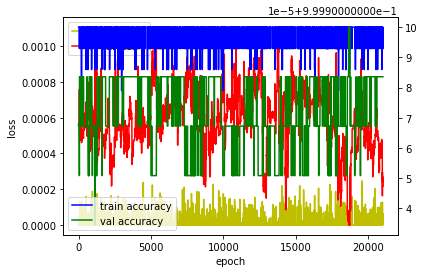

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label = 'train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label = 'val loss')
acc_ax.plot(hist.history['accuracy'], 'b', label = 'train accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'g', label = 'val accuracy')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_xlabel('accuracy')

loss_ax.legend(loc = 'upper left')
acc_ax.legend(loc = 'lower left')

plt.show()

In [ ]:
model.save('model_lstm_400000.h5')

CuDNN LSTM

In [ ]:
def cudnn_lstm_model():
    model = Sequential()
    model.add(CuDNNLSTM(50, input_shape = (1,21), return_sequences = True))
    model.add(CuDNNLSTM(1, return_sequences = False))
    model.add(Activation('sigmoid'))
    
    model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
    return model

In [ ]:
model = cudnn_lstm_model()

In [ ]:
model.fit(x_train, y_train, batch_size = 100, epochs = 10, verbose = 0)

In [ ]:
scores = model.evaluate(x_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 99.98%


CuDNN GRU

In [ ]:
def cudnn_gru_model():
    model = Sequential()
    model.add(CuDNNGRU(50, input_shape = (1,21), return_sequences = True))
    model.add(CuDNNGRU(1, return_sequences = False))
    model.add(Activation('sigmoid'))
    
    model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
    return model

In [ ]:
model = cudnn_gru_model()

In [ ]:
model.fit(x_train, y_train, batch_size = 100, epochs = 10, verbose = 0)

In [ ]:
scores = model.evaluate(x_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 99.90%
